<a href="https://colab.research.google.com/github/marialeones/Aprendendo_A_Programar/blob/main/base_de_dados_Ailson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#importando dados


# MACHINE LEARMING

Base para analise de crédito

In [ ]:
!pip -q install plotly --upgrade

In [ ]:
!pip -q install yellowbrick

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px 



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
lista = ['clientid', 'income', 'age', 'loan', 'default']
listaCols = ['IDC_Cliente', 'Renda', 'Idade', 'Divida', 'Devedor']

base_credit = pd.read_csv('/content/credit_data.csv', sep=',', usecols = lista)
base_credit.columns = listaCols

In [ ]:
base_credit

,IDC_Cliente,Renda,Idade,Divida,Devedor
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [ ]:
base_credit.head(10)

,IDC_Cliente,Renda,Idade,Divida,Devedor
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
5,6,24904.064140,57.471607,15.498598,0
6,7,48430.359613,26.809132,5722.581981,0
7,8,24500.141984,32.897548,2971.003310,1
8,9,40654.892537,55.496853,4755.825280,0
9,10,25075.872771,39.776378,1409.230371,0


In [ ]:
base_credit.tail(8)

,IDC_Cliente,Renda,Idade,Divida,Devedor
1992,1993,30803.806165,23.250084,623.024153,0
1993,1994,54421.410155,26.821928,3273.631823,0
1994,1995,24254.700791,37.751622,2225.284643,0
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0
1999,2000,69436.579552,56.152617,7378.833599,0


In [ ]:
base_credit.describe()

,IDC_Cliente,Renda,Idade,Divida,Devedor
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


In [ ]:
base_credit[base_credit['Renda'] >= 69995.685578]

,IDC_Cliente,Renda,Idade,Divida,Devedor
422,423,69995.685578,52.719673,2084.370861,0


In [ ]:
base_credit[base_credit['Divida'] <= 1.377630]

,IDC_Cliente,Renda,Idade,Divida,Devedor
865,866,28072.604355,54.142548,1.37763,0


# Exploração dos dados 

In [ ]:
np.unique(base_credit['Devedor'], return_counts=True)

(array([0, 1]), array([1717,  283]))

# Visualização dos dados

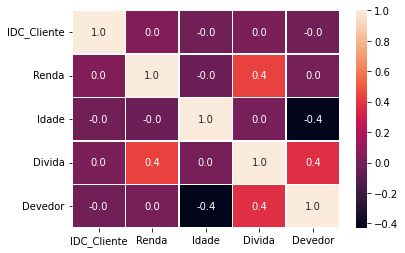

In [ ]:
#matriz de correlação

correlacao = base_credit.corr()

plot = sns.heatmap(correlacao, annot = True, fmt=".1f", linewidths=.6)

plot

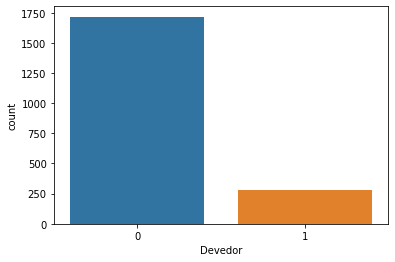

In [ ]:
sns.countplot(x = base_credit['Devedor']);

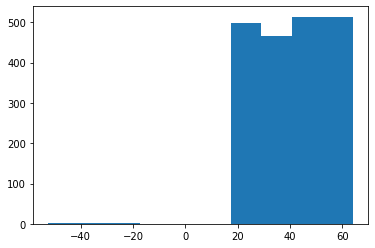

In [ ]:
plt.hist(x = base_credit['Idade']);

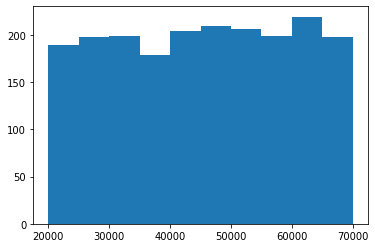

In [ ]:
plt.hist(x = base_credit['Renda']);

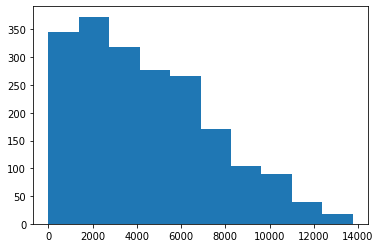

In [ ]:
plt.hist(x = base_credit['Divida']);

In [ ]:
grafico = px.scatter_matrix(base_credit, dimensions=['Idade', 'Renda', 'Divida'], color = 'Devedor')
grafico.show()

# Tratamento de valores inconsistentes

In [ ]:
 base_credit.loc[base_credit['Idade']< 0]

,IDC_Cliente,Renda,Idade,Divida,Devedor
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


In [ ]:
base_credit[base_credit['Idade']< 0]

,IDC_Cliente,Renda,Idade,Divida,Devedor
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


In [ ]:
# Apagar a coluna inteira (de todos os registros da base de dados)

base_credit2 = base_credit.drop('Idade', axis = 1)
base_credit2


,IDC_Cliente,Renda,Divida,Devedor
0,1,66155.925095,8106.532131,0
1,2,34415.153966,6564.745018,0
2,3,57317.170063,8020.953296,0
3,4,42709.534201,6103.642260,0
4,5,66952.688845,8770.099235,1
...,...,...,...,...
1995,1996,59221.044874,1926.729397,0
1996,1997,69516.127573,3503.176156,0
1997,1998,44311.449262,5522.786693,1
1998,1999,43756.056605,1622.722598,0


In [ ]:
base_credit.index


RangeIndex(start=0, stop=2000, step=1)

In [ ]:
base_credit[base_credit['Idade']< 0].index

Int64Index([15, 21, 26], dtype='int64')

In [ ]:
# Apagar somente os registros com valores inconsistentes

base_credit3 = base_credit.drop(base_credit[base_credit['Idade'] < 0].index)
base_credit3

,IDC_Cliente,Renda,Idade,Divida,Devedor
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [ ]:
base_credit3.loc[base_credit3['Idade'] < 0]

,IDC_Cliente,Renda,Idade,Divida,Devedor


In [ ]:
base_credit.mean()

IDC_Cliente     1000.500000
Renda          45331.600018
Idade             40.807559
Divida          4444.369695
Devedor            0.141500
dtype: float64

In [ ]:
base_credit['Idade'][base_credit['Idade'] > 0].mean()

40.92770044906149

In [ ]:
base_credit.loc[base_credit['Idade'] < 0, 'Idade'] = 40.92

In [ ]:
base_credit.loc[base_credit['Idade'] < 0]

,IDC_Cliente,Renda,Idade,Divida,Devedor


In [ ]:
base_credit.head(27)

,IDC_Cliente,Renda,Idade,Divida,Devedor
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
5,6,24904.064140,57.471607,15.498598,0
6,7,48430.359613,26.809132,5722.581981,0
7,8,24500.141984,32.897548,2971.003310,1
8,9,40654.892537,55.496853,4755.825280,0
9,10,25075.872771,39.776378,1409.230371,0


In [ ]:
base_credit.isnull()

,IDC_Cliente,Renda,Idade,Divida,Devedor
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
1995,False,False,False,False,False
1996,False,False,False,False,False
1997,False,False,False,False,False
1998,False,False,False,False,False


In [ ]:
base_credit.isnull().sum()

IDC_Cliente    0
Renda          0
Idade          3
Divida         0
Devedor        0
dtype: int64

In [ ]:
# LOC => significa localizar 
base_credit.loc[pd.isnull(base_credit['Idade'])]

,IDC_Cliente,Renda,Idade,Divida,Devedor
28,29,59417.805406,NaN,2082.625938,0
30,31,48528.852796,NaN,6155.784670,0
31,32,23526.302555,NaN,2862.010139,0


In [ ]:
base_credit['Idade'].fillna(base_credit['Idade'].mean(), inplace = True)

In [ ]:
base_credit.loc[pd.isnull(base_credit['Idade'])]

In [ ]:
base_credit.loc[(base_credit['IDC_Cliente'] == 29) | (base_credit['IDC_Cliente'] == 31 ) | (base_credit['IDC_Cliente'] == 32)]

,IDC_Cliente,Renda,Idade,Divida,Devedor
28,29,59417.805406,40.927689,2082.625938,0
30,31,48528.852796,40.927689,6155.784670,0
31,32,23526.302555,40.927689,2862.010139,0


In [ ]:
# Percore uma lista
base_credit.loc[base_credit['IDC_Cliente'].isin([29,31,32])]

,IDC_Cliente,Renda,Idade,Divida,Devedor
28,29,59417.805406,40.927689,2082.625938,0
30,31,48528.852796,40.927689,6155.784670,0
31,32,23526.302555,40.927689,2862.010139,0


In [ ]:
base_processada = base_credit

In [ ]:
base_processada.to_csv("base_processada.csv")

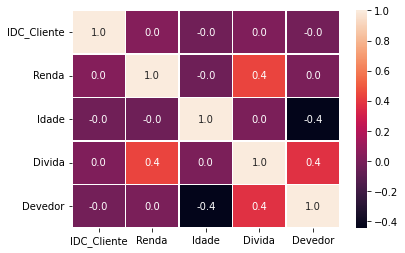

In [ ]:
correlacao = base_credit.corr()

plot = sns.heatmap(correlacao, annot = True, fmt=".1f", linewidths=.6)

plot

# Divisão entre previsores e classe

In [ ]:
# : => significa todas as linhas,  1:4 => intervalos de colunas 
x_credit = base_credit.iloc[:, 1:4].values


In [ ]:
x_credit

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [ ]:
type(x_credit)

numpy.ndarray

In [ ]:
y_credit = base_credit.iloc[:, 4].values

In [ ]:
y_credit

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
type(y_credit)

numpy.ndarray

# Escalonamento dos valores 

In [ ]:
x_credit[:,0].min(), x_credit[:,1].min(), x_credit[:,2].min()

(20014.4894700497, 18.055188510566897, 1.37762959325451)

In [ ]:
x_credit[:,0].max(), x_credit[:,1].max(), x_credit[:,2].max()

(69995.6855783239, 63.971795841120205, 13766.0512393337)

In [ ]:
#from sklearn.preprocessing import StandardScaler
#scaler_credit = StandardScaler()
#x_credit = scaler_credit.fit_transform(x_credit)

In [ ]:
x_credit[:,0].min(), x_credit[:,1].min(), x_credit[:,2].min()

(20014.4894700497, 18.055188510566897, 1.37762959325451)

In [ ]:
x_credit[:,0].max(), x_credit[:,1].max(), x_credit[:,2].max()

(69995.6855783239, 63.971795841120205, 13766.0512393337)

In [ ]:
x_credit

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

# Divisão das bases em treinamento e teste

In [ ]:
from sklearn.model_selection import train_test_split

# credit data

In [ ]:
x_credit_treinamento, x_credit_teste, y_credit_treinamento, y_credit_teste = train_test_split(x_credit, y_credit, test_size= 0.20, random_state = 0)

In [ ]:
x_credit_treinamento.shape

(1600, 3)

In [ ]:
y_credit_treinamento.shape

(1600,)

In [ ]:
from scipy.sparse.construct import random
random_forest_credit = RandomForestClassifier(n_estimators=20, criterion='entropy', random_state = 0)

random_forest_credit.fit(x_credit_treinamento, y_credit_treinamento)

RandomForestClassifier(criterion='entropy', n_estimators=20, random_state=0)

In [ ]:
previsoes = random_forest_credit.predict(x_credit_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

accuracy_score(y_credit_teste, previsoes)

0.98

0.98

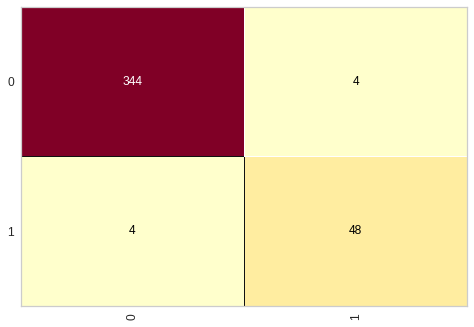

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(random_forest_credit)
cm.fit(x_credit_treinamento, y_credit_treinamento)
cm.score(x_credit_teste, y_credit_teste)

In [ ]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       348
           1       0.92      0.92      0.92        52

    accuracy                           0.98       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.98      0.98      0.98       400



#random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# MACHINE LEARMING

In [ ]:
{"cells":[{"cell_type":"markdown","metadata":{"id":"dLBv17m2oshN"},"source":["#importando dados\n"]},{"cell_type":"markdown","metadata":{"id":"whsbVSHE0RP0"},"source":["# MACHINE LEARMING"]},{"cell_type":"markdown","metadata":{"id":"zkFFRDmJnOS_"},"source":["Base para analise de crédito"]},{"cell_type":"code","execution_count":null,"metadata":{"id":"raFyLSGcm9CB"},"outputs":[],"source":["!pip -q install plotly --upgrade"]},{"cell_type":"code","execution_count":null,"metadata":{"id":"4-BSwd_DpKPV"},"outputs":[],"source":["!pip -q install yellowbrick"]},{"cell_type":"code","execution_count":null,"metadata":{"id":"__hJ-r4cpgpL"},"outputs":[],"source":["import pandas as pd\n","import numpy as np\n","import seaborn as sns\n","import matplotlib.pyplot as plt \n","import plotly.express as px \n","\n"]},{"cell_type":"code","execution_count":null,"metadata":{"colab":{"base_uri":"https://localhost:8080/"},"executionInfo":{"elapsed":2204,"status":"ok","timestamp":1666304833889,"user":{"displayName":"Maria Leonês","userId":"11702873846228863566"},"user_tz":180},"id":"cxoaSMX4rg6b","outputId":"0f42d592-d244-418a-eeca-ad4652aad8e4"},"outputs":[{"output_type":"stream","name":"stdout","text":["Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount(\"/content/drive\", force_remount=True).\n"]}],"source":["from google.colab import drive\n","drive.mount('/content/drive')"]},{"cell_type":"code","execution_count":null,"metadata":{"id":"vQYiwQ6UtGsR"},"outputs":[],"source":["lista = ['clientid', 'income', 'age', 'loan', 'default']\n","listaCols = ['IDC_Cliente', 'Renda', 'Idade', 'Divida', 'Devedor']\n","\n","base_credit = pd.read_csv('/content/credit_data.csv', sep=',', usecols = lista)\n","base_credit.columns = listaCols"]},{"cell_type":"code","execution_count":null,"metadata":{"colab":{"base_uri":"https://localhost:8080/","height":424},"executionInfo":{"elapsed":34,"status":"ok","timestamp":1666304833894,"user":{"displayName":"Maria Leonês","userId":"11702873846228863566"},"user_tz":180},"id":"4WvfuFkSvZ8F","outputId":"74b68ceb-4bf2-4f91-d5cf-706bcdee6339"},"outputs":[{"output_type":"execute_result","data":{"text/plain":["      IDC_Cliente         Renda      Idade       Divida  Devedor\n","0               1  66155.925095  59.017015  8106.532131        0\n","1               2  34415.153966  48.117153  6564.745018        0\n","2               3  57317.170063  63.108049  8020.953296        0\n","3               4  42709.534201  45.751972  6103.642260        0\n","4               5  66952.688845  18.584336  8770.099235        1\n","...           ...           ...        ...          ...      ...\n","1995         1996  59221.044874  48.518179  1926.729397        0\n","1996         1997  69516.127573  23.162104  3503.176156        0\n","1997         1998  44311.449262  28.017167  5522.786693        1\n","1998         1999  43756.056605  63.971796  1622.722598        0\n","1999         2000  69436.579552  56.152617  7378.833599        0\n","\n","[2000 rows x 5 columns]"],"text/html":["\n","  <div id=\"df-7db3e72a-2bd6-419d-b746-12bbfe486633\">\n","    <div class=\"colab-df-container\">\n","      <div>\n","<style scoped>\n","    .dataframe tbody tr th:only-of-type {\n","        vertical-align: middle;\n","    }\n","\n","    .dataframe tbody tr th {\n","        vertical-align: top;\n","    }\n","\n","    .dataframe thead th {\n","        text-align: right;\n","    }\n","</style>\n","<table border=\"1\" class=\"dataframe\">\n","  <thead>\n","    <tr style=\"text-align: right;\">\n","      <th></th>\n","      <th>IDC_Cliente</th>\n","      <th>Renda</th>\n","      <th>Idade</th>\n","      <th>Divida</th>\n","      <th>Devedor</th>\n","    </tr>\n","  </thead>\n","  <tbody>\n","    <tr>\n","      <th>0</th>\n","      <td>1</td>\n","      <td>66155.925095</td>\n","      <td>59.017015</td>\n","      <td>8106.532131</td>\n","      <td>0</td>\n","    </tr>\n","    <tr>\n","      <th>1</th>\n","      <td>2</td>\n","      <td>34415.153966</td>\n","      <td>48.117153</td>\n","      <td>6564.745018</td>\n","      <td>0</td>\n","    </tr>\n","    <tr>\n","      <th>2</th>\n","      <td>3</td>\n","      <td>57317.170063</td>\n","      <td>63.108049</td>\n","      <td>8020.953296</td>\n","      <td>0</td>\n","    </tr>\n","    <tr>\n","      <th>3</th>\n","      <td>4</td>\n","      <td>42709.534201</td>\n","      <td>45.751972</td>\n","      <td>6103.642260</td>\n","      <td>0</td>\n","    </tr>\n","    <tr>\n","      <th>4</th>\n","      <td>5</td>\n","      <td>66952.688845</td>\n","      <td>18.584336</td>\n","      <td>8770.099235</td>\n","      <td>1</td>\n","    </tr>\n","    <tr>\n","      <th>...</th>\n","      <td>...</td>\n","      <td>...</td>\n","      <td>...</td>\n","      <td>...</td>\n","      <td>...</td>\n","    </tr>\n","    <tr>\n","      <th>1995</th>\n","      <td>1996</td>\n","      <td>59221.044874</td>\n","      <td>48.518179</td>\n","      <td>1926.729397</td>\n","      <td>0</td>\n","    </tr>\n","    <tr>\n","      <th>1996</th>\n","      <td>1997</td>\n","      <td>69516.127573</td>\n","      <td>23.162104</td>\n","      <td>3503.176156</td>\n","      <td>0</td>\n","    </tr>\n","    <tr>\n","      <th>1997</th>\n","      <td>1998</td>\n","      <td>44311.449262</td>\n","      <td>28.017167</td>\n","      <td>5522.786693</td>\n","      <td>1</td>\n","    </tr>\n","    <tr>\n","      <th>1998</th>\n","      <td>1999</td>\n","      <td>43756.056605</td>\n","      <td>63.971796</td>\n","      <td>1622.722598</td>\n","      <td>0</td>\n","    </tr>\n","    <tr>\n","      <th>1999</th>\n","      <td>2000</td>\n","      <td>69436.579552</td>\n","      <td>56.152617</td>\n","      <td>7378.833599</td>\n","      <td>0</td>\n","    </tr>\n","  </tbody>\n","</table>\n","<p>2000 rows × 5 columns</p>\n","</div>\n","      <button class=\"colab-df-convert\" onclick=\"convertToInteractive('df-7db3e72a-2bd6-419d-b746-12bbfe486633')\"\n","              title=\"Convert this dataframe to an interactive table.\"\n","              style=\"display:none;\">\n","        \n","  <svg xmlns=\"http://www.w3.org/2000/svg\" height=\"24px\"viewBox=\"0 0 24 24\"\n","       width=\"24px\">\n","    <path d=\"M0 0h24v24H0V0z\" fill=\"none\"/>\n","    <path d=\"M18.56 5.44l.94 2.06.94-2.06 2.06-.94-2.06-.94-.94-2.06-.94 2.06-2.06.94zm-11 1L8.5 8.5l.94-2.06 2.06-.94-2.06-.94L8.5 2.5l-.94 2.06-2.06.94zm10 10l.94 2.06.94-2.06 2.06-.94-2.06-.94-.94-2.06-.94 2.06-2.06.94z\"/><path d=\"M17.41 7.96l-1.37-1.37c-.4-.4-.92-.59-1.43-.59-.52 0-1.04.2-1.43.59L10.3 9.45l-7.72 7.72c-.78.78-.78 2.05 0 2.83L4 21.41c.39.39.9.59 1.41.59.51 0 1.02-.2 1.41-.59l7.78-7.78 2.81-2.81c.8-.78.8-2.07 0-2.86zM5.41 20L4 18.59l7.72-7.72 1.47 1.35L5.41 20z\"/>\n","  </svg>\n","      </button>\n","      \n","  <style>\n","    .colab-df-container {\n","      display:flex;\n","      flex-wrap:wrap;\n","      gap: 12px;\n","    }\n","\n","    .colab-df-convert {\n","      background-color: #E8F0FE;\n","      border: none;\n","      border-radius: 50%;\n","      cursor: pointer;\n","      display: none;\n","      fill: #1967D2;\n","      height: 32px;\n","      padding: 0 0 0 0;\n","      width: 32px;\n","    }\n","\n","    .colab-df-convert:hover {\n","      background-color: #E2EBFA;\n","      box-shadow: 0px 1px 2px rgba(60, 64, 67, 0.3), 0px 1px 3px 1px rgba(60, 64, 67, 0.15);\n","      fill: #174EA6;\n","    }\n","\n","    [theme=dark] .colab-df-convert {\n","      background-color: #3B4455;\n","      fill: #D2E3FC;\n","    }\n","\n","    [theme=dark] .colab-df-convert:hover {\n","      background-color: #434B5C;\n","      box-shadow: 0px 1px 3px 1px rgba(0, 0, 0, 0.15);\n","      filter: drop-shadow(0px 1px 2px rgba(0, 0, 0, 0.3));\n","      fill: #FFFFFF;\n","    }\n","  </style>\n","\n","      <script>\n","        const buttonEl =\n","          document.querySelector('#df-7db3e72a-2bd6-419d-b746-12bbfe486633 button.colab-df-convert');\n","        buttonEl.style.display =\n","          google.colab.kernel.accessAllowed ? 'block' : 'none';\n","\n","        async function convertToInteractive(key) {\n","          const element = document.querySelector('#df-7db3e72a-2bd6-419d-b746-12bbfe486633');\n","          const dataTable =\n","            await google.colab.kernel.invokeFunction('convertToInteractive',\n","                                                     [key], {});\n","          if (!dataTable) return;\n","\n","          const docLinkHtml = 'Like what you see? Visit the ' +\n","            '<a target=\"_blank\" href=https://colab.research.google.com/notebooks/data_table.ipynb>data table notebook</a>'\n","            + ' to learn more about interactive tables.';\n","          element.innerHTML = '';\n","          dataTable['output_type'] = 'display_data';\n","          await google.colab.output.renderOutput(dataTable, element);\n","          const docLink = document.createElement('div');\n","          docLink.innerHTML = docLinkHtml;\n","          element.appendChild(docLink);\n","        }\n","      </script>\n","    </div>\n","  </div>\n","  "]},"metadata":{},"execution_count":65}],"source":["base_credit"]},{"cell_type":"code","execution_count":null,"metadata":{"colab":{"base_uri":"https://localhost:8080/","height":363},"executionInfo":{"elapsed":36,"status":"ok","timestamp":1666304833897,"user":{"displayName":"Maria Leonês","userId":"11702873846228863566"},"user_tz":180},"id":"ZQpCKjWuwlWN","outputId":"57789928-4c83-4286-f4bf-8659daf8c39f"},"outputs":[{"output_type":"execute_result","data":{"text/plain":["   IDC_Cliente         Renda      Idade       Divida  Devedor\n","0            1  66155.925095  59.017015  8106.532131        0\n","1            2  34415.153966  48.117153  6564.745018        0\n","2            3  57317.170063  63.108049  8020.953296        0\n","3            4  42709.534201  45.751972  6103.642260        0\n","4            5  66952.688845  18.584336  8770.099235        1\n","5            6  24904.064140  57.471607    15.498598        0\n","6            7  48430.359613  26.809132  5722.581981        0\n","7            8  24500.141984  32.897548  2971.003310        1\n","8            9  40654.892537  55.496853  4755.825280        0\n","9           10  25075.872771  39.776378  1409.230371        0"],"text/html":["\n","  <div id=\"df-440cda09-d307-40c3-b871-eef4ece2d4bc\">\n","    <div class=\"colab-df-container\">\n","      <div>\n","<style scoped>\n","    .dataframe tbody tr th:only-of-type {\n","        vertical-align: middle;\n","    }\n","\n","    .dataframe tbody tr th {\n","        vertical-align: top;\n","    }\n","\n","    .dataframe thead th {\n","        text-align: right;\n","    }\n","</style>\n","<table border=\"1\" class=\"dataframe\">\n","  <thead>\n","    <tr style=\"text-align: right;\">\n","      <th></th>\n","      <th>IDC_Cliente</th>\n","      <th>Renda</th>\n","      <th>Idade</th>\n","      <th>Divida</th>\n","      <th>Devedor</th>\n","    </tr>\n","  </thead>\n","  <tbody>\n","    <tr>\n","      <th>0</th>\n","      <td>1</td>\n","      <td>66155.925095</td>\n","      <td>59.017015</td>\n","      <td>8106.532131</td>\n","      <td>0</td>\n","    </tr>\n","    <tr>\n","      <th>1</th>\n","      <td>2</td>\n","      <td>34415.153966</td>\n","      <td>48.117153</td>\n","      <td>6564.745018</td>\n","      <td>0</td>\n","    </tr>\n","    <tr>\n","      <th>2</th>\n","      <td>3</td>\n","      <td>57317.170063</td>\n","      <td>63.108049</td>\n","      <td>8020.953296</td>\n","      <td>0</td>\n","    </tr>\n","    <tr>\n","      <th>3</th>\n","      <td>4</td>\n","      <td>42709.534201</td>\n","      <td>45.751972</td>\n","      <td>6103.642260</td>\n","      <td>0</td>\n","    </tr>\n","    <tr>\n","      <th>4</th>\n","      <td>5</td>\n","      <td>66952.688845</td>\n","      <td>18.584336</td>\n","      <td>8770.099235</td>\n","      <td>1</td>\n","    </tr>\n","    <tr>\n","      <th>5</th>\n","      <td>6</td>\n","      <td>24904.064140</td>\n","      <td>57.471607</td>\n","      <td>15.498598</td>\n","      <td>0</td>\n","    </tr>\n","    <tr>\n","      <th>6</th>\n","      <td>7</td>\n","      <td>48430.359613</td>\n","      <td>26.809132</td>\n","      <td>5722.581981</td>\n","      <td>0</td>\n","    </tr>\n","    <tr>\n","      <th>7</th>\n","      <td>8</td>\n","      <td>24500.141984</td>\n","      <td>32.897548</td>\n","      <td>2971.003310</td>\n","      <td>1</td>\n","    </tr>\n","    <tr>\n","      <th>8</th>\n","      <td>9</td>\n","      <td>40654.892537</td>\n","      <td>55.496853</td>\n","      <td>4755.825280</td>\n","      <td>0</td>\n","    </tr>\n","    <tr>\n","      <th>9</th>\n","      <td>10</td>\n","      <td>25075.872771</td>\n","      <td>39.776378</td>\n","      <td>1409.230371</td>\n","      <td>0</td>\n","    </tr>\n","  </tbody>\n","</table>\n","</div>\n","      <button class=\"colab-df-convert\" onclick=\"convertToInteractive('df-440cda09-d307-40c3-b871-eef4ece2d4bc')\"\n","              title=\"Convert this dataframe to an interactive table.\"\n","              style=\"display:none;\">\n","        \n","  <svg xmlns=\"http://www.w3.org/2000/svg\" height=\"24px\"viewBox=\"0 0 24 24\"\n","       width=\"24px\">\n","    <path d=\"M0 0h24v24H0V0z\" fill=\"none\"/>\n","    <path d=\"M18.56 5.44l.94 2.06.94-2.06 2.06-.94-2.06-.94-.94-2.06-.94 2.06-2.06.94zm-11 1L8.5 8.5l.94-2.06 2.06-.94-2.06-.94L8.5 2.5l-.94 2.06-2.06.94zm10 10l.94 2.06.94-2.06 2.06-.94-2.06-.94-.94-2.06-.94 2.06-2.06.94z\"/><path d=\"M17.41 7.96l-1.37-1.37c-.4-.4-.92-.59-1.43-.59-.52 0-1.04.2-1.43.59L10.3 9.45l-7.72 7.72c-.78.78-.78 2.05 0 2.83L4 21.41c.39.39.9.59 1.41.59.51 0 1.02-.2 1.41-.59l7.78-7.78 2.81-2.81c.8-.78.8-2.07 0-2.86zM5.41 20L4 18.59l7.72-7.72 1.47 1.35L5.41 20z\"/>\n","  </svg>\n","      </button>\n","      \n","  <style>\n","    .colab-df-container {\n","      display:flex;\n","      flex-wrap:wrap;\n","      gap: 12px;\n","    }\n","\n","    .colab-df-convert {\n","      background-color: #E8F0FE;\n","      border: none;\n","      border-radius: 50%;\n","      cursor: pointer;\n","      display: none;\n","      fill: #1967D2;\n","      height: 32px;\n","      padding: 0 0 0 0;\n","      width: 32px;\n","    }\n","\n","    .colab-df-convert:hover {\n","      background-color: #E2EBFA;\n","      box-shadow: 0px 1px 2px rgba(60, 64, 67, 0.3), 0px 1px 3px 1px rgba(60, 64, 67, 0.15);\n","      fill: #174EA6;\n","    }\n","\n","    [theme=dark] .colab-df-convert {\n","      background-color: #3B4455;\n","      fill: #D2E3FC;\n","    }\n","\n","    [theme=dark] .colab-df-convert:hover {\n","      background-color: #434B5C;\n","      box-shadow: 0px 1px 3px 1px rgba(0, 0, 0, 0.15);\n","      filter: drop-shadow(0px 1px 2px rgba(0, 0, 0, 0.3));\n","      fill: #FFFFFF;\n","    }\n","  </style>\n","\n","      <script>\n","        const buttonEl =\n","          document.querySelector('#df-440cda09-d307-40c3-b871-eef4ece2d4bc button.colab-df-convert');\n","        buttonEl.style.display =\n","          google.colab.kernel.accessAllowed ? 'block' : 'none';\n","\n","        async function convertToInteractive(key) {\n","          const element = document.querySelector('#df-440cda09-d307-40c3-b871-eef4ece2d4bc');\n","          const dataTable =\n","            await google.colab.kernel.invokeFunction('convertToInteractive',\n","                                                     [key], {});\n","          if (!dataTable) return;\n","\n","          const docLinkHtml = 'Like what you see? Visit the ' +\n","            '<a target=\"_blank\" href=https://colab.research.google.com/notebooks/data_table.ipynb>data table notebook</a>'\n","            + ' to learn more about interactive tables.';\n","          element.innerHTML = '';\n","          dataTable['output_type'] = 'display_data';\n","          await google.colab.output.renderOutput(dataTable, element);\n","          const docLink = document.createElement('div');\n","          docLink.innerHTML = docLinkHtml;\n","          element.appendChild(docLink);\n","        }\n","      </script>\n","    </div>\n","  </div>\n","  "]},"metadata":{},"execution_count":66}],"source":["base_credit.head(10)"]},{"cell_type":"code","execution_count":null,"metadata":{"colab":{"base_uri":"https://localhost:8080/","height":300},"executionInfo":{"elapsed":36,"status":"ok","timestamp":1666304833900,"user":{"displayName":"Maria Leonês","userId":"11702873846228863566"},"user_tz":180},"id":"n63Cy_RHbwv0","outputId":"5e36677d-d7f1-434e-85ce-45610cf50da7"},"outputs":[{"output_type":"execute_result","data":{"text/plain":["      IDC_Cliente         Renda      Idade       Divida  Devedor\n","1992         1993  30803.806165  23.250084   623.024153        0\n","1993         1994  54421.410155  26.821928  3273.631823        0\n","1994         1995  24254.700791  37.751622  2225.284643        0\n","1995         1996  59221.044874  48.518179  1926.729397        0\n","1996         1997  69516.127573  23.162104  3503.176156        0\n","1997         1998  44311.449262  28.017167  5522.786693        1\n","1998         1999  43756.056605  63.971796  1622.722598        0\n","1999         2000  69436.579552  56.152617  7378.833599        0"],"text/html":["\n","  <div id=\"df-ca1bece6-f98a-4687-93fc-9d962f79ff5e\">\n","    <div class=\"colab-df-container\">\n","      <div>\n","<style scoped>\n","    .dataframe tbody tr th:only-of-type {\n","        vertical-align: middle;\n","    }\n","\n","    .dataframe tbody tr th {\n","        vertical-align: top;\n","    }\n","\n","    .dataframe thead th {\n","        text-align: right;\n","    }\n","</style>\n","<table border=\"1\" class=\"dataframe\">\n","  <thead>\n","    <tr style=\"text-align: right;\">\n","      <th></th>\n","      <th>IDC_Cliente</th>\n","      <th>Renda</th>\n","      <th>Idade</th>\n","      <th>Divida</th>\n","      <th>Devedor</th>\n","    </tr>\n","  </thead>\n","  <tbody>\n","    <tr>\n","      <th>1992</th>\n","      <td>1993</td>\n","      <td>30803.806165</td>\n","      <td>23.250084</td>\n","      <td>623.024153</td>\n","      <td>0</td>\n","    </tr>\n","    <tr>\n","      <th>1993</th>\n","      <td>1994</td>\n","      <td>54421.410155</td>\n","      <td>26.821928</td>\n","      <td>3273.631823</td>\n","      <td>0</td>\n","    </tr>\n","    <tr>\n","      <th>1994</th>\n","      <td>1995</td>\n","      <td>24254.700791</td>\n","      <td>37.751622</td>\n","      <td>2225.284643</td>\n","      <td>0</td>\n","    </tr>\n","    <tr>\n","      <th>1995</th>\n","      <td>1996</td>\n","      <td>59221.044874</td>\n","      <td>48.518179</td>\n","      <td>1926.729397</td>\n","      <td>0</td>\n","    </tr>\n","    <tr>\n","      <th>1996</th>\n","      <td>1997</td>\n","      <td>69516.127573</td>\n","      <td>23.162104</td>\n","      <td>3503.176156</td>\n","      <td>0</td>\n","    </tr>\n","    <tr>\n","      <th>1997</th>\n","      <td>1998</td>\n","      <td>44311.449262</td>\n","      <td>28.017167</td>\n","      <td>5522.786693</td>\n","      <td>1</td>\n","    </tr>\n","    <tr>\n","      <th>1998</th>\n","      <td>1999</td>\n","      <td>43756.056605</td>\n","      <td>63.971796</td>\n","      <td>1622.722598</td>\n","      <td>0</td>\n","    </tr>\n","    <tr>\n","      <th>1999</th>\n","      <td>2000</td>\n","      <td>69436.579552</td>\n","      <td>56.152617</td>\n","      <td>7378.833599</td>\n","      <td>0</td>\n","    </tr>\n","  </tbody>\n","</table>\n","</div>\n","      <button class=\"colab-df-convert\" onclick=\"convertToInteractive('df-ca1bece6-f98a-4687-93fc-9d962f79ff5e')\"\n","              title=\"Convert this dataframe to an interactive table.\"\n","              style=\"display:none;\">\n","        \n","  <svg xmlns=\"http://www.w3.org/2000/svg\" height=\"24px\"viewBox=\"0 0 24 24\"\n","       width=\"24px\">\n","    <path d=\"M0 0h24v24H0V0z\" fill=\"none\"/>\n","    <path d=\"M18.56 5.44l.94 2.06.94-2.06 2.06-.94-2.06-.94-.94-2.06-.94 2.06-2.06.94zm-11 1L8.5 8.5l.94-2.06 2.06-.94-2.06-.94L8.5 2.5l-.94 2.06-2.06.94zm10 10l.94 2.06.94-2.06 2.06-.94-2.06-.94-.94-2.06-.94 2.06-2.06.94z\"/><path d=\"M17.41 7.96l-1.37-1.37c-.4-.4-.92-.59-1.43-.59-.52 0-1.04.2-1.43.59L10.3 9.45l-7.72 7.72c-.78.78-.78 2.05 0 2.83L4 21.41c.39.39.9.59 1.41.59.51 0 1.02-.2 1.41-.59l7.78-7.78 2.81-2.81c.8-.78.8-2.07 0-2.86zM5.41 20L4 18.59l7.72-7.72 1.47 1.35L5.41 20z\"/>\n","  </svg>\n","      </button>\n","      \n","  <style>\n","    .colab-df-container {\n","      display:flex;\n","      flex-wrap:wrap;\n","      gap: 12px;\n","    }\n","\n","    .colab-df-convert {\n","      background-color: #E8F0FE;\n","      border: none;\n","      border-radius: 50%;\n","      cursor: pointer;\n","      display: none;\n","      fill: #1967D2;\n","      height: 32px;\n","      padding: 0 0 0 0;\n","      width: 32px;\n","    }\n","\n","    .colab-df-convert:hover {\n","      background-color: #E2EBFA;\n","      box-shadow: 0px 1px 2px rgba(60, 64, 67, 0.3), 0px 1px 3px 1px rgba(60, 64, 67, 0.15);\n","      fill: #174EA6;\n","    }\n","\n","    [theme=dark] .colab-df-convert {\n","      background-color: #3B4455;\n","      fill: #D2E3FC;\n","    }\n","\n","    [theme=dark] .colab-df-convert:hover {\n","      background-color: #434B5C;\n","      box-shadow: 0px 1px 3px 1px rgba(0, 0, 0, 0.15);\n","      filter: drop-shadow(0px 1px 2px rgba(0, 0, 0, 0.3));\n","      fill: #FFFFFF;\n","    }\n","  </style>\n","\n","      <script>\n","        const buttonEl =\n","          document.querySelector('#df-ca1bece6-f98a-4687-93fc-9d962f79ff5e button.colab-df-convert');\n","        buttonEl.style.display =\n","          google.colab.kernel.accessAllowed ? 'block' : 'none';\n","\n","        async function convertToInteractive(key) {\n","          const element = document.querySelector('#df-ca1bece6-f98a-4687-93fc-9d962f79ff5e');\n","          const dataTable =\n","            await google.colab.kernel.invokeFunction('convertToInteractive',\n","                                                     [key], {});\n","          if (!dataTable) return;\n","\n","          const docLinkHtml = 'Like what you see? Visit the ' +\n","            '<a target=\"_blank\" href=https://colab.research.google.com/notebooks/data_table.ipynb>data table notebook</a>'\n","            + ' to learn more about interactive tables.';\n","          element.innerHTML = '';\n","          dataTable['output_type'] = 'display_data';\n","          await google.colab.output.renderOutput(dataTable, element);\n","          const docLink = document.createElement('div');\n","          docLink.innerHTML = docLinkHtml;\n","          element.appendChild(docLink);\n","        }\n","      </script>\n","    </div>\n","  </div>\n","  "]},"metadata":{},"execution_count":67}],"source":["base_credit.tail(8)"]},{"cell_type":"code","execution_count":null,"metadata":{"colab":{"base_uri":"https://localhost:8080/","height":300},"executionInfo":{"elapsed":36,"status":"ok","timestamp":1666304833902,"user":{"displayName":"Maria Leonês","userId":"11702873846228863566"},"user_tz":180},"id":"pSu04XRJeQU5","outputId":"26dc1747-0882-4d46-ab31-7114c2cd6c0e"},"outputs":[{"output_type":"execute_result","data":{"text/plain":["       IDC_Cliente         Renda        Idade        Divida      Devedor\n","count  2000.000000   2000.000000  1997.000000   2000.000000  2000.000000\n","mean   1000.500000  45331.600018    40.807559   4444.369695     0.141500\n","std     577.494589  14326.327119    13.624469   3045.410024     0.348624\n","min       1.000000  20014.489470   -52.423280      1.377630     0.000000\n","25%     500.750000  32796.459717    28.990415   1939.708847     0.000000\n","50%    1000.500000  45789.117313    41.317159   3974.719419     0.000000\n","75%    1500.250000  57791.281668    52.587040   6432.410625     0.000000\n","max    2000.000000  69995.685578    63.971796  13766.051239     1.000000"],"text/html":["\n","  <div id=\"df-42bba05d-1292-4d4a-a9b5-d5453d06fccf\">\n","    <div class=\"colab-df-container\">\n","      <div>\n","<style scoped>\n","    .dataframe tbody tr th:only-of-type {\n","        vertical-align: middle;\n","    }\n","\n","    .dataframe tbody tr th {\n","        vertical-align: top;\n","    }\n","\n","    .dataframe thead th {\n","        text-align: right;\n","    }\n","</style>\n","<table border=\"1\" class=\"dataframe\">\n","  <thead>\n","    <tr style=\"text-align: right;\">\n","      <th></th>\n","      <th>IDC_Cliente</th>\n","      <th>Renda</th>\n","      <th>Idade</th>\n","      <th>Divida</th>\n","      <th>Devedor</th>\n","    </tr>\n","  </thead>\n","  <tbody>\n","    <tr>\n","      <th>count</th>\n","      <td>2000.000000</td>\n","      <td>2000.000000</td>\n","      <td>1997.000000</td>\n","      <td>2000.000000</td>\n","      <td>2000.000000</td>\n","    </tr>\n","    <tr>\n","      <th>mean</th>\n","      <td>1000.500000</td>\n","      <td>45331.600018</td>\n","      <td>40.807559</td>\n","      <td>4444.369695</td>\n","      <td>0.141500</td>\n","    </tr>\n","    <tr>\n","      <th>std</th>\n","      <td>577.494589</td>\n","      <td>14326.327119</td>\n","      <td>13.624469</td>\n","      <td>3045.410024</td>\n","      <td>0.348624</td>\n","    </tr>\n","    <tr>\n","      <th>min</th>\n","      <td>1.000000</td>\n","      <td>20014.489470</td>\n","      <td>-52.423280</td>\n","      <td>1.377630</td>\n","      <td>0.000000</td>\n","    </tr>\n","    <tr>\n","      <th>25%</th>\n","      <td>500.750000</td>\n","      <td>32796.459717</td>\n","      <td>28.990415</td>\n","      <td>1939.708847</td>\n","      <td>0.000000</td>\n","    </tr>\n","    <tr>\n","      <th>50%</th>\n","      <td>1000.500000</td>\n","      <td>45789.117313</td>\n","      <td>41.317159</td>\n","      <td>3974.719419</td>\n","      <td>0.000000</td>\n","    </tr>\n","    <tr>\n","      <th>75%</th>\n","      <td>1500.250000</td>\n","      <td>57791.281668</td>\n","      <td>52.587040</td>\n","      <td>6432.410625</td>\n","      <td>0.000000</td>\n","    </tr>\n","    <tr>\n","      <th>max</th>\n","      <td>2000.000000</td>\n","      <td>69995.685578</td>\n","      <td>63.971796</td>\n","      <td>13766.051239</td>\n","      <td>1.000000</td>\n","    </tr>\n","  </tbody>\n","</table>\n","</div>\n","      <button class=\"colab-df-convert\" onclick=\"convertToInteractive('df-42bba05d-1292-4d4a-a9b5-d5453d06fccf')\"\n","              title=\"Convert this dataframe to an interactive table.\"\n","              style=\"display:none;\">\n","        \n","  <svg xmlns=\"http://www.w3.org/2000/svg\" height=\"24px\"viewBox=\"0 0 24 24\"\n","       width=\"24px\">\n","    <path d=\"M0 0h24v24H0V0z\" fill=\"none\"/>\n","    <path d=\"M18.56 5.44l.94 2.06.94-2.06 2.06-.94-2.06-.94-.94-2.06-.94 2.06-2.06.94zm-11 1L8.5 8.5l.94-2.06 2.06-.94-2.06-.94L8.5 2.5l-.94 2.06-2.06.94zm10 10l.94 2.06.94-2.06 2.06-.94-2.06-.94-.94-2.06-.94 2.06-2.06.94z\"/><path d=\"M17.41 7.96l-1.37-1.37c-.4-.4-.92-.59-1.43-.59-.52 0-1.04.2-1.43.59L10.3 9.45l-7.72 7.72c-.78.78-.78 2.05 0 2.83L4 21.41c.39.39.9.59 1.41.59.51 0 1.02-.2 1.41-.59l7.78-7.78 2.81-2.81c.8-.78.8-2.07 0-2.86zM5.41 20L4 18.59l7.72-7.72 1.47 1.35L5.41 20z\"/>\n","  </svg>\n","      </button>\n","      \n","  <style>\n","    .colab-df-container {\n","      display:flex;\n","      flex-wrap:wrap;\n","      gap: 12px;\n","    }\n","\n","    .colab-df-convert {\n","      background-color: #E8F0FE;\n","      border: none;\n","      border-radius: 50%;\n","      cursor: pointer;\n","      display: none;\n","      fill: #1967D2;\n","      height: 32px;\n","      padding: 0 0 0 0;\n","      width: 32px;\n","    }\n","\n","    .colab-df-convert:hover {\n","      background-color: #E2EBFA;\n","      box-shadow: 0px 1px 2px rgba(60, 64, 67, 0.3), 0px 1px 3px 1px rgba(60, 64, 67, 0.15);\n","      fill: #174EA6;\n","    }\n","\n","    [theme=dark] .colab-df-convert {\n","      background-color: #3B4455;\n","      fill: #D2E3FC;\n","    }\n","\n","    [theme=dark] .colab-df-convert:hover {\n","      background-color: #434B5C;\n","      box-shadow: 0px 1px 3px 1px rgba(0, 0, 0, 0.15);\n","      filter: drop-shadow(0px 1px 2px rgba(0, 0, 0, 0.3));\n","      fill: #FFFFFF;\n","    }\n","  </style>\n","\n","      <script>\n","        const buttonEl =\n","          document.querySelector('#df-42bba05d-1292-4d4a-a9b5-d5453d06fccf button.colab-df-convert');\n","        buttonEl.style.display =\n","          google.colab.kernel.accessAllowed ? 'block' : 'none';\n","\n","        async function convertToInteractive(key) {\n","          const element = document.querySelector('#df-42bba05d-1292-4d4a-a9b5-d5453d06fccf');\n","          const dataTable =\n","            await google.colab.kernel.invokeFunction('convertToInteractive',\n","                                                     [key], {});\n","          if (!dataTable) return;\n","\n","          const docLinkHtml = 'Like what you see? Visit the ' +\n","            '<a target=\"_blank\" href=https://colab.research.google.com/notebooks/data_table.ipynb>data table notebook</a>'\n","            + ' to learn more about interactive tables.';\n","          element.innerHTML = '';\n","          dataTable['output_type'] = 'display_data';\n","          await google.colab.output.renderOutput(dataTable, element);\n","          const docLink = document.createElement('div');\n","          docLink.innerHTML = docLinkHtml;\n","          element.appendChild(docLink);\n","        }\n","      </script>\n","    </div>\n","  </div>\n","  "]},"metadata":{},"execution_count":68}],"source":["base_credit.describe()"]},{"cell_type":"code","execution_count":null,"metadata":{"colab":{"base_uri":"https://localhost:8080/","height":81},"executionInfo":{"elapsed":23,"status":"ok","timestamp":1666304834279,"user":{"displayName":"Maria Leonês","userId":"11702873846228863566"},"user_tz":180},"id":"LDzs8nYBev4w","outputId":"1e25d50e-9058-4c48-e7ed-345569b7ac4c"},"outputs":[{"output_type":"execute_result","data":{"text/plain":["     IDC_Cliente         Renda      Idade       Divida  Devedor\n","422          423  69995.685578  52.719673  2084.370861        0"],"text/html":["\n","  <div id=\"df-c06db99e-fc22-495b-b9e4-c491d92c1240\">\n","    <div class=\"colab-df-container\">\n","      <div>\n","<style scoped>\n","    .dataframe tbody tr th:only-of-type {\n","        vertical-align: middle;\n","    }\n","\n","    .dataframe tbody tr th {\n","        vertical-align: top;\n","    }\n","\n","    .dataframe thead th {\n","        text-align: right;\n","    }\n","</style>\n","<table border=\"1\" class=\"dataframe\">\n","  <thead>\n","    <tr style=\"text-align: right;\">\n","      <th></th>\n","      <th>IDC_Cliente</th>\n","      <th>Renda</th>\n","      <th>Idade</th>\n","      <th>Divida</th>\n","      <th>Devedor</th>\n","    </tr>\n","  </thead>\n","  <tbody>\n","    <tr>\n","      <th>422</th>\n","      <td>423</td>\n","      <td>69995.685578</td>\n","      <td>52.719673</td>\n","      <td>2084.370861</td>\n","      <td>0</td>\n","    </tr>\n","  </tbody>\n","</table>\n","</div>\n","      <button class=\"colab-df-convert\" onclick=\"convertToInteractive('df-c06db99e-fc22-495b-b9e4-c491d92c1240')\"\n","              title=\"Convert this dataframe to an interactive table.\"\n","              style=\"display:none;\">\n","        \n","  <svg xmlns=\"http://www.w3.org/2000/svg\" height=\"24px\"viewBox=\"0 0 24 24\"\n","       width=\"24px\">\n","    <path d=\"M0 0h24v24H0V0z\" fill=\"none\"/>\n","    <path d=\"M18.56 5.44l.94 2.06.94-2.06 2.06-.94-2.06-.94-.94-2.06-.94 2.06-2.06.94zm-11 1L8.5 8.5l.94-2.06 2.06-.94-2.06-.94L8.5 2.5l-.94 2.06-2.06.94zm10 10l.94 2.06.94-2.06 2.06-.94-2.06-.94-.94-2.06-.94 2.06-2.06.94z\"/><path d=\"M17.41 7.96l-1.37-1.37c-.4-.4-.92-.59-1.43-.59-.52 0-1.04.2-1.43.59L10.3 9.45l-7.72 7.72c-.78.78-.78 2.05 0 2.83L4 21.41c.39.39.9.59 1.41.59.51 0 1.02-.2 1.41-.59l7.78-7.78 2.81-2.81c.8-.78.8-2.07 0-2.86zM5.41 20L4 18.59l7.72-7.72 1.47 1.35L5.41 20z\"/>\n","  </svg>\n","      </button>\n","      \n","  <style>\n","    .colab-df-container {\n","      display:flex;\n","      flex-wrap:wrap;\n","      gap: 12px;\n","    }\n","\n","    .colab-df-convert {\n","      background-color: #E8F0FE;\n","      border: none;\n","      border-radius: 50%;\n","      cursor: pointer;\n","      display: none;\n","      fill: #1967D2;\n","      height: 32px;\n","      padding: 0 0 0 0;\n","      width: 32px;\n","    }\n","\n","    .colab-df-convert:hover {\n","      background-color: #E2EBFA;\n","      box-shadow: 0px 1px 2px rgba(60, 64, 67, 0.3), 0px 1px 3px 1px rgba(60, 64, 67, 0.15);\n","      fill: #174EA6;\n","    }\n","\n","    [theme=dark] .colab-df-convert {\n","      background-color: #3B4455;\n","      fill: #D2E3FC;\n","    }\n","\n","    [theme=dark] .colab-df-convert:hover {\n","      background-color: #434B5C;\n","      box-shadow: 0px 1px 3px 1px rgba(0, 0, 0, 0.15);\n","      filter: drop-shadow(0px 1px 2px rgba(0, 0, 0, 0.3));\n","      fill: #FFFFFF;\n","    }\n","  </style>\n","\n","      <script>\n","        const buttonEl =\n","          document.querySelector('#df-c06db99e-fc22-495b-b9e4-c491d92c1240 button.colab-df-convert');\n","        buttonEl.style.display =\n","          google.colab.kernel.accessAllowed ? 'block' : 'none';\n","\n","        async function convertToInteractive(key) {\n","          const element = document.querySelector('#df-c06db99e-fc22-495b-b9e4-c491d92c1240');\n","          const dataTable =\n","            await google.colab.kernel.invokeFunction('convertToInteractive',\n","                                                     [key], {});\n","          if (!dataTable) return;\n","\n","          const docLinkHtml = 'Like what you see? Visit the ' +\n","            '<a target=\"_blank\" href=https://colab.research.google.com/notebooks/data_table.ipynb>data table notebook</a>'\n","            + ' to learn more about interactive tables.';\n","          element.innerHTML = '';\n","          dataTable['output_type'] = 'display_data';\n","          await google.colab.output.renderOutput(dataTable, element);\n","          const docLink = document.createElement('div');\n","          docLink.innerHTML = docLinkHtml;\n","          element.appendChild(docLink);\n","        }\n","      </script>\n","    </div>\n","  </div>\n","  "]},"metadata":{},"execution_count":69}],"source":["base_credit[base_credit['Renda'] >= 69995.685578]"]},{"cell_type":"code","execution_count":null,"metadata":{"colab":{"base_uri":"https://localhost:8080/","height":81},"executionInfo":{"elapsed":21,"status":"ok","timestamp":1666304834281,"user":{"displayName":"Maria Leonês","userId":"11702873846228863566"},"user_tz":180},"id":"3fDEqPHCewL_","outputId":"dec801a4-a3ac-4035-82dc-12bd4efb3f7c"},"outputs":[{"output_type":"execute_result","data":{"text/plain":["     IDC_Cliente         Renda      Idade   Divida  Devedor\n","865          866  28072.604355  54.142548  1.37763        0"],"text/html":["\n","  <div id=\"df-f9596ade-d6ee-4482-80df-bc34e5bfc593\">\n","    <div class=\"colab-df-container\">\n","      <div>\n","<style scoped>\n","    .dataframe tbody tr th:only-of-type {\n","        vertical-align: middle;\n","    }\n","\n","    .dataframe tbody tr th {\n","        vertical-align: top;\n","    }\n","\n","    .dataframe thead th {\n","        text-align: right;\n","    }\n","</style>\n","<table border=\"1\" class=\"dataframe\">\n","  <thead>\n","    <tr style=\"text-align: right;\">\n","      <th></th>\n","      <th>IDC_Cliente</th>\n","      <th>Renda</th>\n","      <th>Idade</th>\n","      <th>Divida</th>\n","      <th>Devedor</th>\n","    </tr>\n","  </thead>\n","  <tbody>\n","    <tr>\n","      <th>865</th>\n","      <td>866</td>\n","      <td>28072.604355</td>\n","      <td>54.142548</td>\n","      <td>1.37763</td>\n","      <td>0</td>\n","    </tr>\n","  </tbody>\n","</table>\n","</div>\n","      <button class=\"colab-df-convert\" onclick=\"convertToInteractive('df-f9596ade-d6ee-4482-80df-bc34e5bfc593')\"\n","              title=\"Convert this dataframe to an interactive table.\"\n","              style=\"display:none;\">\n","        \n","  <svg xmlns=\"http://www.w3.org/2000/svg\" height=\"24px\"viewBox=\"0 0 24 24\"\n","       width=\"24px\">\n","    <path d=\"M0 0h24v24H0V0z\" fill=\"none\"/>\n","    <path d=\"M18.56 5.44l.94 2.06.94-2.06 2.06-.94-2.06-.94-.94-2.06-.94 2.06-2.06.94zm-11 1L8.5 8.5l.94-2.06 2.06-.94-2.06-.94L8.5 2.5l-.94 2.06-2.06.94zm10 10l.94 2.06.94-2.06 2.06-.94-2.06-.94-.94-2.06-.94 2.06-2.06.94z\"/><path d=\"M17.41 7.96l-1.37-1.37c-.4-.4-.92-.59-1.43-.59-.52 0-1.04.2-1.43.59L10.3 9.45l-7.72 7.72c-.78.78-.78 2.05 0 2.83L4 21.41c.39.39.9.59 1.41.59.51 0 1.02-.2 1.41-.59l7.78-7.78 2.81-2.81c.8-.78.8-2.07 0-2.86zM5.41 20L4 18.59l7.72-7.72 1.47 1.35L5.41 20z\"/>\n","  </svg>\n","      </button>\n","      \n","  <style>\n","    .colab-df-container {\n","      display:flex;\n","      flex-wrap:wrap;\n","      gap: 12px;\n","    }\n","\n","    .colab-df-convert {\n","      background-color: #E8F0FE;\n","      border: none;\n","      border-radius: 50%;\n","      cursor: pointer;\n","      display: none;\n","      fill: #1967D2;\n","      height: 32px;\n","      padding: 0 0 0 0;\n","      width: 32px;\n","    }\n","\n","    .colab-df-convert:hover {\n","      background-color: #E2EBFA;\n","      box-shadow: 0px 1px 2px rgba(60, 64, 67, 0.3), 0px 1px 3px 1px rgba(60, 64, 67, 0.15);\n","      fill: #174EA6;\n","    }\n","\n","    [theme=dark] .colab-df-convert {\n","      background-color: #3B4455;\n","      fill: #D2E3FC;\n","    }\n","\n","    [theme=dark] .colab-df-convert:hover {\n","      background-color: #434B5C;\n","      box-shadow: 0px 1px 3px 1px rgba(0, 0, 0, 0.15);\n","      filter: drop-shadow(0px 1px 2px rgba(0, 0, 0, 0.3));\n","      fill: #FFFFFF;\n","    }\n","  </style>\n","\n","      <script>\n","        const buttonEl =\n","          document.querySelector('#df-f9596ade-d6ee-4482-80df-bc34e5bfc593 button.colab-df-convert');\n","        buttonEl.style.display =\n","          google.colab.kernel.accessAllowed ? 'block' : 'none';\n","\n","        async function convertToInteractive(key) {\n","          const element = document.querySelector('#df-f9596ade-d6ee-4482-80df-bc34e5bfc593');\n","          const dataTable =\n","            await google.colab.kernel.invokeFunction('convertToInteractive',\n","                                                     [key], {});\n","          if (!dataTable) return;\n","\n","          const docLinkHtml = 'Like what you see? Visit the ' +\n","            '<a target=\"_blank\" href=https://colab.research.google.com/notebooks/data_table.ipynb>data table notebook</a>'\n","            + ' to learn more about interactive tables.';\n","          element.innerHTML = '';\n","          dataTable['output_type'] = 'display_data';\n","          await google.colab.output.renderOutput(dataTable, element);\n","          const docLink = document.createElement('div');\n","          docLink.innerHTML = docLinkHtml;\n","          element.appendChild(docLink);\n","        }\n","      </script>\n","    </div>\n","  </div>\n","  "]},"metadata":{},"execution_count":70}],"source":["base_credit[base_credit['Divida'] <= 1.377630]"]},{"cell_type":"markdown","metadata":{"id":"MtaLSxnCz2d0"},"source":[]},{"cell_type":"markdown","metadata":{"id":"104ATCiFm6sB"},"source":["# Exploração dos dados "]},{"cell_type":"code","execution_count":null,"metadata":{"colab":{"base_uri":"https://localhost:8080/"},"executionInfo":{"elapsed":20,"status":"ok","timestamp":1666304834283,"user":{"displayName":"Maria Leonês","userId":"11702873846228863566"},"user_tz":180},"id":"M62BI0KLewaQ","outputId":"23cf8322-da6d-490f-e061-9dbf18c16063"},"outputs":[{"output_type":"execute_result","data":{"text/plain":["(array([0, 1]), array([1717,  283]))"]},"metadata":{},"execution_count":71}],"source":["np.unique(base_credit['Devedor'], return_counts=True)"]},{"cell_type":"markdown","metadata":{"id":"Svm47wvQnMOa"},"source":["# Visualização dos dados"]},{"cell_type":"code","source":["#matriz de correlação\n","\n","correlacao = base_credit.corr()\n","\n","plot = sns.heatmap(correlacao, annot = True, fmt=\".1f\", linewidths=.6)\n","\n","plot"],"metadata":{"colab":{"base_uri":"https://localhost:8080/","height":287},"id":"tHlswg53ynWW","executionInfo":{"status":"ok","timestamp":1666304834630,"user_tz":180,"elapsed":362,"user":{"displayName":"Maria Leonês","userId":"11702873846228863566"}},"outputId":"8a8e8933-d3d0-4180-ca1f-bdb0535f9845"},"execution_count":null,"outputs":[{"output_type":"execute_result","data":{"text/plain":["<matplotlib.axes._subplots.AxesSubplot at 0x7fdb707786d0>"]},"metadata":{},"execution_count":72},{"output_type":"display_data","data":{"text/plain":["<Figure size 432x288 with 2 Axes>"],"image/png":"iVBORw0KGgoAAAANSUhEUgAAAZUAAAD9CAYAAAB0i+q4AAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4yLjIsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+WH4yJAAAgAElEQVR4nO3deXwUVdbw8d9JAoQ1ISQkLI5BQWUTGIILOhhEEJhHRWUEF1TEl0fcRhQUl8FdccSgIwriMozOKOCOPqggEmEUNSCbgCsGCZCwhIQgEUhy3j+6CJ2QpTspuot4vnz6Q1fV7apzc5M+fe+trhJVxRhjjHFDRLgDMMYYU3dYUjHGGOMaSyrGGGNcY0nFGGOMayypGGOMcY0lFWOMMa6xpGKMMXWQiLwkIttE5JtKtouI/ENEfhSR1SLyRzeOa0nFGGPqppnAwCq2DwI6OI/RwDQ3DmpJxRhj6iBVXQzkVlHkAuBl9fkCiBWRVrU9blRtd/A7YJccMMYESmrz4gM7NgT8flM/4fj/xdfDOGiGqs4I4nBtgE1+y1nOuq1B7OMwllQCcGDHhnCH4Kp68cfxwLGXhzsMV03c+B8Abk0eHuZI3JWWOYt7ki8LdxiueijzVQDG1rG2mpI5K6THcxJIMEkkJCypGGOMV5QUh/Jom4Fj/JbbOutqxeZUjDHGK4qLAn/U3lzgSucssNOAfFWt1dAXWE/FGGM8Q7XEtX2JyGtAKhAvIlnAvUA933F0OjAPGAz8COwFRrpxXEsqxhjjFSXuJRVVvbSa7Qrc4NoBHZZUjDHGK1zsqYSLJRVjjPGK0E7UHxGWVIwxxiusp2KMMcYt6s5ZXWFlScUYY7zCxYn6cLGkYowxXmHDX8YYY1xjE/XGGGNcYz0VY4wxrrE5FWOMMa6xs7+MMca4RdXmVIwxxrjl9zCnIiJ7VLWJiCQD64FvgWigAHhWVWf6lR0EPAg0AvYBn6jqbVXs+0rgdnx3VywC/qOqk0VkJvC+qr4hIi8Aaaq6LtjKiUgqsF9VPw/2tUfKPY+ksfizr4hrHss7/55+2HZV5dEnp7NkaQbR0Q14+O7b6HRi+zBEGpzjzzqZc+8dQURkBCtmpfPZtPfKbI+sH8WQtDG06ppM4a49vHHj0+Rn7QhTtMG58N6r6Ni3B/sL9/HauGlsXpt5WJm2Xdpx6eQx1Iuuz/pFK3j7/n+FPtAAdTjrZAZPvJKIyAiWz17E4graamjaGFp3acfevD3MvvEf5B1lbXXAaauso62t6sCcSrD3U/lJVXuoakdgOHCLiIwEEJEuwFTgClXtBKTgu6RyhZwEdAswQFW7AqcB+eXLqeq1NUkojlSgdw1fe0QMGdyf6WkPVbp9ydIMfsnawrzZL3Lf7Tfz4OSpIYyuZiRCGPTg1bx61d959pzb6Xz+6cR3aFOmTI9hqRTm/8rUs27jixc/4JwJVV5A1TM6pnYnvl0rHkm9hdfvep6hD19bYbmhD41izp0zeCT1FuLbteKk1O4hjjQwEiGc98BIXr767/yj/3i6nt+bhPZl26rnJb62mpJ6K5+/+AHnHkVtleC01ZwA2yrBa22lJYE/PKrGN+lS1Q3ArcDNzqrbgYdV9Vtne7GqTqtiF3cC41R1i1N+n6o+X76QiKSLSIrzfICILBWRr0XkdRFp4qzPFJH7nfVrROQkp2d1HTBWRFaKyJ9EJEFE3hSRDOdxRk3rX1Mp3bsS06xppdsX/fcLzh/YDxGhW5eOFBTsYfuO3BBGGLw23Y9nV2YOeZu2U3KgmLXvfcGJ/XuWKXNi/56sfnMxAOvmfUW7MzqHI9SgdRmQwrK3fHFvXPEjDZs2omlCbJkyTRNiadC0IRtX+D5DLXtrMV0HpIQ81kC07d6enRtz2LVpG8UHilnz3lI6DijbVh0HpLDizSUArJ33Jcf17hKOUIPWZUAKGeXaqlm5tmqWEEu0X1tleK2tig8E/vCo2t758WvgJOd5F2B5EK8NqryIxAP3AOeo6h+BZfiS2kE7nPXT8CWrTGA6MEVVu6vqEuApZ7kXcDHwQhDxhkTO9p0ktYwvXU5sGU/Odm8PPTRNiiN/687S5d1bc2ma1Lxcmebkb/ElRy0u4beCvTRs3iSkcdZEs8Q48rYcqltedi4xSXFlysQkxZG/9VDiz9uaS7PEsmW8ollic/K3lG2r8rH6lykpLmFfwV4aNa/8g5BXxNSgrfK35hLjpbYqKQn84VG1nagXV6IIzGlAJ+AzEQGoDyz12/6W8/9y4KJK9nEO0Ml5PUAzEWmiqnv8C4nIaGA0wHPPPcfIi85xpQLGGFMlDw9rBaq2SaUHvsl7gLVAT2BVgK89WP6TAMsLsKCKu5ntc/4vpvJ6RQCnqepvVR1IVWcAMw4uHtixIcAQay8xoQXZ2w71THK27SAxIb6KV4RfQXYuMa1alC43axVHQfaucmV2EdM6joLsXCQyguimjSjctaf8rjzhjBEDOO3SswHYtOonYlsfqltsUhz52WWHI/Ozc4lpdejTbmyrOHbneHPIcnfOLmJal22r8rEeLLM7O5eIyAgaNG3E3l0FoQ41IGeMGMDpTlv9UoO2imkVR76X2srDPZBA1Xj4y5mzmAw87ax6HLhLRE5wtkeIyHVV7OJR4HERSXLK1xeRimfWfL4AzhCR9k75xgePVYUCwL/fPh+4ya8OHpqh80k98zTmfrgQVWXVN+tp0qQxCfEe6p5XYPOqDcS1SyL2mAQi6kXS+bzT+H5B2ZHN7z7+mpMv7gNAp8Gn8PPna8MRakA+e2U+TwyewBODJ7Bm/jJSLvLFfWyP9vxWsJeC7Xllyhdsz2NfQSHH9vCdpZdyUR++mb8s5HEHYvOqn2iRnETztglE1ouk63mn8225tvp2wXJ6XPwnADoPPpUNHm+ryYMnMHnwBL6Zv4xefm1VWLCX3eXaavf2PH7za6teXmur3+Hw1/EisoJDpxT/4+Apxaq6WkRuAV4TkUb4ThN+v7Idqeo8EUkEPhbfeJQCL1VRfruIXO3sv4Gz+h7g+yrifQ94Q0QuwJdMbgaeEZHV+Oq+GN9kfsiMv3cSGStWk5e3m35DruD6USMoKvJ9i3bYhX+mz+m9WLI0g0GXXEPD6GgevGtsKMOrES0u4YOJM7n85TuQyAhWzvmU7T9sJvXWi9my+me+//hrVsxO58IpY7jx0ycozPuVN298uvode8D6RSvo2Lc7d336lO801fGHTgO/bd4knhg8AYA3/vZS6Wmq36avZH36ynCFXKWS4hLenziTq16e4DuleE46237YTL+xQ9m8ZgPffvw1y+ekMzTtesamp1GY9yuzbzo62mqd01Z3f/oU+wv3McuvrcbNm8Rkp63e9Gur9R5rq7rw5UdR1XDH4HUhHf4KhXrxx/HAsZeHOwxXTdz4HwBuTR4e5kjclZY5i3uSLwt3GK56KPNVAMbWsbaakjkLajnPXLjohYDfkBv2vTaUc9oBs2/UG2OMV3h4WCtQtT2luFoicrfzPRH/x91H+rjGGHPUcfnLjyIyUES+E5EfRWRCBdv/ICKLRGSFiKwWkcG1rcIR76mo6sPAw0f6OMYYc9RzsaciIpHAM0B/IAvIEJG55a5Qcg8wR1WniUgnYB6QXJvjHvGeijHGmAC521M5BfhRVTeo6n5gFnBB+SMCzZznMcCW2lbB5lSMMcYrguip+H9J2zHD+Y7dQW2ATX7LWcCp5XZzHzBfRG4CGuP7gnitWFIxxhivCOImXeW+pF1TlwIzVfUJETkdeEVEuqjW/Kv9llSMMcYr3D37azNwjN9yW2edv1HAQABVXSoi0UA8sK2mB7U5FWOM8Qp351QygA4i0k5E6uO7XcnccmV+AfoBiEhHfF9s316bKlhPxRhjvMLFnoqqFonIjcBHQCTwkqquFZEHgGWqOhe4DXheRMbim7S/Wmv5jXhLKsYY4xUuX6VYVefhO03Yf91Ev+frAFfvK2VJxRhjvKIo8Il6r7KkYowxXlEHrsVoScUYY7yiDlz7y5KKMcZ4hSUVY4wxrrHbCRtjjHFNHeip2E26qmc/IGNMoGp3k65/3h74TbpG/t1u0mWMMaYKdaCnYkklAHXx1rt18RbJADcmDwtzJO6amjmbbf3OCncYrmq58FMA7ki+NMyRuOuxzNdqvxObUzHGGOMWLTn6R9stqRhjjFfY8JcxxhjX2PCXMcYY1xQVhzuCWrOkYowxXmHDX8YYY1xTB743aEnFGGO8wnoqxhhjXGOnFBtjjHFNsU3UG2OMcYna8JcxxhjX2PCXMcYY19SBLz9GhDsAY4wxjhIN/BEAERkoIt+JyI8iMqGSMpeIyDoRWSsir9a2CtZTMcYYr3BxTkVEIoFngP5AFpAhInNVdZ1fmQ7AncAZqrpLRFrW9riWVIwxxivcPfvrFOBHVd0AICKzgAuAdX5l/h/wjKruAlDVbbU9qGeSiogUA2vwxfQzMEJV81zY70zgfVV9o7b7csPxZ53MufeOICIyghWz0vls2ntltkfWj2JI2hhadU2mcNce3rjxafKzdoQp2sDc80gaiz/7irjmsbzz7+mHbVdVHn1yOkuWZhAd3YCH776NTie2D0OkNTP03qvp3LcH+wv38cq4aWSt/fmwMsd0aceIyddTL7o+axet4I37Z4Y+0ADV73UKTW64CSIi+G3e/7F3VsUjHg3+1IeY+x4kd8xoir7/LsRRBu+Es7px/sQrkcgIMmYvIn3a3DLbI+tHMSztetp0acfevD28euNT7PLa31YQE/UiMhoY7bdqhqrO8FtuA2zyW84CTi23mxOcfX0GRAL3qeqHwYRcnpfmVApVtbuqdgFygRvCHZDbJEIY9ODVvHrV33n2nNvpfP7pxHdoU6ZMj2GpFOb/ytSzbuOLFz/gnAnev5HRkMH9mZ72UKXblyzN4JesLcyb/SL33X4zD06eGsLoaqdTancS2iVxf+pfee2u5xn+8KgKyw176FpevXMG96f+lYR2SXRK7R7iSAMUEUHTm28h787byb3mKhqc3Y/IY489rJg0bEjDi4ZyYN3aMAQZPIkQhjwwkpeufoy0/uPodn5vWrYv+7fV65K+FOb/yuOpY/nvi/MYNOGyMEVbOS0pCfyhOkNVU/weM6o/wmGigA5AKnAp8LyIxNamDl5KKv6W4suyiMjxIvKhiCwXkSUicpKzfqaI/ENEPheRDSIy1FkvIjLVmZz6GCgdIxSRiSKSISLfiMgMEQnpPZ7bdD+eXZk55G3aTsmBYta+9wUn9u9ZpsyJ/Xuy+s3FAKyb9xXtzugcyhBrJKV7V2KaNa10+6L/fsH5A/shInTr0pGCgj1s35Ebwghr7uQBvfjqLV97ZK74gYZNG9MsoezfXLOEWKKbNiRzxQ8AfPXWYk4e0CvksQYi6qSOFG3eTMnWrVBUxL5Fn9Cg95mHlWs8chR7Z72K7t8fhiiDd0z39uzcmE3upm0UHyhm1XtL6TQgpUyZzgN6stz521oz70va9+4SjlCr5u5E/WbgGL/lts46f1nAXFU9oKo/A9/jSzI15rmk4kwu9QMO9l1nADepak9gHPCsX/FWwJnA/wCTnHUXAicCnYArgd5+5aeqai+nN9TQeV3INE2KI3/rztLl3VtzaZrUvFyZ5uRv8b3hanEJvxXspWHzJqEM03U523eS1DK+dDmxZTw52z027FCJ2MTm7NpyqM3ysncSmxRXtkxSHHlbDyXJvK25xCaWbVeviIyPp2T7oWHzku3biYiPL1MmqkMHIhJasv/LL0IdXo3FJDYnz6+d8rfuJKZcGzRLjCPfKVPi/G01al75h6GwcDepZAAdRKSdiNQHhnPoffWgd/D1UhCReHzDYbW617hn5lSAhiKyEl8PZT2wQESa4EsKr/t1Khr4veYdVS0B1olIorOuD/CaqhYDW0TkE7/yfUXkdqAREAesBcpOahjzeyZCk+tuYPffJ1Vf1rjPxe+pqGqRiNwIfIRvvuQlVV0rIg8Ay1R1rrNtgIisA4qB8aq6s/K9Vs9LSaVQVbuLSCN8Fb0BmAnkqWplA9T7/J5XOZQlItH4ejkpqrpJRO4DoispWzoB9txzzwVThyoVZOcS06pF6XKzVnEUZO8qV2YXMa3jKMjORSIjiG7aiMJde1yLIRwSE1qQve1QzyRn2w4SE+KreEV49RkxgN6X9gNg46qfaN76UJvFJrUgL7vs0F1edi6xrQ71XmJbxZGXU7ZdvaJ4xw4iEg6dNRqRkEDJjkNtI40aEdWuHc3TnvRtj4sj5sFHyP/bXZ6erM/P2UWsXzvFtGpBfrk22J2TS0zrFuRn5xLh/G3t3VUQ6lCrpEXufvlRVecB88qtm+j3XIFbnYcrPDf8pap7gZuB24C9wM8i8hconS/pVs0uFgPDRCRSRFoBfZ31BxPIDqcHNLSKGEonwEaPHl1ZsaBtXrWBuHZJxB6TQES9SDqfdxrfL1hepsx3H3/NyRf3AaDT4FP4+fOjY6K0KqlnnsbcDxeiqqz6Zj1NmjQmIT6u+heGyeJX5jNp8B1MGnwHq+dncMpFvvZI7tGBwoK97N5e9qTE3dvz+K2gkOQevqHoUy7qw+r5GSGPOxBF335LVJu2RCQlQVQUDfqezb7PPyvdrr/+yo6LLmDn5cPZeflwDqxb5/mEApC16idaJCfRvG0CkfUi6Xbe6awv97e1bsFyejp/W10Hn8pPXvzbcvnLj+HgpZ5KKVVdISKr8Z2NcDkwTUTuAeoBs4BVVbz8beBsfOdi/4Jv0h9VzROR54FvgGx8440hpcUlfDBxJpe/fAcSGcHKOZ+y/YfNpN56MVtW/8z3H3/NitnpXDhlDDd++gSFeb/y5o1PhzrMoI2/dxIZK1aTl7ebfkOu4PpRIygqKgJg2IV/ps/pvViyNINBl1xDw+hoHrxrbJgjDtzaRSvo3LcH9376FAcK9/Pv8dNKt02Y9xiTBt8BwJy/vcgVk6+nXnQ91qWvZF36ynCFXLWSYgqefpLYxyYjEREUfjCP4o2ZNL76Gg589y37l34e7ghrpKS4hHcnzmTUy3cSERlBxpx0cn7Iov/YoWSt+Zn1Hy8nY046w9KuZ3z6FArz9vDqTR7826oDF5QUrQN3GjvC9IFjLw93DK6auPE/HNhRq7k4z6kXfxwANyYPC3Mk7pqaOZtt/c4KdxiuarnwUwDuSPb+6fLBeCzzNahmGL46BdcPCvgNuemzH4T07NVAebKnYowxv0seHtYKlCUVY4zxCC0++oe/LKkYY4xXWE/FGGOMW9SSijHGGNdYUjHGGOOao39KxZKKMcZ4hQ1/GWOMcU+RJRVjjDEusZ6KMcYY99icijHGGLdYT8UYY4x7rKdijDHGLVoU7ghqz5KKMcZ4hIs3fgwbSyrGGOMVllSMMca4xXoqxhhjXFMXkord+bF69gMyxgSqVndjzOl7VsDvN4mLPrU7Px6tbk0eHu4QXJWWOatO3nYXqJO3Sa6jt90lqn6bMEfirqL9m2u9Dy12N0+IyEDgKSASeEFVJ1VS7mLgDaCXqi6rzTEtqRhjjEdoiXtJRUQigWeA/kAWkCEic1V1XblyTYG/Al+6cdwIN3ZijDGm9rQk8EcATgF+VNUNqrofmAVcUEG5B4HHgN/cqIMlFWOM8QhVCfgRgDbAJr/lLGddKRH5I3CMqv6fW3Ww4S9jjPGIYM7+EpHRwGi/VTNUdUYQr48A0oCrAz9q9SypGGOMRwQzp+IkkKqSyGbgGL/lts66g5oCXYB0EQFIAuaKyPm1may3pGKMMR5R4u7ZXxlABxFphy+ZDAcuO7hRVfOB+IPLIpIOjLOzv4wxpo5w8+wvVS0SkRuBj/CdUvySqq4VkQeAZao617WD+bGkYowxHuH2d9FVdR4wr9y6iZWUTXXjmJZUjDHGI9zsqYSLJRVjjPGIAE8V9jRLKsYY4xHFLl+mJRwsqRhjjEdYT8UYY4xrbE7FGGOMa+rCnUgsqRhjjEdYT8UYY4xrSmxO5cgRkT2q2qSC9TOB91X1jQD3k+yU7+JqgLVw4b1X0bFvD/YX7uO1cdPYvDbzsDJtu7Tj0sljqBddn/WLVvD2/f8KfaBBGnrv1XR26vXKuGlkrf35sDLHdGnHiMnXUy+6PmsXreCN+2eGPtAA3fNIGos/+4q45rG88+/ph21XVR59cjpLlmYQHd2Ah+++jU4ntg9DpME54axunD/xSiQygozZi0ifVvaL1ZH1oxiWdj1turRjb94eXr3xKXZl7QhTtMGZkvYAgwaezd7CQkaNGsuKld9UWvbtt/5Ju3Z/oHuPfiGMsGoldaCnYpe+D7GOqd2Jb9eKR1Jv4fW7nmfow9dWWG7oQ6OYc+cMHkm9hfh2rTgptXuIIw1Op9TuJLRL4v7Uv/LaXc8z/OFRFZYb9tC1vHrnDO5P/SsJ7ZLo5OF6DRncn+lpD1W6fcnSDH7J2sK82S9y3+038+DkqSGMrmYkQhjywEheuvox0vqPo9v5vWnZvuwdGHtd0pfC/F95PHUs/31xHoMmXFbJ3rxl0MCz6dC+HSd1OpMxY+7gmamPVlp2yJBB7NnzawijC0yJSsAPr/J8UhGfqSLynYh8DLT02zZRRDJE5BsRmSHOpTZFpKeIrBKRVcANfuUjReRx5zWrReR/Q12fLgNSWPbWYgA2rviRhk0b0TQhtkyZpgmxNGjakI0rfgRg2VuL6TogJdShBuXkAb34yqlX5oofaNi0Mc3K1atZQizRTRuSueIHAL56azEnD+gV8lgDldK9KzHNmla6fdF/v+D8gf0QEbp16UhBwR6278gNYYTBO6Z7e3ZuzCZ30zaKDxSz6r2ldCr3u9V5QE+Wv+lryzXzvqR9b8908qt03nnn8sp/fAMYX371NTGxMSQltTysXOPGjRj719E88uhToQ6xWi7fTyUsPJ9UgAuBE4FOwJVAb79tU1W1lzO01RD4H2f9P4GbVLVbuX2NAvJVtRfQC/h/zhU8Q6ZZYhx5W3aWLudl5xKTFFemTExSHPlbD7055W3NpVli2TJeE5vYnF1l6rWT2HL1ik2KI69cvWITm4csRrflbN9JUsvSi7yS2DKenO3eHiaKSWxe5vcvf+tOYsq1QbPEOPKdMiXFJfxWsJdGzStPrl7RpnUSWZu2lC5vztpKm9ZJh5V74L7bSXvyOfbuLQxleAFRDfzhVUdDUukDvKaqxaq6BfjEb1tfEflSRNYAZwOdRSQWiFXVxU6ZV/zKDwCuFJGV+O7H3ALoUP6AIjJaRJaJyLIZMwK+540xxuO6devMcccfy7vvfhjuUCpUF4a/PDtRXx0RiQaeBVJUdZOI3AdEV/cyfD2Yj6oqVO7mN3rrI59UVbxaZ4wYwGmXng3AplU/Edu6Rem22KQ48rPLDpnkZ+cS0+rQp/zYVnHszvHesEqfEQPofalvknPjqp9oXqZeLcgrV6+87Fxiy9UrL2dXaII9AhITWpC97VDPJGfbDhIT4qt4Rfjl5+wq8/sX06oF+eXaYHdOLjGtW5CfnUtEZATRTRuxd1dBqEMNyJjrrmLUqMsBWLZsJW2PaV26rU3bVmzekl2m/Gmn9qTnH0/mx++/ICoqipYtW7Bwwev06/+XkMZdGS8PawXqaOipLAaGOfMhrYC+zvqDCWSHiDQBhgKoah6QJyJnOtsv99vXR8AYEakHICIniEjjI12Bz16ZzxODJ/DE4Amsmb+MlIv6AHBsj/b8VrCXgu15ZcoXbM9jX0Ehx/bwnUmUclEfvplfq/vmHBGLX5nPpMF3MGnwHayen8EpTr2Se3SgsGAvu8vVa/f2PH4rKCS5h69zeMpFfVg9PyPkcbsl9czTmPvhQlSVVd+sp0mTxiTEe3uYMmvVT7RITqJ52wQi60XS7bzTWb9geZky6xYsp+fFvrbsOvhUfvp8bThCDci06f8ipdcAUnoNYO7cjxhx+VAATj3lj+zO30129rYy5Z+b8TJ/SO5J+xNO46y+Q/j+hw2eSSgAxSoBP7zqaOipvI1vaGsd8AuwFHzJQ0SeB74BsvHd5eygkcBLIqLAfL/1LwDJwNfOpP52YMiRroC/9YtW0LFvd+769CkOFO7jtfGHTlW9bd4knhg8AYA3/vZS6SnF36avZH36ylCGGbS1i1bQuW8P7v30KQ4U7uff46eVbpsw7zEmDb4DgDl/e5ErJl9Pveh6rEtfyToP12v8vZPIWLGavLzd9BtyBdePGkFRUREAwy78M31O78WSpRkMuuQaGkZH8+BdY8MccfVKikt4d+JMRr18JxGREWTMSSfnhyz6jx1K1pqfWf/xcjLmpDMs7XrGp0+hMG8Pr970dLjDDsi8DxYycODZfLf+M/YWFnLttbeWbluWMZ+UXgPCGF1gvDysFShRL8/4eIPemjw83DG4Ki1zFjcmDwt3GK6amjkbgAM7NoQ5EnfViz+OO5IvDXcYrnos8zUAouq3qabk0aVo/2bwDbHX2GdJQwN+Qz4j+w1PZqCjoadijDG/CyXhDsAFllSMMcYjtHYdHU+wpGKMMR5RVAfmVCypGGOMR1hPxRhjjGvqwpzK0fA9FWOM+V1QJOBHIERkoHPdxB9FZEIF228VkXXOtRAXisixta2DJRVjjPGIkiAe1RGRSOAZYBC+aydeKiKdyhVbge+qJCcDbwB/r20dLKkYY4xHuJlUgFOAH1V1g6ruB2YBF/gXUNVFqrrXWfwCaFvbOlhSMcYYjygWCfjhf+Fb5zG63O7aAJv8lrOcdZUZBXxQ2zrYRL0xxnhESRBnf5W78G2tiMgVQApwVm33ZUnFGGM8wuWLZm0GjvFbbuusK0NEzgHuBs5S1X21PagNfxljjEe4PKeSAXQQkXYiUh8YDsz1LyAiPYDngPNVdVsF+wia9VSMMcYjSsS9Lz+qapGI3Ijvlh+RwEuqulZEHgCWqepc4HGgCfC6czf2X1T1/Noc15KKMcZ4hNvXjFfVecC8cusm+j0/x+VDWlIxxhivKDr6r9JiScUYY7wimLO/vMpu0lU9+wEZYwJVq6zw79ZXBPx+c8WWf3syA1lPxRhjPKLEk2kiOJZUAnBP8mXhDsFVD2W+yrZ+tf6Ok6e0XPgpQJ289W5dvEUyQMRl24gAABqrSURBVGb3/mGOxF3JKxfUeh914SrFllSMMcYjiq2nYowxxi3WUzHGGOMaSyrGGGNcUwduUW9JxRhjvMJ6KsYYY1xjScUYY4xr7OwvY4wxrrGeijHGGNdYUjHGGOOaunChQUsqxhjjEXbtL2OMMa4pDncALrCkYowxHlFSBwbALKkYY4xH2ES9McYY1xz9/RSICHcAB4lIsYisFJG1IrJKRG4TkQhnW4qI/KOa118nIldWsD5ZRL45UnEHq8NZJ/PXhZMZm55GnzHnHbY9sn4Uw6bexNj0NP73nQeIbRsfhiiDV7/XKcTNfIW4l/9Do+GV33+mwZ/60HLhp0SdcGIIo6uZE87qxriFTzA+fQqpY84/bHtk/Sgum3oz49OncMM7D9L8KGmrex5Jo8+fhzPkiusq3K6qPDJlGoMuuYYLrxzDuu9+DHGENdOwdwpt3nmJNnNnEjNyWKXlGvU7k+SVC6jf6YQQRheYkiAeXuWZpAIUqmp3Ve0M9AcGAfcCqOoyVb25qher6nRVfTkEcdaYRAjnPTCSl6/+O//oP56u5/cmoX2bMmV6XpJKYf6vTEm9lc9f/IBzJxwFN52KiKDpzbeQd+ft5F5zFQ3O7kfkscceVkwaNqThRUM5sG5tGIIMjkQIQx4YyUtXP0Za/3F0O783Lcu1Va9L+lKY/yuPp47lvy/OY9CEo+NmbkMG92d62kOVbl+yNINfsrYwb/aL3Hf7zTw4eWoIo6uhiAji7ryJnBvuYvNF19J4YF/qHfeHw4pJo4Y0u+xC9q1eH4Ygq1cigT8CISIDReQ7EflRRCZUsL2BiMx2tn8pIsm1rYOXkkopVd0GjAZuFJ9UEXlfRCJEJFNEYg+WFZEfRCRRRO4TkXHOup5Ob2cVcINf2WQRWSIiXzuP3qGsV9vu7dm5MYddm7ZRfKCYNe8tpeOAnmXKdByQwoo3lwCwdt6XHNe7SyhDrJGokzpStHkzJVu3QlER+xZ9QoPeZx5WrvHIUeyd9Sq6f38YogzOMd3bs3NjNrlOW616bymdBqSUKdN5QE+Wv7kYgDXzvqT9UdBWACnduxLTrGml2xf99wvOH9gPEaFbl44UFOxh+47cEEYYvAZdTqRo0xaKNmdDURG/fpROo9TD/7yb33A1+TNne/Z3sBgN+FEdEYkEnsH3Ab0TcKmIdCpXbBSwS1XbA1OAx2pbB08mFQBV3QBEAi391pUA7wIXAojIqcBGVc0p9/J/Ajepardy67cB/VX1j8AwoMohNbc1S2xO/padpcu7t+bSLDGu0jIlxSXsK9hLo+aVvwF4QWR8PCXbt5Uul2zfTkR82aGgqA4diEhoyf4vvwh1eDUSk9icPL+2yt+6k5jE5mXKNEuMK9NWvx0FbRWInO07SWp5qP0SW8aTs31HGCOqXmTLeIqyt5cuF+XsILJl2d/B+ie1JzIxgcIlX4U6vIC5PPx1CvCjqm5Q1f3ALOCCcmUuAP7lPH8D6Ccitfq2jGeTShVm40sIAMOd5VJOLyZWVRc7q17x21wPeF5E1gCv48ve5kgTocl1N7Bn+rPhjsT8XokQN+46dqU9F+5IqlSCBvwIQBtgk99ylrOuwjKqWgTkAy1qUwfPJhUROQ7fd4G2ldu0FGgvIgnAEOCtIHY7FsgBugEpQP1Kjj1aRJaJyLIZM2YEHXtldufsIqb1ofZq1iqO3Tm5lZaJiIygQdNG7N1V4FoMR0Lxjh1EJJR2KIlISKBkx6FPttKoEVHt2tE87Ula/GcW9Tp1IubBRzw9WZ+fs4tYv7aKadWC/JxdZcrszskt01bRR0FbBSIxoQXZ2w61X862HSQmePskhOJtO4hKSihdjkqMp9ivDtK4IfWOTybphcm0nfcKDbp2pOWTD3husl6DePi/TzmP0WEKuwxPJhUnYUwHpqpqmZTsLL8NpAHrVXVnue15QJ6IHBzUv9xvcwyw1RlGG4FveO0wqjpDVVNUNWX0aPfaafOqn2iRnETztglE1ouk63mn8+2C5WXKfLtgOT0u/hMAnQefyobPvT+pXfTtt0S1aUtEUhJERdGg79ns+/yz0u3666/suOgCdl4+nJ2XD+fAunXk/+0uir7/LoxRVy2rXFt1O+901pdrq3ULltPz4j4AdB18Kj8dBW0ViNQzT2PuhwtRVVZ9s54mTRqTEB9X/QvDaN/a74j6QxuiWvt+Bxufm8reT5eWbtc9e9nUdyhZg0eQNXgE+9asZ9stE9m/7vswRn24YIa//N+nnEf5T8CbgWP8lts66yosIyJR+N4jd1ILXvqeSkMRWYlviKoI37BVWiVlZwMZwNWVbB8JvCQiCsz3W/8s8KZz6vGHwK8uxB2wkuIS3p84k6tenkBEZATL56Sz7YfN9Bs7lM1rNvDtx1+zfE46Q9OuZ2x6GoV5vzL7pqdDGWLNlBRT8PSTxD42GYmIoPCDeRRvzKTx1ddw4Ltv2b/083BHGLSS4hLenTiTUS/fSURkBBlz0sn5IYv+Y4eSteZn1n+8nIw56QxLu57x6VMozNvDq0dDWwHj751ExorV5OXtpt+QK7h+1AiKiooAGHbhn+lzei+WLM1g0CXX0DA6mgfvGhvmiANQXELupKkkTnsUIiLY8+5HHPhpI7FjrmLfuu8p9EswXubyN+ozgA4i0g5f8hgOlD9FcS5wFb4RoKHAJ+U/yAdLavn63wO9J/noOFU0UA9lvsq2fmeFOwxXtVz4KQB3JB8Fp2AH4bHM1ziwY0O4w3BVvfjjAMjs3j/MkbgreeUCgFpNcv81eXjAb8hPZc6q9lgiMhh4Et+ozEuq+rCIPAAsU9W5IhKN7wN8DyAXGO6cJFVjXuqpGGPM75q6/J16VZ0HzCu3bqLf89+Av7h5TEsqxhjjEV7+pnygLKkYY4xH2FWKjTHGuOboTymWVIwxxjOK6kBasaRijDEe4fZEfThYUjHGGI+wiXpjjDGusZ6KMcYY11hPxRhjjGtK6sAVTiypGGOMRwRy8y2vs6RijDEeYXMqxhhjXGNzKsYYY1xjl2kxxhjjGhv+MsYY4xob/jLGGOOaYj3604rd+bF69gMyxgSqVnd+PO8P/xPw+817v7xfq2MdKdZTCcDY5OHhDsFVUzJn1cnb7gJE1W8T5kjcVbR/c1297W6dvU1ybdicijHGGNfY2V/GGGNcUxemIyypGGOMR9hlWowxxrimLgx/RYQ7AGOMMT6qGvCjNkQkTkQWiMgPzv/NKyjTXUSWishaEVktIsMC2bclFWOM8YgSNOBHLU0AFqpqB2Chs1zeXuBKVe0MDASeFJHY6nZsScUYYzxCg/hXSxcA/3Ke/wsYclgsqt+r6g/O8y3ANiChuh3bnIoxxnhEMDfpEpHRwGi/VTNUdUaAL09U1a3O82wgsZpjnQLUB36qbseWVIwxxiOCOfvLSSCVJhER+RhIqmDT3eX2oyJS6YFFpBXwCnCVavXXkbGkYowxHuHm2V+qek5l20QkR0RaqepWJ2lsq6RcM+D/gLtV9YtAjmtzKsYY4xGhOvsLmAtc5Ty/Cni3fAERqQ+8Dbysqm8EumNLKsYY4xEhPPtrEtBfRH4AznGWEZEUEXnBKXMJ0Ae4WkRWOo/u1e3Yhr+MMcYjQnVBSVXdCfSrYP0y4Frn+b+Bfwe7b0sqxhjjEXbtL2OMMa6pCzfpsqRijDEeYdf+qoaIFDuTO2tFZJWI3CYiR/qYM0Vk6JE8Rm1deO9V3JX+JOM/eIy2nZMrLNO2SzvGf/h37kp/kgvvvarCMl5ywlndGLfwCcanTyF1zPmHbY+sH8VlU29mfPoUbnjnQZq3jQ9DlDUzJe0Bvl33X75evoAe3btUWfbtt/7JyhULQxRZzTTsnUKbd16izdyZxIys/HJOjfqdSfLKBdTvdEIIo6uZex5Jo8+fhzPkiusq3K6qPDJlGoMuuYYLrxzDuu9+DHGEgQnhN+qPmCN99lehqnZ3rh3THxgE3HuEjxkUEYkM5fE6pnYnoV0rHkm9hTl3Pc/Qh6+tsNzQh0Yx584ZPJJ6CwntWnFSarUnXYSNRAhDHhjJS1c/Rlr/cXQ7vzct25e9A2OvS/pSmP8rj6eO5b8vzmPQhMvCFG1wBg08mw7t23FSpzMZM+YOnpn6aKVlhwwZxJ49v4YwuhqIiCDuzpvIueEuNl90LY0H9qXecX84rJg0akizyy5k3+r1YQgyeEMG92d62kOVbl+yNINfsrYwb/aL3Hf7zTw4eWoIowtciWrAD68K2SnFqroN3yUFbhSfSBF5XEQynCtg/i+AiMwSkT8ffN3BnkcV5UVEporId843SFv6vbafiKwQkTUi8pKINHDWZ4rIYyLyNfCXUP0MALoMSCHjrcUAbFzxIw2bNqJZQtlrtDVLiCW6aUM2rvB9msp4azFdB6SEMsygHNO9PTs3ZpO7aRvFB4pZ9d5SOpWLt/OAnix/01fvNfO+pH3vqj/xe8V5553LK//xnaL/5VdfExMbQ1JSy8PKNW7ciLF/Hc0jjz4V6hCD0qDLiRRt2kLR5mwoKuLXj9JplNr7sHLNb7ia/Jmz0f37wxBl8FK6dyWmWdNKty/67xecP7AfIkK3Lh0pKNjD9h25IYwwMNZTCZKqbgAi8b3xjwLyVbUX0Av4fyLSDpiN7/zog1++6YfvG52Vlb8QOBHoBFwJ9HZeGw3MBIapald880dj/MLZqap/VNVZR7TS5cQkxpG3ZWfpcl52LjFJcWXLJMWRv/XQL3z+1lxiEsuW8ZKYxOZl6pS/dScxiWWvpN0sMY58p0xJcQm/FeylUfPK3wS8ok3rJLI2bSld3py1lTatD7/yxQP33U7ak8+xd29hKMMLWmTLeIqyt5cuF+XsILJl2aHI+ie1JzIxgcIlX4U6vCMmZ/tOkvzqmdgynpztO8IYUcWKtSTgh1eF88uPA4ArRWQl8CXQAugAfAD0dXoVg4DFqlpYRfk+wGuqWuxcSfMTZ/8nAj+r6vfO8r+csgfNriwwERktIstEZNmMGYFen838XnXr1pnjjj+Wd9/9MNyh1J4IceOuY1fac+GO5HepLgx/hfTsLxE5DijGd50ZAW5S1Y8qKJcOnAsMAw72JCosLyKDaxhOpYPf5S7UpmMf+aSyogE5Y8QATr/0bAB+WfUTsa1blG6LTYojP7tsNzw/O5eYVod6JjGt4sjP8V5X/aD8nF1l6hTTqgX5ObvKlNmdk0tM6xbkZ+cSERlBdNNG7N1VEOpQAzLmuqsYNepyAJYtW0nbY1qXbmvTthWbt2SXKX/aqT3p+ceT+fH7L4iKiqJlyxYsXPA6/fqHdGQ1IMXbdhCVdOjq5VGJ8RRvO/SJXRo3pN7xySS9MBmAyBZxtHzyAbbdMpH9674/bH9Hi8SEFmT71TNn2w4SE7x3soiXh7UCFbKeiogkANOBqer7hs9HwBgRqedsP0FEGjvFZwMjgT8BBz/+VVZ+MTDMmXNpBfR1yn8HJItIe2d5BPDpEa1kJT57ZT6TB09g8uAJfDN/Gb0u8nWYju3RnsKCvezenlem/O7tefxWUMixPXyh97qoD9/MXxbyuAOVteonWiQn0bxtApH1Iul23umsX7C8TJl1C5bT82JfvbsOPpWfPl8bjlADMm36v0jpNYCUXgOYO/cjRlzuO5nw1FP+yO783WRnl7323nMzXuYPyT1pf8JpnNV3CN//sMGTCQVg39rviPpDG6JaJ0FUFI3PTWXvp0tLt+uevWzqO5SswSPIGjyCfWvWH/UJBSD1zNOY++FCVJVV36ynSZPGJMR7b0jZeirVa+gMV9UDivBdPjnN2fYCkAx8LSICbOfQjWLmO2XfVdX91ZR/GzgbWAf8AiwFUNXfRGQk8LqIRAEZ+JJaWK1btIKOfbtz96dPsb9wH7PGHwpp3LxJTB7suwHbm397iUsnj6FedH3Wp69kffrKcIVcrZLiEt6dOJNRL99JRGQEGXPSyfkhi/5jh5K15mfWf7ycjDnpDEu7nvHpUyjM28OrNz0d7rADMu+DhQwceDbfrf+MvYWFXHvtraXblmXMJ6XXgDBGVwPFJeROmkritEchIoI9737EgZ82EjvmKvat+55CvwRzNBl/7yQyVqwmL283/YZcwfWjRlBUVATAsAv/TJ/Te7FkaQaDLrmGhtHRPHjX2DBHXLG60FORunBZgCNMxyYPD3cMrpqSOYs7ki8NdxiueizzNQCi6reppuTRpWj/ZjK79w93GK5KXrkAgAM7NoQ5EnfViz8OfMP0NdauRbeA35B/3rmqVsc6Uuwb9cYY4xFePqsrUJZUjDHGI+rCZVosqRhjjEfUhekISyrGGOMRXj6rK1CWVIwxxiPqwtlfllSMMcYjbPjLGGOMa+zsL2OMMa6xORVjjDGuqQvDX+G8SrExxhg/JWjAj9oQkTgRWSAiPzj/N6+ibDMRyRKRgO5sZknFGGM8QlUDftTSBGChqnYAFjrLlXkQ34V7A2JJxRhjPCKEN+m6AN89pnD+H1JRIRHpCSTiu8hvQCypGGOMRwRz6Xv/mwk6j9FBHCpRVbc6z7PxJY4yRCQCeAIYF0wdbKLeGGM8IphhrXI3EzyMiHwMHH7va7i73H5URCo68PXAPFXN8t1tJDCWVIwxxiPc/Ea9qp5T2TYRyRGRVqq61bm54bYKip0O/ElErgeaAPVFZI+qVjX/YknFGGO8IoSnFM8FrgImOf+/W0Eslx98LiJXAynVJRSwm3QFwn5AxphA1erGWfXqtwn4/ebA/s01PpaItADmAH8ANgKXqGquiKQA16nqteXKX40vqdxY7b4tqXiHiIx2xknrjLpYJ6ib9aqLdYK6Wy+vsrO/vCWYszeOFnWxTlA361UX6wR1t16eZEnFGGOMayypGGOMcY0lFW+pi+O+dbFOUDfrVRfrBHW3Xp5kE/XGGGNcYz0VY4wxrrGkYowxxjWWVEy1RKRYRFaKyDci8p6IxLq035kiMtSNfdUyjj2VrA8qPhFJFpFv3IsseH5ttVZEVonIbc6FARGRFBH5RzWvv05ErqxgfcjqVlUdjuAxPfG7WBdYUqnCwTcb5w+qUERWiMh6EfnK+Yapf9lBzpVC1znlnqhm31c6b9JrnPLjnPWlv9wi8oKIdKph7Kki0rsmr61Aoap2V9UuQC5wg0v7Ne472Fadgf7AIOBeAFVdpqo3V/ViVZ2uqi+HIM6qVFoHrxCRyHDH4FWWVAL3k6r2UNWOwHDgFhEZCSAiXYCpwBWq2glIAX6sbEciMgi4BRigql2B04D88uVU9VpVXVfDeFMBt5KKv6VAGwAROV5EPhSR5SKyREROctbPFJF/iMjnIrLBL0mKiEwVke+cK6i2PLhTEZkoIhlOop0hwVwW1SU1iU9Eejqfplfhl2xFJFJEHndes1pE/jfU9VHVbfi++HejU7dUEXlfRCJEJNO/xym+OwAmish9fh9wKqtbstPeXzuPI/F7VlkdKvy5isgsEfmzX4wzRWRoFeWraut+zge9NSLykog0cNZnishjIvI18JcjVeejXjB3Gvu9PYA9zv/JwDfltp0NrHCevwxcE8R+FwNnV7JtJjDUeZ6O73o7AAPwvaF/DbwONHHWZwL3O+vXACc58WYDm4GVwJ+ABOBNIMN5nFGDn0Okc+yBzvJCoIPz/FTgE786vI7vQ0sn4Edn/UXAAmc/rYE8v7rG+R3vFeC8MLRz0PEBq4E+zvPHD/6e4HsjvMd53gBYBrQLVV3KrcvDd7+MVOB9Z91TwEi/tvvYeX4fMK6aujUCop3nHYBlIaxDhT9X4ELgX876+sAmoGEV5StsayDaee0JzmteBm7x+1u7PVS/l0frw3oqNfc1vjdwgC7A8iBeG1R5EYkH7gHOUdU/4vvDuNWvyA5n/TR8bwiZwHRgivqGEZbgexOZoqq9gIuBF4KIt6GIrOTQzXwWiEgTfD2h151tzwGt/F7zjqqWqK+ndfAGQH2A11S1WFW3AJ/4le8rIl+KyBp8CbtzEPG5Jaj4nE/6sap68Farr/iVHwBc6fxsvgRa4HsD9orZwDDn+XBnuVQ1dasHPO/8LF7H98EhVCr7uX6Ar40a4BsuW6yqhVWUr6ytTwR+VtXvneV/OWUPKvNzMoezS9/XXCiHZ07D94f7mTPqUh9fr+Wgt5z/l+P7BFaRc4BOfqNKzUSkiapWOEldTqGqdheRRsBH+IZCZgJ5qtq9ktfs83te5c9KRKKBZ/H1yjaJyH34PjF6Qg3jE+AmVf3oSMdXZRAixwHF+O6X0dFv01KgvYgk4LuV7ENB7HYskAN0w9cb/c2daCtWrg6V/lxFJB04F1+ynHVwdUXlRWRwDcP5tYav+92wnkrN9QDWO8/XAj2DeG2w5QVY4PQ6uqtqJ1Ud5bf94Bt4MZV/UIgATvPbR5sAE0opVd0L3AzcBuwFfhaRv0DpGHW3anaxGBjmjHO3Avo66w++Qe9wekDhOgsnqPhUNQ/IE5Ezne2X++3rI2CMiNQDEJETRKTxEa+BHydhTAemqjN+c5Cz/DaQBqxX1Z3ltldVtxhgq6qWACPwDSEdERXUoaqf62xgJL7h3g+ddZWVr6ytvwOSRaS9szwC+PRI1a8usqRSAyKSDEwGnnZWPQ7cJSInONsjROS6KnbxKPC4iCQ55euLyLVVlP8COOPgL7qIND54rCoUAE39lucDN/nVobIeRpVUdQW+sfZL8b3RjHImctcCF1Tz8reBH4B1+Maqlzr7zAOeB77B9yaQUZPYXFCT+EYCzzjDK/49shec/XwtvlNxnyM0IwMNxTkdF/gYX7vfX0nZ2cAVVD6kU1ndngWuctr9JNz/9F5VHar6uc4HzsI3P7S/mvKVtfVvTr1fd4b3SvAlNRMgu0xLFcR368wmThJZD3yL71NrAfCsqs70K/s/+H7xG+G7sdf7qnp7Ffseie8TvzjlX1LVNBGZ6bz2Dac7P05Vl4nI2cBj+CYbwTf5OFdEMvENy+wQ3w12JqtqqpN03sD3R3GTE/8z+IZAovCNOVeV+IwxJmiWVIwxxrjGhr+MMca4xs7+OoJE5G4O/5LU66r6cDjiMcaYI82Gv4wxxrjGhr+MMca4xpKKMcYY11hSMcYY4xpLKsYYY1zz/wE/Fkzsvoc/9wAAAABJRU5ErkJggg==\n"},"metadata":{"needs_background":"light"}}]},{"cell_type":"code","execution_count":null,"metadata":{"colab":{"base_uri":"https://localhost:8080/","height":279},"executionInfo":{"elapsed":365,"status":"ok","timestamp":1666304834989,"user":{"displayName":"Maria Leonês","userId":"11702873846228863566"},"user_tz":180},"id":"JR9yJ9K3exAi","outputId":"386f0fb7-cbd7-4602-86e4-0119125acd75"},"outputs":[{"output_type":"display_data","data":{"text/plain":["<Figure size 432x288 with 1 Axes>"],"image/png":"iVBORw0KGgoAAAANSUhEUgAAAYsAAAEGCAYAAACUzrmNAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4yLjIsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+WH4yJAAASVElEQVR4nO3df4xldXnH8ffHXUVjJaI7UtzFLtrFBn901RGJrQZLq0BbQeOP3URBJC4q2BhNG7VJMTQkbdUaFYtZ6wprFMRQCm1RRJpKmogyi1tYUHRBlN2u7ChGrT+ouz79456p12VmvjMw995Z7vuV3Mw5z/mec58hy372e86556aqkCRpPg8bdQOSpOXPsJAkNRkWkqQmw0KS1GRYSJKaVo66gUFZtWpVrV27dtRtSNJBY9u2bd+rqonZtj1kw2Lt2rVMTU2Nug1JOmgk+fZc2zwNJUlqMiwkSU0DC4skW5LsTbKjr/bpJNu7111Jtnf1tUl+1rftI337PCfJLUl2JvlgkgyqZ0nS7AZ5zeIi4AJg60yhql49s5zkfcAP+8bfUVXrZznOhcAbgC8DVwMnAp8dQL+SpDkMbGZRVdcD9862rZsdvAq4ZL5jJDkCOLSqbqjeQ6y2Aqcuda+SpPmN6prFC4B7quqbfbWjknw1yReTvKCrrQZ29Y3Z1dVmlWRTkqkkU9PT00vftSSNqVGFxUZ+fVaxB3hSVT0LeBvwqSSHLvagVbW5qiaranJiYtZbhSVJD8DQP2eRZCXwcuA5M7Wqug+4r1veluQO4GhgN7Cmb/c1XU2SNESjmFn8IfD1qvr/00tJJpKs6JafDKwD7qyqPcCPkhzXXec4DbhyBD1L0lgb2MwiySXA8cCqJLuAc6vqY8AG7n9h+4XAeUl+AfwSeGNVzVwcfzO9O6seRe8uqKHcCfWcP9/aHqSxs+09p426BWkkBhYWVbVxjvrrZqldDlw+x/gp4OlL2pwkaVH8BLckqcmwkCQ1GRaSpCbDQpLUZFhIkpoMC0lSk2EhSWoyLCRJTYaFJKnJsJAkNRkWkqQmw0KS1GRYSJKaDAtJUpNhIUlqMiwkSU2GhSSpybCQJDUZFpKkJsNCktRkWEiSmgYWFkm2JNmbZEdf7d1JdifZ3r1O7tv2ziQ7k9ye5CV99RO72s4k7xhUv5KkuQ1yZnERcOIs9fdX1frudTVAkmOADcDTun3+IcmKJCuADwMnAccAG7uxkqQhWjmoA1fV9UnWLnD4KcClVXUf8K0kO4Fju207q+pOgCSXdmNvW+J2JUnzGMU1i3OS3Nydpjqsq60G7u4bs6urzVWfVZJNSaaSTE1PTy9135I0toYdFhcCTwHWA3uA9y3lwatqc1VNVtXkxMTEUh5aksbawE5Dzaaq7plZTvJR4F+71d3AkX1D13Q15qlLkoZkqDOLJEf0rb4MmLlT6ipgQ5JDkhwFrAO+AtwIrEtyVJJH0LsIftUwe5YkDXBmkeQS4HhgVZJdwLnA8UnWAwXcBZwFUFW3JrmM3oXrfcDZVbW/O845wDXACmBLVd06qJ4lSbMb5N1QG2cpf2ye8ecD589Svxq4eglbkyQtkp/gliQ1GRaSpCbDQpLUZFhIkpoMC0lSk2EhSWoyLCRJTYaFJKnJsJAkNRkWkqQmw0KS1GRYSJKaDAtJUpNhIUlqMiwkSU2GhSSpybCQJDUZFpKkJsNCktRkWEiSmgwLSVLTwMIiyZYke5Ps6Ku9J8nXk9yc5Iokj+3qa5P8LMn27vWRvn2ek+SWJDuTfDBJBtWzJGl2g5xZXASceEDtWuDpVfVM4BvAO/u23VFV67vXG/vqFwJvANZ1rwOPKUkasIGFRVVdD9x7QO3zVbWvW70BWDPfMZIcARxaVTdUVQFbgVMH0a8kaW6jvGbxeuCzfetHJflqki8meUFXWw3s6huzq6vNKsmmJFNJpqanp5e+Y0kaUyMJiyR/CewDPtmV9gBPqqpnAW8DPpXk0MUet6o2V9VkVU1OTEwsXcOSNOZWDvsNk7wO+BPghO7UElV1H3Bft7wtyR3A0cBufv1U1ZquJkkaoqHOLJKcCPwF8NKq+mlffSLJim75yfQuZN9ZVXuAHyU5rrsL6jTgymH2LEka4MwiySXA8cCqJLuAc+nd/XQIcG13B+wN3Z1PLwTOS/IL4JfAG6tq5uL4m+ndWfUoetc4+q9zSJKGYGBhUVUbZyl/bI6xlwOXz7FtCnj6ErYmSVokP8EtSWoyLCRJTYaFJKnJsJAkNRkWkqQmw0KS1GRYSJKaDAtJUpNhIUlqMiwkSU2GhSSpybCQJDUZFpKkJsNCktRkWEiSmgwLSVKTYSFJajIsJElNhoUkqcmwkCQ1GRaSpKaBhkWSLUn2JtnRV3tckmuTfLP7eVhXT5IPJtmZ5OYkz+7b5/Ru/DeTnD7IniVJ9zfomcVFwIkH1N4BXFdV64DrunWAk4B13WsTcCH0wgU4F3gecCxw7kzASJKGY6BhUVXXA/ceUD4FuLhbvhg4ta++tXpuAB6b5AjgJcC1VXVvVf0AuJb7B5AkaYBGcc3i8Kra0y1/Fzi8W14N3N03bldXm6t+P0k2JZlKMjU9Pb20XUvSGFtQWCS5biG1xaqqAurBHqfveJurarKqJicmJpbqsJI09uYNiySP7K4ZrEpyWHdx+nFJ1jLHv+4X4J7u9BLdz71dfTdwZN+4NV1trrokaUhaM4uzgG3A73Q/Z15XAhc8wPe8Cpi5o+n07lgz9dO6u6KOA37Yna66BnhxF1aHAS/uapKkIVk538aq+gDwgSRvqaoPLfbgSS4Bjqc3M9lF766mvwEuS3Im8G3gVd3wq4GTgZ3AT4Ezuh7uTfLXwI3duPOq6sCL5pKkAZo3LGZU1YeSPB9Y279PVW1t7Ldxjk0nzDK2gLPnOM4WYMtCepUkLb0FhUWSTwBPAbYD+7tyAfOGhSTpoWFBYQFMAsd0//qXJI2ZhX7OYgfwm4NsRJK0fC10ZrEKuC3JV4D7ZopV9dKBdCVJWlYWGhbvHmQTkqTlbaF3Q31x0I1Ikpavhd4N9WN+9ViORwAPB35SVYcOqjFJ0vKx0JnFY2aWk4TeE2KPG1RTkqTlZdFPne0eIf7P9B4dLkkaAws9DfXyvtWH0fvcxc8H0pEkadlZ6N1Qf9q3vA+4i96pKEnSGFjoNYszBt2IJGn5WuiXH61JckWSvd3r8iRrBt2cJGl5WOgF7o/T+76JJ3avf+lqkqQxsNCwmKiqj1fVvu51EeD3lkrSmFhoWHw/yWuSrOherwG+P8jGJEnLx0LD4vX0vtHuu8Ae4BXA6wbUkyRpmVnorbPnAadX1Q8AkjwOeC+9EJEkPcQtdGbxzJmggN73YgPPGkxLkqTlZqFh8bAkh82sdDOLhc5KJEkHuYX+hf8+4EtJPtOtvxI4fzAtSZKWmwXNLKpqK/By4J7u9fKq+sQDecMkT02yve/1oyRvTfLuJLv76if37fPOJDuT3J7EBxhK0pAt+FRSVd0G3PZg37CqbgfWAyRZAewGrgDOAN5fVe/tH5/kGGAD8DR6Hwj8QpKjq2r/g+1FkrQwi35E+RI7Abijqr49z5hTgEur6r6q+hawEzh2KN1JkoDRh8UG4JK+9XOS3JxkS98F9dXA3X1jdnW1+0myKclUkqnp6enBdCxJY2hkYZHkEcBLgZmL5hcCT6F3imoPvYvqi1JVm6tqsqomJyZ8GokkLZVRzixOAm6qqnsAquqeqtpfVb8EPsqvTjXtBo7s229NV5MkDckow2IjfaegkhzRt+1lwI5u+SpgQ5JDkhwFrAO+MrQuJUmj+WBdkkcDfwSc1Vf+uyTrgaL3TXxnAVTVrUkuo3cn1j7gbO+EkqThGklYVNVPgMcfUHvtPOPPxw8BStLIjPpuKEnSQcCwkCQ1GRaSpCbDQpLUZFhIkpoMC0lSk2EhSWoyLCRJTYaFJKnJsJAkNRkWkqQmw0KS1GRYSJKaDAtJUpNhIUlqMiwkSU2GhSSpybCQJDUZFpKkJsNCktRkWEiSmkYWFknuSnJLku1Jprra45Jcm+Sb3c/DunqSfDDJziQ3J3n2qPqWpHE06pnFi6pqfVVNduvvAK6rqnXAdd06wEnAuu61Cbhw6J1K0hgbdVgc6BTg4m75YuDUvvrW6rkBeGySI0bRoCSNo1GGRQGfT7ItyaaudnhV7emWvwsc3i2vBu7u23dXV/s1STYlmUoyNT09Pai+JWnsrBzhe/9+Ve1O8gTg2iRf799YVZWkFnPAqtoMbAaYnJxc1L6SpLmNbGZRVbu7n3uBK4BjgXtmTi91P/d2w3cDR/btvqarSZKGYCRhkeTRSR4zswy8GNgBXAWc3g07HbiyW74KOK27K+o44Id9p6skSQM2qtNQhwNXJJnp4VNV9bkkNwKXJTkT+Dbwqm781cDJwE7gp8AZw29ZksbXSMKiqu4EfneW+veBE2apF3D2EFqTJM1iud06K0lahgwLSVKTYSFJajIsJElNhoUkqcmwkCQ1GRaSpCbDQpLUZFhIkpoMC0lSk2EhSWoyLCRJTYaFJKnJsJAkNRkWkqQmw0KS1GRYSJKaDAtJUpNhIUlqMiwkSU2GhSSpaeWw3zDJkcBW4HCggM1V9YEk7wbeAEx3Q99VVVd3+7wTOBPYD/xZVV0z7L6l5eQ75z1j1C1oGXrSX90ysGMPPSyAfcDbq+qmJI8BtiW5ttv2/qp6b//gJMcAG4CnAU8EvpDk6KraP9SuJWmMDf00VFXtqaqbuuUfA18DVs+zyynApVV1X1V9C9gJHDv4TiVJM0Z6zSLJWuBZwJe70jlJbk6yJclhXW01cHffbruYP1wkSUtsZGGR5DeAy4G3VtWPgAuBpwDrgT3A+x7AMTclmUoyNT093d5BkrQgIwmLJA+nFxSfrKp/Aqiqe6pqf1X9EvgovzrVtBs4sm/3NV3tfqpqc1VNVtXkxMTE4H4BSRozQw+LJAE+Bnytqv6+r35E37CXATu65auADUkOSXIUsA74yrD6lSSN5m6o3wNeC9ySZHtXexewMcl6erfT3gWcBVBVtya5DLiN3p1UZ3snlCQN19DDoqr+E8gsm66eZ5/zgfMH1pQkaV5+gluS1GRYSJKaDAtJUpNhIUlqMiwkSU2GhSSpybCQJDUZFpKkJsNCktRkWEiSmgwLSVKTYSFJajIsJElNhoUkqcmwkCQ1GRaSpCbDQpLUZFhIkpoMC0lSk2EhSWoyLCRJTYaFJKnpoAmLJCcmuT3JziTvGHU/kjRODoqwSLIC+DBwEnAMsDHJMaPtSpLGx0ERFsCxwM6qurOq/he4FDhlxD1J0thYOeoGFmg1cHff+i7geQcOSrIJ2NSt/k+S24fQ2zhYBXxv1E0sB3nv6aNuQffnn88Z5+bBHuG35tpwsITFglTVZmDzqPt4qEkyVVWTo+5Dmo1/PofjYDkNtRs4sm99TVeTJA3BwRIWNwLrkhyV5BHABuCqEfckSWPjoDgNVVX7kpwDXAOsALZU1a0jbmuceGpPy5l/PocgVTXqHiRJy9zBchpKkjRChoUkqcmw0Lx8zIqWqyRbkuxNsmPUvYwDw0Jz8jErWuYuAk4cdRPjwrDQfHzMipatqroeuHfUfYwLw0Lzme0xK6tH1IukETIsJElNhoXm42NWJAGGhebnY1YkAYaF5lFV+4CZx6x8DbjMx6xouUhyCfAl4KlJdiU5c9Q9PZT5uA9JUpMzC0lSk2EhSWoyLCRJTYaFJKnJsJAkNRkWUkOS/Um2J7k1yX8leXuSgf6/k+SiJK8Y5HtIi3FQfK2qNGI/q6r1AEmeAHwKOBQ4d6Rd9Umyoqr2j7oPPXQ5s5AWoar2ApuAc9KzIsl7ktyY5OYkZwEkuTTJH8/sNzNTmGd8klzQfXfIF4An9O17QpKvJrml+w6HQ7r6XUn+NslNwCuH+d9B48ewkBapqu4EVtD7C/1M4IdV9VzgucAbkhwFfBp4FUD3qJQTgH+bZ/zLgKfS+96Q04Dnd/s+kt73Nry6qp5B72zAm/ra+X5VPbuqLh3oL62xZ1hID86LgdOSbAe+DDweWAd8FnhRNws4Cbi+qn42z/gXApdU1f6q+m/g37vjPxX4VlV9o1u/uBs749MD/e2kjtcspEVK8mRgP7AXCPCWqrpmlnH/AbwEeDW9L45irvFJTn6A7fzkAe4nLYozC2kRkkwAHwEuqN6D1a4B3pTk4d32o5M8uhv+aeAM4AXA57raXOOvB17dXdM4AnhRN/52YG2S3+7WXwt8caC/pDQLZxZS26O600YPB/YBnwD+vtv2j8Ba4KYkAaaBU7ttn+/GXtl9Le18468A/gC4DfgOvaepUlU/T3IG8JkkK+k9Nv4jA/tNpTn41FlJUpOnoSRJTYaFJKnJsJAkNRkWkqQmw0KS1GRYSJKaDAtJUtP/AfzV5ZLQE2z4AAAAAElFTkSuQmCC\n"},"metadata":{"needs_background":"light"}}],"source":["sns.countplot(x = base_credit['Devedor']);"]},{"cell_type":"code","execution_count":null,"metadata":{"colab":{"base_uri":"https://localhost:8080/","height":265},"executionInfo":{"elapsed":17,"status":"ok","timestamp":1666304834990,"user":{"displayName":"Maria Leonês","userId":"11702873846228863566"},"user_tz":180},"id":"3DiXqLmgnxlf","outputId":"b8ae4fa5-ed24-4ceb-941c-5cc5c8a81b00"},"outputs":[{"output_type":"display_data","data":{"text/plain":["<Figure size 432x288 with 1 Axes>"],"image/png":"iVBORw0KGgoAAAANSUhEUgAAAXcAAAD4CAYAAAAXUaZHAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4yLjIsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+WH4yJAAAO6klEQVR4nO3df6zddX3H8edLqrjoZvlRO9I2uyQ2M+yHShpWw7I4ujl+GMsfSjBGOtakWcIMRhMt+seyxD8gS0TJNpLGupWFDQlq2ig6u4JZ9gfViyAI1XHHYG1T6FUBNURN9b0/zqfzUNveX+fe0/vh+UhuzufXOef9zbfn1W+/93u+TVUhSerLK8ZdgCRp9Ax3SeqQ4S5JHTLcJalDhrskdWjFuAsAOP/882tiYmLcZUjSsvLggw9+r6pWnWzujAj3iYkJJicnx12GJC0rSZ4+1ZynZSSpQ4a7JHXIcJekDhnuktQhw12SOmS4S1KHDHdJ6pDhLkkdMtwlqUNnxDdUJQlgYvuXxl3Cknvq5qsW5XU9cpekDs0q3JM8leTRJA8nmWxj5ybZm+SJ9nhOG0+S25JMJXkkycWLuQGSpF81lyP3P66qN1fVhtbfDuyrqvXAvtYHuAJY3362AbePqlhJ0uws5LTMZmBXa+8Crh4av6MGHgBWJrlgAe8jSZqj2YZ7AV9N8mCSbW1sdVUdae1ngNWtvQY4OPTcQ23sJZJsSzKZZHJ6enoepUuSTmW2V8v8YVUdTvJ6YG+S7wxPVlUlqbm8cVXtAHYAbNiwYU7PlV4OxnXlyGJdvaGlNasj96o63B6PAl8ALgGePX66pT0ebcsPA+uGnr62jUmSlsiM4Z7kNUl+/XgbeDvwbWAPsKUt2wLsbu09wHXtqpmNwAtDp28kSUtgNqdlVgNfSHJ8/b9U1VeSfAO4O8lW4Gngmrb+XuBKYAp4Ebh+5FVLkk5rxnCvqieBN51k/PvAppOMF3DDSKqTJM2L31CVpA4Z7pLUIcNdkjpkuEtShwx3SeqQ4S5JHTLcJalDhrskdcj/Zk/SS7wc/6u7HnnkLkkdMtwlqUOGuyR1yHCXpA4Z7pLUIcNdkjpkuEtShwx3SeqQ4S5JHTLcJalDhrskdchwl6QOGe6S1CHDXZI6ZLhLUocMd0nqkOEuSR0y3CWpQ4a7JHXIcJekDhnuktQhw12SOjTrcE9yVpKHknyx9S9Msj/JVJLPJnlVGz+79afa/MTilC5JOpW5HLnfCBwY6t8C3FpVbwCeA7a28a3Ac2381rZOkrSEZhXuSdYCVwGfbv0AlwH3tCW7gKtbe3Pr0+Y3tfWSpCUy2yP3TwIfBn7R+ucBz1fVsdY/BKxp7TXAQYA2/0JbL0laIjOGe5J3AEer6sFRvnGSbUkmk0xOT0+P8qUl6WVvNkfulwLvTPIUcBeD0zGfAlYmWdHWrAUOt/ZhYB1Am38d8P0TX7SqdlTVhqrasGrVqgVthCTppWYM96q6qarWVtUEcC1wX1W9F7gfeFdbtgXY3dp7Wp82f19V1UirliSd1kKuc/8I8MEkUwzOqe9s4zuB89r4B4HtCytRkjRXK2Ze8ktV9TXga639JHDJSdb8BHj3CGqTJM2T31CVpA4Z7pLUIcNdkjpkuEtShwx3SeqQ4S5JHTLcJalDhrskdchwl6QOGe6S1CHDXZI6ZLhLUocMd0nqkOEuSR0y3CWpQ4a7JHXIcJekDhnuktQhw12SOmS4S1KHDHdJ6pDhLkkdMtwlqUOGuyR1yHCXpA4Z7pLUIcNdkjpkuEtShwx3SeqQ4S5JHTLcJalDhrskdWjGcE/y6iRfT/KtJI8l+Zs2fmGS/Ummknw2yava+NmtP9XmJxZ3EyRJJ5rNkftPgcuq6k3Am4HLk2wEbgFurao3AM8BW9v6rcBzbfzWtk6StIRmDPca+HHrvrL9FHAZcE8b3wVc3dqbW582vylJRlaxJGlGszrnnuSsJA8DR4G9wH8Dz1fVsbbkELCmtdcABwHa/AvAeSd5zW1JJpNMTk9PL2wrJEkvMatwr6qfV9WbgbXAJcAbF/rGVbWjqjZU1YZVq1Yt9OUkSUPmdLVMVT0P3A+8FViZZEWbWgscbu3DwDqANv864PsjqVaSNCuzuVpmVZKVrf1rwJ8CBxiE/Lvasi3A7tbe0/q0+fuqqkZZtCTp9FbMvIQLgF1JzmLwl8HdVfXFJI8DdyX5OPAQsLOt3wn8c5Ip4AfAtYtQtyTpNGYM96p6BHjLScafZHD+/cTxnwDvHkl1kqR58RuqktQhw12SOmS4S1KHDHdJ6pDhLkkdMtwlqUOGuyR1yHCXpA4Z7pLUIcNdkjpkuEtShwx3SeqQ4S5JHTLcJalDhrskdchwl6QOGe6S1CHDXZI6ZLhLUocMd0nqkOEuSR0y3CWpQ4a7JHXIcJekDhnuktQhw12SOmS4S1KHDHdJ6pDhLkkdMtwlqUOGuyR1aMZwT7Iuyf1JHk/yWJIb2/i5SfYmeaI9ntPGk+S2JFNJHkly8WJvhCTppWZz5H4M+FBVXQRsBG5IchGwHdhXVeuBfa0PcAWwvv1sA24fedWSpNOaMdyr6khVfbO1fwQcANYAm4Fdbdku4OrW3gzcUQMPACuTXDDyyiVJpzSnc+5JJoC3APuB1VV1pE09A6xu7TXAwaGnHWpjJ77WtiSTSSanp6fnWLYk6XRmHe5JXgt8DvhAVf1weK6qCqi5vHFV7aiqDVW1YdWqVXN5qiRpBrMK9ySvZBDsd1bV59vws8dPt7THo238MLBu6Olr25gkaYnM5mqZADuBA1X1iaGpPcCW1t4C7B4av65dNbMReGHo9I0kaQmsmMWaS4H3AY8mebiNfRS4Gbg7yVbgaeCaNncvcCUwBbwIXD/SiiVJM5ox3KvqP4GcYnrTSdYXcMMC65IkLYDfUJWkDhnuktQhw12SOmS4S1KHDHdJ6pDhLkkdMtwlqUOGuyR1yHCXpA4Z7pLUIcNdkjpkuEtShwx3SeqQ4S5JHTLcJalDhrskdchwl6QOGe6S1CHDXZI6ZLhLUocMd0nqkOEuSR0y3CWpQ4a7JHXIcJekDhnuktQhw12SOmS4S1KHDHdJ6pDhLkkdMtwlqUMzhnuSzyQ5muTbQ2PnJtmb5In2eE4bT5LbkkwleSTJxYtZvCTp5GZz5P5PwOUnjG0H9lXVemBf6wNcAaxvP9uA20dTpiRpLmYM96r6D+AHJwxvBna19i7g6qHxO2rgAWBlkgtGVawkaXbme859dVUdae1ngNWtvQY4OLTuUBuTJC2hBf9CtaoKqLk+L8m2JJNJJqenpxdahiRpyHzD/dnjp1va49E2fhhYN7RubRv7FVW1o6o2VNWGVatWzbMMSdLJzDfc9wBbWnsLsHto/Lp21cxG4IWh0zeSpCWyYqYFSf4VeBtwfpJDwF8DNwN3J9kKPA1c05bfC1wJTAEvAtcvQs2SpBnMGO5V9Z5TTG06ydoCblhoUZKkhfEbqpLUIcNdkjpkuEtShwx3SeqQ4S5JHTLcJalDhrskdchwl6QOGe6S1CHDXZI6ZLhLUocMd0nqkOEuSR0y3CWpQ4a7JHXIcJekDhnuktQhw12SOmS4S1KHDHdJ6pDhLkkdMtwlqUOGuyR1yHCXpA4Z7pLUIcNdkjpkuEtShwx3SeqQ4S5JHTLcJalDhrskdchwl6QOLUq4J7k8yXeTTCXZvhjvIUk6tZGHe5KzgL8HrgAuAt6T5KJRv48k6dRWLMJrXgJMVdWTAEnuAjYDjy/CezGx/UuL8bI6haduvmrcJUiahcUI9zXAwaH+IeAPTlyUZBuwrXV/nOS7i1DLUjkf+N64ixihU25PblniSkajt/0D/W3Ty3Z7FviZ+q1TTSxGuM9KVe0Adozr/UcpyWRVbRh3HaPi9pz5etsmt2f0FuMXqoeBdUP9tW1MkrREFiPcvwGsT3JhklcB1wJ7FuF9JEmnMPLTMlV1LMlfAf8GnAV8pqoeG/X7nGG6OL00xO058/W2TW7PiKWqxl2DJGnE/IaqJHXIcJekDhnuC5TkQ0kqyfmtnyS3tVsvPJLk4nHXOFtJ/jbJd1rdX0iycmjuprZN303yZ+Oscy6W+60wkqxLcn+Sx5M8luTGNn5ukr1JnmiP54y71rlIclaSh5J8sfUvTLK/7afPtosxlo0kK5Pc0z4/B5K8ddz7yHBfgCTrgLcD/zs0fAWwvv1sA24fQ2nztRf43ar6feC/gJsA2u0jrgV+B7gc+Id2m4kzWie3wjgGfKiqLgI2Aje0bdgO7Kuq9cC+1l9ObgQODPVvAW6tqjcAzwFbx1LV/H0K+EpVvRF4E4NtG+s+MtwX5lbgw8Dwb6U3A3fUwAPAyiQXjKW6Oaqqr1bVsdZ9gMF3FGCwTXdV1U+r6n+AKQa3mTjT/f+tMKrqZ8DxW2EsG1V1pKq+2do/YhAaaxhsx662bBdw9XgqnLska4GrgE+3foDLgHvakuW2Pa8D/gjYCVBVP6uq5xnzPjLc5ynJZuBwVX3rhKmT3X5hzZIVNjp/AXy5tZfrNi3Xuk8qyQTwFmA/sLqqjrSpZ4DVYyprPj7J4KDoF61/HvD80IHFcttPFwLTwD+2U02fTvIaxryPxnb7geUgyb8Dv3mSqY8BH2VwSmZZOd02VdXutuZjDE4H3LmUtenUkrwW+Bzwgar64eBgd6CqKsmyuKY5yTuAo1X1YJK3jbueEVkBXAy8v6r2J/kUJ5yCGcc+MtxPo6r+5GTjSX6Pwd/W32ofsrXAN5Ncwhl++4VTbdNxSf4ceAewqX75JYgzeptOY7nW/RJJXskg2O+sqs+34WeTXFBVR9ppv6Pjq3BOLgXemeRK4NXAbzA4X70yyYp29L7c9tMh4FBV7W/9exiE+1j3kadl5qGqHq2q11fVRFVNMNi5F1fVMwxutXBdu2pmI/DC0D/NzmhJLmfwz+V3VtWLQ1N7gGuTnJ3kQga/LP76OGqco2V/K4x2PnoncKCqPjE0tQfY0tpbgN1LXdt8VNVNVbW2fW6uBe6rqvcC9wPvasuWzfYAtM/9wSS/3YY2MbjF+Vj3kUfuo3cvcCWDXzq+CFw/3nLm5O+As4G97V8kD1TVX1bVY0nuZvAH9hhwQ1X9fIx1zkont8K4FHgf8GiSh9vYR4GbgbuTbAWeBq4ZU32j8hHgriQfBx6i/XJyGXk/cGc7iHiSwef+FYxxH3n7AUnqkKdlJKlDhrskdchwl6QOGe6S1CHDXZI6ZLhLUocMd0nq0P8BvtzkeR7U/20AAAAASUVORK5CYII=\n"},"metadata":{"needs_background":"light"}}],"source":["plt.hist(x = base_credit['Idade']);"]},{"cell_type":"code","execution_count":null,"metadata":{"colab":{"base_uri":"https://localhost:8080/","height":265},"executionInfo":{"elapsed":342,"status":"ok","timestamp":1666304835319,"user":{"displayName":"Maria Leonês","userId":"11702873846228863566"},"user_tz":180},"id":"a9zXJLlSnx6P","outputId":"c20f6486-2a4a-4395-de75-50ae778a5509"},"outputs":[{"output_type":"display_data","data":{"text/plain":["<Figure size 432x288 with 1 Axes>"],"image/png":"iVBORw0KGgoAAAANSUhEUgAAAXcAAAD4CAYAAAAXUaZHAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4yLjIsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+WH4yJAAAOHUlEQVR4nO3dfczdZ13H8ffHFYYOwlpam2YbdpgGMxId884cgZgJEbZBGP6zbH9Ig5gaGQlEE9NJIvgHCWBUXNRBFaQkPE0e3ILomA0JqGGjgzE2oKyMLmvTrQXkQUk0G1//OFe303vt7vY+vXvab9+v5ORcv+/v4VzXuU8/9+++fuecpqqQJPXyM/PugCTpxDPcJakhw12SGjLcJakhw12SGlo17w4ArF27tjZu3DjvbkjSaeWuu+76blWtO9K6UyLcN27cyM6dO+fdDUk6rSR58GjrnJaRpIYMd0lqyHCXpIYMd0lqyHCXpIYMd0lqyHCXpIYMd0lqyHCXpIZOiU+oShLAxq3/PJfH3fOOV87lcVeSZ+6S1JDhLkkNGe6S1JDhLkkNGe6S1JDhLkkNGe6S1JDhLkkN+SEmaQl+sEanI8/cJakhw12SGnJaRjpFOR2kWXjmLkkNeeau08K8zmKl09WSZ+5JLkjyuSRfT3JfkjeN+poktye5f9yvHvUkuTHJ7iT3JLlkpQchSTrcsUzLPAr8YVVdBFwGXJ/kImArsKOqNgE7xjLAlcCmcdsC3HTCey1JekpLhntV7a+qL4/2j4FvAOcBVwPbx2bbgdeM9tXAB2vii8C5STac8J5Lko7quC6oJtkIvBC4A1hfVfvHqoeB9aN9HvDQ1G57R23xsbYk2Zlk58GDB4+z25Kkp3LMF1STPBP4BPDmqvpRksfXVVUlqeN54KraBmwDWFhYOK59z3TzvLjo2+T68+J1D8cU7kmexiTYP1RVnxzlR5JsqKr9Y9rlwKjvAy6Y2v38UWvHfwRSDx1PmI7l3TIB3gd8o6r+YmrVrcDm0d4M3DJVf+1418xlwA+npm8kSSfBsZy5vxj4beBrSe4etT8G3gHcnOT1wIPANWPdZ4CrgN3AT4DXndAeS5KWtGS4V9W/AznK6pcdYfsCrp+xX5KkGfj1A5LUkOEuSQ0Z7pLUkOEuSQ2d9t8K6XvNJenJPHOXpIYMd0lqyHCXpIYMd0lqyHCXpIYMd0lqyHCXpIYMd0lqyHCXpIZO+0+o6uTyE8HS6cEzd0lqyHCXpIYMd0lqyHCXpIYMd0lqyHCXpIYMd0lqyHCXpIYMd0lqyHCXpIYMd0lqyHCXpIYMd0lqyHCXpIYMd0lqyHCXpIYMd0lqyHCXpIYMd0lqyHCXpIYMd0lqyHCXpIYMd0lqaMlwT/L+JAeS3DtVe1uSfUnuHrerptbdkGR3kl1JXrFSHZckHd2xnLl/ALjiCPW/rKqLx+0zAEkuAq4FXjD2+dskZ52ozkqSjs2S4V5Vnwe+f4zHuxr4aFX9b1V9B9gNXDpD/yRJyzDLnPsbk9wzpm1Wj9p5wENT2+wdtSdJsiXJziQ7Dx48OEM3JEmLLTfcbwJ+EbgY2A/8+fEeoKq2VdVCVS2sW7dumd2QJB3JssK9qh6pqseq6qfA3/HE1Ms+4IKpTc8fNUnSSbSscE+yYWrxt4BD76S5Fbg2ydlJLgQ2AXfO1kVJ0vFatdQGST4CXA6sTbIXeCtweZKLgQL2AL8HUFX3JbkZ+DrwKHB9VT22Ml2XJB3NkuFeVdcdofy+p9j+7cDbZ+mUJGk2fkJVkhoy3CWpIcNdkhoy3CWpIcNdkhoy3CWpIcNdkhoy3CWpIcNdkhoy3CWpIcNdkhoy3CWpIcNdkhoy3CWpIcNdkhoy3CWpIcNdkhoy3CWpIcNdkhoy3CWpIcNdkhoy3CWpIcNdkhoy3CWpIcNdkhoy3CWpIcNdkhoy3CWpIcNdkhoy3CWpIcNdkhoy3CWpIcNdkhoy3CWpIcNdkhoy3CWpIcNdkhoy3CWpoSXDPcn7kxxIcu9UbU2S25PcP+5Xj3qS3Jhkd5J7klyykp2XJB3ZsZy5fwC4YlFtK7CjqjYBO8YywJXApnHbAtx0YropSToeS4Z7VX0e+P6i8tXA9tHeDrxmqv7BmvgicG6SDSeqs5KkY7PcOff1VbV/tB8G1o/2ecBDU9vtHbUnSbIlyc4kOw8ePLjMbkiSjmTmC6pVVUAtY79tVbVQVQvr1q2btRuSpCnLDfdHDk23jPsDo74PuGBqu/NHTZJ0Ei033G8FNo/2ZuCWqfprx7tmLgN+ODV9I0k6SVYttUGSjwCXA2uT7AXeCrwDuDnJ64EHgWvG5p8BrgJ2Az8BXrcCfZYkLWHJcK+q646y6mVH2LaA62ftlCRpNn5CVZIaMtwlqSHDXZIaMtwlqSHDXZIaMtwlqSHDXZIaMtwlqSHDXZIaMtwlqSHDXZIaMtwlqSHDXZIaMtwlqSHDXZIaMtwlqSHDXZIaMtwlqSHDXZIaMtwlqSHDXZIaMtwlqSHDXZIaMtwlqSHDXZIaMtwlqSHDXZIaMtwlqSHDXZIaMtwlqSHDXZIaMtwlqSHDXZIaMtwlqSHDXZIaMtwlqSHDXZIaMtwlqaFVs+ycZA/wY+Ax4NGqWkiyBvgYsBHYA1xTVf81WzclScfjRJy5/0ZVXVxVC2N5K7CjqjYBO8ayJOkkWolpmauB7aO9HXjNCjyGJOkpzBruBXw2yV1Jtoza+qraP9oPA+tnfAxJ0nGaac4deElV7Uvy88DtSb45vbKqKkkdacfxy2ALwHOf+9wZuyFJmjbTmXtV7Rv3B4BPAZcCjyTZADDuDxxl321VtVBVC+vWrZulG5KkRZYd7knOSfKsQ23g5cC9wK3A5rHZZuCWWTspSTo+s0zLrAc+leTQcT5cVf+a5EvAzUleDzwIXDN7NyVJx2PZ4V5VDwC/coT694CXzdIpSdJs/ISqJDVkuEtSQ4a7JDVkuEtSQ4a7JDVkuEtSQ4a7JDVkuEtSQ4a7JDVkuEtSQ4a7JDVkuEtSQ4a7JDVkuEtSQ4a7JDVkuEtSQ4a7JDVkuEtSQ4a7JDVkuEtSQ4a7JDVkuEtSQ4a7JDVkuEtSQ4a7JDVkuEtSQ4a7JDVkuEtSQ4a7JDVkuEtSQ4a7JDVkuEtSQ4a7JDVkuEtSQ4a7JDVkuEtSQ4a7JDVkuEtSQ4a7JDW0YuGe5Ioku5LsTrJ1pR5HkvRkKxLuSc4C/ga4ErgIuC7JRSvxWJKkJ1upM/dLgd1V9UBV/R/wUeDqFXosSdIiq1bouOcBD00t7wV+bXqDJFuALWPxv5PsWuZjrQW+u8x9T1eO+czgmM8AeedMY/6Fo61YqXBfUlVtA7bNepwkO6tq4QR06bThmM8MjvnMsFJjXqlpmX3ABVPL54+aJOkkWKlw/xKwKcmFSZ4OXAvcukKPJUlaZEWmZarq0SRvBG4DzgLeX1X3rcRjcQKmdk5DjvnM4JjPDCsy5lTVShxXkjRHfkJVkhoy3CWpoVMi3JNckORzSb6e5L4kbxr1NUluT3L/uF896kly4/hqg3uSXDJ1rM1j+/uTbJ6q/2qSr419bkySkz/SJyR5RpI7k3x1jPlPR/3CJHeMfn5sXJAmydljefdYv3HqWDeM+q4kr5iqn5JfAZHkrCRfSfLpsdx6zEn2jNfe3Ul2jlrb1/bo07lJPp7km0m+keRFncec5Pnj53vo9qMkb57rmKtq7jdgA3DJaD8L+BaTry14F7B11LcC7xztq4B/AQJcBtwx6muAB8b96tFePdbdObbN2PfKOY85wDNH+2nAHaN/NwPXjvp7gN8f7TcA7xnta4GPjfZFwFeBs4ELgW8zuYh91mg/D3j62Oaief+sR5//APgw8Omx3HrMwB5g7aJa29f26NN24HdH++nAud3HPDX2s4CHmXzAaG5jnvsTcZQn5xbgN4FdwIZR2wDsGu33AtdNbb9rrL8OeO9U/b2jtgH45lT9sO3mfQN+Dvgyk0/xfhdYNeovAm4b7duAF432qrFdgBuAG6aOddvY7/F9R/2w7eY41vOBHcBLgU+PMXQf8x6eHO5tX9vAs4HvMN6wcSaMedE4Xw78x7zHfEpMy0wbf3q/kMmZ7Pqq2j9WPQysH+0jfb3BeUvU9x6hPldjeuJu4ABwO5Ozzh9U1aNjk+l+Pj62sf6HwHM4/udi3t4N/BHw07H8HPqPuYDPJrkrk6/dgN6v7QuBg8A/jOm3v09yDr3HPO1a4COjPbcxn1LhnuSZwCeAN1fVj6bX1eTXVav3bVbVY1V1MZOz2UuBX5pzl1ZUklcBB6rqrnn35SR7SVVdwuRbUq9P8uvTKxu+tlcBlwA3VdULgf9hMiXxuIZjBmBcL3o18I+L153sMZ8y4Z7kaUyC/UNV9clRfiTJhrF+A5MzXDj61xs8Vf38I9RPCVX1A+BzTKYVzk1y6MNl0/18fGxj/bOB73H8z8U8vRh4dZI9TL4p9KXAX9F7zFTVvnF/APgUk1/knV/be4G9VXXHWP44k7DvPOZDrgS+XFWPjOX5jXne81Nj/ijAB4F3L6r/GYdfjHjXaL+Swy9G3Dnqa5jM9a0et+8Aa8a6xRcjrprzmNcB5472zwJfAF7F5Df+9MXFN4z29Rx+cfHm0X4Bh19cfIDJBZ1Vo30hT1xcfMG8f9ZT47+cJy6oth0zcA7wrKn2fwJXdH5tjz59AXj+aL9tjLf1mEe/Pgq8bmp5bmOe+5MxOv0SJn+u3APcPW5XMZlf3QHcD/zb1CDD5D8D+TbwNWBh6li/A+wet+kneQG4d+zz1yy62DOHMf8y8JUx5nuBPxn1540f4m4moXf2qD9jLO8e6583day3jHHtYuoK+ngOvzXWvWXeP+dF47+cJ8K97ZjH2L46bvcd6lPn1/bo08XAzvH6/qcRVN3HfA6TvyyfPVWb25j9+gFJauiUmXOXJJ04hrskNWS4S1JDhrskNWS4S1JDhrskNWS4S1JD/w8G1E7oth/R8AAAAABJRU5ErkJggg==\n"},"metadata":{"needs_background":"light"}}],"source":["plt.hist(x = base_credit['Renda']);"]},{"cell_type":"code","execution_count":null,"metadata":{"colab":{"base_uri":"https://localhost:8080/","height":265},"executionInfo":{"elapsed":22,"status":"ok","timestamp":1666304835321,"user":{"displayName":"Maria Leonês","userId":"11702873846228863566"},"user_tz":180},"id":"Wj0Jym0oqpX2","outputId":"1ee9676f-9700-41ad-be3e-c24f4a91ceb7"},"outputs":[{"output_type":"display_data","data":{"text/plain":["<Figure size 432x288 with 1 Axes>"],"image/png":"iVBORw0KGgoAAAANSUhEUgAAAXwAAAD4CAYAAADvsV2wAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4yLjIsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+WH4yJAAAS10lEQVR4nO3df4xl5X3f8fengLFjW4YNU7rZXXWxSxvhSl7oFGM5qiiuY35EXSy1FqhKNg7Vpg2u7NZqs9hSY0tFgvwiRWlxNoF4iYgxxXZBQJoSgpT6D0MGZ1nzw4QxLGVXa3b8A2zXKjX42z/uA1zWs8ydmXv3zvh5v6Sr+5znnHPP9z5z9zNnzjn3bKoKSdKPv78x7QIkSceGgS9JnTDwJakTBr4kdcLAl6ROHD/tAgBOOeWU2rp167TLkKR15YEHHvhGVc2MuvyaCPytW7cyNzc37TIkaV1J8tRylveQjiR1wsCXpE4Y+JLUCQNfkjph4EtSJwx8SeqEgS9JnTDwJakTBr4kdWJNfNN2vdq6686pbHf/VRdNZbuS1jf38CWpEwa+JHXCwJekThj4ktQJA1+SOmHgS1InDHxJ6oSBL0mdWDLwk7w+yf1JHkzycJJPtv5PJ3kyyd722Nb6k+TaJPNJ9iU5a9JvQpK0tFG+afs8cF5VfS/JCcAXk/xJm/fvq+rWI5a/ADi9Pd4JXNeeJUlTtOQefg18r02e0B71GqtsB25s630JOCnJxtWXKklajZGO4Sc5Lsle4DBwd1Xd12Zd2Q7bXJPkxNa3CXh6aPUDre/I19yZZC7J3MLCwiregiRpFCMFflW9WFXbgM3A2Un+PnAF8NPAPwQ2AL+6nA1X1e6qmq2q2ZmZmWWWLUlarmVdpVNVzwL3AudX1aF22OZ54A+Bs9tiB4EtQ6ttbn2SpCla8qRtkhngB1X1bJI3AO8Frk6ysaoOJQlwMfBQW+V24ENJbmZwsva5qjo0ofqndotiSVpvRrlKZyOwJ8lxDP4iuKWq7kjy5+2XQYC9wL9qy98FXAjMA98HPjj+siVJy7Vk4FfVPuDMRfrPO8ryBVy++tIkSePkN20lqRMGviR1wsCXpE4Y+JLUCQNfkjph4EtSJwx8SeqEgS9JnTDwJakTBr4kdcLAl6ROGPiS1IlR7papNWaat4Tef9VFU9u2pNVxD1+SOmHgS1InDHxJ6oSBL0mdMPAlqRMGviR1YsnAT/L6JPcneTDJw0k+2fpPS3Jfkvkkn03yutZ/Ypueb/O3TvYtSJJGMcoe/vPAeVX1DmAbcH6Sc4CrgWuq6u8A3wYua8tfBny79V/TlpMkTdmSgV8D32uTJ7RHAecBt7b+PcDFrb29TdPmvydJxlaxJGlFRjqGn+S4JHuBw8DdwNeAZ6vqhbbIAWBTa28CngZo858DfnKR19yZZC7J3MLCwurehSRpSSMFflW9WFXbgM3A2cBPr3bDVbW7qmaranZmZma1LydJWsKyrtKpqmeBe4F3AScleelePJuBg619ENgC0Oa/BfjmWKqVJK3YKFfpzCQ5qbXfALwXeJRB8P+zttgO4LbWvr1N0+b/eVXVOIuWJC3fKHfL3AjsSXIcg18Qt1TVHUkeAW5O8p+AvwKub8tfD/xRknngW8AlE6hbkrRMSwZ+Ve0Dzlyk/wkGx/OP7P+/wD8fS3WSpLHxm7aS1AkDX5I6YeBLUicMfEnqhIEvSZ0w8CWpEwa+JHVilC9eSS/buuvOqWx3/1UXTWW70o8T9/AlqRMGviR1wsCXpE4Y+JLUCQNfkjrhVTpaF6Z1dRB4hZB+fLiHL0mdMPAlqRMGviR1wsCXpE4Y+JLUiSUDP8mWJPcmeSTJw0k+3Po/keRgkr3tceHQOlckmU/yWJL3TfINSJJGM8plmS8AH62qLyd5M/BAkrvbvGuq6jeHF05yBnAJ8Hbgp4A/S/J3q+rFcRYuSVqeJffwq+pQVX25tb8LPApseo1VtgM3V9XzVfUkMA+cPY5iJUkrt6xj+Em2AmcC97WuDyXZl+SGJCe3vk3A00OrHWCRXxBJdiaZSzK3sLCw7MIlScszcuAneRPwOeAjVfUd4DrgbcA24BDwW8vZcFXtrqrZqpqdmZlZzqqSpBUYKfCTnMAg7G+qqs8DVNUzVfViVf0Q+H1eOWxzENgytPrm1idJmqJRrtIJcD3waFX99lD/xqHF3g881Nq3A5ckOTHJacDpwP3jK1mStBKjXKXzbuDnga8k2dv6PgZcmmQbUMB+4JcBqurhJLcAjzC4wudyr9CRpOlbMvCr6otAFpl112uscyVw5SrqkiSNmd+0laROGPiS1AkDX5I6YeBLUicMfEnqhIEvSZ0w8CWpEwa+JHXCwJekThj4ktQJA1+SOmHgS1InDHxJ6oSBL0mdMPAlqRMGviR1wsCXpE4Y+JLUCQNfkjqxZOAn2ZLk3iSPJHk4yYdb/4Ykdyd5vD2f3PqT5Nok80n2JTlr0m9CkrS0UfbwXwA+WlVnAOcAlyc5A9gF3FNVpwP3tGmAC4DT22MncN3Yq5YkLduSgV9Vh6rqy639XeBRYBOwHdjTFtsDXNza24Eba+BLwElJNo69cknSsizrGH6SrcCZwH3AqVV1qM36OnBqa28Cnh5a7UDrO/K1diaZSzK3sLCwzLIlScs1cuAneRPwOeAjVfWd4XlVVUAtZ8NVtbuqZqtqdmZmZjmrSpJWYKTAT3ICg7C/qao+37qfeelQTXs+3PoPAluGVt/c+iRJUzTKVToBrgcerarfHpp1O7CjtXcAtw31/0K7Wucc4LmhQz+SpCk5foRl3g38PPCVJHtb38eAq4BbklwGPAV8oM27C7gQmAe+D3xwrBVLklZkycCvqi8COcrs9yyyfAGXr7IuSdKY+U1bSeqEgS9JnTDwJakTBr4kdcLAl6ROGPiS1AkDX5I6YeBLUicMfEnqhIEvSZ0Y5V46Ute27rpzKtvdf9VFU9mufny5hy9JnTDwJakTBr4kdcLAl6ROGPiS1AkDX5I6YeBLUidG+U/Mb0hyOMlDQ32fSHIwyd72uHBo3hVJ5pM8luR9kypckrQ8o+zhfxo4f5H+a6pqW3vcBZDkDOAS4O1tnf+a5LhxFStJWrklA7+q/gL41oivtx24uaqer6ongXng7FXUJ0kak9Ucw/9Qkn3tkM/JrW8T8PTQMgdanyRpylYa+NcBbwO2AYeA31ruCyTZmWQuydzCwsIKy5AkjWpFgV9Vz1TVi1X1Q+D3eeWwzUFgy9Cim1vfYq+xu6pmq2p2ZmZmJWVIkpZhRYGfZOPQ5PuBl67guR24JMmJSU4DTgfuX12JkqRxWPL2yEk+A5wLnJLkAPBrwLlJtgEF7Ad+GaCqHk5yC/AI8AJweVW9OJnSJUnLsWTgV9Wli3Rf/xrLXwlcuZqiJEnj5zdtJakTBr4kdcLAl6ROGPiS1AkDX5I6YeBLUicMfEnqhIEvSZ0w8CWpEwa+JHXCwJekThj4ktQJA1+SOmHgS1InDHxJ6oSBL0mdMPAlqRMGviR1wsCXpE4sGfhJbkhyOMlDQ30bktyd5PH2fHLrT5Jrk8wn2ZfkrEkWL0ka3ZL/iTnwaeB3gRuH+nYB91TVVUl2telfBS4ATm+PdwLXtWdJy7R1151T2e7+qy6aynY1eUvu4VfVXwDfOqJ7O7CntfcAFw/131gDXwJOSrJxXMVKklZupcfwT62qQ639deDU1t4EPD203IHW9yOS7Ewyl2RuYWFhhWVIkka16pO2VVVArWC93VU1W1WzMzMzqy1DkrSElQb+My8dqmnPh1v/QWDL0HKbW58kacpWGvi3Aztaewdw21D/L7Srdc4Bnhs69CNJmqIlr9JJ8hngXOCUJAeAXwOuAm5JchnwFPCBtvhdwIXAPPB94IMTqFmStAJLBn5VXXqUWe9ZZNkCLl9tUZKk8RvlOnxJHZnW9f/gdwAmzVsrSFInDHxJ6oSBL0mdMPAlqRMGviR1wsCXpE4Y+JLUCQNfkjph4EtSJwx8SeqEgS9JnTDwJakTBr4kdcLAl6ROGPiS1AkDX5I6YeBLUicMfEnqxKr+i8Mk+4HvAi8CL1TVbJINwGeBrcB+4ANV9e3VlSlJWq1x7OH/46raVlWzbXoXcE9VnQ7c06YlSVM2iUM624E9rb0HuHgC25AkLdNqA7+A/5nkgSQ7W9+pVXWotb8OnLrYikl2JplLMrewsLDKMiRJS1nVMXzgZ6rqYJK/Cdyd5KvDM6uqktRiK1bVbmA3wOzs7KLLSJLGZ1V7+FV1sD0fBr4AnA08k2QjQHs+vNoiJUmrt+LAT/LGJG9+qQ38LPAQcDuwoy22A7httUVKklZvNYd0TgW+kOSl1/njqvofSf4SuCXJZcBTwAdWX6YkabVWHPhV9QTwjkX6vwm8ZzVFSZLGb7UnbSVpbLbuunMq291/1UVT2e6x5q0VJKkTBr4kdcLAl6ROGPiS1AkDX5I6YeBLUicMfEnqhIEvSZ0w8CWpEwa+JHXCwJekTngvHUndm9Y9fODY3sfHPXxJ6oSBL0mdMPAlqRMGviR1wsCXpE4Y+JLUiYkFfpLzkzyWZD7JrkltR5I0mokEfpLjgP8CXACcAVya5IxJbEuSNJpJ7eGfDcxX1RNV9f+Am4HtE9qWJGkEk/qm7Sbg6aHpA8A7hxdIshPY2Sa/l+SxFW7rFOAbK1x3WtZbzdY7WeutXlh/Na/ZenP1ot2j1vu3l7Otqd1aoap2A7tX+zpJ5qpqdgwlHTPrrWbrnaz1Vi+sv5qtd2BSh3QOAluGpje3PknSlEwq8P8SOD3JaUleB1wC3D6hbUmSRjCRQzpV9UKSDwF/ChwH3FBVD09iW4zhsNAUrLearXey1lu9sP5qtl4gVTWJ15UkrTF+01aSOmHgS1In1nXgr5XbNyTZkuTeJI8keTjJh1v/hiR3J3m8PZ/c+pPk2lb3viRnDb3Wjrb840l2TLju45L8VZI72vRpSe5rdX22nXAnyYlter7N3zr0Gle0/seSvG+CtZ6U5NYkX03yaJJ3reXxTfJv22fhoSSfSfL6tTa+SW5IcjjJQ0N9YxvTJP8gyVfaOtcmyQTq/Y32mdiX5AtJThqat+jYHS03jvbzGWe9Q/M+mqSSnNKmj834VtW6fDA4Gfw14K3A64AHgTOmVMtG4KzWfjPw1wxuKfHrwK7Wvwu4urUvBP4ECHAOcF/r3wA80Z5Pbu2TJ1j3vwP+GLijTd8CXNLanwL+dWv/CvCp1r4E+Gxrn9HG/UTgtPbzOG5Cte4B/mVrvw44aa2OL4MvHj4JvGFoXH9xrY0v8I+As4CHhvrGNqbA/W3ZtHUvmEC9Pwsc39pXD9W76NjxGrlxtJ/POOtt/VsYXNDyFHDKsRzfiQTJsXgA7wL+dGj6CuCKadfVarkNeC/wGLCx9W0EHmvt3wMuHVr+sTb/UuD3hvpftdyYa9wM3AOcB9zRPjTfGPrH8/L4tg/nu1r7+LZcjhzz4eXGXOtbGARojuhfk+PLK98039DG6w7gfWtxfIGtvDpAxzKmbd5Xh/pftdy46j1i3vuBm1p70bHjKLnxWp//cdcL3Aq8A9jPK4F/TMZ3PR/SWez2DZumVMvL2p/jZwL3AadW1aE26+vAqa19tNqP5Xv6HeA/AD9s0z8JPFtVLyyy7ZfravOfa8sfq3pPAxaAP8zgENQfJHkja3R8q+og8JvA/wYOMRivB1i74ztsXGO6qbWP7J+kX2Kwp8sSdS3W/1qf/7FJsh04WFUPHjHrmIzveg78NSfJm4DPAR+pqu8Mz6vBr+E1cQ1skp8DDlfVA9OuZUTHM/jT+LqqOhP4PwwON7xsjY3vyQxuFnga8FPAG4Hzp1rUCqylMV1Kko8DLwA3TbuWo0nyE8DHgP84rRrWc+Cvqds3JDmBQdjfVFWfb93PJNnY5m8EDrf+o9V+rN7Tu4F/mmQ/gzuZngf8Z+CkJC99GW942y/X1ea/BfjmMaz3AHCgqu5r07cy+AWwVsf3nwBPVtVCVf0A+DyDMV+r4ztsXGN6sLWP7B+7JL8I/BzwL9ovqZXU+02O/vMZl7cx2Al4sP3b2wx8OcnfWkG9KxvfcR4PPJYPBnt9T7QBfOnky9unVEuAG4HfOaL/N3j1CbBfb+2LePUJmvtb/wYGx6pPbo8ngQ0Trv1cXjlp+9949UmrX2nty3n1ScVbWvvtvPrE2BNM7qTt/wL+Xmt/oo3tmhxfBneGfRj4iVbDHuDfrMXx5UeP4Y9tTPnRk4oXTqDe84FHgJkjllt07HiN3Djaz2ec9R4xbz+vHMM/JuM7sSA5Fg8GZ7b/msFZ949PsY6fYfCn7z5gb3tcyOC44D3A48CfDf2gwuA/iPka8BVgdui1fgmYb48PHoPaz+WVwH9r+xDNtw//ia3/9W16vs1/69D6H2/v4zFWeRXGEnVuA+baGP/39uFfs+MLfBL4KvAQ8EcteNbU+AKfYXCO4QcM/oq6bJxjCsy29/814Hc54qT7mOqdZ3CM+6V/d59aauw4Sm4c7eczznqPmL+fVwL/mIyvt1aQpE6s52P4kqRlMPAlqRMGviR1wsCXpE4Y+JLUCQNfkjph4EtSJ/4/VM/V//a/558AAAAASUVORK5CYII=\n"},"metadata":{"needs_background":"light"}}],"source":["plt.hist(x = base_credit['Divida']);"]},{"cell_type":"code","execution_count":null,"metadata":{"colab":{"base_uri":"https://localhost:8080/","height":542},"executionInfo":{"elapsed":49,"status":"ok","timestamp":1666304835999,"user":{"displayName":"Maria Leonês","userId":"11702873846228863566"},"user_tz":180},"id":"F7u0y0yIqpwq","outputId":"daa1dc00-3bed-4a99-bb18-f1d5cc23f039"},"outputs":[{"output_type":"display_data","data":{"text/html":["<html>\n","<head><meta charset=\"utf-8\" /></head>\n","<body>\n","    <div>            <script src=\"https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.5/MathJax.js?config=TeX-AMS-MML_SVG\"></script><script type=\"text/javascript\">if (window.MathJax && window.MathJax.Hub && window.MathJax.Hub.Config) {window.MathJax.Hub.Config({SVG: {font: \"STIX-Web\"}});}</script>                <script type=\"text/javascript\">window.PlotlyConfig = {MathJaxConfig: 'local'};</script>\n","        <script src=\"https://cdn.plot.ly/plotly-2.14.0.min.js\"></script>                <div id=\"8d83e7e6-cd09-4c53-a8cf-6256793ce6b7\" class=\"plotly-graph-div\" style=\"height:525px; width:100%;\"></div>            <script type=\"text/javascript\">                                    window.PLOTLYENV=window.PLOTLYENV || {};                                    if (document.getElementById(\"8d83e7e6-cd09-4c53-a8cf-6256793ce6b7\")) {                    Plotly.newPlot(                        \"8d83e7e6-cd09-4c53-a8cf-6256793ce6b7\",                        [{\"dimensions\":[{\"axis\":{\"matches\":true},\"label\":\"Idade\",\"values\":[59.0170150669292,48.11715310486029,63.10804949188599,45.7519723521546,18.5843359269202,57.4716071025468,26.809132419060894,32.8975483207032,55.4968525394797,39.7763780555688,25.679575353860898,60.4719358547591,26.3550438545644,61.576775823254096,39.2015528911725,-28.218361321371003,39.5745303500444,60.84831793932239,61.6905707078986,26.076093018055,31.761354170739697,-52.4232799196616,48.5769745339639,51.9706241027452,48.84092176985,27.031741308979697,-36.4969755136408,55.83992184512321,null,54.51094756368551,null,null,38.1319074640051,38.6615042379126,36.672020919621,20.666778734419506,58.185017302632296,50.2250059167854,18.840525757987105,32.6760442531668,32.8966930676252,62.641302851960106,49.0404332359321,25.252330708783106,47.3218990601599,18.1300383633934,47.25073103467,50.088671288918704,57.9287192984484,46.308240193408,35.7086517671123,29.2460566032678,54.9592871875502,47.7150637004524,49.3663711971603,50.09815906733271,23.4436241723597,31.9685264034197,20.8376339208335,36.847800681833206,53.7450604746118,47.94412170024589,62.0238024718128,34.4748710067943,25.1075240480714,41.5271887867711,60.541077433619606,22.242097743786896,21.598676353693,49.56597727723421,52.3838734384626,21.2164916703478,33.1831062319688,44.825715307612,28.6063759573735,51.0129371876828,60.28875682642679,56.851330957375495,61.22928542876621,50.07492427434771,43.8309230962768,53.839520003646605,43.0279434239492,24.038265345152503,33.656441235914805,19.7773858457804,25.5850369762629,19.2124481862411,27.561712404713003,25.063367417547894,61.440913001541006,59.3338370760903,56.49441040540111,63.3794076466002,55.3661880465224,28.839542468544103,63.16991394385701,63.735710240900495,20.240621272008894,24.1794703230262,36.6515586250462,47.9763081613928,49.9226037161425,25.7084823274054,45.6552049978636,44.2948713297956,29.9100334881805,34.7392676644959,44.3150380225852,35.5140173663385,19.5157164894044,53.0476547656581,20.9912433563732,29.2350565218367,38.6606185785495,47.4687409927137,59.6751149813645,26.585778484121,38.5877833911218,29.9045216715895,35.341948841698496,23.8219211781397,29.325901472941,21.375033318065103,18.477425018791106,22.5358841912821,22.8269377253018,59.5229867356829,53.410862499848,46.7538959244266,45.0769692314789,24.3771287729032,29.4230185477063,53.3095358414575,32.4756210590713,48.3449929575436,53.582279865164296,24.7831077934243,38.1160166831687,21.2076896023937,22.569568357430395,37.3097529392689,26.1922096619383,50.2377849854529,39.048409874551,26.101500419899804,58.8569274861366,49.1538267019205,60.525006453506606,40.8329182346351,57.756243164651096,44.0485165128484,51.1677144751884,29.1121819927357,32.4718877156265,46.154191521462096,55.2345850714482,27.9096519639716,47.1057667518035,41.4163357610814,58.3484551762231,31.081884507089896,60.5296831950545,33.1156532461755,27.873486188706003,43.8394727888517,29.297398745548,21.1087735658512,42.8286152952351,28.9702452290803,53.898080206010505,60.4021064555272,49.3904022299685,50.5067522143945,43.725447806064,63.37623301194979,57.5810503219254,33.0152727491222,23.611053848173498,19.6300378022715,26.723162444774104,44.9388158493675,51.460875617805904,60.5169084747322,20.5836314358748,26.042092686519,54.0104153105058,56.72462562192229,55.59654947882521,45.5540205067955,29.0720967198722,52.5870399242267,44.2215166972019,53.868651077617,44.774380587507,23.7774331844412,53.6956359203905,28.6532836551778,33.4312054850161,53.6699082404375,52.42442217422651,26.2068803249858,37.2764920084737,62.44209669111301,28.4456774769351,37.9454801897518,61.5248488285579,46.6789695257321,48.6236102138646,42.0493419757113,42.7752558849752,56.151418384630205,31.9281536792405,25.4631600710563,37.0277528418228,53.40508336713541,20.1618777224794,50.979134705849,61.260144198779,36.2151896632276,60.93758158152921,55.1925993468612,41.2619462260045,50.9284318452701,41.3531710146926,27.3018002295867,31.9096907987259,48.07852007215839,20.2281011762097,22.9182122629136,52.3005040958524,47.2954547600821,48.9632109752856,25.5143896490335,58.6383316046558,22.4861360387877,54.964873311575495,45.424993005115496,57.9306961889379,63.4214554904029,53.5338888033293,27.8029975118116,40.4461679388769,18.396969827823305,21.8976978017017,37.399069886189,50.4129322776571,44.7227962231264,26.310194327030302,60.6666585183702,24.7795283021405,58.4878998775966,51.29419703828171,39.7397662643343,45.01979642966759,53.6151803117245,43.5143038420938,55.2220663037151,29.9207484745421,36.6687041711994,60.104818883352,57.3796501425095,54.53017240064221,29.421412573196,47.0052601420321,62.02213807310911,53.082214448601,52.339376373216496,39.0091894618236,55.547629611100994,40.8445077631623,25.1596109354869,50.108486676123,23.2381696002558,56.6005673469044,25.6021726368926,45.1232806812041,19.8196311858483,30.4140330967493,49.0278497678228,57.6437090644613,33.2456503002904,55.5872108615004,61.9842032282613,40.4054552190937,50.0046984688379,41.9700667927973,46.4470364344306,48.120799149386606,45.1209932160564,40.8056031088345,43.5972086614929,53.362340441439294,37.778664294630296,19.7161760875024,22.6446692147292,47.704288747627295,21.4955053329468,51.69305562227961,21.0219965986907,55.171019956003896,32.553030352108195,57.9016834627837,55.3668996649794,50.3134648902342,27.080390626099,21.1448488398455,33.006359541323,20.3008601283655,62.0016749538481,53.576940739993,51.932268046774,37.2856837031431,47.9696752321906,52.4367397828028,54.6232338510454,46.5799600426108,25.8665337795392,20.0109276962467,58.5191334835254,34.2942604152486,21.282783722970603,43.1939415303059,61.9533737506717,62.04980097012589,30.5360198994167,45.519977238029206,33.8955782176927,39.415470788721,42.09009227762,20.1054587159306,48.9125574673526,49.75058566872029,50.2041390226223,26.563716534059505,44.8726078076288,62.42846685694529,59.4365005721338,58.840656749904205,52.4860697872937,54.6319151935168,47.191410086117706,27.8844150044024,26.6664690533653,56.9579610438086,30.2678123456426,52.967087706551,51.3580610542558,51.01624041982,19.9466844960116,60.7300558583811,52.3828332629055,32.4029204347171,18.8303362894803,28.155320470687,43.0130229773931,42.7513535995968,62.9096049447544,32.2862543463707,40.039270239416496,53.28803373547271,24.2041407017969,27.0641977209598,54.948061559815,52.8992132418789,61.8106158780865,22.492923848331,50.52642975049089,28.6317861331627,53.03869686415421,37.737854486797,55.73920069914311,52.8386391988024,55.42913449741901,59.245984996668994,29.7744096326642,31.596858642529696,56.84083063574511,38.98900888860229,35.5919052129611,33.4840662707575,56.311668782029294,45.7314004921354,56.5173067129217,53.550199660006896,29.115531621500804,42.307918459177,62.065251282881896,49.363881094846896,49.0651086377911,51.0198048097081,40.8477560305037,23.5107674831524,23.513042524457003,31.1392572042532,57.6342398361303,28.2175287632272,49.6584056043066,54.83645980479201,23.3115743244998,44.808841190300896,53.2058221558109,18.6630267929286,46.0507889031433,63.9249755814672,22.9843944823369,47.5405059303157,28.5899873124436,47.7617399827577,51.0563588943332,44.206686655525104,50.4029816468246,18.075335860718,63.0159466909245,30.249871416483103,27.0216773641296,37.7780147739686,53.7525228345767,36.5013708979823,43.9410412409343,40.9114946299233,28.1885305172764,52.719673210755,45.3058510269038,48.1095946743153,34.393706864211694,35.0154038900509,18.8429928976111,25.8393941298127,25.2598693897016,46.7659284593537,50.043820101302096,24.4183572856709,25.4163910276257,24.8499603327364,32.4554232852533,39.955194065813,44.409974959213294,44.9651258219965,56.62695133779199,28.8182737701572,60.0587776736356,47.0027460702695,57.44221935840321,20.1403118157759,47.151148673147,20.709892833139698,53.9356266343966,55.1507588205859,24.8449592967518,39.96390620013701,35.7756003877148,27.515368877910102,18.326122155413,30.888892731163697,47.839100137352894,52.3358155498281,33.2805235567503,26.382710393052506,63.800670907367,42.9319930765778,47.33139712037521,39.7047263034619,38.2274417518638,27.9331710166298,56.6321662031114,32.4135985886678,42.73457771632821,21.2967032683082,44.2378814583644,58.56887606671079,40.3611400881782,32.1632712800056,21.9063058434986,49.4130304073915,19.3715205355547,36.0744793792255,58.74748469516629,55.1259217481129,53.3427248103544,29.3157673976384,62.369888597168,30.6282073752955,18.5286279926077,60.7552497629076,20.0963994744234,28.758801679126897,55.2648774106055,32.5332560278475,28.7354316161945,28.625819175504105,46.9182215244509,21.274210639298,49.004692913033104,47.1836194796488,26.6518377717584,54.3089268133044,31.7322647487745,61.481522549875095,21.3731215777807,23.9513885802589,41.553842225112,40.9803287507966,34.6683487799019,42.3945969995111,36.563092165160896,47.308286137413205,41.8198233190924,61.6451227366924,60.5821975269355,36.9707166915759,27.3041244307533,27.6310877874494,49.7740637762472,55.9030230478384,47.1787848910317,33.0735146761872,25.5179991396144,57.5200941171497,26.766311223153,62.2943905089051,26.494169670157103,38.2525118570775,23.973829543218,25.618240618147,55.717134432867205,59.8524872446433,54.3039126144722,20.5874274233356,45.573993484024,54.1812955695204,45.8902827994898,51.944008814171,28.5319973430596,19.497102680616106,25.0643792431802,58.527180749457294,55.51892666704951,37.3942870064639,51.146827210206496,50.3192126206122,41.45419508824121,35.7711543226615,52.089202798903,18.4162362311035,38.04052822338421,42.8901015482843,27.5303214336745,53.54481968609621,25.3018771880306,32.1782629601657,58.9949772898108,21.874746390152698,56.8378381496295,22.3484194725752,42.2750075273216,62.319164680317,59.3625124734826,47.0350984968245,49.7294325656258,27.9384801317938,38.457559687551104,53.543408808764106,54.1049066702835,59.6337369862013,43.8106586406939,45.9289716216736,32.5093102375977,62.8294148314744,33.6821509548463,28.155084246303897,47.068105542101,58.907327611930704,46.43822313146671,34.058644853998,55.542362715583295,27.4332205634564,63.4005892067216,60.9125613430515,53.403433673549394,19.8870530799031,21.6623410205357,34.0100260181352,19.304691826459,50.3030429887585,20.2576053403318,54.8174662012607,27.1962682502344,35.6521986378357,48.058599114418,33.945671624504,44.3560899454169,56.1940032062121,27.465280933305603,57.0969364880584,18.6478525786661,36.4082663068548,24.3935543466359,41.875001901295,47.2234288896434,39.28143316879871,41.9411697583273,61.3126543858089,51.1412676903419,32.2450079689734,62.1307554603554,62.9481293545105,53.6743410034105,31.7648890004493,23.986563928891,22.2630956131034,37.5427567730658,55.3610418764874,57.5421556280926,49.31063445238401,42.765559321735104,41.0849091280252,46.59851354220879,38.6837404002436,41.994010291062295,40.3030153843574,63.5151151381433,49.5150355361402,38.491628350224296,22.5428407723084,48.9172136238776,54.44842475513,34.4429727895185,23.076034987811,33.8505223579705,50.4237628807314,21.721358859445896,36.350075381808,53.9306910806336,55.8490920122713,49.3399269720539,30.9835570501164,32.5968318535015,19.3291078913026,53.63820349238811,50.8955430407077,62.6893636430614,51.647062854841394,47.2466262932867,25.529610356316,42.6711944923736,23.0814173929393,26.6271984525956,27.1315302061848,23.9729682495818,35.7160736531951,53.4286878337152,44.1091034938581,31.696455666329697,55.2125356951728,21.420160175766803,58.0816884133965,44.453362821601296,57.21959191840139,55.158467172645,62.2016585152596,60.5445980723016,42.404940330889104,23.181443628389395,53.3677544631064,48.9774480354972,35.0865972880274,26.3497418938205,52.5336985392496,48.6514598648064,51.38821886247021,38.92128903651611,27.8079414837994,41.7177590057254,29.421142429579,38.8767124265432,34.5964918844402,24.686733096838,44.6286484147422,33.929424236528604,48.3197407145053,28.818521979264897,62.770110633689896,63.6253054803237,41.4688852438703,43.88730905111879,43.905429022852296,51.4895268101245,41.8526130542159,59.4719182071276,57.705559293273794,53.37901060422879,61.388971141073895,36.9204115439206,21.2391576226801,22.9836358460598,25.925025629345303,18.3097456344403,34.2207668605261,42.624393875245,61.3719132794067,30.651823387481297,26.5513867693953,43.5236232024617,33.8001351165585,42.3772462992929,63.312275260221206,24.264855359215304,45.886541584041005,40.8733375482261,27.3703380203806,43.956171318423,29.7081892956048,35.2983984411694,24.3516025198624,46.5357845406979,54.6203531795181,35.8306517112069,48.1859072847292,59.00376830482861,53.4446602477692,56.9954393552616,57.278290571644895,37.217654004693,40.296722322236704,59.6770221912302,32.3617921588011,25.3025307892822,41.8136523533612,46.3294121143408,59.1448074136861,25.5482243257575,45.6444349931553,40.5488618090749,42.0974981090985,26.561012302525302,44.41273214202371,56.0316035267897,32.3916598488577,55.5812039119191,25.5955243813805,39.7149895974435,48.2406478086486,40.2791402386501,25.8566775699146,44.4978791652247,41.6325453221798,29.0336793586612,47.0737268491648,29.2626339835115,22.1682629082352,60.6552104717121,44.5296706766821,22.300125380978,51.1797121162526,34.405086162034394,54.0833714376204,58.4260793160647,22.1093805856071,56.5669315373525,61.83684471016751,37.664198640268296,38.3059819466434,25.656281858217,30.7523156455718,43.20724464952949,47.7751709497534,45.4156241421588,31.125332410913,34.5148812653497,40.388842944987104,54.940118664875605,53.1073599536903,44.3926223418675,53.7002732376568,49.7139043789357,60.27638934040439,42.3012538384646,47.4181083911099,60.5793527024798,33.804503521882,49.674219635780894,35.0941635370255,52.6406244202517,22.344923628028496,39.0386727838777,34.7009895360097,31.6031620721333,41.2409060192294,19.9594523082487,25.3291227403097,40.5675955507904,29.636369307525506,59.486848228611095,30.2809275542386,45.8294265209697,59.6917192977853,32.2145080873743,56.4096822156571,51.9397291215137,25.9064452042803,40.7743055843748,32.4735058033839,53.2281321543269,46.4791532470845,47.1273699835874,35.8507148684002,36.0585051872768,59.70451917639,53.19827894447371,41.9440537178889,49.5572698125616,44.557108595036,60.5802186657675,58.79376695957029,28.948204752989103,30.676849837880603,57.5763008045033,55.8568540653214,31.000768078491102,45.038576235994704,20.118845096323604,46.16901477286589,52.246678448747794,47.4213283620775,41.2400346901268,33.403173910453894,62.136373864952496,47.7529402710497,56.7655671010725,22.9615335506387,57.48695513280111,58.7940956773236,29.1899978881702,42.1331095667556,54.66582085750999,48.09680230356749,34.7233597366139,20.560396471526506,29.5495097753592,25.1471019247547,32.072008041665,40.1948889852501,54.663929305970704,60.1660164748318,57.868060216307605,25.976458594203,54.91097151488071,34.3504997366108,23.125877250917306,35.979010198731,54.3924881364219,59.0226465594023,28.733358708676,42.9149115667678,47.1495458045974,58.1365677523427,32.4746129391715,61.9599347501062,24.7884375578724,18.695798727683695,24.3714581453241,30.4852303182706,28.616509240120603,47.7227678541094,54.142548226751394,35.4718469656073,35.2682511825114,41.1508777858689,21.699699527584,21.8542913463898,53.8968184147961,22.7386025083251,53.5978628238663,36.3746234392747,45.471049905289,48.2885851110332,42.7969214715995,22.1462626061402,46.8319495972246,26.3031469769776,40.6168506052345,60.970944559201605,42.7828555498272,48.285030242521294,20.5852316911332,29.3008653833531,22.4840485332534,34.4796788198873,22.7896366892383,36.5523909307085,44.9091980499215,39.94416068634021,32.3969839904457,63.4878736236133,36.6745834872127,46.01234315987679,20.9326715869829,63.3739421730861,41.5310972742736,52.08290527062489,19.1351382303983,18.621307099238,58.9409142830409,27.8009201702662,37.7403956875205,33.5597739792429,35.7043567909859,25.5863821250387,25.853856789879497,19.2075996422209,37.6196372602135,25.0547269559465,44.44565129932021,55.0097213611007,55.1564379627816,48.8987582297996,29.36146192858,55.2882977472618,45.0321259801276,60.3773854388855,51.3064918876626,29.3964444613084,51.373417267110206,62.6251084581017,38.9527395456098,46.47670398280021,42.88355929171671,63.189986590296,20.4049915121868,28.1087074321695,54.0686636208557,54.2647477448918,18.874357114546,63.8850437430665,42.8418413973413,52.0858715916984,19.0816236077808,35.3614920396358,36.2980512883514,50.24148795474321,60.8070176681504,63.9307346860878,49.6374590154737,28.9600249473006,36.3568546553142,18.6712893769145,27.291971609462102,55.4090137514286,35.5224991776049,27.993409112561498,34.9126990740187,31.054548121523105,39.1573059842922,28.3068615505472,31.390791157260495,62.3285863017663,33.6895613595843,23.282966454979,57.2635917728767,50.6512996880338,19.2277783197351,61.1649569645524,20.8043047981337,55.69652934977779,20.9909665295854,23.4877088945359,27.5284397248179,54.3172402922064,33.0913530015387,43.8954665251076,53.495394564233706,43.8804593579844,55.3661617422476,32.6511982483789,29.350288588088,18.2999803973362,20.1268885387108,58.5713950437494,62.19707881892101,45.6872204705141,26.854012909811,20.039864229969695,26.6331468173303,30.3998898901045,35.602517284918605,24.707618969492604,22.9110705880448,21.603231470100603,24.2437830967829,44.0273743555881,58.1195471086539,48.3510828255676,45.7291535651311,27.2101574214175,51.5489227836952,35.538517334964105,39.7981913359836,21.402402616106,19.6025430983864,41.6018864475191,32.1452214065939,56.5100399320945,49.325769520830406,21.3804285540245,19.1324464869685,52.6268528900109,26.4493368398398,35.134836907498496,40.8246740507893,33.0311115211807,60.9422627035528,22.939635145478,32.812187960837,23.4413330657408,22.8642844832502,23.1808664123528,62.3589558079839,22.583609924186,45.0493739051744,31.5493175000884,29.9771178071387,48.3584494683892,51.046781289391205,51.029204678721705,24.2270476552658,63.384797013364704,53.6232994752936,40.368115155026295,49.45591010246429,56.6310642831959,42.5880697602406,30.999616120476304,25.568741328083,51.4329729834571,53.7629200383089,57.6864224728197,51.9394795414992,54.7213634261861,18.306216438300897,21.4227129220963,38.5789446192794,40.901724176947,23.5900381784886,52.17576008895411,47.6355769587681,30.330982693471,54.6567751751281,34.669146894011604,36.3117125998251,48.05355677986521,39.6313519426621,56.3852515849285,49.499960873276,38.24401685083279,54.62546357745301,59.9902563230135,51.39444844517861,56.9097073297016,49.29612193629151,32.8389940196648,60.064201827161,39.2296556243673,28.2461758642457,38.2803032551892,26.629377369768896,58.579258533194704,23.9534352584742,18.3938295515254,25.405445643235,42.608860772568704,48.6518424763344,58.0985400285572,49.19242269871761,25.3775038844906,61.0133191822097,19.0578916789964,31.013961953576697,50.611599714960896,28.5471422006376,38.6421196153387,19.6645014896058,18.8336203182116,39.8353766053915,43.7330526653677,19.7837881306186,24.4703706367873,22.364457368850697,33.3579469015822,50.0155520881526,21.1852940614335,38.9109068377875,34.5792021681555,20.6656169872731,39.1940755369142,48.3993084896356,46.3105889745057,33.359457094688004,34.9257164876908,51.5582860666327,59.1146443360485,18.9473467003554,32.5243454012088,34.645415822044,44.13723421283071,52.6403490179218,36.2273041848093,23.9998828670941,61.188782650511705,37.691731847357,38.82036029454321,34.260301864240304,46.9718112898991,35.716812186408795,24.4157260977663,54.2687055743299,62.9069223371334,40.495646783150704,28.0293198991567,53.31978979613629,35.918783873319605,40.7079118597321,34.2933534532785,62.7825701418333,62.232158921659,46.5175069789402,21.6304703606293,31.7951883119531,52.3746292958967,31.4007989270613,57.3202461791225,43.3134618895128,48.3220556084998,57.991085652262,19.0065262741409,42.1971366778016,34.7514377613552,30.132575557101497,52.20588011154899,30.9311519302428,42.1106091835536,40.0412224857137,53.798252495005705,52.9778436059132,22.0062600099482,54.55607190448789,57.833364835009,36.6181475799531,48.0214726761915,24.6534822979011,45.35669021774079,54.1529471762478,59.55992484558371,50.1174370483495,47.9328826097772,26.909398734569503,57.7825545510277,19.3611887819134,37.8746449518949,23.816679108887897,37.31044758204371,41.6010754276067,29.380949851125497,32.1142866155133,53.8555630729534,52.2326373639517,42.6429535117932,57.5066961911507,41.92236195551229,49.692794545088,52.8210372370668,38.6849202262238,37.802182244136894,52.401542617473794,20.6262163859792,44.6922360216267,49.4034802741371,36.1928164209239,57.5202533886768,36.5730408038944,47.893444801215104,56.67372097028421,25.971044015605003,38.2513631763868,24.9149514483288,32.0903953830712,28.990415092092,40.3313677939586,62.32723010005429,27.050294155255,54.15061886236071,45.8616615743376,57.1412841030397,56.0537720862776,52.88850155426189,31.8024259502999,45.4162291726097,36.339533804450205,62.0411404804327,34.4963862220757,33.0618317760527,18.8531892849132,19.4274257733487,32.270279629621704,49.428864156361705,24.0740541960113,54.7285039871931,44.2115239324048,47.95231119776141,53.856206981465206,33.471181642264106,27.346331781707697,46.79353807307779,59.798669480253,32.622299618087695,59.7523865732364,49.93586833216251,18.813098603393897,47.79338271869351,34.3825240558945,55.2906857491471,58.8616898772307,60.7597446986474,32.516422502230895,44.126585404854296,31.8068806584924,20.1184142031707,41.7040518331341,49.32442036643621,47.3888703114353,20.287295401562,34.8313612546772,32.1432149559259,36.99394877487789,56.2570123546757,28.1551284473389,27.9032980892807,20.9865613454022,60.3747715908103,34.567089017480605,45.1165599925444,35.7456523925066,29.6657959511504,27.075747632421603,27.441609795671,43.8172283153981,51.5822805562057,34.851817262359,33.2614089385606,37.8379998626187,35.7657792968675,27.147057728841897,20.254605967551505,43.8322064899839,53.0562619292177,33.6267267125659,59.8920270679519,63.2171484744176,60.4551652302034,29.3425137042068,60.4467903710902,26.9233536557294,61.6792429047637,22.656479598488698,52.7144841141999,23.3509872639552,38.2901748446748,34.6964232595637,30.9688468878157,41.0516049601138,55.0915878899395,19.613058435730604,59.1216496378183,61.73937930725511,37.1631140722893,55.6415401669219,54.7489202921279,51.1416294490919,23.4981649937108,57.83494209544729,22.5268648453057,23.7231658161618,20.6097641224042,23.2542530363426,47.7453528800979,35.0276599256322,61.0521709173918,29.7553181806579,31.2778618824668,53.762358619831495,27.866907121148,39.236582591664,26.7145613217726,19.534981993027,42.63495588768271,57.1206602877937,28.4618167453445,53.76303351297971,26.159438316244604,63.1713196481578,41.9223259263672,29.5288083860651,22.851220672950102,47.4598436788656,31.4930495396256,22.3344876104966,49.6160042271949,43.3650562143885,56.940966158174,21.9897674438544,19.9765913961455,26.928214998450105,37.070500629954,48.450839356519296,41.0178787028417,29.5509403808974,31.0870394702069,21.0858676405624,60.9443494593725,57.666153101250494,61.1350629273802,33.7045991150662,20.826679904013897,61.6142461770214,23.7205218081363,18.446023380383803,62.648786257486805,27.313371989876,19.2439025938511,63.0543971573934,21.2805633465759,45.190938007086494,29.2741105407476,45.6285682567395,45.544928309973294,41.9363810308278,56.167668717913294,47.4495290615596,31.5454680258408,35.4157032864168,43.1167432819493,42.0474876314402,43.7008667183109,55.1945837023668,59.0291022560559,63.5581642580219,30.0367608438246,45.5363250342198,53.111927493941,52.73927400819961,63.2386250044219,31.077654027845696,48.414803271181896,50.0691045392305,22.2880102167837,28.1742570637725,35.8519781911746,57.0178458099253,41.85424767853689,31.6172848115675,18.812804243993,34.511520112399,34.4063696628436,44.88061703089621,43.6035659527406,29.732926420401803,51.806886471808006,34.6052206088789,60.277962766587706,19.8465041620657,51.3497994663194,21.042197778355305,34.5598100377247,34.9966813726351,53.5404433552176,25.4830486518331,39.8577877297066,55.6376212476753,44.5436822762713,22.6563397445716,27.9972893036902,50.7146625304595,56.6356326374225,19.2896285057068,24.4328114953823,50.2829601247795,21.014208402019,41.6103968122043,37.2548939283006,53.6906332350336,57.08784007141371,53.2772130607627,60.2912226915359,54.628140348009794,35.6298775435425,63.330431796610405,23.3420981327072,59.318140267860095,21.210909305606,24.278338806238,55.8614724469371,47.7825802192092,49.409900434315205,47.984505509492,61.671458660159296,50.4185268948786,55.7820571959019,60.2551426086575,58.1846541729756,35.1387838018127,22.291961919982,19.8195440261625,62.8707484649494,61.5062966248952,34.4421687847935,26.917833163868604,45.4752244236879,55.6615202557296,44.1412975378335,62.5851672696881,63.07950736163179,43.12014146009461,35.5881441300735,59.206105916760905,62.72826527711,56.771530738566106,52.075268419925095,63.2965331692249,57.385184686165296,32.6733948793262,48.5161607107148,54.3271856321953,60.6873638918623,41.48682721192021,36.157751087565,29.545486581511803,58.890320238191606,18.2502651894465,54.0021256082691,24.597573836334,21.5834590201266,35.9191078357399,52.530102157965295,23.915705407038303,50.132754800841205,62.8858099970967,52.905079930555104,36.4609444406815,56.7899114075117,38.4789186194539,22.3991097807884,38.93593926448371,43.2022035038099,27.291530027519897,48.0852702674456,43.6187472892925,47.8863935419358,43.28767313994471,42.95419475203379,28.9432969815098,43.6860980782658,56.490556250792,36.2045733071864,33.7556324498728,30.142012033611497,21.8403608766384,37.47767832642421,63.2944037974812,33.5187431662343,51.0514509300701,25.54630783014,27.8468346674927,35.654033693019294,36.7371304794215,32.816768867429296,59.264770790003205,24.174516219180106,59.4297951455228,37.2917711720802,29.209119285922498,23.1489815721288,54.8293015290983,41.2806041608565,44.1414116015658,42.6630315240473,61.0876121469773,41.834137139376296,21.4743404272012,48.972523716744,29.3780835419893,63.113496308215,43.6411619479768,33.628850525710696,37.5065867779776,42.7569737927988,24.6631496008486,30.1014204891399,27.294051585719,49.1308748191223,62.585855379235,43.6283751251176,47.7818413753994,43.93942570220679,49.12415229901671,60.8484243666753,54.6984751406126,26.0328495185822,39.174613640178,21.8256042641588,42.0537312338129,21.355885541066502,49.840941323898704,33.8635710026138,32.0986736253835,28.4107764703222,62.2347470652312,18.605122473090898,43.372344576288,39.3930971822701,43.4194350652397,46.099209739361,53.2545798174106,18.713332561776,36.1980030969717,32.4015455972403,24.6401438564062,45.146788359619705,41.412175883539,19.009670652449103,19.0216423212551,44.3638080758974,52.1849490096793,23.8768151258118,32.3065359489992,31.3281223042868,34.7410444347188,38.037175831385,40.6219201330096,49.6576160262339,35.260340718086795,29.13702617678789,49.9117071810178,54.5151493181475,56.2984954169951,39.961768785025896,36.4170332560316,21.054199264384803,28.0218697916716,28.476944413036104,41.1717944289558,49.0557731799781,30.5151092219166,22.1605025473982,28.4226720966399,30.8335623210296,54.7025232999586,26.4306427794509,46.0273932213895,36.286159678362296,35.764108172152206,27.4809546503238,27.398472916334896,45.19554598908871,18.9570020614192,36.9153439118527,51.7472122898325,22.540735562797604,39.1758576631546,32.704374910332305,43.277520182542496,56.325616270303705,25.805651593022,28.379293691366897,19.2805354306474,30.1578542543575,39.30174824083221,62.6558653847314,31.8223280687816,39.9287241469137,38.4758883691393,21.0349717177451,54.548703772947206,58.612272090278594,25.6901291194372,26.7274004640058,31.9483236707747,45.78271791525189,23.6371360039338,60.9173057088628,24.6220297645777,24.5644754115492,51.73379038367421,46.7550721517764,23.7183924899437,45.697216598317006,36.3704711874016,58.3921971502714,50.963954247534296,35.8824849808589,59.0371277481318,51.528140125330495,30.0824641142972,34.5552007704973,34.9015168333426,18.229629389476,59.4368922766298,56.4190945834853,26.991351277101803,20.1755322436802,26.7719294563867,26.4244834128767,27.9570272588171,24.8086569984443,42.7518386649899,36.6096224458888,25.9131900230423,34.3344714795239,41.515260858461296,58.0628085201606,42.343177925795295,51.1457220236771,24.6941230664961,18.413736339658502,26.8519875449128,37.185845421161495,33.5510297357105,48.61068103089929,29.823620389681302,34.2960922359489,39.227083160542,18.1760434475727,51.912932369858,22.6691616862081,18.4508251422085,20.1080088275485,29.5248576789163,57.21906913165,18.4288676595315,23.974000670947103,41.153689483646296,30.076033597346395,43.91195050161329,62.43771619396279,32.8272838406265,53.4156972491182,19.2978535289876,48.1487081670202,27.4822348952293,41.2967821788043,19.5239827041514,51.6550989500247,25.9961206219159,32.893709717318394,38.979567678179606,58.7095565763302,61.0508843427524,52.961987729650005,61.6453948724084,43.912746462971,56.8136033872142,52.168664039578296,58.4405072429217,35.4146975870244,53.1107936897315,44.1555712055415,21.953589855227605,47.4324110299349,22.7890518046916,60.9394103498198,48.36229289136829,37.441050716210206,19.877511996775898,39.0771388872527,19.3824147786945,62.2749227751046,22.1949903434142,19.179906499572105,47.8461147677153,55.5069526312873,44.2769501931034,40.7064615902491,45.188193826470496,33.9493660898879,18.055874488782106,52.1840196205303,57.2866714606062,20.4952215258963,56.83890066668391,56.4301745630801,51.522295596078,27.1762848948129,46.99845732748511,52.15906047308821,58.932584867347,32.102719482034395,46.0562726054341,28.354908418376,25.669949863571706,54.6583339176141,45.3162111518905,36.6900290553458,60.15632703388111,53.26011154428121,26.7789781559259,33.6592989233322,19.673241277691,22.403576805722,44.3261667871848,23.4349054512568,52.4298810074106,50.17342698248101,50.065782949794105,49.17618969455361,57.9326121918857,58.363808711525095,40.2325591379777,19.372464833315497,37.9000043827109,37.459188552573295,41.9621296385303,25.0234321518801,47.19519398175179,23.456651375163304,53.3503221618012,50.6494070976041,27.3684103004634,33.8957485635765,30.230243618600102,27.471521140541896,51.1302135973237,47.6798677346669,28.797041818499604,21.4095960748382,29.9109835587442,23.47849796433,48.86906317761171,38.40550486650321,58.6236949465238,22.0975798517466,32.3002068898641,34.3790548262186,19.617209166754,61.7265654839575,27.838848117739,35.9414662765339,55.127708339598,19.084409590344897,57.6264127613977,62.2650460018776,37.8717561941594,56.3502777488902,36.4777576490305,18.055188510566897,56.6535365092568,27.828579597175104,30.749477461446094,46.0343616371974,36.70069066202271,41.9360565221868,40.5589190921746,26.6529626757838,34.2069418113679,34.4308087760583,49.9913307242095,41.75835441658271,55.1760833254084,19.5034356811084,59.7626620447263,35.5975403040648,57.6274173790589,24.597318194340897,63.2516524642706,56.7387455981225,32.5319016040303,30.5573441837914,54.6462766956538,60.248191382736,36.327199691440896,42.8456656918861,63.4341880124994,22.8258572579361,55.81275256024671,28.8766067125835,62.7794266203418,46.5050383456983,43.06626362213861,50.0954817184247,62.2207088721916,19.8994022835977,61.5984211568721,18.7455757549033,61.1675705555826,29.8748918231577,58.00352913793179,31.792708855588003,54.7452039136551,31.5268535530195,53.411577749066105,34.1997820041142,41.3046374535188,44.7433101194911,49.0379870776087,43.3228068151511,55.05304128862921,51.7988581843674,61.84653541492301,23.4309808127582,34.795262857340305,63.640651529189206,21.127010439522603,57.9731614631601,35.8244426706806,61.8922501667403,48.7978129191324,20.3216455606744,36.827119524125,25.2988648773171,46.473081822041394,50.07041653990751,41.571390764322096,43.91861469391729,45.5832650125958,35.1091779656708,59.7079242304899,27.9200100218877,39.0781830362976,40.6872983798385,35.9713375223801,62.1212498066016,27.3626951933838,44.9191522900946,45.5444554327987,37.5969303091988,54.700845524203,19.487914884463,28.5721331895329,60.8050912762992,63.8639845149592,31.6079666293226,61.3012934881262,25.8950840602629,36.7296103164554,32.718134177383,30.544511467684103,55.048935229890006,42.5163445896469,22.926914404612003,57.8824586365372,30.763360913377294,30.5854479665868,46.45279703848061,63.8871408342384,58.0165700819343,45.8798310379498,59.506367242895095,29.0203788527288,23.788303747307506,18.746455994900305,43.0559086166322,40.7735017831437,26.9590053195134,33.0920195085928,45.883906444069005,33.932393310125896,25.212564835790506,50.2212005364709,27.4044806477614,22.223386954050497,42.3725129328668,62.1931477542967,50.78811185201629,59.9558734656312,18.5080935861915,41.5761699704453,29.417216334492,62.840849126223496,24.1914257979952,60.1881995359436,52.0275973733515,54.224563381169006,28.0602953033522,37.9053184995428,25.684226048179003,26.94071725104,24.314280502498104,45.859827140346205,48.8180328309536,39.6707891300321,61.6792393168435,63.2186164692976,52.15536584705111,36.425610730890206,23.3653235542588,20.6223270054907,43.041728856042006,39.4359148116782,53.9390205498785,33.6877787308767,56.889189159963294,46.5478702839464,39.6432714527473,52.05179370753471,62.202313144691296,21.3656869572587,43.6701637604274,61.1583992317319,41.0034003201872,55.8271972807124,24.9919104841538,59.2044248851016,44.3864208948798,27.4762682910077,36.9184383805841,41.771231430117,32.1715747234412,28.241796202492,35.7616833699867,54.8654459267855,56.6414742642082,58.10209089145061,59.8584348168224,52.390862160828,52.2415141249076,27.217440214008104,33.306685289368,45.157120659481706,60.2613593284041,56.0323648834601,24.9290873506106,36.2786843804643,19.9825388290919,41.2224626955576,32.3261754103005,38.09981235023589,51.89382022572679,59.91764355450871,28.845958323217896,28.4463765965775,36.0016917237081,55.5330095859244,18.6590213244781,44.7719354680739,45.5427551227622,24.187499135267,41.0729347174056,27.1292334017344,51.077324590180105,36.9842769200914,33.0994235407561,43.7188643151894,60.7262946041301,40.1050568986684,41.3171591130085,18.701733683235897,42.9807849037461,61.304800246376494,48.5166189149022,52.314565026667005,28.5496045635082,56.3554266071878,57.40525788953529,37.165156937670005,40.74341282015671,23.694589723832895,28.198256640695,39.230477804318106,34.915516287554105,38.6710497550666,51.757359795738,43.20699110673739,47.69451985834171,30.3081837417558,54.9693128112704,47.466485101264,31.344047871884,54.2359153465368,47.6044022589922,31.1926267999224,40.5189625560306,48.14840359007941,52.5807728450745,43.9994611074217,45.9931990671903,33.3271440174431,60.8869659984484,39.142225323710605,38.6222593844868,20.542408631648897,24.2706115185283,25.252609259914603,34.1016539284028,45.53938521957021,23.250084119383203,26.8219283991493,37.7516222363338,48.5181794138625,23.162104470655304,28.0171668957919,63.971795841120205,56.1526170284487]},{\"axis\":{\"matches\":true},\"label\":\"Renda\",\"values\":[66155.9250950813,34415.1539658196,57317.1700630337,42709.534200839706,66952.68884534019,24904.0641402826,48430.3596126847,24500.1419843175,40654.8925372772,25075.872770976297,64131.4153722487,59436.8471228518,61050.3460792825,27267.9954580963,63061.9601742364,50501.7266888171,43548.6547113396,43378.1751943752,20542.365072760706,58887.3575488105,23000.7840017788,32197.6207010448,23329.3194137514,27845.8008938469,65301.9840293564,47451.6301229596,63287.038907874405,45727.4598698132,59417.805406265,58842.8913080133,48528.8527957164,23526.3025551103,67252.9006074183,58886.8512935005,57584.9737902172,26289.9723066948,25952.3814707063,32464.091880247,60921.0631041788,26578.5366925411,66260.1215578616,58787.455239798895,62545.7087112591,24381.9534475915,67852.1058685146,41725.6128555164,41896.9715991989,44379.7296541743,28416.899375151803,68427.163111046,35975.7949295454,57596.3540980592,29681.8830934353,51656.938674859695,24912.8426820971,47761.8240681477,22248.1792024337,29724.4768752716,52143.8236744143,56577.7228609659,37660.770716611296,37403.7953955121,31652.6937345043,32727.7007326484,69078.6048118025,40622.1948727034,37521.0171728395,30735.808499157403,24857.6948815025,33180.2015937865,66628.2600886188,38564.932129811496,33704.5084964484,57018.4848317876,40526.9027850591,50827.9805234633,40775.8115953766,55467.15141274031,38789.0293891542,58074.8401279561,57814.1063381918,45190.72918221349,36801.9071803428,68811.7794157006,30483.2955286838,44930.3941731341,43671.4565544389,27612.9148015752,53607.326925266505,33036.6831202991,64275.834888685495,30673.8375034183,58793.6143088154,21053.4906177782,42095.4222022556,50360.6787929311,41970.7244774327,51663.410179317005,53601.81243624541,43439.98872675,51461.0531670041,41285.1723073982,62895.7497701049,57296.1608227342,60844.092494808094,47634.5495483838,23998.3236929402,63391.6159672663,21534.5512190834,28255.6525128894,36496.1339323781,41631.6662961617,68762.4166649766,30075.264924671497,41302.6741752401,39703.759427648,63161.0920350067,63062.1420964599,34507.5279055163,27954.7077650204,37369.3820601329,43912.062740419104,22766.7745016515,21603.3057007007,61952.906688675306,36116.3650918752,26157.7772721648,26458.3832048811,69156.3037736341,39441.4447643794,60119.0658099949,55613.4854606353,37049.3862358853,23122.0649252646,48790.1324336417,59132.6851560734,55305.5748273619,26037.4636435881,64899.8050298542,27089.124317280897,45341.4746373892,24865.7980747521,28239.5432051271,52730.0805016421,28982.0581488311,36221.2660070509,33551.1243715882,43891.3559704088,45148.885720409504,58481.012161355495,69579.9292111769,52743.3085651137,65635.6615293771,34559.907035436496,60218.53152662519,51689.548538997806,47541.61433549599,62905.79302469269,65632.6045794412,31847.8537187912,27947.440282441697,62246.7272495851,40154.6885655262,58627.5548837148,33441.0510654561,55603.7867954001,31046.3789664209,44708.09987280519,23340.2706962079,24830.181971192404,31422.7473852225,60477.23384574059,26039.0214901417,36186.8480732664,39772.1187258139,34730.1640710793,23118.4833147563,50072.8476257063,67465.06238589059,38625.6320099346,45227.482826449006,64901.8977349624,40543.9135432243,27793.2667220011,61167.774819769,64619.6646196768,37593.7578664161,35032.6495990157,58364.4649758935,56945.8104134537,27204.8485511914,21648.261025548,31077.8568894602,42522.9224073701,31769.247718621,35556.779911276004,52908.8242375292,35045.1314053498,44488.1644845009,41679.9371177331,54619.9471969157,38053.6231258884,64718.66177627821,43159.0849696659,29445.510501973306,25817.389884032295,66356.8567414768,56676.15799931809,61000.0427742489,58906.2516856939,49589.1537214629,40141.6035415605,31659.7282118164,62658.221628516905,39264.4834984094,46643.1264812127,30515.372117515697,65077.322027646,60871.86900433151,25011.103895958506,68407.1855084039,43727.439343929305,45788.747100159504,65705.0108234398,32434.7025062889,58121.668575331605,62498.5072459094,26090.725876856603,64780.93853686,65588.4034163319,65743.7036675401,37164.521582890295,65176.5297795646,34615.542173851296,59079.4650535099,56267.1716371551,34862.8212860785,60521.3641002774,42276.7829080112,38451.1777129956,45985.10865354911,51000.4224418662,31523.1077652425,28648.676751181494,27514.4279631786,27441.0003842786,67709.2415909283,38600.7071868517,30950.295405928,27083.822868298703,21512.7452672459,34796.0035596043,27089.3928408623,25259.4016306102,47007.3135849088,20358.665024396,67900.2265259624,54418.470994569405,51288.5546940379,28199.601632077203,22199.6151423082,50514.4696263596,34414.2403383739,37633.0874324776,55235.5040726252,45587.5518429093,52757.7949385159,41174.8081259429,25685.535201337203,28145.302999764703,52094.21837236731,33552.3859760724,37400.9337672032,21605.7250904851,57562.89173616099,62288.53960521519,22767.2642027028,20943.0433274247,20622.860097792,48436.6646315902,27574.634184129503,62889.362142887,37683.2004915923,54974.4554958306,56326.0866724886,65670.8834390156,50730.7333918288,64184.9157912657,66179.3241091073,24969.5268040523,54925.518266391,67879.2480193079,67787.526762113,31657.6193016954,36559.1350290924,57787.565658800304,42521.7260071076,51935.1806305349,45677.8761278838,51363.5958125815,27218.561030458703,43677.6292207651,21533.5955074988,28010.190934874103,51589.2827464268,50480.952688958496,43957.35058235,61878.346551675306,60153.3369673416,33388.5833434761,41310.4017777368,25576.9539321773,51455.0984534435,48134.1569265351,51348.5273043625,20532.8237311915,33297.2140214406,55858.5492358543,43777.5184796192,27789.5190566778,36132.423875387794,20145.9885970689,63108.7073870003,26581.6145273857,62040.8896286972,69958.7055412121,38082.5195158832,45183.0541761592,36242.447961121805,44527.2589032538,40496.2558229454,24698.6693050712,60560.3055260144,48018.211456947,30216.2519586273,61742.2399506904,47288.4266683832,24658.8993165642,64644.3481021561,57517.7241396159,52945.5477884039,36366.9904111885,62113.7295663357,62279.5195016079,61799.0849586204,50139.7400093265,69566.6843489744,44897.4883696064,22572.3027647473,37123.0796375312,68744.788649492,21081.1941814609,58828.2921165228,46706.4588610083,32312.8533829004,60778.7650241517,30948.0415470898,60122.011571656905,43321.6811204329,47904.3412418105,58597.3832453601,66091.9059114531,47316.7013772763,40872.6397715509,35154.4934837148,32222.8188090958,40447.67296174541,48463.2045542821,42843.0991293862,50310.4224381968,57565.1999609545,55066.1829696037,46065.948209725306,38309.585656970696,54472.144756000496,58695.0943968259,54748.9123116247,46328.171917703,49633.327468764,66339.78387573731,62650.719662196905,27646.780053619303,21437.6157545485,50648.1984443963,29670.6718439236,20258.538662456,34475.2179738134,28926.432463340498,20660.6689537875,24987.934092059702,29672.5608105771,23241.5998866782,24217.2287590802,65574.0933422931,55994.4587922655,67369.3321226165,23305.7714928873,35195.4663451761,27135.072618257294,24037.1651411988,51625.3132303245,50705.7662634179,58079.1569012217,62192.4670692533,62553.6684109829,68147.9573179968,27619.6614070795,65330.1928355359,26680.1458364353,46104.5989114791,44904.597643762805,52934.5944337547,43509.7577562556,22118.3573291637,56275.4100235179,48630.9795337729,64272.6999986917,24349.002952221803,34332.3152558878,64940.241088625,30595.7480147481,53422.2162491642,69995.6855783239,48270.796244032696,27028.1555876136,23519.866091664902,37302.0833986811,55601.2718519196,62678.6454510875,41602.4339781143,27533.0013292842,30594.1765592434,47846.9459037296,55273.2750005089,23086.2554092892,29621.2748787366,47533.92094746231,62519.184178672695,50878.95903736349,58580.9595114551,69445.64944598821,60929.172351025,35496.6654954478,33572.423497680604,55306.9143486209,34141.9276362285,40453.8909485564,69088.7774154544,30885.6922015548,58683.2263204269,60675.8121564053,68460.68002516401,63653.8399080746,42522.5757574663,54140.429133549296,47548.362617380895,24114.012257196,20686.2390902825,21412.3086119071,69391.1465979181,32319.262220989905,52862.9471361637,48383.2761459053,36430.5384038016,44268.8940139487,63806.3292531297,46195.7771726884,23743.1607721373,22089.8374845274,54707.2885138914,23203.647187911,25342.2506782226,31645.6328192726,32306.8084008992,61262.81632343309,26388.7272961438,53009.4254342839,58163.54067530481,38665.0339281186,25289.047223050096,66049.9340319075,56282.982525881394,35778.6152325571,29174.240310676403,55934.432561043606,32256.8615246564,68052.8069194406,26957.0538704284,48685.04201760519,38288.0710810423,42468.0208251812,55377.7730255388,54231.7027854733,53283.25870679691,52534.78547558191,47847.51562867309,59998.253271915,58684.5130124129,49114.787932485306,57179.40200585871,69395.1164768077,43963.7380116619,66326.4724705368,35886.7268357426,35578.2341142185,48689.0004295856,56510.8353551477,50275.8999634534,56665.4940880835,42912.09053946661,22169.7292220779,35919.8073204607,61987.6852654852,30044.6835160255,61528.2724192366,31196.4917741716,66003.95999150349,56960.67384444179,41315.1078904048,64913.343840744295,32804.904486984,25789.2097975127,31908.354307524904,56050.3025818616,66505.7756868191,57504.07174229621,44619.1114885733,21158.935285639,22765.1909156702,25052.8202555142,61006.1073023826,62321.242473553895,49604.544211179,48433.3734889515,57590.283283498095,62691.7013712227,51121.6568690725,22516.5403494611,60857.2350512259,62908.35747960951,49665.63383815809,65322.8010679595,20598.9265628159,55476.6569798812,26218.4948474169,40794.8702271096,53719.6511100046,20715.535634663,57163.8523996808,33751.205313019505,44832.564720418304,51035.6334550306,53493.4860118665,58205.679995007806,47439.9407557212,47586.2277136184,26100.8512624539,45326.4036728069,24391.7562346905,53741.37101927769,40053.7222670391,53033.864130266,25176.502012182,31210.8470173553,23532.276302576098,63776.77078591661,52278.76500459389,56015.8132156357,56110.9399353154,57856.8082349375,30187.0918646455,30786.8719263934,22279.2997653596,42476.2655328959,58147.7998569608,36266.2118673325,39045.4971627332,64467.803684528895,36594.8066744022,58797.762861941,66653.2709309831,48271.4983797632,30991.4319240488,45446.5183359571,37142.7388908342,58320.80889260401,24825.5406785756,20511.4294355735,48326.3208926655,55441.35879492389,60496.907918714,25296.1542271078,50414.3203189597,67984.0403771959,50382.3997732252,49413.2985407487,61464.8206438869,53784.0495747514,35993.2879265398,63402.0046843216,40484.9713249132,26168.0122744292,60044.2815152928,23984.5509454608,40359.7011859529,33583.8910820894,68038.7920164503,45652.0592723973,34399.2097815499,57628.438917454296,24294.6768924594,52218.88251136991,50061.7677392438,49352.274222765096,21087.3555438593,23812.252683565,49395.1664934866,33338.9439899474,29668.320720084,45936.5972015075,55948.0677172542,53239.5007135347,43694.0344446339,24078.0724957585,50258.5530211218,41816.6568316519,36892.7162187174,23886.5676149726,48757.7650509775,34601.6826620325,52986.00454581901,50740.9510249272,53096.9913979061,38500.000645872205,41004.2623570189,63585.36459039901,31823.6810551025,26242.6336226054,63531.2459943816,64751.1465405114,31091.276304796294,66871.2673638947,25098.6528280191,33720.5892242491,28182.5232948177,27334.5697135665,68694.8431818746,46195.62166510151,34488.2098538801,57827.6631003246,20346.4690526016,60480.9757950716,51915.6797835603,54625.506983138606,48305.4270897992,28577.964513097,53400.8270059712,43414.4878922962,47526.234125252806,46082.072162535,32195.5925249495,49067.0912945643,21293.4771250002,52100.91738728809,48334.3877759762,58507.6235514134,27521.040341816803,63914.2253715545,28598.8326463848,23298.466745764,35697.5541380234,40376.1635813862,56534.966842737005,36088.938608299904,34158.6339683272,29732.057619839903,41736.20153917,42236.4560933784,28796.850836370097,55097.38848079,40916.564145591095,20908.335100393702,57999.7723852284,57746.5815865435,55116.23451486231,57765.521160326905,45200.992799364,42435.1894925348,46365.573517978206,57187.7008932643,66539.9275999516,25244.726699311297,54780.3456126712,59253.1214631163,48540.3415444307,30415.105079300694,48768.6992436647,52299.2180823348,42242.489119526,28218.9652719535,40208.1318595447,61419.6728379466,51282.5052416883,36017.9027472623,57575.0097911805,53330.7671360672,39834.5198412426,62469.428374897696,40334.6167341806,47542.8027031012,55883.6228610016,29163.015882950294,47786.14106355231,29736.3105043769,50831.427534576505,62030.0459954888,54049.0127447993,34336.0175890848,31895.7153055817,51894.5400998928,37616.7108584195,22076.9480033778,56252.95370584349,26316.758494358503,23120.8796077408,39033.0327139236,32420.818151440497,68827.24432973191,58092.2048934735,43538.85611519221,64040.484179277,34395.2292157337,57405.5149266496,22581.1339728534,27952.945982106,54022.9128370993,63546.1647575721,60713.4303008206,44519.32947151361,40997.7989899926,63661.38332989071,34429.1467382573,29181.8614280783,52510.4382354766,37536.3472430035,35683.7449525483,45622.2907104529,67385.40317630401,69411.7925292812,48322.5140650757,40836.588810198,38035.9513266012,42696.9713694416,24181.69478653,33194.4026448764,32541.4615264162,38381.4130607061,25921.9125309028,58810.97172852611,63025.7440777496,29954.0045135655,40641.523017548,43940.91070164,65166.97287326679,58820.3820562921,50719.7630754672,46766.595919616506,67520.759596955,28386.2535539083,68276.0307611898,30731.7262794822,30012.251092121,38075.3187742084,55932.3965734802,27966.2444535643,53825.5367358215,65451.496518217005,39473.995862063,42344.8087112047,36112.8744133748,32720.5047989264,27973.826560191803,21306.0331228189,36029.301576782,48457.963548135,46038.510655053,34247.1590195782,64247.6149997674,62109.7670914605,21481.8037860096,20762.4744670466,33756.5272278152,54325.80727385361,33197.807804681404,56846.4742321521,26542.9310896434,53200.5481468514,38073.4068970196,43937.219043728,49284.819413442194,22869.3234547973,60113.3425417356,23613.255685195298,68755.0944206305,26449.3282930925,42855.4161149077,25686.778936069502,67125.64924266191,27427.7894455008,37145.5730567686,41702.6007710956,20710.7759593055,39124.164362438,32834.6467390656,26267.2214000486,41254.2281951755,38268.6966028996,37087.268759496495,38458.1330395304,40185.7756706886,65481.9455510005,57426.680477801696,47903.31424912441,34222.1877467819,28481.265604496,43069.6521466598,33093.9618567936,61363.856056705095,68100.73561966419,50551.4803389087,54421.054006088496,32152.4597401731,40230.9757121839,53483.3740023896,65137.937762774505,29496.5941272676,45181.9337136112,24994.7781953961,54820.9740128368,62955.6082934141,52956.246077083095,40366.2032377906,60005.0101336092,37598.3850844204,61323.0009027757,21243.9323007129,62111.4344149828,56524.8788148165,51718.13696390019,43205.6317501701,26934.1974449344,68966.82256367059,31527.3472038098,46839.061093050994,32151.296855881803,40831.801916938304,30868.8048203476,62988.8264276087,65496.7674799263,63032.6262721792,27287.0745440014,44299.3717431091,44091.3492278196,26617.0303151011,21856.2335288152,28072.604355402294,35950.4884504713,28982.1123634465,51790.726445615306,65000.8196174167,29761.046012863502,23081.4507394098,60016.7409912683,54619.1553631797,66274.2081028409,49380.658629816,46283.0674648285,25554.698524065298,36680.1819228567,30383.6763300933,67730.44369649139,36446.7241382226,33648.7389914691,53852.799539454296,61298.218665178894,69465.7469564117,39102.041714359104,29366.582334041603,67949.73806710911,29468.859178014103,56839.40189657731,38277.9368711635,49664.2707195133,49972.0108276233,27356.8009538576,36840.6036566012,51438.8140686788,40614.7220451385,56738.63732256,68004.6862154268,44458.6372864433,66801.197505556,48991.85367859901,69430.936621502,27989.111100323506,67675.80477055161,47985.7224668376,43388.209473341696,63182.45566682889,20568.8913050108,25833.7172260508,23087.3014009558,36124.7178330086,57330.619408749,47240.2531234547,55730.6292280555,61660.40131822231,49746.8874370679,23973.6875914969,28085.479598958,33585.4747379199,44179.3851018883,56025.419726502194,49369.7041459382,26889.3647403456,30873.217636253703,30608.943237457403,54878.0896514654,32423.8068470731,46608.3690221421,65689.1897018068,49054.86027011651,20310.5775569566,66423.3993319795,45783.15475257111,62887.76266621429,51088.2107820362,66217.9448455572,62799.7506107204,45789.4875248894,59727.4059941992,35513.5895474814,29178.977587726,67501.69224571441,66255.02952840179,63558.8640859351,63441.7123557068,64983.1542442553,56946.64593786,52349.8724610545,31473.458784166694,59267.3391965218,66809.1732473113,48083.311545196906,20629.3472950347,25363.331059925295,28873.674168717094,41430.8552560396,53612.1312342584,51555.7402558625,46564.3788967282,61200.4274781793,29307.3207652196,67687.1830760501,52565.0657410733,52920.148014091,34981.3678348437,65210.83709551019,60016.07961254191,23066.964680329,52603.878644295,20111.3632577471,32759.7002778202,30578.0201614834,21211.5893885493,53746.3265750557,45214.109220542,58465.0496998802,54422.9734851979,62842.0643904246,53005.13229332861,40749.0281783976,49804.4108320028,37277.2461199202,46883.2065397874,31763.3691988885,61013.1815820932,41285.358897876,39133.8918637484,62171.8025580049,53638.6459530331,49264.5848938264,63114.49698871,58165.506219957,43029.8032634892,21593.6226584017,49104.7682403587,65776.2324134819,36192.1494523995,62165.8611856401,50793.355719652005,62422.2037894651,63166.99495539071,23717.567853163902,66797.6646730676,30272.2036186606,55741.1956880242,30742.5797148608,20491.564325057,35620.4186263494,50206.1337162741,67935.45387219639,59223.3966034837,32657.2686829604,55931.6545771435,23694.7788670659,44324.28636820991,34735.4917484336,67064.3447362818,42761.492675636,49517.7223277278,54372.1826560795,29941.9683683664,68414.1207765788,23891.244565602403,47187.571546528496,39819.920940790296,50632.2792428546,39970.2112469822,55176.139604300304,50533.571948763,52983.874459750994,31187.6699258573,34909.9822272547,53810.847660060994,55478.9673699997,60394.094865769104,36845.7386782393,60264.9406460114,52981.508597731605,50222.7624226362,59256.55595958231,43203.414224553904,46288.7564138509,58176.1549273506,25631.4347311854,58977.9976452701,25048.015993088506,33436.4890051074,23787.3670458794,69456.5677712671,65447.6116108708,68743.3531787246,36052.5775980204,24820.7924701273,26046.3841655292,60850.8024411276,69929.01099612941,53298.496145289406,48818.3823227882,38042.0841556042,42119.8227140121,62247.87973798809,62252.088163513705,36973.0856898241,54217.2367847525,44218.7663214281,33274.0502711385,54656.5490355715,67593.5170776211,39472.7072492242,30572.446859441698,50447.699630167306,49198.6526572146,53768.2282086462,52809.54628717151,38011.7266485468,58910.2917746641,57914.7310741246,39494.766916614,45918.875250499696,55649.05588282269,27136.6288000718,62724.6361155994,32921.8485788442,28482.6495498419,44170.221737586,60664.3716036342,64501.93042866889,28237.5173922628,67420.59544660151,55642.9933919571,56086.0580927692,57676.739180460594,62535.6328487396,60686.7685727775,25032.300937455097,22228.3452912234,41435.1537520997,43955.4094034247,60063.693094998605,34635.7447491027,63944.3237264641,35403.427334968,53654.0793650784,23508.2307294942,61869.46603003889,20674.897083081298,22127.9241074808,27408.729614689903,60720.7960961387,34760.0193158723,23057.3639203794,42380.9950635768,37887.5493933447,39988.740736153,25026.5056430362,43588.0814259872,20897.4266937003,24904.6246684156,66068.6350357719,36126.231092494,23626.726788934306,30200.243256986098,65569.7852419689,20617.261009756498,25817.4546225928,21448.8279935904,69370.17763732,34145.7995516248,52651.25686302781,40069.3383812904,39246.544886846095,56233.7895436212,49264.2683256418,30451.6361607239,28726.996299810697,20113.2534933276,43434.7754274495,59208.716084249296,69310.9572678804,60567.4244393595,22048.8950423896,66733.7102512829,22209.0095095336,49032.6624060981,26558.361055795096,49255.45796751981,30218.1512280367,56317.08282046019,53825.43057668951,34927.9936100356,53287.385024596,32032.5567433611,48405.726805795,46132.9140514135,29049.071487970697,68550.6878583692,47474.819601047806,50021.65540819991,64089.1319070943,28451.7055656761,58132.4712652713,30961.1661406234,64162.6496147364,67470.11702274901,68263.7662440538,42889.3341613002,20155.792362056694,58178.614573553205,45735.4556932114,30037.203133106203,64392.5122148357,26291.3757981732,36008.3809983917,54953.9796588942,28753.325487487004,41993.9843169414,56696.458596270495,51906.0461595654,30939.3933787942,38520.7239701413,33489.0398592688,52836.0064304434,51733.28750999639,41273.771498818,68223.6843090504,28222.8789106011,21921.3610794395,38852.933018934,59621.3676431216,41377.745596692,54405.62497125941,60103.0115666799,67528.6542088725,61156.937379855706,42955.6945967488,46923.0467732996,24951.257491484303,26267.5294233486,64603.9208793081,34667.0204005204,66008.3970683627,45840.2076200582,32188.016239088,50289.66474812481,36837.5308508985,28852.0338060334,68127.1668104455,41349.1225149482,69132.4625792913,38477.3255954497,68291.1536470056,58074.6065406129,26867.1082612127,32348.450149875094,31044.3917568773,29279.7497869469,35145.100187510296,44405.28066363191,42059.6369006671,28612.203062512,46546.7045479454,22832.3239297606,21565.9215394408,26078.2135813497,60503.547852858894,31233.307758811898,34505.8009307832,35485.1182713173,45986.3534010947,43308.1789803691,53284.1196795925,68398.2874779031,64743.7070659362,68412.6098453999,59695.1071452349,32406.5707321279,33184.1959781013,47688.2505742833,42591.5952352807,34051.5280421823,61800.0343837775,45360.716274008206,20252.123456448306,30134.7096031532,56217.326496262096,31722.7309499867,60178.4461922944,51144.2430480383,22449.077391065697,44932.875111699104,40929.4839412905,31092.2677209601,44743.551632855095,60770.22902201861,43528.4843132831,25008.9495256543,47433.4154208191,50064.346373546905,60348.413563333495,67471.1271002889,30492.875671479906,25640.0788831525,55040.75816599651,34476.7063786276,23345.8664547652,24426.0298716836,65849.8896681704,60454.5256518759,22680.318430066098,44471.873731818094,46572.320004925095,24369.8412482627,56830.2728631534,46942.9965177551,42521.7907107435,63188.3285287768,29410.1775204763,46668.628468178205,62693.26957874,65307.1274794638,59589.0642888844,41019.5487947203,48058.8713823818,50208.5300209001,62526.88792767,48192.1856105328,30884.0567292646,36965.7424790785,43536.0389109701,69181.6640598699,64233.0406978726,52593.5150613077,32282.251752913,54077.843278646505,51595.3574841842,23097.3764834926,27407.056202646298,64395.298068411605,60432.2166577913,42990.9828281961,41581.8899217993,53289.0652935021,22372.5052364171,57119.7396889329,31112.059419974703,68936.32135353981,20436.3312851638,20583.6121737957,58988.305802922696,45311.831838917,60856.830985285305,45818.2832505554,20904.5554790646,49908.2918674685,55988.295276183606,62125.258105807,48822.7209588513,29976.8290994689,41944.268187508,36970.3604420647,39992.7191133611,42450.5430436693,42146.93762362,52841.5164374746,66418.9563062973,44047.6665552706,24821.214126423,35583.6185440421,25289.6072389558,39770.128664095,59511.1387013458,51211.6540386342,56530.4972743616,42604.4629816897,66642.0077485964,35527.8344871476,66896.7653112486,51980.3595426492,40081.4205571078,50167.67174704,39545.9595881402,43372.3976067267,33084.1698497534,53187.9796460271,48290.8804598264,66078.76935042441,51547.166663222,39393.1405781768,69592.0108282007,54588.5011949576,44964.0105990693,46081.6455469467,45564.015354029805,62657.602543477005,67921.63211386651,59514.012378640495,48422.5361072458,22001.3174507767,52529.6987663023,24061.463160906,23450.872132089,32866.578239481896,30958.9079627767,27550.8952722885,36024.9378881417,46801.274286117405,27082.7189832926,65435.0353800692,59295.7410775125,45435.2672374807,61742.6095809788,31396.8660123646,35916.7041536421,43969.6041564457,60624.8153652996,69939.3296777271,69755.3201625124,69478.3987640403,34192.1605216339,57457.857944537005,63910.3346550837,26643.808993976603,23985.075419768706,63660.6488074176,44102.33009140941,29409.8058994859,49294.65931374581,39553.6473765969,68583.0410500057,31060.6062575243,29190.324624069,63437.70014820621,35243.0632268079,36475.3535296768,63271.6088253073,45540.325522888495,68565.3855022974,20063.0995840766,44222.2622036934,67839.2444550991,54009.6922824159,52234.0753511526,28423.1314714998,52623.4375941567,25636.3335694186,60842.9411589168,36727.7459986508,63830.7474367321,43108.4145605564,25285.261129029102,57646.2429063395,51027.5676078163,37389.7723783739,65017.5934936851,20595.934584271203,56445.473914500304,60864.3217524514,51231.01042583581,41103.1369166449,56267.0508213341,20774.8458185233,46424.2212288082,29909.5540004782,62808.5050662048,41243.8051356003,46089.1478857957,69191.2333760411,60846.6650056653,66558.9343686588,27428.2818706706,60912.7989551052,28127.5094533339,64029.5434789732,61836.7356178351,37005.0718472339,56003.57340183111,58038.926245644696,29237.2562037781,33265.7905458473,66236.9271554053,41978.7125010043,63453.223130200095,24985.590663272906,53593.113196548096,54179.721865803,20126.4137681574,51180.839706212304,36455.7015057653,39188.9452864416,47852.92690387,20014.4894700497,28630.0095077604,66688.91312321651,53226.1944073252,35609.4783451408,64065.682857763,54935.658378526605,67800.5813318305,46893.336710054406,54648.9669755101,31410.5072920211,36989.5895407535,33198.1282844208,47704.38082516191,30569.5727048442,61398.687066976,67750.8259937167,47637.8620299511,38357.5175236911,43156.3052744605,41101.5429464169,59475.4971843213,40708.9194096625,30391.473304480296,46024.1445619613,66529.4852154329,68115.9803341143,38423.0842860416,33227.2801827639,61674.4572343305,26931.0682476498,60040.9938418306,26181.242410093502,61552.2175142542,29705.074725206898,53934.8122710362,23007.3878820986,48552.843409124805,66370.88875751941,49140.2698610909,39684.9817992188,32025.4044537432,55568.1794579141,45898.5135238618,39217.909919098,34070.603996515296,66768.361213617,31400.8584292606,49335.7572634704,51774.0525119007,43064.6473472007,41226.1346750893,43044.5177759975,33546.2920414284,69209.3308712356,32291.5445477702,66274.0728980862,34102.7912031859,21144.5628711954,41049.9745910056,36351.2777304277,63144.4592075422,32086.9135367684,28873.167319688902,65359.29615376519,49064.2884676345,23763.0605627783,51845.9425587207,67035.32642452049,49240.762500558,36132.3275882751,67006.8064867519,39453.6456139758,52205.6070552208,46319.4167986512,29398.7274216488,31135.6077133678,65603.8167583756,41362.5083677471,60302.558999974295,54468.27920852231,47683.715778403,38160.1164978929,22925.8120805025,64087.858812417806,65824.5156565681,53451.931539457306,36455.4847055115,39573.3414380811,41052.365784999,37895.1817331836,44827.23377179349,28341.086772270497,56887.2027960606,25146.5956843458,54739.1645191237,30497.2045053728,25358.897941187,29993.5633013956,64675.77948234981,56256.0388748534,31702.3342987522,34113.113284111,44666.0128468648,39421.366835013,21683.1937246025,65697.592839133,68657.7893025242,66981.4129988663,45971.133494749694,42965.9927543253,50895.8103414625,46175.0319390558,44984.89911668,66941.86486303809,31022.1448470838,46583.1995988265,56201.841430738605,31587.0648645796,40716.1908852868,64966.0656391643,68503.2058903016,33867.5022637472,54195.0151720084,50565.3370916843,57216.1010163836,29849.967143964,29072.15179177,29775.1422203146,46672.7131442167,66393.71115481481,29338.256448973,67289.5856830291,45980.3343447857,34163.6256477796,52216.815801803,62313.2776282728,49205.6370992213,65688.7315027416,43489.8284543306,40966.6745271534,37261.4471171983,58775.4038907588,39395.8304123953,21144.1621463746,33126.1327187531,30931.5060195513,31936.9420106523,38157.029675785496,21032.8186908737,50238.5324728675,67346.6624622233,33261.6460206918,53113.03609516469,42749.9903179705,42108.1999246962,61344.5322075859,54738.6822919361,69695.1504494064,62507.3547754437,61922.7746431716,58023.7237666734,27010.8837680891,21194.6161743253,68338.0974037573,67772.7936813608,67131.8026888184,33159.2172780074,66087.0884708129,60362.344274763,54609.46518462151,63637.281830888205,40918.5702959076,51486.1303195357,44896.2564859539,24877.6844050735,52263.355504255705,42775.5255065858,67064.0136743896,50307.944677770094,37432.680958882,30084.15883407,61427.4146431126,54718.852792866506,47923.5755093396,22880.7276044972,46118.5501003638,35082.3856936768,38387.322279159,57413.572240620895,28198.0973365717,50117.8570371121,34876.3329256326,64126.4916793443,41916.692680679305,50052.292929031,39158.9175141416,62219.037539325705,67151.3186115772,46166.16312880071,23881.7865075544,48445.1131243259,32441.6520120576,33820.186513476096,61812.90135020389,25347.5726628676,33965.5237086117,23641.7026771232,50660.9042454511,44037.2439846396,51657.1239614859,46573.244377505,26922.462221700694,48414.2515389249,43974.840529263,65913.8320060447,64715.9989736974,25481.9879122078,54170.5326107331,51653.7047387101,66054.5062320307,60019.4471352734,31523.9528589882,65660.9485438094,61893.4836401604,49230.0982051529,38337.8294692375,64016.4333907887,46308.645156677805,66209.1442663223,47770.71142336349,29856.4863204956,21451.4972921461,59673.17044734951,47481.4296397381,36219.7729106992,59458.704343996906,67010.8409761451,58693.419424817,43041.0413932987,31920.412722975,32771.1254055612,55487.14712960651,68406.8071702495,37277.1230572835,39762.5265805982,41674.2431395687,25789.742025081097,24575.0598888844,58082.3601037264,67881.8804956973,50115.05489703269,40443.2036262006,65824.83738195151,51199.8698394746,67032.2894630954,42205.6829021312,37730.3621079773,47398.3110440895,48933.209693059296,53078.8558349013,53236.9929994456,58121.954689268,57261.15139434111,52102.5909041055,45165.9259549342,58809.2924724333,36598.3404731378,62096.28261160111,68114.0709831379,67978.4668539651,26615.5242966488,51254.37000999231,34428.9726391435,60974.5871438645,63330.7345490903,58168.4740656056,59579.6092110686,52219.895499292805,28700.872585177403,27193.743053358,67417.5709998235,57341.4327739738,64056.536117568605,66370.6935057417,45045.431649778,58609.13148382679,53289.0679710545,60309.3288303353,45139.4863938913,22815.640612971,45215.0146872737,40568.075182382,43721.2518113665,38129.754869733,22547.9616364464,57468.0594424717,25534.6735171042,26325.503392145,65913.8308418915,67119.1359567456,62020.468134433,37965.8493376337,62114.856024272696,36871.0617581382,65030.909345950895,23193.6045968905,59568.6243195087,50527.5841732509,60776.110207662,61632.2827106342,45930.4526494816,25857.7655931003,55093.92122505231,42301.3344802894,51903.5342545249,64398.146157618605,41089.5108291879,36727.5508982129,38163.394543808,35949.8964087106,44979.8021861352,48211.5818350576,28267.0899457298,33816.223340109,33078.995980322405,36019.8171972297,34238.5302926414,62064.5206817426,44867.61524342,37162.8882177174,65680.9480208904,58772.8574802168,32435.2481099777,58028.2131955028,60595.275326632,36565.8038924448,20742.6969707012,46666.6380106471,32203.56693957,36535.3153948672,28163.2950692438,39019.357743673,24709.083249326803,43052.968562115,25003.916111309103,46696.8926647678,50112.4621997587,43265.9003231674,67802.6944561861,55408.705950249,67048.8930004649,40262.597640976295,46427.499181591,46911.197102163,57359.55243464559,34569.3046390079,52797.4010375328,56630.39526436481,45245.7397524267,20803.6145358346,57717.606790829406,20647.887645755,59046.457153745,62662.2588303871,33614.4946096465,48765.128867235,57240.7569433562,49973.6664630473,41255.9396866709,61129.7231563367,48938.5834359564,68648.2413951308,41250.828541815295,22415.654761716694,24112.4993935227,41692.60517694061,23516.727697569902,53812.2264831327,29750.294801779102,22633.676922414503,28713.8305185363,63321.909266524,35276.5879873186,35914.6093064919,31568.144324701298,39934.0674909763,48614.8496787064,29838.1248069927,57745.3588764183,44447.529297322,51768.0053412914,34891.1404423416,45382.8078974038,40719.4903166965,55145.78500762581,48752.4240789935,55763.4274172597,36431.1614120379,40522.8282837197,42465.6697479077,38561.9440395385,54957.449673675,24822.069837246097,25252.4877362885,25671.742581762403,60672.1455859952,60729.9492391758,40240.7275559381,57513.8174626045,64287.3976309784,48428.033646196105,55313.832247629805,27045.3995722346,58216.0719833337,34722.9648311622,58503.7710075267,55299.7872396372,49501.905920915306,61765.7090350986,48430.993668735,66366.9574237429,55320.7800071687,48774.2881570011,61679.9531551078,61485.179599840194,24402.4401693605,21258.9027755894,48763.6805442162,24406.89381212,61693.5863089748,22748.0330434628,21479.9467171542,51286.6564025171,27153.6639239639,36370.493976865,32400.5449586548,60434.1644258238,57303.4797608852,42994.6822393686,68339.807940647,49292.3031374812,57802.429695148,50779.3807936832,35993.9897595905,21771.129341796,61414.8012641817,35784.6634858288,24791.186703369,49048.7573598512,69852.0587221719,21217.7474563941,48031.06741048401,64072.3132225685,56689.4638980739,45769.2595245317,35020.4887730069,56751.9285064191,27363.6317974888,48455.7174076326,21424.0913325921,69992.33271228151,68110.2399528027,48015.5547428876,23102.2177892737,46134.8541360348,48547.961381264,26095.0269107707,64057.844788767405,24454.1906216182,40506.9440067746,43421.0457419977,55881.5417974256,45917.6006889902,52901.9095399417,41183.8246555999,25379.9154818989,27514.0884728171,44241.28300044691,29076.3377142139,60536.9128682651,47881.9559956901,49144.371056463606,33707.801036071,46442.282786592805,25602.957250084703,61236.396075692,48187.347878702,29933.2019337453,41027.9073566198,49990.6601081602,59792.5085853785,35879.519993905,29102.221718058,30047.8194071911,59299.162721727,64484.0147974901,36352.4222909473,66034.75430049,51650.2713714726,31898.159910924704,58780.233496800094,67754.1046682745,48500.2681543119,55704.7981582582,50458.9582025073,48263.00342567269,38755.1627052017,68131.66429521519,28991.423936095096,35108.5579534993,28858.5988734849,22800.796774681698,29572.9758962989,21982.0173736662,45576.8383620307,55068.6689373106,56441.016243770704,68047.9253106751,36275.7358630188,52389.366847928606,23678.3761112019,37707.6429477893,57753.5689622164,30529.963287990497,44022.268736735,58533.8846826926,33702.531834133,40236.8720667437,62619.1559876315,50738.36219264191,64466.7601375841,64636.4021860063,22371.522190515,67994.9884698726,49640.00470237809,42067.246446386,43662.0926880278,34237.5754192472,26300.4465540871,30803.8061647676,54421.4101554826,24254.7007906251,59221.0448742844,69516.1275728606,44311.44926231349,43756.0566049069,69436.57955154781]},{\"axis\":{\"matches\":true},\"label\":\"Divida\",\"values\":[8106.53213128514,6564.745017677379,8020.953296386469,6103.642260140699,8770.09923520439,15.498598437827198,5722.58198121271,2971.00330971188,4755.8252798016,1409.23037111453,4351.0289707232505,9254.24453803174,5893.26465933928,4759.7875810455,1850.36937703064,3977.28743247384,3935.5444533423497,3277.7375531263,3157.442289970661,4965.51606626419,1148.11805715996,4244.057136123401,222.622298697307,4959.92122589578,5465.26788565462,5361.28271628474,9595.28628892989,6376.82294883561,2082.62593812344,10871.1867897838,6155.78467025544,2862.0101387461,4221.30315714475,7271.552032470579,1728.4237547148,341.146965986397,2109.2007717368697,4326.70507344396,968.836382674606,3489.84313638823,7035.58910734261,4167.78672391926,4362.90581198044,4227.0189863608,5730.588251384711,1185.21469984619,4892.209733649001,1814.33508159906,1788.97373591901,1658.07023321236,6610.36617887751,3344.38440143163,1745.87167418898,7158.13906028943,267.696298601759,5549.799127875761,4364.9752805952,3075.34572793243,2393.0996785886,5947.42172129888,2129.59716481131,2044.04704534067,5151.07044539045,1087.91936375134,4076.58391416475,4949.90233344449,8.01207624713557,5946.822296779959,2692.1634585589,4621.99774242203,5992.885092439251,5604.16999048292,5898.0008931423,3507.25216607221,2119.98491147902,1765.98333716344,1922.61002232725,9226.90204089804,7650.65520988095,7388.02443997422,7252.120003970849,7893.55988850644,5406.34492649729,4211.30261071966,4514.0097801128495,7708.31562497011,8066.69786524019,1513.62419967009,2378.7661730363297,958.979822122802,7520.032053087841,383.107569352407,4391.981053651471,754.601882142809,1183.70456825763,4217.166823074771,1622.31739232604,4147.8885848744,9601.3754821711,6879.30600704276,7292.264176862579,2313.8250047974,2001.28151391029,10601.0827828556,12072.2557579712,141.703817946414,3928.3039085182704,190.889274816911,228.33538696889,2109.2427976728,165.506090118747,106.09074717935,2796.75230312401,2628.57792284269,1379.91312425834,2403.4782156904503,804.092441476811,56.16616438732,1793.75025542512,1627.0414050731,3783.6011509907503,7757.136788699259,1429.4017623047,178.333870986952,3635.6005890215,1494.9845683242902,2295.81165641849,552.398166405428,7364.735577645109,1034.75883833309,1810.96045966416,4255.2521372008505,6056.81721377313,4263.49303076889,5519.09603957038,4575.52763542752,8176.70716548325,3293.25087871026,4654.249217083549,5029.48878154619,6525.21842259918,4439.11615420807,4189.83256804479,5706.32532253577,2898.7618238762298,5094.6700842702,4333.360862430611,5792.906333268111,6455.3917717800905,5380.56059607515,10868.2414720072,2684.70067065167,12701.603475,3317.52987409072,3157.9610817063103,9881.97600620667,1611.21659719418,11423.936295348798,12498.040454376298,2913.7699313302696,5514.11742142548,406.720769305791,6013.15287400369,1215.65255980478,5282.728560308379,1411.13008049743,4907.67408446776,2390.8505965863,2707.7609389629897,2046.6850503447895,1686.83590183974,10711.700895547,2056.75238228244,1130.73526530684,5492.89368937988,818.5084418876919,1746.93655902557,8088.568018568091,1802.61699404161,5836.56338145928,5521.5074051112,9589.83352507197,6507.8501914892895,382.24890411041497,10396.6181477631,9704.7824094498,7274.32562822359,135.931684494729,5809.8990004485,6388.369826233511,3827.8939146126,3558.52726155765,4452.330679191939,6790.85026335851,1148.22143592675,6361.97343810153,9841.080552709607,2382.46677216556,2751.08884293104,395.000775087053,10780.2718821749,6110.57279243647,1485.07993541129,4350.01989674202,1758.88186466259,4115.4847193336,10725.4847277828,2278.55434854177,2160.78490802133,9290.575344923873,2627.4054884209,845.3663712741251,858.511387999185,3343.36716094004,5255.78828313976,6440.861434225771,415.240434973958,11061.8118946308,4844.1722236387,3834.0427822767,597.9440655279531,1170.55633399312,5894.04131672805,1969.7941341928895,2738.44049607766,7531.10124850389,3312.8776215380394,4255.62639181993,8402.415585756991,7879.738136012421,7724.57141377445,1445.80218914379,2365.28749039987,6476.760852061379,10326.0897733222,7329.243163822591,6040.77206183173,8035.88317278016,8055.305084123921,3441.26141621257,7382.056426137521,778.732695554933,5174.57056869183,1870.9252528540696,3400.91074388565,1455.0476020381195,5136.81930751016,2749.08019063432,5043.14863656084,3286.21288155866,2453.3761214986803,443.666538113212,1851.31156299008,4341.00808194247,4069.40264613646,1064.68691788658,7902.74296522359,5630.7412209842605,6536.96636294544,3871.688901934071,1498.39091851883,2003.65357036953,617.538752197269,868.1624732744141,4910.54765823574,8366.61426770219,2321.20631423091,2888.44470996322,490.742921135624,4805.97154908401,495.021199154345,6054.24412635839,1693.13737803293,2828.30861825601,8508.83539912434,10657.1061233567,1205.78601273801,4098.11578954984,3518.4526294613,5851.4097886154,1017.39615953411,6525.15179253791,7414.5528532260305,8922.19971681344,4816.77607411979,3950.870172149721,1879.05966237435,1854.23961318048,3646.93785979368,3595.50194172919,554.4883448103379,10433.4743453989,9607.49884661811,1448.07198358459,3030.26724082269,6339.85084448677,2661.61251596017,5649.452468489761,2966.246125205,761.422404184785,4145.00358705858,6739.8585984927895,1971.554219965,3971.15547880774,56.9909740698165,8831.18436544789,5416.3577980789005,567.6687734239409,6472.34700724504,4551.876888607671,4481.162212528449,1922.6566258695495,9447.117157424407,2075.59611242181,1507.89134084423,1897.78082087204,3674.741340143471,5630.44497235335,3601.29968528693,186.828073932876,99.4495914003405,839.8390632084551,5757.84899502697,5090.39277440685,7643.631046107171,8755.6919767255,4213.46525948758,5953.45352370895,5688.994849119101,4588.472285879389,4834.60379766491,2427.65078779499,1994.6211339084696,6120.090021073979,2116.53731014055,8068.319703512409,4004.9888524873695,590.598081194187,9848.171448939893,4536.85720940257,6262.00794529651,371.040895011703,11928.5098562393,6801.4058925032805,5619.21760364769,7758.79982277807,9875.03718259757,5732.39903226614,724.193188479234,5659.509277874139,5207.88311679924,2395.1653496083604,5947.64546828592,7084.263509070559,228.330803623653,10021.0492234587,3995.80729495872,7189.3507350953405,743.86714101317,6183.514146370021,2588.49026590007,8743.509701223791,1940.67404392486,5312.49170624282,4037.719603747871,934.477133128546,1072.1926587434698,8120.2580899123295,839.8690240153251,8361.7191002815,5353.56165390711,9332.70266633384,4947.308727595901,3545.72397128405,10836.3830881501,1826.51630229436,5438.09369329612,7879.67620843062,7915.31344330937,2350.89150808837,6425.36536372003,3132.14869181144,2563.96087298893,7110.755833314191,2928.98408763734,2767.8372998142,3162.1338373512704,750.0671069984869,1756.03762496614,3946.89824562224,607.909484188127,457.19661720842697,2104.38432287864,3031.24632606192,680.619696071219,2299.4181716088,4521.00431151248,2836.98817845671,1387.2488010579998,2469.36442601101,4592.245550450871,1096.96707536899,11540.045811650702,1863.89100271298,4641.704784522371,12307.5623225278,2774.83278110032,4030.80369209214,1671.18492391845,2342.47292088101,4953.77359939866,3248.62771841795,7363.03763852006,3928.1218464785497,2224.8841598973604,5862.83302915672,4929.87881849349,3890.4710496591,1225.72022331307,8196.93072552584,3495.0698810157105,7441.75961676144,2084.37086090284,6232.28039861045,331.364308695631,2368.3812306499804,2366.17424012737,10533.4551622879,333.441398145797,7005.0792919714,1551.4202880312,118.342142143385,3713.26268829211,10282.9974457346,1256.4011595099698,5575.2536907666,6637.770870559039,2324.5477054729,3257.0126292117498,4317.71547822747,10643.404179057,11146.0744599728,168.054785283069,3369.37702306496,5272.53501398802,3371.6643103609003,890.93953525642,11246.488154757,5216.354091171161,271.734468486729,11617.7489093447,949.9566246969208,8866.527185298779,5036.25528047363,7896.22376609728,6153.9365638338295,3900.82960084791,3052.576690614569,2639.7101263171,2550.26514748866,2733.42055865967,9754.15223893674,2763.26395484522,5855.18559413532,6043.14310633161,114.499967406218,927.0675938508432,3254.74895032068,2584.02203777874,10255.1901115656,749.145368410122,871.530091132259,5193.83819663771,3603.3640781354297,5564.163603137889,1191.33213785363,3589.25350629665,2237.92776424099,6152.00483311834,3701.53760172254,13172.6812981319,8215.55838399949,5544.654683502529,665.577000121256,5643.179899328969,2809.32218484219,1415.71826260479,4172.98823810663,9698.582169129,1723.3993728988098,1902.26561035478,6882.87341589713,10156.1423121761,4065.2187953051503,3810.1318418453498,8494.01643069754,4659.53597585937,5415.81741673557,6388.85036020661,2991.96735071436,11047.6843350607,4481.43686080601,5602.16002178427,843.74909202058,3640.84888556012,3859.471822981629,9255.43964893025,5541.821255211639,11159.7931652015,4550.12285317107,947.19963838056,1227.10948383375,2618.2430369954,1428.43962505335,10897.9054797653,987.261536638484,11207.4952297971,4856.48345389872,1378.90905711849,9781.3267216691,4961.25568000026,2410.2774142149,1857.46157804557,6870.83901013046,6571.19702062939,8107.26764489386,2474.97715917028,3562.30829594435,540.617724673382,3367.7019234673803,5850.77069132097,10649.0720502131,7045.91920223369,789.63336134554,7676.310662575241,8244.74889955889,6471.62820239922,4267.45190233138,10486.7443460306,3213.89814552844,2713.88507461967,2739.71998955614,3872.40246823472,4733.50582969986,3343.81635769923,6519.437059856079,1670.73789259357,369.527739366732,577.530782393529,6494.1843356626405,1256.25353818891,2889.8801946867497,5030.82879986161,10035.603020993,7896.356942317059,3343.05627581805,960.137251358102,5142.11083711624,2198.1448889683497,6513.1501245071495,44.5272460985999,10427.4705030759,3064.718487716289,3853.08804154651,1077.8404003017,6697.971583270711,4269.13603478981,2275.76342522213,9351.00613114576,8824.16474742706,4462.82325767409,3563.31978870471,3141.3385363147,8334.18200780114,3951.18974682111,3206.9276653834304,1165.49215757251,521.5757013705901,3492.3340219336305,8892.963302602671,5180.71186017515,6077.680286835239,4589.26726538164,8474.98246363903,161.237551122297,10033.491680429,3650.19635167761,931.790074364881,7168.70700152735,10768.7478385081,1115.15458691793,1320.46244258164,2468.17199888535,1642.96947053086,9183.84229457753,2554.0443515729003,5099.08745959981,2761.8513804366603,901.9277106596428,7530.76763344307,1093.67920279022,3040.9813501286403,6823.434442500439,4622.27519842492,1783.69732612708,1251.8673663810198,10108.7958488382,5408.21212921339,6019.83442285853,5021.63968348642,4360.05300945404,9792.09153131215,6145.131816878149,3362.77448557159,3353.6935708995097,2716.6558194475,5927.57467616725,2929.85142379499,2042.43646281071,8525.231909003141,8569.220572619399,4606.156805288821,5049.635508890789,3276.13994797231,1086.2461646268598,4534.57597308744,6463.64775060681,4440.41961655389,1833.58105081134,2430.10161848915,4928.60703383372,784.5773121318381,2663.05260942853,7571.68231798672,1016.1410075047,1594.9726819505,2290.43034182208,1801.22819471633,6917.50843520967,2289.85125057492,4071.08303444266,3614.26818549068,2611.8480917835,1365.95220859435,2285.95653758834,2963.7944322157,12731.894637403,2888.6337275749297,2156.314406342,10816.7590093935,656.03318788707,3216.094541183369,2282.91102164954,8619.74517744195,4833.47746990896,1639.22563884266,10418.1929763283,7170.946724121321,8957.33054393952,2921.2353791526803,4980.01358501464,7258.968491635759,1368.69192225734,4767.2771918935405,2234.44313665993,694.1351678029421,2699.85134586163,139.31457194860002,524.201092096584,1741.1839190889002,2907.95827229594,3901.93798361853,2161.08375159161,6222.41527252187,2911.40806707675,3485.01802587388,7602.61305507845,4749.06867530672,706.2289942236,9342.47942698609,5219.80402778761,3133.6244473393394,859.589294215437,727.194664952067,10284.6067864395,5445.22266010925,7335.96256840597,2766.28091438528,5443.27630749977,9390.67226092499,12129.0822259617,1278.99950423557,8134.220407851591,7327.28357684415,1012.93499290592,4362.0831523754205,500.599105646756,7880.68580712225,2070.3793805860896,1305.08243308288,459.034688796151,9921.67238715704,8445.38534278682,1526.3924759160502,9857.229949587008,2343.49755586202,699.9557764042171,7286.550390859979,6808.86995498301,9448.20972109913,974.563067419013,1469.12970417187,7181.47855257926,657.0484089194509,9572.58688405588,7572.567589234591,4569.64791088147,3441.64452422469,3423.34617207901,6579.534006664229,5732.2401076494,3948.14334405049,7327.070282101679,923.028441324114,1417.84652200166,5757.89047926275,1494.21297427116,1049.1754772678098,5277.740419709729,8523.90111590581,5408.72776719187,2089.73250000687,6914.75153975136,34.2851058172658,3965.25197444964,10641.4514434212,6170.23911645177,396.233677598603,1446.46810321108,7908.3318430222,6095.308748994189,2240.2774038697,2529.6129690448497,1858.30823957284,2634.3585848472,4337.82555851561,528.181250121176,6747.232379118979,12176.782438093798,7732.69639567081,6994.48780081424,4298.705027677411,222.196438639024,1529.0188684850198,6615.38785751688,780.832856751006,322.724155555729,5104.74678854711,9099.72433792209,2956.97774567302,5774.07427035938,5042.326368067929,2855.3791874510603,8859.08746877633,530.657824121697,4770.937668011939,2383.40775653766,13041.7794518553,1718.9437817568698,4842.077960288339,1129.5624120295,3972.151405211429,6928.943621162839,4876.366908841,4445.20317812007,5272.80479170349,8129.0489314653405,6034.153227563571,6800.24680592278,3737.2121871986296,4367.26495019919,403.40213537013295,3791.02352838761,2928.10043864962,8108.172683405841,6868.98780501089,6458.79058513878,4513.20369417302,2816.4301578897102,1137.65789054619,2385.2248369160297,1169.83592466577,6978.52505744359,3993.146866004861,5268.22747487761,4233.08958563064,3090.47311929628,2284.00567663756,3213.5419628300897,493.589997017378,527.551568398424,8253.38456880542,2469.23458468339,10990.5337530187,2952.12315164984,4923.81484576435,3728.39703071966,7482.06736878698,719.946664588216,1510.73550672394,6105.7279291327,3960.71087317317,401.32673340017,4184.57820320039,1136.11727060881,6993.04944148178,2522.05718465992,6391.153194203221,3644.30607009879,1002.34057376253,10614.2484928222,2461.97440578532,4283.2269736806,3582.151363963449,5302.17994342883,4091.56129167425,3852.9924436463502,9636.80473053473,8124.598979910799,5262.616087997471,6229.83601904736,3550.58488878171,745.19474910364,1459.66859888829,10352.181768904,2216.9753341908604,2243.15399221322,51.640260239487,10070.9490549973,207.543817763712,959.097214811603,7410.792024329541,10677.6680182666,3641.8084108437,8699.94668231535,3438.97927728268,499.208578202042,5296.94027257637,1036.61680359844,4835.27465661614,4113.299166910279,6690.63533769203,2062.7191576926803,1498.20031600578,4601.94008647427,6429.59368808933,4618.39218432669,6924.90156914655,11805.55576878,390.335860866272,4509.88142162832,5154.909842680399,1664.10492654064,2727.24168062816,1500.6537452812197,1.37762959325451,2664.92567484772,1440.49916760651,1281.0357291798,1114.91482428033,3748.25812413245,257.661201491859,1522.64676811391,901.277776817105,10257.9183922935,5425.280945064939,2166.1230995161,4229.914353055779,4849.33378471958,2153.60772508337,8881.58363601412,2927.67544441237,1498.1612553260998,2089.9094635253896,9399.50460218589,7983.705373244459,4200.697505155999,4049.25386522537,1790.3486165291397,3703.95304740702,9004.80171434867,7405.8032096322595,5571.456364476229,763.9541158786079,2983.58332216516,6557.94033087167,6898.78371916522,2649.69535606017,3210.80704797276,2698.04778142586,1456.23494449525,288.64676925315604,7453.26426764463,2648.22045208716,1770.81827895977,4396.0768773955,8801.61012677399,7007.1542526718,3493.22456741209,2257.06478222562,3716.2546852118,423.418399504824,6485.05748033896,1058.0392021630498,4286.345614412679,9286.3575449382,1684.52656398846,7354.129522959979,95.46072237503591,4431.280471397489,3933.88301194765,5888.3757812673,4341.62669876515,109.379622752269,675.712031078049,4076.8767501185,2632.5518109756,1504.47346177984,2961.95236821591,1521.8684050771,255.072655958066,1102.24036140034,1279.11309760756,1066.21460111103,7492.90982010653,6849.48422314614,9097.112036065171,745.076094530662,6752.58607130953,4545.15745895782,5203.32518145625,6983.36074103902,1664.3860619101802,7589.759990371129,7475.21228234162,9282.92773534658,3119.4126781587297,9109.774341958058,11175.8410699241,5181.84850071794,797.34597206237,5085.311918671479,1316.18712771605,9193.09526352272,3310.41011772524,3946.0014470861206,2224.46976521287,5719.2781159757205,5976.89656826076,9217.6886691734,599.8303239514551,406.8518611561721,481.842697119885,10506.3280331645,372.974253343653,9521.769942117133,5502.73603087282,12607.951664106298,2857.00741354764,1933.35356770978,2043.08955289918,1745.3719220870998,5211.32562979067,3010.3502403137395,931.781052200198,9534.660206225592,1779.72773531897,11417.0600895208,444.613776925989,107.597231536379,2539.33674893338,6207.18616502598,7235.19471689825,6289.25607587104,6342.56790924236,3489.40412162135,1791.54296221375,532.100255807783,433.458417926463,1035.46249645863,109.478853603893,3051.57426672854,11890.7571906353,4155.72376708707,6894.16538143413,458.093724368234,9452.2179473418,2805.86374471748,7236.173930254241,4739.94895405831,421.640379591623,2841.63342276648,4058.78953380435,1530.09024242426,11921.1995369591,1440.07254888392,3181.78051934063,5685.65364147975,1579.1682486472598,3611.29590336632,5826.46289826698,8267.32605257876,3901.40208532883,1796.27050255779,4053.51993761002,764.297190003271,2672.69202602406,1402.21785398327,1091.6248164287802,610.65784710333,7337.95043106519,839.1250811884869,3170.045653648689,6154.052456547579,3475.9054232585304,7933.4694490862,3577.44768965771,1262.35606612176,7867.616835630941,7822.936090935409,117.712586947864,5567.941087462329,593.1247798263599,2852.37179495901,9154.47701536417,6227.54177432686,8293.576747493142,1790.01356619936,2241.3881435993103,3759.93723425993,8734.74061739229,9812.97871741119,7730.72757527023,6053.79158149127,9852.1411102884,4778.700542847971,9442.011609849642,2341.36785790557,5473.98555060076,3041.55290815678,13190.3658861707,3269.5343268133897,2290.20428885451,2830.17986246731,51.949242778070094,4669.45735259152,7206.852592751371,12427.8357034718,2106.70979061764,2312.4217766474,3495.85630614459,1930.56653214215,1870.71508930953,1699.68097183874,4144.44814361402,8836.775689365999,1693.92017886189,2244.8831092986,9911.134962918291,9864.07802710305,596.481179541814,1847.09424972443,2443.76891476886,483.620167720885,3696.95324417008,6276.830736703339,4625.19337762744,3671.92309443706,6715.85790769023,3544.1560393991604,1910.32953084278,7660.34617051509,2253.19025276782,9255.13775534296,2553.21277794851,329.450042227758,2168.75173497275,5873.410979425699,12147.3142194935,2728.1899444629503,3668.9947836488,2841.69798234271,3990.85075975194,10504.6681673838,9490.26419041115,10614.130949683,680.9047821836081,2187.21333714559,3702.1714277833794,7833.47776141374,6766.29418079942,4859.2352866332,12213.9493398984,2929.3597040424297,6587.77555584342,4622.84106541178,1040.49367322611,299.825137750899,1777.82855129135,2591.02894660536,3278.1797272838203,28.8825344418559,2487.16518212314,6832.6848165415895,5061.77783089573,357.088124203472,3845.74184934565,6453.05797893021,2940.4239697461103,3376.90746524937,5626.86933989185,3805.8027214255,2173.7676901031896,4871.67757618979,12494.2672598523,2224.06813417899,3682.861931412271,1989.18297633362,4605.91877302795,4074.95259111004,6529.019522377729,3646.05161791101,919.114640024036,9642.09253829297,801.779606017874,475.42059173565497,3675.83341454456,2507.64970973955,3672.10982821562,11479.4378054928,1590.32580358526,571.9329349300431,4199.0243561842,5366.64079316339,4096.783714405129,1777.9531313067498,22.327933177844,4951.91577108814,5914.516662335041,8045.4409532236705,431.4501612013101,1957.0579294027696,4432.66544443383,4582.93827444975,3766.6144347919103,3216.4912546542305,2562.69555387066,3879.6726518436094,5083.72827173068,1054.26808471871,6272.78844958014,1042.8503755962402,5491.03560172096,162.79559613813998,6938.012519684549,12715.2947207366,4124.33040419948,6340.708854775439,3489.95714756947,10948.4994895604,2944.5373541645,1247.01279101851,4513.24371213783,1094.17752939053,3709.3044307035298,365.646185165774,4990.3690908292,6644.34421410885,9686.63030666495,10235.2726101919,6115.82233293271,4176.9499552691605,3581.6550468118603,5671.64432790405,7906.14117885321,3299.88507211045,7364.001944720329,613.240620104445,1901.14392165499,7513.18286435755,7014.62270759084,5324.04818485217,6253.20667662182,2632.26561303191,7877.415131351679,3250.00608359258,2962.8251862479497,3107.8837824180296,2544.35600305062,59.469163350624704,11264.6911597501,2827.28940194175,9189.61151437781,5299.2397193039005,4659.9533251724,6127.38168790854,1598.18356896296,5705.98616300577,12099.9702958367,8083.23220068418,7621.410218952421,289.57658198580503,9577.95514323174,8551.25989324198,1730.1519065694,3229.82006262472,4465.872768882849,2291.98811856518,510.739968904777,3917.8760982038793,5310.271528649289,4948.488069855121,254.843578632033,3318.4077865437102,4136.76112621072,3665.88089899456,6766.53302048682,1662.45361648808,2151.6965921599804,2482.0422504401604,7112.926157135659,6777.1982462325295,849.545184282307,8106.859292919659,4304.92910889776,551.84308108532,8889.92840808923,3394.65824024028,4580.097830766021,1377.01840698314,4602.24584082719,6224.15288632328,9143.611708737571,4569.99498661641,3360.0594135198903,958.998081921469,2866.5858997555,2877.7561038956,3203.61543829573,3411.65642431526,1187.4269503018,622.912810540852,2352.28711613826,5617.993125845799,2574.70775577185,2242.8257603424104,2264.72515178074,2941.02815492764,9139.14371046925,417.633105841677,3037.9681472571,4448.41232274551,4834.73864381419,3105.4430213977303,8352.061533316,898.133906760723,4548.11028864043,823.8351619830189,5051.30238814197,7875.070925940841,1743.7746848123402,5883.660557890999,721.3416051022009,1366.53602502689,10462.7404495644,2187.0654844887,6745.81770760811,3960.8556473890703,812.3235343063901,1833.48584968453,5321.71255785555,1906.7955301891895,4191.7158557146,3005.82686432775,6527.99022211544,729.6044302940429,5835.54239114684,5026.47455722886,4099.90204534619,6333.39158836421,6427.726092600339,1173.7409424047,12104.5342079885,811.907862473912,3345.94195799976,7149.066896488221,385.4033625116001,4517.5798007499,2949.93167350781,10054.634638852,6300.86893870814,4665.58102065705,7895.112865175709,8047.14075406577,1118.92606413711,10211.7219327373,424.352131596398,11073.1585048799,2356.18197012062,53.1862073427052,4728.25954236021,3103.8122277069,10238.4962972866,8137.1644030735,2606.0237760494,2903.03612840759,7745.75480897024,5700.45719520566,599.347887026431,3796.03274043959,1203.70052925741,1268.50638260119,4999.2020148962,6210.280586951011,7367.25824696371,5957.386323536291,9340.54446223252,2096.9175014220605,874.324255506621,27.2524822472804,2130.79353472588,280.878547416661,2520.51445210598,4093.360006036261,5957.993317069289,7942.16814459979,4958.0677755079405,325.119591532296,387.394420295952,6243.04502975119,770.7775495685299,5592.65180728153,5787.6580446965,474.525326666737,5762.46995805143,4879.84613933048,4902.97522079205,3664.6214515027514,6563.41157975832,5415.05466726812,13025.0565706657,2847.8191727088,693.2147137703861,1487.7860414097595,715.836604414868,5771.08825374589,1399.8754718255402,2504.7226488012,3520.5659009445294,2155.8121729811,9808.190939503142,3980.57878313095,1419.80552276132,6037.007732557621,1558.9307648094,3944.21931770088,4155.44929016665,5315.97382040511,4990.55712316988,12727.9975513072,493.714429947331,2143.38697161442,326.98956762450297,3719.23013486841,6401.18948620131,7455.92015661369,6740.71613617934,2225.2245333151,13766.0512393337,10229.4078769501,5233.66322803221,3608.80520160367,8986.718948176229,1413.7832242580898,2284.20912920209,7832.57241133557,842.569077270774,3388.56092327455,4574.85478041434,7063.8980358062,2922.2886852381,3729.9746499427,5239.59477294428,11963.3642158544,748.9407178924,413.311163077388,11298.172191103702,1490.47025130926,1231.5373682641,2495.13299137587,7443.48670694591,5609.326602439561,884.735504669608,9255.842933769847,5282.8491817832,1156.31970334277,1239.6882584746902,6608.96879522724,7287.540764449741,5271.62698185449,647.879378621526,1027.57779209235,1452.4933777984195,3313.3004103866497,7365.93891557773,1017.16654456031,1330.06763791175,6875.57968295662,3704.032126276261,813.0279886810209,3644.301903482829,8238.11502092605,1347.33161169418,4087.1807070511104,4495.27875332798,6465.750589588941,4161.57314849677,1618.21835749227,6270.5740351263,8974.49202107934,3090.99245474831,1287.6320807617,3870.33389343645,3279.55782415037,1644.33917692447,10971.9746358776,1068.8873978829902,3639.90003844081,538.230522684501,23.916427866718895,5968.4420381087,2756.97230030986,1603.92486156568,10668.3635123802,2017.13994839746,1428.18921413846,10028.0158575977,1432.3558619028302,2875.44522980166,3437.0768952533504,3545.1622485755497,3295.3200609455102,2426.30622270591,4406.99505612761,9690.30879814676,5686.64311580018,2574.09343236607,771.71749424679,7921.83050973712,5035.13937788411,9131.86441883589,10674.7702051663,5797.292398100711,556.55594070128,4285.38691174949,2717.0794847261104,4752.5575717228,9008.154521284408,6855.986311283559,6708.67359111538,2548.41391592928,2413.01190680546,5240.1143734774205,2628.2621240183803,5532.3438431879,2072.63406602468,4318.37772179352,6337.6749385873,7458.559482000691,3676.56835427872,6470.410380719821,4054.5517710623208,3668.6467729337,2659.69454058204,2618.9734974882103,4042.53973374386,1912.20509104439,2085.81763906667,2296.79532725441,5650.88968761866,5176.36116095836,8832.65170692964,2590.92817525105,217.48852796721,6114.867545566911,5617.178645345511,864.624052947255,1401.6850611281195,4255.36763560122,4464.40426807541,2549.62047351317,1508.76177567629,787.047189746112,2155.66005854711,1661.71345972499,5347.29550689902,6284.83357255315,277.387568479942,11576.5422365979,1269.25457474922,703.363922990578,5890.11364359475,6619.83268303124,812.572549581062,6362.39035410808,992.5777176640448,7707.240563210759,5636.353440223261,2950.31486311935,8750.83208800708,11276.6225405751,8004.35984024104,3009.39733978784,3692.1691720194,436.935246909842,1135.1522255492,1523.07205829741,4673.766197510329,2457.9136896619,11775.3545787462,607.9656119507911,6509.698608005079,68.6254562680885,4752.28787681676,3429.9015786975897,2547.27974185242,722.519589232964,2643.10643205609,10529.7234876203,2464.16232121798,5785.88427485782,4652.95174811759,6071.34020471132,2639.91684550513,2248.24291357626,10969.5966863322,2890.65279259851,7218.968224057919,4573.59408976341,2220.22559978896,2749.5856968328803,4628.60300266554,5452.24453174869,3587.7223890690298,6360.15489740922,7548.44437291303,6111.961017092231,339.592268926788,5644.653158554979,2427.94988726108,6678.56280037054,4776.49048616368,8109.05140901618,5556.83987007072,1064.08187542437,4584.611815906,12380.624706792,6144.939435945949,6241.27050834808,8346.32092177162,2677.8257134135,2389.7007594319502,11495.731101963702,3580.46367722387,5714.026373679871,6649.801458944879,693.196416870457,3554.3893651037897,3678.89967602364,1589.43843220617,3327.23623483166,1408.49771708358,9540.41662588762,5120.40679717739,13376.7977060636,5929.09802983651,6617.40017195646,6803.33339273416,925.795592135596,3393.85658908614,3673.8704148985703,6501.041225662329,2393.52414875071,2075.5198219004,5673.599822075799,7557.8733378587,987.7941458290892,4169.992872455129,1074.78790405487,4087.9950476953695,5628.01200410865,4024.0893667788896,2567.61515437351,6752.12245843297,586.6510961630651,10080.5243838632,4626.53863737325,1020.97816418314,7172.65433235279,6210.728279474511,8418.25315995041,6590.777229734051,1933.08292037314,2785.7795625491303,2373.17525529916,1102.84809429723,12840.6967096981,5037.9338614917,2271.4045367837102,2135.5321373166003,11039.2887187921,10306.7053645722,5618.20456988315,9955.225361701909,3813.6992679593104,3955.11335056197,3787.63914107534,1546.42288551626,10161.9466747561,6145.98775686718,8945.28946874109,7207.9411733377,4445.502385401021,737.253724397632,2163.31248732975,2883.28410681555,6931.716435305071,1909.21513932129,2728.31148575531,2918.47772058734,6453.507839377479,9421.29841256448,4370.79361949515,3599.0688208868105,3102.34705911763,4956.94156453161,6106.10958603407,5589.328271244829,6887.738420899979,5831.52142854804,3941.69867338911,901.753117654396,1190.63010538961,8733.44221481746,840.714206590161,4342.17811096838,3124.31240923735,2188.50308566908,3123.89873794984,4203.50355956808,7511.0034944948,5269.518402890621,609.350885818378,5533.29218872027,3950.0007899560496,2105.7095047383104,8371.493105428,12972.4183627744,11173.808451968202,4005.81614803106,1048.93237153118,1853.41915551256,10321.0987007481,6978.34712803046,5697.0214691969295,93.1526418784096,6038.16266197042,8375.729867077429,5691.09348958924,10048.3942099748,6815.48514146401,7134.65611853662,5366.868792741489,4731.81686363074,1719.03804390983,7533.679838739879,9402.87611781971,4280.79419881294,1513.3276370025303,11646.9106059041,4033.15351918701,2245.50527811304,217.18796207658,1853.68197037988,178.692471563294,2491.46086135764,4242.64064753559,3809.347155149461,3203.20465616956,4442.3317798669705,1667.7487671760098,9175.66731776003,10503.5712534477,3447.00215249966,1857.25232688308,154.945616250235,4064.8180932401897,5487.820265810829,2444.73719560844,5273.55935226625,9041.87883545742,5071.3718912882205,10566.3538692233,703.602197848316,5161.10740861136,2527.7559225466603,8799.819841916751,5534.5507976726,5470.58784591839,6849.2948103027,8034.74777409028,4325.09926791081,7382.502551328309,3458.19361435323,8747.20862916447,6016.61509078929,6165.65881962793,5170.89985156585,2935.36765668552,2319.36285651329,6560.469542035439,5090.31049085575,4518.85835090904,6478.40253245573,784.894856825166,5982.80503901825,5906.0343086742605,8489.40598539328,4270.5329956158,7395.513416308141,2343.07383332144,1743.69146395254,2749.0798436118102,383.8501673264991,5990.3186079527695,5923.392464496321,3964.7292778686,2957.295712230089,8452.955623884442,1084.96694239575,3336.13147168388,11738.9157053453,2725.24031319632,114.209888099343,299.054705855901,12115.892310922,792.71105443821,2231.97616645921,548.596116253349,7685.3267435919,5639.24568873359,10382.439679089,3028.59132830438,7765.25282732809,1810.23233886952,6485.3015902704,1480.61489018621,8807.867970998092,1674.90563293026,997.184168539689,794.5568182373869,454.30767679965993,3680.17702845819,6045.0894869837,2606.12469797143,965.373227218518,5265.743252438289,6278.31627900097,2987.96212327688,6002.935110435239,2972.38102277662,366.101104406139,3110.53114737451,8838.23130454766,7048.005343392671,5685.405228108671,5753.89502717095,4534.490221631359,1888.3347360569896,2295.81809350674,7677.82385557827,838.0214411221621,271.725187722127,2121.1519558446303,3196.5597688723497,1915.3855935111897,488.93727346723296,2183.71342628562,4732.4981439056,5067.03292510384,6194.072050483471,13443.4731764345,10300.28124769,10839.9137599877,6535.851950033779,5671.45055982651,4263.85358792053,10011.410682346,6254.52761697167,1080.42349008036,8442.89137257217,1974.0099040035504,758.43484908373,3153.22282858557,725.456868595806,8237.046828605171,1965.9213566813896,4837.78751067317,5183.859126382,313.627941832336,363.89991696954,5296.90777315783,11302.7676868696,3028.83461924592,9425.70730928511,7651.577271506509,4371.71544106113,3285.4999476636103,1708.71250339329,559.905322890733,3245.0416673940003,3627.98707739863,553.520858639322,1936.81325684877,8092.982779946221,6820.315403719871,520.996033494828,5067.4100131801,184.744302350952,5984.95078361862,5913.64955570739,5540.4640473639,2714.4031075508897,6632.036202597321,6152.31449154773,2742.45497541323,6415.0862444378,8968.67887727982,8934.78576079228,7913.83773387785,6783.361362639921,7720.7804890635,7314.97632170726,4831.11117052535,6976.4632747324,2361.16680223744,434.86745161344703,2272.14762045204,6279.6870072868005,5006.850087456421,7498.630446855849,6921.4910285276,6301.594778224129,7718.479795185201,9733.11318882571,2503.7883995275,9581.83330584003,4073.41190141951,7050.43252621121,8052.38128314598,2226.81958036494,3649.6431030705103,6069.64909380359,465.011565756224,5990.716973188271,3728.48334170117,3060.03016771304,3211.67028085464,101.218538140203,706.619738681604,8172.05250385158,1733.40311054441,1568.8636891672,108.629911344562,1098.07336472188,1134.23438387685,3177.5173724981896,2855.2160995866902,3591.7975053486207,2474.24811229965,10491.6321514839,4453.824616990561,2505.86839812077,967.134588168133,6796.59093473349,6859.836595599039,93.89580488374207,350.44554839511903,9743.60925907749,110.202890548355,4844.68098269435,6363.11366818686,9246.26505750173,2690.76813397945,7826.32590939549,2426.0086222937603,5740.591697530911,8236.47651886542,6832.803041888821,7877.33004149761,3215.26309296887,1780.5073342770602,1795.2239577898397,52.872190279850905,11029.6677096989,54.0082423765092,1779.57452843508,8716.61125941204,1940.87069929917,5143.49041556889,5774.281958129571,864.9687379108341,5961.53181600807,4705.75708282464,8383.07416484486,8253.273858040659,729.3773771563091,7606.993238559659,4693.11169707689,192.144610510401,8733.179295151309,286.264434196967,3132.55183069445,5575.63564838086,1633.03577963806,321.578931158535,1484.56154845106,2214.92249276823,6562.9038372817295,2003.41184966425,5953.52187129338,4369.21887593705,1896.75499382091,660.241452576494,5335.40349911225,1890.4474777119,5768.742734990649,4944.05626409444,1391.6018015385198,6239.24752554114,3913.782123938161,3743.00343686135,2015.18296932815,5029.70763593419,2989.95099658697,7054.60614935761,5594.332971007149,9852.889427216229,7798.793462982109,4244.49803308998,7813.23982954838,1249.34756391816,4002.99127617087,3764.8151742023297,3740.9009356876704,5006.25382336323,4265.17370408717,4952.65334579666,4852.7665976795,9043.75604444505,4023.06476529586,644.384194795452,10398.8205918487,1779.8145966117602,268.29097076779595,5067.44996385047,6046.84084474272,1707.6728696492498,7832.44332069255,922.036589731527,4354.314411943979,3959.61177187414,9719.56279821605,8537.36966588191,2583.1064251157,2291.85642755991,7289.014109090091,5760.858733716,4601.60618266029,7269.59689733384,2658.0906316048604,2317.39367782209,623.024152762279,3273.63182294932,2225.28464348945,1926.7293969037696,3503.1761563262603,5522.786693255141,1622.72259832146,7378.833598730591]}],\"hovertemplate\":\"%{xaxis.title.text}=%{x}<br>%{yaxis.title.text}=%{y}<br>Devedor=%{marker.color}<extra></extra>\",\"legendgroup\":\"\",\"marker\":{\"color\":[0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0],\"coloraxis\":\"coloraxis\",\"symbol\":\"circle\"},\"name\":\"\",\"showlegend\":false,\"type\":\"splom\"}],                        {\"template\":{\"data\":{\"histogram2dcontour\":[{\"type\":\"histogram2dcontour\",\"colorbar\":{\"outlinewidth\":0,\"ticks\":\"\"},\"colorscale\":[[0.0,\"#0d0887\"],[0.1111111111111111,\"#46039f\"],[0.2222222222222222,\"#7201a8\"],[0.3333333333333333,\"#9c179e\"],[0.4444444444444444,\"#bd3786\"],[0.5555555555555556,\"#d8576b\"],[0.6666666666666666,\"#ed7953\"],[0.7777777777777778,\"#fb9f3a\"],[0.8888888888888888,\"#fdca26\"],[1.0,\"#f0f921\"]]}],\"choropleth\":[{\"type\":\"choropleth\",\"colorbar\":{\"outlinewidth\":0,\"ticks\":\"\"}}],\"histogram2d\":[{\"type\":\"histogram2d\",\"colorbar\":{\"outlinewidth\":0,\"ticks\":\"\"},\"colorscale\":[[0.0,\"#0d0887\"],[0.1111111111111111,\"#46039f\"],[0.2222222222222222,\"#7201a8\"],[0.3333333333333333,\"#9c179e\"],[0.4444444444444444,\"#bd3786\"],[0.5555555555555556,\"#d8576b\"],[0.6666666666666666,\"#ed7953\"],[0.7777777777777778,\"#fb9f3a\"],[0.8888888888888888,\"#fdca26\"],[1.0,\"#f0f921\"]]}],\"heatmap\":[{\"type\":\"heatmap\",\"colorbar\":{\"outlinewidth\":0,\"ticks\":\"\"},\"colorscale\":[[0.0,\"#0d0887\"],[0.1111111111111111,\"#46039f\"],[0.2222222222222222,\"#7201a8\"],[0.3333333333333333,\"#9c179e\"],[0.4444444444444444,\"#bd3786\"],[0.5555555555555556,\"#d8576b\"],[0.6666666666666666,\"#ed7953\"],[0.7777777777777778,\"#fb9f3a\"],[0.8888888888888888,\"#fdca26\"],[1.0,\"#f0f921\"]]}],\"heatmapgl\":[{\"type\":\"heatmapgl\",\"colorbar\":{\"outlinewidth\":0,\"ticks\":\"\"},\"colorscale\":[[0.0,\"#0d0887\"],[0.1111111111111111,\"#46039f\"],[0.2222222222222222,\"#7201a8\"],[0.3333333333333333,\"#9c179e\"],[0.4444444444444444,\"#bd3786\"],[0.5555555555555556,\"#d8576b\"],[0.6666666666666666,\"#ed7953\"],[0.7777777777777778,\"#fb9f3a\"],[0.8888888888888888,\"#fdca26\"],[1.0,\"#f0f921\"]]}],\"contourcarpet\":[{\"type\":\"contourcarpet\",\"colorbar\":{\"outlinewidth\":0,\"ticks\":\"\"}}],\"contour\":[{\"type\":\"contour\",\"colorbar\":{\"outlinewidth\":0,\"ticks\":\"\"},\"colorscale\":[[0.0,\"#0d0887\"],[0.1111111111111111,\"#46039f\"],[0.2222222222222222,\"#7201a8\"],[0.3333333333333333,\"#9c179e\"],[0.4444444444444444,\"#bd3786\"],[0.5555555555555556,\"#d8576b\"],[0.6666666666666666,\"#ed7953\"],[0.7777777777777778,\"#fb9f3a\"],[0.8888888888888888,\"#fdca26\"],[1.0,\"#f0f921\"]]}],\"surface\":[{\"type\":\"surface\",\"colorbar\":{\"outlinewidth\":0,\"ticks\":\"\"},\"colorscale\":[[0.0,\"#0d0887\"],[0.1111111111111111,\"#46039f\"],[0.2222222222222222,\"#7201a8\"],[0.3333333333333333,\"#9c179e\"],[0.4444444444444444,\"#bd3786\"],[0.5555555555555556,\"#d8576b\"],[0.6666666666666666,\"#ed7953\"],[0.7777777777777778,\"#fb9f3a\"],[0.8888888888888888,\"#fdca26\"],[1.0,\"#f0f921\"]]}],\"mesh3d\":[{\"type\":\"mesh3d\",\"colorbar\":{\"outlinewidth\":0,\"ticks\":\"\"}}],\"scatter\":[{\"fillpattern\":{\"fillmode\":\"overlay\",\"size\":10,\"solidity\":0.2},\"type\":\"scatter\"}],\"parcoords\":[{\"type\":\"parcoords\",\"line\":{\"colorbar\":{\"outlinewidth\":0,\"ticks\":\"\"}}}],\"scatterpolargl\":[{\"type\":\"scatterpolargl\",\"marker\":{\"colorbar\":{\"outlinewidth\":0,\"ticks\":\"\"}}}],\"bar\":[{\"error_x\":{\"color\":\"#2a3f5f\"},\"error_y\":{\"color\":\"#2a3f5f\"},\"marker\":{\"line\":{\"color\":\"#E5ECF6\",\"width\":0.5},\"pattern\":{\"fillmode\":\"overlay\",\"size\":10,\"solidity\":0.2}},\"type\":\"bar\"}],\"scattergeo\":[{\"type\":\"scattergeo\",\"marker\":{\"colorbar\":{\"outlinewidth\":0,\"ticks\":\"\"}}}],\"scatterpolar\":[{\"type\":\"scatterpolar\",\"marker\":{\"colorbar\":{\"outlinewidth\":0,\"ticks\":\"\"}}}],\"histogram\":[{\"marker\":{\"pattern\":{\"fillmode\":\"overlay\",\"size\":10,\"solidity\":0.2}},\"type\":\"histogram\"}],\"scattergl\":[{\"type\":\"scattergl\",\"marker\":{\"colorbar\":{\"outlinewidth\":0,\"ticks\":\"\"}}}],\"scatter3d\":[{\"type\":\"scatter3d\",\"line\":{\"colorbar\":{\"outlinewidth\":0,\"ticks\":\"\"}},\"marker\":{\"colorbar\":{\"outlinewidth\":0,\"ticks\":\"\"}}}],\"scattermapbox\":[{\"type\":\"scattermapbox\",\"marker\":{\"colorbar\":{\"outlinewidth\":0,\"ticks\":\"\"}}}],\"scatterternary\":[{\"type\":\"scatterternary\",\"marker\":{\"colorbar\":{\"outlinewidth\":0,\"ticks\":\"\"}}}],\"scattercarpet\":[{\"type\":\"scattercarpet\",\"marker\":{\"colorbar\":{\"outlinewidth\":0,\"ticks\":\"\"}}}],\"carpet\":[{\"aaxis\":{\"endlinecolor\":\"#2a3f5f\",\"gridcolor\":\"white\",\"linecolor\":\"white\",\"minorgridcolor\":\"white\",\"startlinecolor\":\"#2a3f5f\"},\"baxis\":{\"endlinecolor\":\"#2a3f5f\",\"gridcolor\":\"white\",\"linecolor\":\"white\",\"minorgridcolor\":\"white\",\"startlinecolor\":\"#2a3f5f\"},\"type\":\"carpet\"}],\"table\":[{\"cells\":{\"fill\":{\"color\":\"#EBF0F8\"},\"line\":{\"color\":\"white\"}},\"header\":{\"fill\":{\"color\":\"#C8D4E3\"},\"line\":{\"color\":\"white\"}},\"type\":\"table\"}],\"barpolar\":[{\"marker\":{\"line\":{\"color\":\"#E5ECF6\",\"width\":0.5},\"pattern\":{\"fillmode\":\"overlay\",\"size\":10,\"solidity\":0.2}},\"type\":\"barpolar\"}],\"pie\":[{\"automargin\":true,\"type\":\"pie\"}]},\"layout\":{\"autotypenumbers\":\"strict\",\"colorway\":[\"#636efa\",\"#EF553B\",\"#00cc96\",\"#ab63fa\",\"#FFA15A\",\"#19d3f3\",\"#FF6692\",\"#B6E880\",\"#FF97FF\",\"#FECB52\"],\"font\":{\"color\":\"#2a3f5f\"},\"hovermode\":\"closest\",\"hoverlabel\":{\"align\":\"left\"},\"paper_bgcolor\":\"white\",\"plot_bgcolor\":\"#E5ECF6\",\"polar\":{\"bgcolor\":\"#E5ECF6\",\"angularaxis\":{\"gridcolor\":\"white\",\"linecolor\":\"white\",\"ticks\":\"\"},\"radialaxis\":{\"gridcolor\":\"white\",\"linecolor\":\"white\",\"ticks\":\"\"}},\"ternary\":{\"bgcolor\":\"#E5ECF6\",\"aaxis\":{\"gridcolor\":\"white\",\"linecolor\":\"white\",\"ticks\":\"\"},\"baxis\":{\"gridcolor\":\"white\",\"linecolor\":\"white\",\"ticks\":\"\"},\"caxis\":{\"gridcolor\":\"white\",\"linecolor\":\"white\",\"ticks\":\"\"}},\"coloraxis\":{\"colorbar\":{\"outlinewidth\":0,\"ticks\":\"\"}},\"colorscale\":{\"sequential\":[[0.0,\"#0d0887\"],[0.1111111111111111,\"#46039f\"],[0.2222222222222222,\"#7201a8\"],[0.3333333333333333,\"#9c179e\"],[0.4444444444444444,\"#bd3786\"],[0.5555555555555556,\"#d8576b\"],[0.6666666666666666,\"#ed7953\"],[0.7777777777777778,\"#fb9f3a\"],[0.8888888888888888,\"#fdca26\"],[1.0,\"#f0f921\"]],\"sequentialminus\":[[0.0,\"#0d0887\"],[0.1111111111111111,\"#46039f\"],[0.2222222222222222,\"#7201a8\"],[0.3333333333333333,\"#9c179e\"],[0.4444444444444444,\"#bd3786\"],[0.5555555555555556,\"#d8576b\"],[0.6666666666666666,\"#ed7953\"],[0.7777777777777778,\"#fb9f3a\"],[0.8888888888888888,\"#fdca26\"],[1.0,\"#f0f921\"]],\"diverging\":[[0,\"#8e0152\"],[0.1,\"#c51b7d\"],[0.2,\"#de77ae\"],[0.3,\"#f1b6da\"],[0.4,\"#fde0ef\"],[0.5,\"#f7f7f7\"],[0.6,\"#e6f5d0\"],[0.7,\"#b8e186\"],[0.8,\"#7fbc41\"],[0.9,\"#4d9221\"],[1,\"#276419\"]]},\"xaxis\":{\"gridcolor\":\"white\",\"linecolor\":\"white\",\"ticks\":\"\",\"title\":{\"standoff\":15},\"zerolinecolor\":\"white\",\"automargin\":true,\"zerolinewidth\":2},\"yaxis\":{\"gridcolor\":\"white\",\"linecolor\":\"white\",\"ticks\":\"\",\"title\":{\"standoff\":15},\"zerolinecolor\":\"white\",\"automargin\":true,\"zerolinewidth\":2},\"scene\":{\"xaxis\":{\"backgroundcolor\":\"#E5ECF6\",\"gridcolor\":\"white\",\"linecolor\":\"white\",\"showbackground\":true,\"ticks\":\"\",\"zerolinecolor\":\"white\",\"gridwidth\":2},\"yaxis\":{\"backgroundcolor\":\"#E5ECF6\",\"gridcolor\":\"white\",\"linecolor\":\"white\",\"showbackground\":true,\"ticks\":\"\",\"zerolinecolor\":\"white\",\"gridwidth\":2},\"zaxis\":{\"backgroundcolor\":\"#E5ECF6\",\"gridcolor\":\"white\",\"linecolor\":\"white\",\"showbackground\":true,\"ticks\":\"\",\"zerolinecolor\":\"white\",\"gridwidth\":2}},\"shapedefaults\":{\"line\":{\"color\":\"#2a3f5f\"}},\"annotationdefaults\":{\"arrowcolor\":\"#2a3f5f\",\"arrowhead\":0,\"arrowwidth\":1},\"geo\":{\"bgcolor\":\"white\",\"landcolor\":\"#E5ECF6\",\"subunitcolor\":\"white\",\"showland\":true,\"showlakes\":true,\"lakecolor\":\"white\"},\"title\":{\"x\":0.05},\"mapbox\":{\"style\":\"light\"}}},\"coloraxis\":{\"colorbar\":{\"title\":{\"text\":\"Devedor\"}},\"colorscale\":[[0.0,\"#0d0887\"],[0.1111111111111111,\"#46039f\"],[0.2222222222222222,\"#7201a8\"],[0.3333333333333333,\"#9c179e\"],[0.4444444444444444,\"#bd3786\"],[0.5555555555555556,\"#d8576b\"],[0.6666666666666666,\"#ed7953\"],[0.7777777777777778,\"#fb9f3a\"],[0.8888888888888888,\"#fdca26\"],[1.0,\"#f0f921\"]]},\"legend\":{\"tracegroupgap\":0},\"margin\":{\"t\":60},\"dragmode\":\"select\"},                        {\"responsive\": true}                    ).then(function(){\n","                            \n","var gd = document.getElementById('8d83e7e6-cd09-4c53-a8cf-6256793ce6b7');\n","var x = new MutationObserver(function (mutations, observer) {{\n","        var display = window.getComputedStyle(gd).display;\n","        if (!display || display === 'none') {{\n","            console.log([gd, 'removed!']);\n","            Plotly.purge(gd);\n","            observer.disconnect();\n","        }}\n","}});\n","\n","// Listen for the removal of the full notebook cells\n","var notebookContainer = gd.closest('#notebook-container');\n","if (notebookContainer) {{\n","    x.observe(notebookContainer, {childList: true});\n","}}\n","\n","// Listen for the clearing of the current output cell\n","var outputEl = gd.closest('.output');\n","if (outputEl) {{\n","    x.observe(outputEl, {childList: true});\n","}}\n","\n","                        })                };                            </script>        </div>\n","</body>\n","</html>"]},"metadata":{}}],"source":["grafico = px.scatter_matrix(base_credit, dimensions=['Idade', 'Renda', 'Divida'], color = 'Devedor')\n","grafico.show()"]},{"cell_type":"markdown","metadata":{"id":"-ziGIEq8b9-x"},"source":["# Tratamento de valores inconsistentes"]},{"cell_type":"code","execution_count":null,"metadata":{"colab":{"base_uri":"https://localhost:8080/","height":143},"executionInfo":{"elapsed":41,"status":"ok","timestamp":1666304836000,"user":{"displayName":"Maria Leonês","userId":"11702873846228863566"},"user_tz":180},"id":"JM9NcG0ouazx","outputId":"3bc46137-3c5d-4429-a692-1cb3c797a667"},"outputs":[{"output_type":"execute_result","data":{"text/plain":["    IDC_Cliente         Renda      Idade       Divida  Devedor\n","15           16  50501.726689 -28.218361  3977.287432        0\n","21           22  32197.620701 -52.423280  4244.057136        0\n","26           27  63287.038908 -36.496976  9595.286289        0"],"text/html":["\n","  <div id=\"df-537815b8-4ab7-4068-a03c-37ed1e8dda71\">\n","    <div class=\"colab-df-container\">\n","      <div>\n","<style scoped>\n","    .dataframe tbody tr th:only-of-type {\n","        vertical-align: middle;\n","    }\n","\n","    .dataframe tbody tr th {\n","        vertical-align: top;\n","    }\n","\n","    .dataframe thead th {\n","        text-align: right;\n","    }\n","</style>\n","<table border=\"1\" class=\"dataframe\">\n","  <thead>\n","    <tr style=\"text-align: right;\">\n","      <th></th>\n","      <th>IDC_Cliente</th>\n","      <th>Renda</th>\n","      <th>Idade</th>\n","      <th>Divida</th>\n","      <th>Devedor</th>\n","    </tr>\n","  </thead>\n","  <tbody>\n","    <tr>\n","      <th>15</th>\n","      <td>16</td>\n","      <td>50501.726689</td>\n","      <td>-28.218361</td>\n","      <td>3977.287432</td>\n","      <td>0</td>\n","    </tr>\n","    <tr>\n","      <th>21</th>\n","      <td>22</td>\n","      <td>32197.620701</td>\n","      <td>-52.423280</td>\n","      <td>4244.057136</td>\n","      <td>0</td>\n","    </tr>\n","    <tr>\n","      <th>26</th>\n","      <td>27</td>\n","      <td>63287.038908</td>\n","      <td>-36.496976</td>\n","      <td>9595.286289</td>\n","      <td>0</td>\n","    </tr>\n","  </tbody>\n","</table>\n","</div>\n","      <button class=\"colab-df-convert\" onclick=\"convertToInteractive('df-537815b8-4ab7-4068-a03c-37ed1e8dda71')\"\n","              title=\"Convert this dataframe to an interactive table.\"\n","              style=\"display:none;\">\n","        \n","  <svg xmlns=\"http://www.w3.org/2000/svg\" height=\"24px\"viewBox=\"0 0 24 24\"\n","       width=\"24px\">\n","    <path d=\"M0 0h24v24H0V0z\" fill=\"none\"/>\n","    <path d=\"M18.56 5.44l.94 2.06.94-2.06 2.06-.94-2.06-.94-.94-2.06-.94 2.06-2.06.94zm-11 1L8.5 8.5l.94-2.06 2.06-.94-2.06-.94L8.5 2.5l-.94 2.06-2.06.94zm10 10l.94 2.06.94-2.06 2.06-.94-2.06-.94-.94-2.06-.94 2.06-2.06.94z\"/><path d=\"M17.41 7.96l-1.37-1.37c-.4-.4-.92-.59-1.43-.59-.52 0-1.04.2-1.43.59L10.3 9.45l-7.72 7.72c-.78.78-.78 2.05 0 2.83L4 21.41c.39.39.9.59 1.41.59.51 0 1.02-.2 1.41-.59l7.78-7.78 2.81-2.81c.8-.78.8-2.07 0-2.86zM5.41 20L4 18.59l7.72-7.72 1.47 1.35L5.41 20z\"/>\n","  </svg>\n","      </button>\n","      \n","  <style>\n","    .colab-df-container {\n","      display:flex;\n","      flex-wrap:wrap;\n","      gap: 12px;\n","    }\n","\n","    .colab-df-convert {\n","      background-color: #E8F0FE;\n","      border: none;\n","      border-radius: 50%;\n","      cursor: pointer;\n","      display: none;\n","      fill: #1967D2;\n","      height: 32px;\n","      padding: 0 0 0 0;\n","      width: 32px;\n","    }\n","\n","    .colab-df-convert:hover {\n","      background-color: #E2EBFA;\n","      box-shadow: 0px 1px 2px rgba(60, 64, 67, 0.3), 0px 1px 3px 1px rgba(60, 64, 67, 0.15);\n","      fill: #174EA6;\n","    }\n","\n","    [theme=dark] .colab-df-convert {\n","      background-color: #3B4455;\n","      fill: #D2E3FC;\n","    }\n","\n","    [theme=dark] .colab-df-convert:hover {\n","      background-color: #434B5C;\n","      box-shadow: 0px 1px 3px 1px rgba(0, 0, 0, 0.15);\n","      filter: drop-shadow(0px 1px 2px rgba(0, 0, 0, 0.3));\n","      fill: #FFFFFF;\n","    }\n","  </style>\n","\n","      <script>\n","        const buttonEl =\n","          document.querySelector('#df-537815b8-4ab7-4068-a03c-37ed1e8dda71 button.colab-df-convert');\n","        buttonEl.style.display =\n","          google.colab.kernel.accessAllowed ? 'block' : 'none';\n","\n","        async function convertToInteractive(key) {\n","          const element = document.querySelector('#df-537815b8-4ab7-4068-a03c-37ed1e8dda71');\n","          const dataTable =\n","            await google.colab.kernel.invokeFunction('convertToInteractive',\n","                                                     [key], {});\n","          if (!dataTable) return;\n","\n","          const docLinkHtml = 'Like what you see? Visit the ' +\n","            '<a target=\"_blank\" href=https://colab.research.google.com/notebooks/data_table.ipynb>data table notebook</a>'\n","            + ' to learn more about interactive tables.';\n","          element.innerHTML = '';\n","          dataTable['output_type'] = 'display_data';\n","          await google.colab.output.renderOutput(dataTable, element);\n","          const docLink = document.createElement('div');\n","          docLink.innerHTML = docLinkHtml;\n","          element.appendChild(docLink);\n","        }\n","      </script>\n","    </div>\n","  </div>\n","  "]},"metadata":{},"execution_count":78}],"source":[" base_credit.loc[base_credit['Idade']< 0]"]},{"cell_type":"code","execution_count":null,"metadata":{"colab":{"base_uri":"https://localhost:8080/","height":143},"executionInfo":{"elapsed":39,"status":"ok","timestamp":1666304836001,"user":{"displayName":"Maria Leonês","userId":"11702873846228863566"},"user_tz":180},"id":"Uw_mQa_7ubN3","outputId":"ce4597d5-a813-4a1c-8fbe-030d58723876"},"outputs":[{"output_type":"execute_result","data":{"text/plain":["    IDC_Cliente         Renda      Idade       Divida  Devedor\n","15           16  50501.726689 -28.218361  3977.287432        0\n","21           22  32197.620701 -52.423280  4244.057136        0\n","26           27  63287.038908 -36.496976  9595.286289        0"],"text/html":["\n","  <div id=\"df-e4579e2f-8a2b-4ed7-bd84-4fe34f14262d\">\n","    <div class=\"colab-df-container\">\n","      <div>\n","<style scoped>\n","    .dataframe tbody tr th:only-of-type {\n","        vertical-align: middle;\n","    }\n","\n","    .dataframe tbody tr th {\n","        vertical-align: top;\n","    }\n","\n","    .dataframe thead th {\n","        text-align: right;\n","    }\n","</style>\n","<table border=\"1\" class=\"dataframe\">\n","  <thead>\n","    <tr style=\"text-align: right;\">\n","      <th></th>\n","      <th>IDC_Cliente</th>\n","      <th>Renda</th>\n","      <th>Idade</th>\n","      <th>Divida</th>\n","      <th>Devedor</th>\n","    </tr>\n","  </thead>\n","  <tbody>\n","    <tr>\n","      <th>15</th>\n","      <td>16</td>\n","      <td>50501.726689</td>\n","      <td>-28.218361</td>\n","      <td>3977.287432</td>\n","      <td>0</td>\n","    </tr>\n","    <tr>\n","      <th>21</th>\n","      <td>22</td>\n","      <td>32197.620701</td>\n","      <td>-52.423280</td>\n","      <td>4244.057136</td>\n","      <td>0</td>\n","    </tr>\n","    <tr>\n","      <th>26</th>\n","      <td>27</td>\n","      <td>63287.038908</td>\n","      <td>-36.496976</td>\n","      <td>9595.286289</td>\n","      <td>0</td>\n","    </tr>\n","  </tbody>\n","</table>\n","</div>\n","      <button class=\"colab-df-convert\" onclick=\"convertToInteractive('df-e4579e2f-8a2b-4ed7-bd84-4fe34f14262d')\"\n","              title=\"Convert this dataframe to an interactive table.\"\n","              style=\"display:none;\">\n","        \n","  <svg xmlns=\"http://www.w3.org/2000/svg\" height=\"24px\"viewBox=\"0 0 24 24\"\n","       width=\"24px\">\n","    <path d=\"M0 0h24v24H0V0z\" fill=\"none\"/>\n","    <path d=\"M18.56 5.44l.94 2.06.94-2.06 2.06-.94-2.06-.94-.94-2.06-.94 2.06-2.06.94zm-11 1L8.5 8.5l.94-2.06 2.06-.94-2.06-.94L8.5 2.5l-.94 2.06-2.06.94zm10 10l.94 2.06.94-2.06 2.06-.94-2.06-.94-.94-2.06-.94 2.06-2.06.94z\"/><path d=\"M17.41 7.96l-1.37-1.37c-.4-.4-.92-.59-1.43-.59-.52 0-1.04.2-1.43.59L10.3 9.45l-7.72 7.72c-.78.78-.78 2.05 0 2.83L4 21.41c.39.39.9.59 1.41.59.51 0 1.02-.2 1.41-.59l7.78-7.78 2.81-2.81c.8-.78.8-2.07 0-2.86zM5.41 20L4 18.59l7.72-7.72 1.47 1.35L5.41 20z\"/>\n","  </svg>\n","      </button>\n","      \n","  <style>\n","    .colab-df-container {\n","      display:flex;\n","      flex-wrap:wrap;\n","      gap: 12px;\n","    }\n","\n","    .colab-df-convert {\n","      background-color: #E8F0FE;\n","      border: none;\n","      border-radius: 50%;\n","      cursor: pointer;\n","      display: none;\n","      fill: #1967D2;\n","      height: 32px;\n","      padding: 0 0 0 0;\n","      width: 32px;\n","    }\n","\n","    .colab-df-convert:hover {\n","      background-color: #E2EBFA;\n","      box-shadow: 0px 1px 2px rgba(60, 64, 67, 0.3), 0px 1px 3px 1px rgba(60, 64, 67, 0.15);\n","      fill: #174EA6;\n","    }\n","\n","    [theme=dark] .colab-df-convert {\n","      background-color: #3B4455;\n","      fill: #D2E3FC;\n","    }\n","\n","    [theme=dark] .colab-df-convert:hover {\n","      background-color: #434B5C;\n","      box-shadow: 0px 1px 3px 1px rgba(0, 0, 0, 0.15);\n","      filter: drop-shadow(0px 1px 2px rgba(0, 0, 0, 0.3));\n","      fill: #FFFFFF;\n","    }\n","  </style>\n","\n","      <script>\n","        const buttonEl =\n","          document.querySelector('#df-e4579e2f-8a2b-4ed7-bd84-4fe34f14262d button.colab-df-convert');\n","        buttonEl.style.display =\n","          google.colab.kernel.accessAllowed ? 'block' : 'none';\n","\n","        async function convertToInteractive(key) {\n","          const element = document.querySelector('#df-e4579e2f-8a2b-4ed7-bd84-4fe34f14262d');\n","          const dataTable =\n","            await google.colab.kernel.invokeFunction('convertToInteractive',\n","                                                     [key], {});\n","          if (!dataTable) return;\n","\n","          const docLinkHtml = 'Like what you see? Visit the ' +\n","            '<a target=\"_blank\" href=https://colab.research.google.com/notebooks/data_table.ipynb>data table notebook</a>'\n","            + ' to learn more about interactive tables.';\n","          element.innerHTML = '';\n","          dataTable['output_type'] = 'display_data';\n","          await google.colab.output.renderOutput(dataTable, element);\n","          const docLink = document.createElement('div');\n","          docLink.innerHTML = docLinkHtml;\n","          element.appendChild(docLink);\n","        }\n","      </script>\n","    </div>\n","  </div>\n","  "]},"metadata":{},"execution_count":79}],"source":["base_credit[base_credit['Idade']< 0]"]},{"cell_type":"code","execution_count":null,"metadata":{"colab":{"base_uri":"https://localhost:8080/","height":424},"executionInfo":{"elapsed":37,"status":"ok","timestamp":1666304836002,"user":{"displayName":"Maria Leonês","userId":"11702873846228863566"},"user_tz":180},"id":"NhtgIST8d07U","outputId":"07c1906b-0fee-45fb-ae76-b8672d3931fe"},"outputs":[{"output_type":"execute_result","data":{"text/plain":["      IDC_Cliente         Renda       Divida  Devedor\n","0               1  66155.925095  8106.532131        0\n","1               2  34415.153966  6564.745018        0\n","2               3  57317.170063  8020.953296        0\n","3               4  42709.534201  6103.642260        0\n","4               5  66952.688845  8770.099235        1\n","...           ...           ...          ...      ...\n","1995         1996  59221.044874  1926.729397        0\n","1996         1997  69516.127573  3503.176156        0\n","1997         1998  44311.449262  5522.786693        1\n","1998         1999  43756.056605  1622.722598        0\n","1999         2000  69436.579552  7378.833599        0\n","\n","[2000 rows x 4 columns]"],"text/html":["\n","  <div id=\"df-101cb8bc-d77b-4c17-b57b-19c61d28842d\">\n","    <div class=\"colab-df-container\">\n","      <div>\n","<style scoped>\n","    .dataframe tbody tr th:only-of-type {\n","        vertical-align: middle;\n","    }\n","\n","    .dataframe tbody tr th {\n","        vertical-align: top;\n","    }\n","\n","    .dataframe thead th {\n","        text-align: right;\n","    }\n","</style>\n","<table border=\"1\" class=\"dataframe\">\n","  <thead>\n","    <tr style=\"text-align: right;\">\n","      <th></th>\n","      <th>IDC_Cliente</th>\n","      <th>Renda</th>\n","      <th>Divida</th>\n","      <th>Devedor</th>\n","    </tr>\n","  </thead>\n","  <tbody>\n","    <tr>\n","      <th>0</th>\n","      <td>1</td>\n","      <td>66155.925095</td>\n","      <td>8106.532131</td>\n","      <td>0</td>\n","    </tr>\n","    <tr>\n","      <th>1</th>\n","      <td>2</td>\n","      <td>34415.153966</td>\n","      <td>6564.745018</td>\n","      <td>0</td>\n","    </tr>\n","    <tr>\n","      <th>2</th>\n","      <td>3</td>\n","      <td>57317.170063</td>\n","      <td>8020.953296</td>\n","      <td>0</td>\n","    </tr>\n","    <tr>\n","      <th>3</th>\n","      <td>4</td>\n","      <td>42709.534201</td>\n","      <td>6103.642260</td>\n","      <td>0</td>\n","    </tr>\n","    <tr>\n","      <th>4</th>\n","      <td>5</td>\n","      <td>66952.688845</td>\n","      <td>8770.099235</td>\n","      <td>1</td>\n","    </tr>\n","    <tr>\n","      <th>...</th>\n","      <td>...</td>\n","      <td>...</td>\n","      <td>...</td>\n","      <td>...</td>\n","    </tr>\n","    <tr>\n","      <th>1995</th>\n","      <td>1996</td>\n","      <td>59221.044874</td>\n","      <td>1926.729397</td>\n","      <td>0</td>\n","    </tr>\n","    <tr>\n","      <th>1996</th>\n","      <td>1997</td>\n","      <td>69516.127573</td>\n","      <td>3503.176156</td>\n","      <td>0</td>\n","    </tr>\n","    <tr>\n","      <th>1997</th>\n","      <td>1998</td>\n","      <td>44311.449262</td>\n","      <td>5522.786693</td>\n","      <td>1</td>\n","    </tr>\n","    <tr>\n","      <th>1998</th>\n","      <td>1999</td>\n","      <td>43756.056605</td>\n","      <td>1622.722598</td>\n","      <td>0</td>\n","    </tr>\n","    <tr>\n","      <th>1999</th>\n","      <td>2000</td>\n","      <td>69436.579552</td>\n","      <td>7378.833599</td>\n","      <td>0</td>\n","    </tr>\n","  </tbody>\n","</table>\n","<p>2000 rows × 4 columns</p>\n","</div>\n","      <button class=\"colab-df-convert\" onclick=\"convertToInteractive('df-101cb8bc-d77b-4c17-b57b-19c61d28842d')\"\n","              title=\"Convert this dataframe to an interactive table.\"\n","              style=\"display:none;\">\n","        \n","  <svg xmlns=\"http://www.w3.org/2000/svg\" height=\"24px\"viewBox=\"0 0 24 24\"\n","       width=\"24px\">\n","    <path d=\"M0 0h24v24H0V0z\" fill=\"none\"/>\n","    <path d=\"M18.56 5.44l.94 2.06.94-2.06 2.06-.94-2.06-.94-.94-2.06-.94 2.06-2.06.94zm-11 1L8.5 8.5l.94-2.06 2.06-.94-2.06-.94L8.5 2.5l-.94 2.06-2.06.94zm10 10l.94 2.06.94-2.06 2.06-.94-2.06-.94-.94-2.06-.94 2.06-2.06.94z\"/><path d=\"M17.41 7.96l-1.37-1.37c-.4-.4-.92-.59-1.43-.59-.52 0-1.04.2-1.43.59L10.3 9.45l-7.72 7.72c-.78.78-.78 2.05 0 2.83L4 21.41c.39.39.9.59 1.41.59.51 0 1.02-.2 1.41-.59l7.78-7.78 2.81-2.81c.8-.78.8-2.07 0-2.86zM5.41 20L4 18.59l7.72-7.72 1.47 1.35L5.41 20z\"/>\n","  </svg>\n","      </button>\n","      \n","  <style>\n","    .colab-df-container {\n","      display:flex;\n","      flex-wrap:wrap;\n","      gap: 12px;\n","    }\n","\n","    .colab-df-convert {\n","      background-color: #E8F0FE;\n","      border: none;\n","      border-radius: 50%;\n","      cursor: pointer;\n","      display: none;\n","      fill: #1967D2;\n","      height: 32px;\n","      padding: 0 0 0 0;\n","      width: 32px;\n","    }\n","\n","    .colab-df-convert:hover {\n","      background-color: #E2EBFA;\n","      box-shadow: 0px 1px 2px rgba(60, 64, 67, 0.3), 0px 1px 3px 1px rgba(60, 64, 67, 0.15);\n","      fill: #174EA6;\n","    }\n","\n","    [theme=dark] .colab-df-convert {\n","      background-color: #3B4455;\n","      fill: #D2E3FC;\n","    }\n","\n","    [theme=dark] .colab-df-convert:hover {\n","      background-color: #434B5C;\n","      box-shadow: 0px 1px 3px 1px rgba(0, 0, 0, 0.15);\n","      filter: drop-shadow(0px 1px 2px rgba(0, 0, 0, 0.3));\n","      fill: #FFFFFF;\n","    }\n","  </style>\n","\n","      <script>\n","        const buttonEl =\n","          document.querySelector('#df-101cb8bc-d77b-4c17-b57b-19c61d28842d button.colab-df-convert');\n","        buttonEl.style.display =\n","          google.colab.kernel.accessAllowed ? 'block' : 'none';\n","\n","        async function convertToInteractive(key) {\n","          const element = document.querySelector('#df-101cb8bc-d77b-4c17-b57b-19c61d28842d');\n","          const dataTable =\n","            await google.colab.kernel.invokeFunction('convertToInteractive',\n","                                                     [key], {});\n","          if (!dataTable) return;\n","\n","          const docLinkHtml = 'Like what you see? Visit the ' +\n","            '<a target=\"_blank\" href=https://colab.research.google.com/notebooks/data_table.ipynb>data table notebook</a>'\n","            + ' to learn more about interactive tables.';\n","          element.innerHTML = '';\n","          dataTable['output_type'] = 'display_data';\n","          await google.colab.output.renderOutput(dataTable, element);\n","          const docLink = document.createElement('div');\n","          docLink.innerHTML = docLinkHtml;\n","          element.appendChild(docLink);\n","        }\n","      </script>\n","    </div>\n","  </div>\n","  "]},"metadata":{},"execution_count":80}],"source":["# Apagar a coluna inteira (de todos os registros da base de dados)\n","\n","base_credit2 = base_credit.drop('Idade', axis = 1)\n","base_credit2\n"]},{"cell_type":"code","execution_count":null,"metadata":{"colab":{"base_uri":"https://localhost:8080/"},"executionInfo":{"elapsed":35,"status":"ok","timestamp":1666304836003,"user":{"displayName":"Maria Leonês","userId":"11702873846228863566"},"user_tz":180},"id":"5QKKP45fd1HT","outputId":"3d6854b9-6aac-49a7-c32a-b3beaf3c63b7"},"outputs":[{"output_type":"execute_result","data":{"text/plain":["RangeIndex(start=0, stop=2000, step=1)"]},"metadata":{},"execution_count":81}],"source":["base_credit.index\n"]},{"cell_type":"code","execution_count":null,"metadata":{"colab":{"base_uri":"https://localhost:8080/"},"executionInfo":{"elapsed":35,"status":"ok","timestamp":1666304836007,"user":{"displayName":"Maria Leonês","userId":"11702873846228863566"},"user_tz":180},"id":"l5V9ftzthW7m","outputId":"edde10d9-cf43-4215-fef0-d67d004d542c"},"outputs":[{"output_type":"execute_result","data":{"text/plain":["Int64Index([15, 21, 26], dtype='int64')"]},"metadata":{},"execution_count":82}],"source":["base_credit[base_credit['Idade']< 0].index"]},{"cell_type":"code","execution_count":null,"metadata":{"colab":{"base_uri":"https://localhost:8080/","height":424},"executionInfo":{"elapsed":34,"status":"ok","timestamp":1666304836008,"user":{"displayName":"Maria Leonês","userId":"11702873846228863566"},"user_tz":180},"id":"s6gN1HZrhXEU","outputId":"96e0de24-8279-4cf0-fb3f-30006e26dfe5"},"outputs":[{"output_type":"execute_result","data":{"text/plain":["      IDC_Cliente         Renda      Idade       Divida  Devedor\n","0               1  66155.925095  59.017015  8106.532131        0\n","1               2  34415.153966  48.117153  6564.745018        0\n","2               3  57317.170063  63.108049  8020.953296        0\n","3               4  42709.534201  45.751972  6103.642260        0\n","4               5  66952.688845  18.584336  8770.099235        1\n","...           ...           ...        ...          ...      ...\n","1995         1996  59221.044874  48.518179  1926.729397        0\n","1996         1997  69516.127573  23.162104  3503.176156        0\n","1997         1998  44311.449262  28.017167  5522.786693        1\n","1998         1999  43756.056605  63.971796  1622.722598        0\n","1999         2000  69436.579552  56.152617  7378.833599        0\n","\n","[1997 rows x 5 columns]"],"text/html":["\n","  <div id=\"df-c0847c8e-040a-48e1-b82c-f399ae7d1120\">\n","    <div class=\"colab-df-container\">\n","      <div>\n","<style scoped>\n","    .dataframe tbody tr th:only-of-type {\n","        vertical-align: middle;\n","    }\n","\n","    .dataframe tbody tr th {\n","        vertical-align: top;\n","    }\n","\n","    .dataframe thead th {\n","        text-align: right;\n","    }\n","</style>\n","<table border=\"1\" class=\"dataframe\">\n","  <thead>\n","    <tr style=\"text-align: right;\">\n","      <th></th>\n","      <th>IDC_Cliente</th>\n","      <th>Renda</th>\n","      <th>Idade</th>\n","      <th>Divida</th>\n","      <th>Devedor</th>\n","    </tr>\n","  </thead>\n","  <tbody>\n","    <tr>\n","      <th>0</th>\n","      <td>1</td>\n","      <td>66155.925095</td>\n","      <td>59.017015</td>\n","      <td>8106.532131</td>\n","      <td>0</td>\n","    </tr>\n","    <tr>\n","      <th>1</th>\n","      <td>2</td>\n","      <td>34415.153966</td>\n","      <td>48.117153</td>\n","      <td>6564.745018</td>\n","      <td>0</td>\n","    </tr>\n","    <tr>\n","      <th>2</th>\n","      <td>3</td>\n","      <td>57317.170063</td>\n","      <td>63.108049</td>\n","      <td>8020.953296</td>\n","      <td>0</td>\n","    </tr>\n","    <tr>\n","      <th>3</th>\n","      <td>4</td>\n","      <td>42709.534201</td>\n","      <td>45.751972</td>\n","      <td>6103.642260</td>\n","      <td>0</td>\n","    </tr>\n","    <tr>\n","      <th>4</th>\n","      <td>5</td>\n","      <td>66952.688845</td>\n","      <td>18.584336</td>\n","      <td>8770.099235</td>\n","      <td>1</td>\n","    </tr>\n","    <tr>\n","      <th>...</th>\n","      <td>...</td>\n","      <td>...</td>\n","      <td>...</td>\n","      <td>...</td>\n","      <td>...</td>\n","    </tr>\n","    <tr>\n","      <th>1995</th>\n","      <td>1996</td>\n","      <td>59221.044874</td>\n","      <td>48.518179</td>\n","      <td>1926.729397</td>\n","      <td>0</td>\n","    </tr>\n","    <tr>\n","      <th>1996</th>\n","      <td>1997</td>\n","      <td>69516.127573</td>\n","      <td>23.162104</td>\n","      <td>3503.176156</td>\n","      <td>0</td>\n","    </tr>\n","    <tr>\n","      <th>1997</th>\n","      <td>1998</td>\n","      <td>44311.449262</td>\n","      <td>28.017167</td>\n","      <td>5522.786693</td>\n","      <td>1</td>\n","    </tr>\n","    <tr>\n","      <th>1998</th>\n","      <td>1999</td>\n","      <td>43756.056605</td>\n","      <td>63.971796</td>\n","      <td>1622.722598</td>\n","      <td>0</td>\n","    </tr>\n","    <tr>\n","      <th>1999</th>\n","      <td>2000</td>\n","      <td>69436.579552</td>\n","      <td>56.152617</td>\n","      <td>7378.833599</td>\n","      <td>0</td>\n","    </tr>\n","  </tbody>\n","</table>\n","<p>1997 rows × 5 columns</p>\n","</div>\n","      <button class=\"colab-df-convert\" onclick=\"convertToInteractive('df-c0847c8e-040a-48e1-b82c-f399ae7d1120')\"\n","              title=\"Convert this dataframe to an interactive table.\"\n","              style=\"display:none;\">\n","        \n","  <svg xmlns=\"http://www.w3.org/2000/svg\" height=\"24px\"viewBox=\"0 0 24 24\"\n","       width=\"24px\">\n","    <path d=\"M0 0h24v24H0V0z\" fill=\"none\"/>\n","    <path d=\"M18.56 5.44l.94 2.06.94-2.06 2.06-.94-2.06-.94-.94-2.06-.94 2.06-2.06.94zm-11 1L8.5 8.5l.94-2.06 2.06-.94-2.06-.94L8.5 2.5l-.94 2.06-2.06.94zm10 10l.94 2.06.94-2.06 2.06-.94-2.06-.94-.94-2.06-.94 2.06-2.06.94z\"/><path d=\"M17.41 7.96l-1.37-1.37c-.4-.4-.92-.59-1.43-.59-.52 0-1.04.2-1.43.59L10.3 9.45l-7.72 7.72c-.78.78-.78 2.05 0 2.83L4 21.41c.39.39.9.59 1.41.59.51 0 1.02-.2 1.41-.59l7.78-7.78 2.81-2.81c.8-.78.8-2.07 0-2.86zM5.41 20L4 18.59l7.72-7.72 1.47 1.35L5.41 20z\"/>\n","  </svg>\n","      </button>\n","      \n","  <style>\n","    .colab-df-container {\n","      display:flex;\n","      flex-wrap:wrap;\n","      gap: 12px;\n","    }\n","\n","    .colab-df-convert {\n","      background-color: #E8F0FE;\n","      border: none;\n","      border-radius: 50%;\n","      cursor: pointer;\n","      display: none;\n","      fill: #1967D2;\n","      height: 32px;\n","      padding: 0 0 0 0;\n","      width: 32px;\n","    }\n","\n","    .colab-df-convert:hover {\n","      background-color: #E2EBFA;\n","      box-shadow: 0px 1px 2px rgba(60, 64, 67, 0.3), 0px 1px 3px 1px rgba(60, 64, 67, 0.15);\n","      fill: #174EA6;\n","    }\n","\n","    [theme=dark] .colab-df-convert {\n","      background-color: #3B4455;\n","      fill: #D2E3FC;\n","    }\n","\n","    [theme=dark] .colab-df-convert:hover {\n","      background-color: #434B5C;\n","      box-shadow: 0px 1px 3px 1px rgba(0, 0, 0, 0.15);\n","      filter: drop-shadow(0px 1px 2px rgba(0, 0, 0, 0.3));\n","      fill: #FFFFFF;\n","    }\n","  </style>\n","\n","      <script>\n","        const buttonEl =\n","          document.querySelector('#df-c0847c8e-040a-48e1-b82c-f399ae7d1120 button.colab-df-convert');\n","        buttonEl.style.display =\n","          google.colab.kernel.accessAllowed ? 'block' : 'none';\n","\n","        async function convertToInteractive(key) {\n","          const element = document.querySelector('#df-c0847c8e-040a-48e1-b82c-f399ae7d1120');\n","          const dataTable =\n","            await google.colab.kernel.invokeFunction('convertToInteractive',\n","                                                     [key], {});\n","          if (!dataTable) return;\n","\n","          const docLinkHtml = 'Like what you see? Visit the ' +\n","            '<a target=\"_blank\" href=https://colab.research.google.com/notebooks/data_table.ipynb>data table notebook</a>'\n","            + ' to learn more about interactive tables.';\n","          element.innerHTML = '';\n","          dataTable['output_type'] = 'display_data';\n","          await google.colab.output.renderOutput(dataTable, element);\n","          const docLink = document.createElement('div');\n","          docLink.innerHTML = docLinkHtml;\n","          element.appendChild(docLink);\n","        }\n","      </script>\n","    </div>\n","  </div>\n","  "]},"metadata":{},"execution_count":83}],"source":["# Apagar somente os registros com valores inconsistentes\n","\n","base_credit3 = base_credit.drop(base_credit[base_credit['Idade'] < 0].index)\n","base_credit3"]},{"cell_type":"code","execution_count":null,"metadata":{"colab":{"base_uri":"https://localhost:8080/","height":49},"executionInfo":{"elapsed":33,"status":"ok","timestamp":1666304836009,"user":{"displayName":"Maria Leonês","userId":"11702873846228863566"},"user_tz":180},"id":"ncx2-THghXMj","outputId":"8505f01c-210c-4c15-b4dc-b7006b21156c"},"outputs":[{"output_type":"execute_result","data":{"text/plain":["Empty DataFrame\n","Columns: [IDC_Cliente, Renda, Idade, Divida, Devedor]\n","Index: []"],"text/html":["\n","  <div id=\"df-fcdd275f-43a6-46d7-91cb-97947547b08c\">\n","    <div class=\"colab-df-container\">\n","      <div>\n","<style scoped>\n","    .dataframe tbody tr th:only-of-type {\n","        vertical-align: middle;\n","    }\n","\n","    .dataframe tbody tr th {\n","        vertical-align: top;\n","    }\n","\n","    .dataframe thead th {\n","        text-align: right;\n","    }\n","</style>\n","<table border=\"1\" class=\"dataframe\">\n","  <thead>\n","    <tr style=\"text-align: right;\">\n","      <th></th>\n","      <th>IDC_Cliente</th>\n","      <th>Renda</th>\n","      <th>Idade</th>\n","      <th>Divida</th>\n","      <th>Devedor</th>\n","    </tr>\n","  </thead>\n","  <tbody>\n","  </tbody>\n","</table>\n","</div>\n","      <button class=\"colab-df-convert\" onclick=\"convertToInteractive('df-fcdd275f-43a6-46d7-91cb-97947547b08c')\"\n","              title=\"Convert this dataframe to an interactive table.\"\n","              style=\"display:none;\">\n","        \n","  <svg xmlns=\"http://www.w3.org/2000/svg\" height=\"24px\"viewBox=\"0 0 24 24\"\n","       width=\"24px\">\n","    <path d=\"M0 0h24v24H0V0z\" fill=\"none\"/>\n","    <path d=\"M18.56 5.44l.94 2.06.94-2.06 2.06-.94-2.06-.94-.94-2.06-.94 2.06-2.06.94zm-11 1L8.5 8.5l.94-2.06 2.06-.94-2.06-.94L8.5 2.5l-.94 2.06-2.06.94zm10 10l.94 2.06.94-2.06 2.06-.94-2.06-.94-.94-2.06-.94 2.06-2.06.94z\"/><path d=\"M17.41 7.96l-1.37-1.37c-.4-.4-.92-.59-1.43-.59-.52 0-1.04.2-1.43.59L10.3 9.45l-7.72 7.72c-.78.78-.78 2.05 0 2.83L4 21.41c.39.39.9.59 1.41.59.51 0 1.02-.2 1.41-.59l7.78-7.78 2.81-2.81c.8-.78.8-2.07 0-2.86zM5.41 20L4 18.59l7.72-7.72 1.47 1.35L5.41 20z\"/>\n","  </svg>\n","      </button>\n","      \n","  <style>\n","    .colab-df-container {\n","      display:flex;\n","      flex-wrap:wrap;\n","      gap: 12px;\n","    }\n","\n","    .colab-df-convert {\n","      background-color: #E8F0FE;\n","      border: none;\n","      border-radius: 50%;\n","      cursor: pointer;\n","      display: none;\n","      fill: #1967D2;\n","      height: 32px;\n","      padding: 0 0 0 0;\n","      width: 32px;\n","    }\n","\n","    .colab-df-convert:hover {\n","      background-color: #E2EBFA;\n","      box-shadow: 0px 1px 2px rgba(60, 64, 67, 0.3), 0px 1px 3px 1px rgba(60, 64, 67, 0.15);\n","      fill: #174EA6;\n","    }\n","\n","    [theme=dark] .colab-df-convert {\n","      background-color: #3B4455;\n","      fill: #D2E3FC;\n","    }\n","\n","    [theme=dark] .colab-df-convert:hover {\n","      background-color: #434B5C;\n","      box-shadow: 0px 1px 3px 1px rgba(0, 0, 0, 0.15);\n","      filter: drop-shadow(0px 1px 2px rgba(0, 0, 0, 0.3));\n","      fill: #FFFFFF;\n","    }\n","  </style>\n","\n","      <script>\n","        const buttonEl =\n","          document.querySelector('#df-fcdd275f-43a6-46d7-91cb-97947547b08c button.colab-df-convert');\n","        buttonEl.style.display =\n","          google.colab.kernel.accessAllowed ? 'block' : 'none';\n","\n","        async function convertToInteractive(key) {\n","          const element = document.querySelector('#df-fcdd275f-43a6-46d7-91cb-97947547b08c');\n","          const dataTable =\n","            await google.colab.kernel.invokeFunction('convertToInteractive',\n","                                                     [key], {});\n","          if (!dataTable) return;\n","\n","          const docLinkHtml = 'Like what you see? Visit the ' +\n","            '<a target=\"_blank\" href=https://colab.research.google.com/notebooks/data_table.ipynb>data table notebook</a>'\n","            + ' to learn more about interactive tables.';\n","          element.innerHTML = '';\n","          dataTable['output_type'] = 'display_data';\n","          await google.colab.output.renderOutput(dataTable, element);\n","          const docLink = document.createElement('div');\n","          docLink.innerHTML = docLinkHtml;\n","          element.appendChild(docLink);\n","        }\n","      </script>\n","    </div>\n","  </div>\n","  "]},"metadata":{},"execution_count":84}],"source":["base_credit3.loc[base_credit3['Idade'] < 0]"]},{"cell_type":"code","execution_count":null,"metadata":{"colab":{"base_uri":"https://localhost:8080/"},"executionInfo":{"elapsed":32,"status":"ok","timestamp":1666304836010,"user":{"displayName":"Maria Leonês","userId":"11702873846228863566"},"user_tz":180},"id":"pQqZk4lPkNw2","outputId":"122dfc1d-a76a-4fdf-8de4-8999c165ab27"},"outputs":[{"output_type":"execute_result","data":{"text/plain":["IDC_Cliente     1000.500000\n","Renda          45331.600018\n","Idade             40.807559\n","Divida          4444.369695\n","Devedor            0.141500\n","dtype: float64"]},"metadata":{},"execution_count":85}],"source":["base_credit.mean()"]},{"cell_type":"code","execution_count":null,"metadata":{"colab":{"base_uri":"https://localhost:8080/"},"executionInfo":{"elapsed":32,"status":"ok","timestamp":1666304836011,"user":{"displayName":"Maria Leonês","userId":"11702873846228863566"},"user_tz":180},"id":"0jor2ryilEBd","outputId":"d1b763b4-290c-41b4-b234-07b93233727b"},"outputs":[{"output_type":"execute_result","data":{"text/plain":["40.92770044906149"]},"metadata":{},"execution_count":86}],"source":["base_credit['Idade'][base_credit['Idade'] > 0].mean()"]},{"cell_type":"code","execution_count":null,"metadata":{"id":"tmk_g0uakN-k"},"outputs":[],"source":["base_credit.loc[base_credit['Idade'] < 0, 'Idade'] = 40.92"]},{"cell_type":"code","execution_count":null,"metadata":{"colab":{"base_uri":"https://localhost:8080/","height":49},"executionInfo":{"elapsed":69,"status":"ok","timestamp":1666304836676,"user":{"displayName":"Maria Leonês","userId":"11702873846228863566"},"user_tz":180},"id":"jFglMjwhmC6G","outputId":"91b90923-3f47-42b4-da75-dc51a3134cce"},"outputs":[{"output_type":"execute_result","data":{"text/plain":["Empty DataFrame\n","Columns: [IDC_Cliente, Renda, Idade, Divida, Devedor]\n","Index: []"],"text/html":["\n","  <div id=\"df-4993c13b-57eb-44cf-89f1-6310b72bdcb5\">\n","    <div class=\"colab-df-container\">\n","      <div>\n","<style scoped>\n","    .dataframe tbody tr th:only-of-type {\n","        vertical-align: middle;\n","    }\n","\n","    .dataframe tbody tr th {\n","        vertical-align: top;\n","    }\n","\n","    .dataframe thead th {\n","        text-align: right;\n","    }\n","</style>\n","<table border=\"1\" class=\"dataframe\">\n","  <thead>\n","    <tr style=\"text-align: right;\">\n","      <th></th>\n","      <th>IDC_Cliente</th>\n","      <th>Renda</th>\n","      <th>Idade</th>\n","      <th>Divida</th>\n","      <th>Devedor</th>\n","    </tr>\n","  </thead>\n","  <tbody>\n","  </tbody>\n","</table>\n","</div>\n","      <button class=\"colab-df-convert\" onclick=\"convertToInteractive('df-4993c13b-57eb-44cf-89f1-6310b72bdcb5')\"\n","              title=\"Convert this dataframe to an interactive table.\"\n","              style=\"display:none;\">\n","        \n","  <svg xmlns=\"http://www.w3.org/2000/svg\" height=\"24px\"viewBox=\"0 0 24 24\"\n","       width=\"24px\">\n","    <path d=\"M0 0h24v24H0V0z\" fill=\"none\"/>\n","    <path d=\"M18.56 5.44l.94 2.06.94-2.06 2.06-.94-2.06-.94-.94-2.06-.94 2.06-2.06.94zm-11 1L8.5 8.5l.94-2.06 2.06-.94-2.06-.94L8.5 2.5l-.94 2.06-2.06.94zm10 10l.94 2.06.94-2.06 2.06-.94-2.06-.94-.94-2.06-.94 2.06-2.06.94z\"/><path d=\"M17.41 7.96l-1.37-1.37c-.4-.4-.92-.59-1.43-.59-.52 0-1.04.2-1.43.59L10.3 9.45l-7.72 7.72c-.78.78-.78 2.05 0 2.83L4 21.41c.39.39.9.59 1.41.59.51 0 1.02-.2 1.41-.59l7.78-7.78 2.81-2.81c.8-.78.8-2.07 0-2.86zM5.41 20L4 18.59l7.72-7.72 1.47 1.35L5.41 20z\"/>\n","  </svg>\n","      </button>\n","      \n","  <style>\n","    .colab-df-container {\n","      display:flex;\n","      flex-wrap:wrap;\n","      gap: 12px;\n","    }\n","\n","    .colab-df-convert {\n","      background-color: #E8F0FE;\n","      border: none;\n","      border-radius: 50%;\n","      cursor: pointer;\n","      display: none;\n","      fill: #1967D2;\n","      height: 32px;\n","      padding: 0 0 0 0;\n","      width: 32px;\n","    }\n","\n","    .colab-df-convert:hover {\n","      background-color: #E2EBFA;\n","      box-shadow: 0px 1px 2px rgba(60, 64, 67, 0.3), 0px 1px 3px 1px rgba(60, 64, 67, 0.15);\n","      fill: #174EA6;\n","    }\n","\n","    [theme=dark] .colab-df-convert {\n","      background-color: #3B4455;\n","      fill: #D2E3FC;\n","    }\n","\n","    [theme=dark] .colab-df-convert:hover {\n","      background-color: #434B5C;\n","      box-shadow: 0px 1px 3px 1px rgba(0, 0, 0, 0.15);\n","      filter: drop-shadow(0px 1px 2px rgba(0, 0, 0, 0.3));\n","      fill: #FFFFFF;\n","    }\n","  </style>\n","\n","      <script>\n","        const buttonEl =\n","          document.querySelector('#df-4993c13b-57eb-44cf-89f1-6310b72bdcb5 button.colab-df-convert');\n","        buttonEl.style.display =\n","          google.colab.kernel.accessAllowed ? 'block' : 'none';\n","\n","        async function convertToInteractive(key) {\n","          const element = document.querySelector('#df-4993c13b-57eb-44cf-89f1-6310b72bdcb5');\n","          const dataTable =\n","            await google.colab.kernel.invokeFunction('convertToInteractive',\n","                                                     [key], {});\n","          if (!dataTable) return;\n","\n","          const docLinkHtml = 'Like what you see? Visit the ' +\n","            '<a target=\"_blank\" href=https://colab.research.google.com/notebooks/data_table.ipynb>data table notebook</a>'\n","            + ' to learn more about interactive tables.';\n","          element.innerHTML = '';\n","          dataTable['output_type'] = 'display_data';\n","          await google.colab.output.renderOutput(dataTable, element);\n","          const docLink = document.createElement('div');\n","          docLink.innerHTML = docLinkHtml;\n","          element.appendChild(docLink);\n","        }\n","      </script>\n","    </div>\n","  </div>\n","  "]},"metadata":{},"execution_count":88}],"source":["base_credit.loc[base_credit['Idade'] < 0]"]},{"cell_type":"code","execution_count":null,"metadata":{"colab":{"base_uri":"https://localhost:8080/","height":896},"executionInfo":{"elapsed":68,"status":"ok","timestamp":1666304836677,"user":{"displayName":"Maria Leonês","userId":"11702873846228863566"},"user_tz":180},"id":"db8CJVp4mC9w","outputId":"b2e4eb4c-c2ab-4cc3-8f9b-91117151545b"},"outputs":[{"output_type":"execute_result","data":{"text/plain":["    IDC_Cliente         Renda      Idade       Divida  Devedor\n","0             1  66155.925095  59.017015  8106.532131        0\n","1             2  34415.153966  48.117153  6564.745018        0\n","2             3  57317.170063  63.108049  8020.953296        0\n","3             4  42709.534201  45.751972  6103.642260        0\n","4             5  66952.688845  18.584336  8770.099235        1\n","5             6  24904.064140  57.471607    15.498598        0\n","6             7  48430.359613  26.809132  5722.581981        0\n","7             8  24500.141984  32.897548  2971.003310        1\n","8             9  40654.892537  55.496853  4755.825280        0\n","9            10  25075.872771  39.776378  1409.230371        0\n","10           11  64131.415372  25.679575  4351.028971        0\n","11           12  59436.847123  60.471936  9254.244538        0\n","12           13  61050.346079  26.355044  5893.264659        0\n","13           14  27267.995458  61.576776  4759.787581        0\n","14           15  63061.960174  39.201553  1850.369377        0\n","15           16  50501.726689  40.920000  3977.287432        0\n","16           17  43548.654711  39.574530  3935.544453        0\n","17           18  43378.175194  60.848318  3277.737553        0\n","18           19  20542.365073  61.690571  3157.442290        0\n","19           20  58887.357549  26.076093  4965.516066        0\n","20           21  23000.784002  31.761354  1148.118057        0\n","21           22  32197.620701  40.920000  4244.057136        0\n","22           23  23329.319414  48.576975   222.622299        0\n","23           24  27845.800894  51.970624  4959.921226        0\n","24           25  65301.984029  48.840922  5465.267886        0\n","25           26  47451.630123  27.031741  5361.282716        0\n","26           27  63287.038908  40.920000  9595.286289        0"],"text/html":["\n","  <div id=\"df-3167d65e-0507-47d5-ba3c-408ad0dbcfc2\">\n","    <div class=\"colab-df-container\">\n","      <div>\n","<style scoped>\n","    .dataframe tbody tr th:only-of-type {\n","        vertical-align: middle;\n","    }\n","\n","    .dataframe tbody tr th {\n","        vertical-align: top;\n","    }\n","\n","    .dataframe thead th {\n","        text-align: right;\n","    }\n","</style>\n","<table border=\"1\" class=\"dataframe\">\n","  <thead>\n","    <tr style=\"text-align: right;\">\n","      <th></th>\n","      <th>IDC_Cliente</th>\n","      <th>Renda</th>\n","      <th>Idade</th>\n","      <th>Divida</th>\n","      <th>Devedor</th>\n","    </tr>\n","  </thead>\n","  <tbody>\n","    <tr>\n","      <th>0</th>\n","      <td>1</td>\n","      <td>66155.925095</td>\n","      <td>59.017015</td>\n","      <td>8106.532131</td>\n","      <td>0</td>\n","    </tr>\n","    <tr>\n","      <th>1</th>\n","      <td>2</td>\n","      <td>34415.153966</td>\n","      <td>48.117153</td>\n","      <td>6564.745018</td>\n","      <td>0</td>\n","    </tr>\n","    <tr>\n","      <th>2</th>\n","      <td>3</td>\n","      <td>57317.170063</td>\n","      <td>63.108049</td>\n","      <td>8020.953296</td>\n","      <td>0</td>\n","    </tr>\n","    <tr>\n","      <th>3</th>\n","      <td>4</td>\n","      <td>42709.534201</td>\n","      <td>45.751972</td>\n","      <td>6103.642260</td>\n","      <td>0</td>\n","    </tr>\n","    <tr>\n","      <th>4</th>\n","      <td>5</td>\n","      <td>66952.688845</td>\n","      <td>18.584336</td>\n","      <td>8770.099235</td>\n","      <td>1</td>\n","    </tr>\n","    <tr>\n","      <th>5</th>\n","      <td>6</td>\n","      <td>24904.064140</td>\n","      <td>57.471607</td>\n","      <td>15.498598</td>\n","      <td>0</td>\n","    </tr>\n","    <tr>\n","      <th>6</th>\n","      <td>7</td>\n","      <td>48430.359613</td>\n","      <td>26.809132</td>\n","      <td>5722.581981</td>\n","      <td>0</td>\n","    </tr>\n","    <tr>\n","      <th>7</th>\n","      <td>8</td>\n","      <td>24500.141984</td>\n","      <td>32.897548</td>\n","      <td>2971.003310</td>\n","      <td>1</td>\n","    </tr>\n","    <tr>\n","      <th>8</th>\n","      <td>9</td>\n","      <td>40654.892537</td>\n","      <td>55.496853</td>\n","      <td>4755.825280</td>\n","      <td>0</td>\n","    </tr>\n","    <tr>\n","      <th>9</th>\n","      <td>10</td>\n","      <td>25075.872771</td>\n","      <td>39.776378</td>\n","      <td>1409.230371</td>\n","      <td>0</td>\n","    </tr>\n","    <tr>\n","      <th>10</th>\n","      <td>11</td>\n","      <td>64131.415372</td>\n","      <td>25.679575</td>\n","      <td>4351.028971</td>\n","      <td>0</td>\n","    </tr>\n","    <tr>\n","      <th>11</th>\n","      <td>12</td>\n","      <td>59436.847123</td>\n","      <td>60.471936</td>\n","      <td>9254.244538</td>\n","      <td>0</td>\n","    </tr>\n","    <tr>\n","      <th>12</th>\n","      <td>13</td>\n","      <td>61050.346079</td>\n","      <td>26.355044</td>\n","      <td>5893.264659</td>\n","      <td>0</td>\n","    </tr>\n","    <tr>\n","      <th>13</th>\n","      <td>14</td>\n","      <td>27267.995458</td>\n","      <td>61.576776</td>\n","      <td>4759.787581</td>\n","      <td>0</td>\n","    </tr>\n","    <tr>\n","      <th>14</th>\n","      <td>15</td>\n","      <td>63061.960174</td>\n","      <td>39.201553</td>\n","      <td>1850.369377</td>\n","      <td>0</td>\n","    </tr>\n","    <tr>\n","      <th>15</th>\n","      <td>16</td>\n","      <td>50501.726689</td>\n","      <td>40.920000</td>\n","      <td>3977.287432</td>\n","      <td>0</td>\n","    </tr>\n","    <tr>\n","      <th>16</th>\n","      <td>17</td>\n","      <td>43548.654711</td>\n","      <td>39.574530</td>\n","      <td>3935.544453</td>\n","      <td>0</td>\n","    </tr>\n","    <tr>\n","      <th>17</th>\n","      <td>18</td>\n","      <td>43378.175194</td>\n","      <td>60.848318</td>\n","      <td>3277.737553</td>\n","      <td>0</td>\n","    </tr>\n","    <tr>\n","      <th>18</th>\n","      <td>19</td>\n","      <td>20542.365073</td>\n","      <td>61.690571</td>\n","      <td>3157.442290</td>\n","      <td>0</td>\n","    </tr>\n","    <tr>\n","      <th>19</th>\n","      <td>20</td>\n","      <td>58887.357549</td>\n","      <td>26.076093</td>\n","      <td>4965.516066</td>\n","      <td>0</td>\n","    </tr>\n","    <tr>\n","      <th>20</th>\n","      <td>21</td>\n","      <td>23000.784002</td>\n","      <td>31.761354</td>\n","      <td>1148.118057</td>\n","      <td>0</td>\n","    </tr>\n","    <tr>\n","      <th>21</th>\n","      <td>22</td>\n","      <td>32197.620701</td>\n","      <td>40.920000</td>\n","      <td>4244.057136</td>\n","      <td>0</td>\n","    </tr>\n","    <tr>\n","      <th>22</th>\n","      <td>23</td>\n","      <td>23329.319414</td>\n","      <td>48.576975</td>\n","      <td>222.622299</td>\n","      <td>0</td>\n","    </tr>\n","    <tr>\n","      <th>23</th>\n","      <td>24</td>\n","      <td>27845.800894</td>\n","      <td>51.970624</td>\n","      <td>4959.921226</td>\n","      <td>0</td>\n","    </tr>\n","    <tr>\n","      <th>24</th>\n","      <td>25</td>\n","      <td>65301.984029</td>\n","      <td>48.840922</td>\n","      <td>5465.267886</td>\n","      <td>0</td>\n","    </tr>\n","    <tr>\n","      <th>25</th>\n","      <td>26</td>\n","      <td>47451.630123</td>\n","      <td>27.031741</td>\n","      <td>5361.282716</td>\n","      <td>0</td>\n","    </tr>\n","    <tr>\n","      <th>26</th>\n","      <td>27</td>\n","      <td>63287.038908</td>\n","      <td>40.920000</td>\n","      <td>9595.286289</td>\n","      <td>0</td>\n","    </tr>\n","  </tbody>\n","</table>\n","</div>\n","      <button class=\"colab-df-convert\" onclick=\"convertToInteractive('df-3167d65e-0507-47d5-ba3c-408ad0dbcfc2')\"\n","              title=\"Convert this dataframe to an interactive table.\"\n","              style=\"display:none;\">\n","        \n","  <svg xmlns=\"http://www.w3.org/2000/svg\" height=\"24px\"viewBox=\"0 0 24 24\"\n","       width=\"24px\">\n","    <path d=\"M0 0h24v24H0V0z\" fill=\"none\"/>\n","    <path d=\"M18.56 5.44l.94 2.06.94-2.06 2.06-.94-2.06-.94-.94-2.06-.94 2.06-2.06.94zm-11 1L8.5 8.5l.94-2.06 2.06-.94-2.06-.94L8.5 2.5l-.94 2.06-2.06.94zm10 10l.94 2.06.94-2.06 2.06-.94-2.06-.94-.94-2.06-.94 2.06-2.06.94z\"/><path d=\"M17.41 7.96l-1.37-1.37c-.4-.4-.92-.59-1.43-.59-.52 0-1.04.2-1.43.59L10.3 9.45l-7.72 7.72c-.78.78-.78 2.05 0 2.83L4 21.41c.39.39.9.59 1.41.59.51 0 1.02-.2 1.41-.59l7.78-7.78 2.81-2.81c.8-.78.8-2.07 0-2.86zM5.41 20L4 18.59l7.72-7.72 1.47 1.35L5.41 20z\"/>\n","  </svg>\n","      </button>\n","      \n","  <style>\n","    .colab-df-container {\n","      display:flex;\n","      flex-wrap:wrap;\n","      gap: 12px;\n","    }\n","\n","    .colab-df-convert {\n","      background-color: #E8F0FE;\n","      border: none;\n","      border-radius: 50%;\n","      cursor: pointer;\n","      display: none;\n","      fill: #1967D2;\n","      height: 32px;\n","      padding: 0 0 0 0;\n","      width: 32px;\n","    }\n","\n","    .colab-df-convert:hover {\n","      background-color: #E2EBFA;\n","      box-shadow: 0px 1px 2px rgba(60, 64, 67, 0.3), 0px 1px 3px 1px rgba(60, 64, 67, 0.15);\n","      fill: #174EA6;\n","    }\n","\n","    [theme=dark] .colab-df-convert {\n","      background-color: #3B4455;\n","      fill: #D2E3FC;\n","    }\n","\n","    [theme=dark] .colab-df-convert:hover {\n","      background-color: #434B5C;\n","      box-shadow: 0px 1px 3px 1px rgba(0, 0, 0, 0.15);\n","      filter: drop-shadow(0px 1px 2px rgba(0, 0, 0, 0.3));\n","      fill: #FFFFFF;\n","    }\n","  </style>\n","\n","      <script>\n","        const buttonEl =\n","          document.querySelector('#df-3167d65e-0507-47d5-ba3c-408ad0dbcfc2 button.colab-df-convert');\n","        buttonEl.style.display =\n","          google.colab.kernel.accessAllowed ? 'block' : 'none';\n","\n","        async function convertToInteractive(key) {\n","          const element = document.querySelector('#df-3167d65e-0507-47d5-ba3c-408ad0dbcfc2');\n","          const dataTable =\n","            await google.colab.kernel.invokeFunction('convertToInteractive',\n","                                                     [key], {});\n","          if (!dataTable) return;\n","\n","          const docLinkHtml = 'Like what you see? Visit the ' +\n","            '<a target=\"_blank\" href=https://colab.research.google.com/notebooks/data_table.ipynb>data table notebook</a>'\n","            + ' to learn more about interactive tables.';\n","          element.innerHTML = '';\n","          dataTable['output_type'] = 'display_data';\n","          await google.colab.output.renderOutput(dataTable, element);\n","          const docLink = document.createElement('div');\n","          docLink.innerHTML = docLinkHtml;\n","          element.appendChild(docLink);\n","        }\n","      </script>\n","    </div>\n","  </div>\n","  "]},"metadata":{},"execution_count":89}],"source":["base_credit.head(27)"]},{"cell_type":"code","execution_count":null,"metadata":{"colab":{"base_uri":"https://localhost:8080/","height":424},"executionInfo":{"elapsed":67,"status":"ok","timestamp":1666304836678,"user":{"displayName":"Maria Leonês","userId":"11702873846228863566"},"user_tz":180},"id":"LGxGl2jhmDLM","outputId":"91303e4d-d2f3-4312-9e97-d7b7faad760a"},"outputs":[{"output_type":"execute_result","data":{"text/plain":["      IDC_Cliente  Renda  Idade  Divida  Devedor\n","0           False  False  False   False    False\n","1           False  False  False   False    False\n","2           False  False  False   False    False\n","3           False  False  False   False    False\n","4           False  False  False   False    False\n","...           ...    ...    ...     ...      ...\n","1995        False  False  False   False    False\n","1996        False  False  False   False    False\n","1997        False  False  False   False    False\n","1998        False  False  False   False    False\n","1999        False  False  False   False    False\n","\n","[2000 rows x 5 columns]"],"text/html":["\n","  <div id=\"df-df9ea385-63bc-4fc0-8842-f390614b4d62\">\n","    <div class=\"colab-df-container\">\n","      <div>\n","<style scoped>\n","    .dataframe tbody tr th:only-of-type {\n","        vertical-align: middle;\n","    }\n","\n","    .dataframe tbody tr th {\n","        vertical-align: top;\n","    }\n","\n","    .dataframe thead th {\n","        text-align: right;\n","    }\n","</style>\n","<table border=\"1\" class=\"dataframe\">\n","  <thead>\n","    <tr style=\"text-align: right;\">\n","      <th></th>\n","      <th>IDC_Cliente</th>\n","      <th>Renda</th>\n","      <th>Idade</th>\n","      <th>Divida</th>\n","      <th>Devedor</th>\n","    </tr>\n","  </thead>\n","  <tbody>\n","    <tr>\n","      <th>0</th>\n","      <td>False</td>\n","      <td>False</td>\n","      <td>False</td>\n","      <td>False</td>\n","      <td>False</td>\n","    </tr>\n","    <tr>\n","      <th>1</th>\n","      <td>False</td>\n","      <td>False</td>\n","      <td>False</td>\n","      <td>False</td>\n","      <td>False</td>\n","    </tr>\n","    <tr>\n","      <th>2</th>\n","      <td>False</td>\n","      <td>False</td>\n","      <td>False</td>\n","      <td>False</td>\n","      <td>False</td>\n","    </tr>\n","    <tr>\n","      <th>3</th>\n","      <td>False</td>\n","      <td>False</td>\n","      <td>False</td>\n","      <td>False</td>\n","      <td>False</td>\n","    </tr>\n","    <tr>\n","      <th>4</th>\n","      <td>False</td>\n","      <td>False</td>\n","      <td>False</td>\n","      <td>False</td>\n","      <td>False</td>\n","    </tr>\n","    <tr>\n","      <th>...</th>\n","      <td>...</td>\n","      <td>...</td>\n","      <td>...</td>\n","      <td>...</td>\n","      <td>...</td>\n","    </tr>\n","    <tr>\n","      <th>1995</th>\n","      <td>False</td>\n","      <td>False</td>\n","      <td>False</td>\n","      <td>False</td>\n","      <td>False</td>\n","    </tr>\n","    <tr>\n","      <th>1996</th>\n","      <td>False</td>\n","      <td>False</td>\n","      <td>False</td>\n","      <td>False</td>\n","      <td>False</td>\n","    </tr>\n","    <tr>\n","      <th>1997</th>\n","      <td>False</td>\n","      <td>False</td>\n","      <td>False</td>\n","      <td>False</td>\n","      <td>False</td>\n","    </tr>\n","    <tr>\n","      <th>1998</th>\n","      <td>False</td>\n","      <td>False</td>\n","      <td>False</td>\n","      <td>False</td>\n","      <td>False</td>\n","    </tr>\n","    <tr>\n","      <th>1999</th>\n","      <td>False</td>\n","      <td>False</td>\n","      <td>False</td>\n","      <td>False</td>\n","      <td>False</td>\n","    </tr>\n","  </tbody>\n","</table>\n","<p>2000 rows × 5 columns</p>\n","</div>\n","      <button class=\"colab-df-convert\" onclick=\"convertToInteractive('df-df9ea385-63bc-4fc0-8842-f390614b4d62')\"\n","              title=\"Convert this dataframe to an interactive table.\"\n","              style=\"display:none;\">\n","        \n","  <svg xmlns=\"http://www.w3.org/2000/svg\" height=\"24px\"viewBox=\"0 0 24 24\"\n","       width=\"24px\">\n","    <path d=\"M0 0h24v24H0V0z\" fill=\"none\"/>\n","    <path d=\"M18.56 5.44l.94 2.06.94-2.06 2.06-.94-2.06-.94-.94-2.06-.94 2.06-2.06.94zm-11 1L8.5 8.5l.94-2.06 2.06-.94-2.06-.94L8.5 2.5l-.94 2.06-2.06.94zm10 10l.94 2.06.94-2.06 2.06-.94-2.06-.94-.94-2.06-.94 2.06-2.06.94z\"/><path d=\"M17.41 7.96l-1.37-1.37c-.4-.4-.92-.59-1.43-.59-.52 0-1.04.2-1.43.59L10.3 9.45l-7.72 7.72c-.78.78-.78 2.05 0 2.83L4 21.41c.39.39.9.59 1.41.59.51 0 1.02-.2 1.41-.59l7.78-7.78 2.81-2.81c.8-.78.8-2.07 0-2.86zM5.41 20L4 18.59l7.72-7.72 1.47 1.35L5.41 20z\"/>\n","  </svg>\n","      </button>\n","      \n","  <style>\n","    .colab-df-container {\n","      display:flex;\n","      flex-wrap:wrap;\n","      gap: 12px;\n","    }\n","\n","    .colab-df-convert {\n","      background-color: #E8F0FE;\n","      border: none;\n","      border-radius: 50%;\n","      cursor: pointer;\n","      display: none;\n","      fill: #1967D2;\n","      height: 32px;\n","      padding: 0 0 0 0;\n","      width: 32px;\n","    }\n","\n","    .colab-df-convert:hover {\n","      background-color: #E2EBFA;\n","      box-shadow: 0px 1px 2px rgba(60, 64, 67, 0.3), 0px 1px 3px 1px rgba(60, 64, 67, 0.15);\n","      fill: #174EA6;\n","    }\n","\n","    [theme=dark] .colab-df-convert {\n","      background-color: #3B4455;\n","      fill: #D2E3FC;\n","    }\n","\n","    [theme=dark] .colab-df-convert:hover {\n","      background-color: #434B5C;\n","      box-shadow: 0px 1px 3px 1px rgba(0, 0, 0, 0.15);\n","      filter: drop-shadow(0px 1px 2px rgba(0, 0, 0, 0.3));\n","      fill: #FFFFFF;\n","    }\n","  </style>\n","\n","      <script>\n","        const buttonEl =\n","          document.querySelector('#df-df9ea385-63bc-4fc0-8842-f390614b4d62 button.colab-df-convert');\n","        buttonEl.style.display =\n","          google.colab.kernel.accessAllowed ? 'block' : 'none';\n","\n","        async function convertToInteractive(key) {\n","          const element = document.querySelector('#df-df9ea385-63bc-4fc0-8842-f390614b4d62');\n","          const dataTable =\n","            await google.colab.kernel.invokeFunction('convertToInteractive',\n","                                                     [key], {});\n","          if (!dataTable) return;\n","\n","          const docLinkHtml = 'Like what you see? Visit the ' +\n","            '<a target=\"_blank\" href=https://colab.research.google.com/notebooks/data_table.ipynb>data table notebook</a>'\n","            + ' to learn more about interactive tables.';\n","          element.innerHTML = '';\n","          dataTable['output_type'] = 'display_data';\n","          await google.colab.output.renderOutput(dataTable, element);\n","          const docLink = document.createElement('div');\n","          docLink.innerHTML = docLinkHtml;\n","          element.appendChild(docLink);\n","        }\n","      </script>\n","    </div>\n","  </div>\n","  "]},"metadata":{},"execution_count":90}],"source":["base_credit.isnull()"]},{"cell_type":"code","execution_count":null,"metadata":{"colab":{"base_uri":"https://localhost:8080/"},"executionInfo":{"elapsed":64,"status":"ok","timestamp":1666304836679,"user":{"displayName":"Maria Leonês","userId":"11702873846228863566"},"user_tz":180},"id":"_-l5gfVQoAxA","outputId":"5a2f2649-e2c0-4e86-dc5f-9ebac1a39a0d"},"outputs":[{"output_type":"execute_result","data":{"text/plain":["IDC_Cliente    0\n","Renda          0\n","Idade          3\n","Divida         0\n","Devedor        0\n","dtype: int64"]},"metadata":{},"execution_count":91}],"source":["base_credit.isnull().sum()"]},{"cell_type":"code","execution_count":null,"metadata":{"colab":{"base_uri":"https://localhost:8080/","height":143},"executionInfo":{"elapsed":64,"status":"ok","timestamp":1666304836681,"user":{"displayName":"Maria Leonês","userId":"11702873846228863566"},"user_tz":180},"id":"ZbcbWu7IoA9a","outputId":"d8043c3b-07ce-4ded-b1c6-74dd327f9938"},"outputs":[{"output_type":"execute_result","data":{"text/plain":["    IDC_Cliente         Renda  Idade       Divida  Devedor\n","28           29  59417.805406    NaN  2082.625938        0\n","30           31  48528.852796    NaN  6155.784670        0\n","31           32  23526.302555    NaN  2862.010139        0"],"text/html":["\n","  <div id=\"df-dacb9929-07e5-42db-b667-82ae2fb7f479\">\n","    <div class=\"colab-df-container\">\n","      <div>\n","<style scoped>\n","    .dataframe tbody tr th:only-of-type {\n","        vertical-align: middle;\n","    }\n","\n","    .dataframe tbody tr th {\n","        vertical-align: top;\n","    }\n","\n","    .dataframe thead th {\n","        text-align: right;\n","    }\n","</style>\n","<table border=\"1\" class=\"dataframe\">\n","  <thead>\n","    <tr style=\"text-align: right;\">\n","      <th></th>\n","      <th>IDC_Cliente</th>\n","      <th>Renda</th>\n","      <th>Idade</th>\n","      <th>Divida</th>\n","      <th>Devedor</th>\n","    </tr>\n","  </thead>\n","  <tbody>\n","    <tr>\n","      <th>28</th>\n","      <td>29</td>\n","      <td>59417.805406</td>\n","      <td>NaN</td>\n","      <td>2082.625938</td>\n","      <td>0</td>\n","    </tr>\n","    <tr>\n","      <th>30</th>\n","      <td>31</td>\n","      <td>48528.852796</td>\n","      <td>NaN</td>\n","      <td>6155.784670</td>\n","      <td>0</td>\n","    </tr>\n","    <tr>\n","      <th>31</th>\n","      <td>32</td>\n","      <td>23526.302555</td>\n","      <td>NaN</td>\n","      <td>2862.010139</td>\n","      <td>0</td>\n","    </tr>\n","  </tbody>\n","</table>\n","</div>\n","      <button class=\"colab-df-convert\" onclick=\"convertToInteractive('df-dacb9929-07e5-42db-b667-82ae2fb7f479')\"\n","              title=\"Convert this dataframe to an interactive table.\"\n","              style=\"display:none;\">\n","        \n","  <svg xmlns=\"http://www.w3.org/2000/svg\" height=\"24px\"viewBox=\"0 0 24 24\"\n","       width=\"24px\">\n","    <path d=\"M0 0h24v24H0V0z\" fill=\"none\"/>\n","    <path d=\"M18.56 5.44l.94 2.06.94-2.06 2.06-.94-2.06-.94-.94-2.06-.94 2.06-2.06.94zm-11 1L8.5 8.5l.94-2.06 2.06-.94-2.06-.94L8.5 2.5l-.94 2.06-2.06.94zm10 10l.94 2.06.94-2.06 2.06-.94-2.06-.94-.94-2.06-.94 2.06-2.06.94z\"/><path d=\"M17.41 7.96l-1.37-1.37c-.4-.4-.92-.59-1.43-.59-.52 0-1.04.2-1.43.59L10.3 9.45l-7.72 7.72c-.78.78-.78 2.05 0 2.83L4 21.41c.39.39.9.59 1.41.59.51 0 1.02-.2 1.41-.59l7.78-7.78 2.81-2.81c.8-.78.8-2.07 0-2.86zM5.41 20L4 18.59l7.72-7.72 1.47 1.35L5.41 20z\"/>\n","  </svg>\n","      </button>\n","      \n","  <style>\n","    .colab-df-container {\n","      display:flex;\n","      flex-wrap:wrap;\n","      gap: 12px;\n","    }\n","\n","    .colab-df-convert {\n","      background-color: #E8F0FE;\n","      border: none;\n","      border-radius: 50%;\n","      cursor: pointer;\n","      display: none;\n","      fill: #1967D2;\n","      height: 32px;\n","      padding: 0 0 0 0;\n","      width: 32px;\n","    }\n","\n","    .colab-df-convert:hover {\n","      background-color: #E2EBFA;\n","      box-shadow: 0px 1px 2px rgba(60, 64, 67, 0.3), 0px 1px 3px 1px rgba(60, 64, 67, 0.15);\n","      fill: #174EA6;\n","    }\n","\n","    [theme=dark] .colab-df-convert {\n","      background-color: #3B4455;\n","      fill: #D2E3FC;\n","    }\n","\n","    [theme=dark] .colab-df-convert:hover {\n","      background-color: #434B5C;\n","      box-shadow: 0px 1px 3px 1px rgba(0, 0, 0, 0.15);\n","      filter: drop-shadow(0px 1px 2px rgba(0, 0, 0, 0.3));\n","      fill: #FFFFFF;\n","    }\n","  </style>\n","\n","      <script>\n","        const buttonEl =\n","          document.querySelector('#df-dacb9929-07e5-42db-b667-82ae2fb7f479 button.colab-df-convert');\n","        buttonEl.style.display =\n","          google.colab.kernel.accessAllowed ? 'block' : 'none';\n","\n","        async function convertToInteractive(key) {\n","          const element = document.querySelector('#df-dacb9929-07e5-42db-b667-82ae2fb7f479');\n","          const dataTable =\n","            await google.colab.kernel.invokeFunction('convertToInteractive',\n","                                                     [key], {});\n","          if (!dataTable) return;\n","\n","          const docLinkHtml = 'Like what you see? Visit the ' +\n","            '<a target=\"_blank\" href=https://colab.research.google.com/notebooks/data_table.ipynb>data table notebook</a>'\n","            + ' to learn more about interactive tables.';\n","          element.innerHTML = '';\n","          dataTable['output_type'] = 'display_data';\n","          await google.colab.output.renderOutput(dataTable, element);\n","          const docLink = document.createElement('div');\n","          docLink.innerHTML = docLinkHtml;\n","          element.appendChild(docLink);\n","        }\n","      </script>\n","    </div>\n","  </div>\n","  "]},"metadata":{},"execution_count":92}],"source":["# LOC => significa localizar \n","base_credit.loc[pd.isnull(base_credit['Idade'])]"]},{"cell_type":"code","execution_count":null,"metadata":{"id":"oZOa71kVoMDn"},"outputs":[],"source":["base_credit['Idade'].fillna(base_credit['Idade'].mean(), inplace = True)"]},{"cell_type":"code","execution_count":null,"metadata":{"id":"SGs8QxnopaL4"},"outputs":[],"source":["base_credit.loc[pd.isnull(base_credit['Idade'])]"]},{"cell_type":"code","execution_count":null,"metadata":{"executionInfo":{"elapsed":61,"status":"ok","timestamp":1666304836683,"user":{"displayName":"Maria Leonês","userId":"11702873846228863566"},"user_tz":180},"id":"bAllse5gpaS8","colab":{"base_uri":"https://localhost:8080/","height":143},"outputId":"3045cf45-c5cc-4456-bb0f-8587c94575fc"},"outputs":[{"output_type":"execute_result","data":{"text/plain":["    IDC_Cliente         Renda      Idade       Divida  Devedor\n","28           29  59417.805406  40.927689  2082.625938        0\n","30           31  48528.852796  40.927689  6155.784670        0\n","31           32  23526.302555  40.927689  2862.010139        0"],"text/html":["\n","  <div id=\"df-16dbcfbd-7868-4a76-bb03-f9cad2ca72af\">\n","    <div class=\"colab-df-container\">\n","      <div>\n","<style scoped>\n","    .dataframe tbody tr th:only-of-type {\n","        vertical-align: middle;\n","    }\n","\n","    .dataframe tbody tr th {\n","        vertical-align: top;\n","    }\n","\n","    .dataframe thead th {\n","        text-align: right;\n","    }\n","</style>\n","<table border=\"1\" class=\"dataframe\">\n","  <thead>\n","    <tr style=\"text-align: right;\">\n","      <th></th>\n","      <th>IDC_Cliente</th>\n","      <th>Renda</th>\n","      <th>Idade</th>\n","      <th>Divida</th>\n","      <th>Devedor</th>\n","    </tr>\n","  </thead>\n","  <tbody>\n","    <tr>\n","      <th>28</th>\n","      <td>29</td>\n","      <td>59417.805406</td>\n","      <td>40.927689</td>\n","      <td>2082.625938</td>\n","      <td>0</td>\n","    </tr>\n","    <tr>\n","      <th>30</th>\n","      <td>31</td>\n","      <td>48528.852796</td>\n","      <td>40.927689</td>\n","      <td>6155.784670</td>\n","      <td>0</td>\n","    </tr>\n","    <tr>\n","      <th>31</th>\n","      <td>32</td>\n","      <td>23526.302555</td>\n","      <td>40.927689</td>\n","      <td>2862.010139</td>\n","      <td>0</td>\n","    </tr>\n","  </tbody>\n","</table>\n","</div>\n","      <button class=\"colab-df-convert\" onclick=\"convertToInteractive('df-16dbcfbd-7868-4a76-bb03-f9cad2ca72af')\"\n","              title=\"Convert this dataframe to an interactive table.\"\n","              style=\"display:none;\">\n","        \n","  <svg xmlns=\"http://www.w3.org/2000/svg\" height=\"24px\"viewBox=\"0 0 24 24\"\n","       width=\"24px\">\n","    <path d=\"M0 0h24v24H0V0z\" fill=\"none\"/>\n","    <path d=\"M18.56 5.44l.94 2.06.94-2.06 2.06-.94-2.06-.94-.94-2.06-.94 2.06-2.06.94zm-11 1L8.5 8.5l.94-2.06 2.06-.94-2.06-.94L8.5 2.5l-.94 2.06-2.06.94zm10 10l.94 2.06.94-2.06 2.06-.94-2.06-.94-.94-2.06-.94 2.06-2.06.94z\"/><path d=\"M17.41 7.96l-1.37-1.37c-.4-.4-.92-.59-1.43-.59-.52 0-1.04.2-1.43.59L10.3 9.45l-7.72 7.72c-.78.78-.78 2.05 0 2.83L4 21.41c.39.39.9.59 1.41.59.51 0 1.02-.2 1.41-.59l7.78-7.78 2.81-2.81c.8-.78.8-2.07 0-2.86zM5.41 20L4 18.59l7.72-7.72 1.47 1.35L5.41 20z\"/>\n","  </svg>\n","      </button>\n","      \n","  <style>\n","    .colab-df-container {\n","      display:flex;\n","      flex-wrap:wrap;\n","      gap: 12px;\n","    }\n","\n","    .colab-df-convert {\n","      background-color: #E8F0FE;\n","      border: none;\n","      border-radius: 50%;\n","      cursor: pointer;\n","      display: none;\n","      fill: #1967D2;\n","      height: 32px;\n","      padding: 0 0 0 0;\n","      width: 32px;\n","    }\n","\n","    .colab-df-convert:hover {\n","      background-color: #E2EBFA;\n","      box-shadow: 0px 1px 2px rgba(60, 64, 67, 0.3), 0px 1px 3px 1px rgba(60, 64, 67, 0.15);\n","      fill: #174EA6;\n","    }\n","\n","    [theme=dark] .colab-df-convert {\n","      background-color: #3B4455;\n","      fill: #D2E3FC;\n","    }\n","\n","    [theme=dark] .colab-df-convert:hover {\n","      background-color: #434B5C;\n","      box-shadow: 0px 1px 3px 1px rgba(0, 0, 0, 0.15);\n","      filter: drop-shadow(0px 1px 2px rgba(0, 0, 0, 0.3));\n","      fill: #FFFFFF;\n","    }\n","  </style>\n","\n","      <script>\n","        const buttonEl =\n","          document.querySelector('#df-16dbcfbd-7868-4a76-bb03-f9cad2ca72af button.colab-df-convert');\n","        buttonEl.style.display =\n","          google.colab.kernel.accessAllowed ? 'block' : 'none';\n","\n","        async function convertToInteractive(key) {\n","          const element = document.querySelector('#df-16dbcfbd-7868-4a76-bb03-f9cad2ca72af');\n","          const dataTable =\n","            await google.colab.kernel.invokeFunction('convertToInteractive',\n","                                                     [key], {});\n","          if (!dataTable) return;\n","\n","          const docLinkHtml = 'Like what you see? Visit the ' +\n","            '<a target=\"_blank\" href=https://colab.research.google.com/notebooks/data_table.ipynb>data table notebook</a>'\n","            + ' to learn more about interactive tables.';\n","          element.innerHTML = '';\n","          dataTable['output_type'] = 'display_data';\n","          await google.colab.output.renderOutput(dataTable, element);\n","          const docLink = document.createElement('div');\n","          docLink.innerHTML = docLinkHtml;\n","          element.appendChild(docLink);\n","        }\n","      </script>\n","    </div>\n","  </div>\n","  "]},"metadata":{},"execution_count":95}],"source":["base_credit.loc[(base_credit['IDC_Cliente'] == 29) | (base_credit['IDC_Cliente'] == 31 ) | (base_credit['IDC_Cliente'] == 32)]"]},{"cell_type":"code","execution_count":null,"metadata":{"colab":{"base_uri":"https://localhost:8080/","height":143},"executionInfo":{"elapsed":61,"status":"ok","timestamp":1666304836684,"user":{"displayName":"Maria Leonês","userId":"11702873846228863566"},"user_tz":180},"id":"sw5T6hoDpu92","outputId":"3ec4e14d-b56a-4069-a815-6620d5d9ff12"},"outputs":[{"output_type":"execute_result","data":{"text/plain":["    IDC_Cliente         Renda      Idade       Divida  Devedor\n","28           29  59417.805406  40.927689  2082.625938        0\n","30           31  48528.852796  40.927689  6155.784670        0\n","31           32  23526.302555  40.927689  2862.010139        0"],"text/html":["\n","  <div id=\"df-48055794-b985-45f5-87ae-46dcbbfbb258\">\n","    <div class=\"colab-df-container\">\n","      <div>\n","<style scoped>\n","    .dataframe tbody tr th:only-of-type {\n","        vertical-align: middle;\n","    }\n","\n","    .dataframe tbody tr th {\n","        vertical-align: top;\n","    }\n","\n","    .dataframe thead th {\n","        text-align: right;\n","    }\n","</style>\n","<table border=\"1\" class=\"dataframe\">\n","  <thead>\n","    <tr style=\"text-align: right;\">\n","      <th></th>\n","      <th>IDC_Cliente</th>\n","      <th>Renda</th>\n","      <th>Idade</th>\n","      <th>Divida</th>\n","      <th>Devedor</th>\n","    </tr>\n","  </thead>\n","  <tbody>\n","    <tr>\n","      <th>28</th>\n","      <td>29</td>\n","      <td>59417.805406</td>\n","      <td>40.927689</td>\n","      <td>2082.625938</td>\n","      <td>0</td>\n","    </tr>\n","    <tr>\n","      <th>30</th>\n","      <td>31</td>\n","      <td>48528.852796</td>\n","      <td>40.927689</td>\n","      <td>6155.784670</td>\n","      <td>0</td>\n","    </tr>\n","    <tr>\n","      <th>31</th>\n","      <td>32</td>\n","      <td>23526.302555</td>\n","      <td>40.927689</td>\n","      <td>2862.010139</td>\n","      <td>0</td>\n","    </tr>\n","  </tbody>\n","</table>\n","</div>\n","      <button class=\"colab-df-convert\" onclick=\"convertToInteractive('df-48055794-b985-45f5-87ae-46dcbbfbb258')\"\n","              title=\"Convert this dataframe to an interactive table.\"\n","              style=\"display:none;\">\n","        \n","  <svg xmlns=\"http://www.w3.org/2000/svg\" height=\"24px\"viewBox=\"0 0 24 24\"\n","       width=\"24px\">\n","    <path d=\"M0 0h24v24H0V0z\" fill=\"none\"/>\n","    <path d=\"M18.56 5.44l.94 2.06.94-2.06 2.06-.94-2.06-.94-.94-2.06-.94 2.06-2.06.94zm-11 1L8.5 8.5l.94-2.06 2.06-.94-2.06-.94L8.5 2.5l-.94 2.06-2.06.94zm10 10l.94 2.06.94-2.06 2.06-.94-2.06-.94-.94-2.06-.94 2.06-2.06.94z\"/><path d=\"M17.41 7.96l-1.37-1.37c-.4-.4-.92-.59-1.43-.59-.52 0-1.04.2-1.43.59L10.3 9.45l-7.72 7.72c-.78.78-.78 2.05 0 2.83L4 21.41c.39.39.9.59 1.41.59.51 0 1.02-.2 1.41-.59l7.78-7.78 2.81-2.81c.8-.78.8-2.07 0-2.86zM5.41 20L4 18.59l7.72-7.72 1.47 1.35L5.41 20z\"/>\n","  </svg>\n","      </button>\n","      \n","  <style>\n","    .colab-df-container {\n","      display:flex;\n","      flex-wrap:wrap;\n","      gap: 12px;\n","    }\n","\n","    .colab-df-convert {\n","      background-color: #E8F0FE;\n","      border: none;\n","      border-radius: 50%;\n","      cursor: pointer;\n","      display: none;\n","      fill: #1967D2;\n","      height: 32px;\n","      padding: 0 0 0 0;\n","      width: 32px;\n","    }\n","\n","    .colab-df-convert:hover {\n","      background-color: #E2EBFA;\n","      box-shadow: 0px 1px 2px rgba(60, 64, 67, 0.3), 0px 1px 3px 1px rgba(60, 64, 67, 0.15);\n","      fill: #174EA6;\n","    }\n","\n","    [theme=dark] .colab-df-convert {\n","      background-color: #3B4455;\n","      fill: #D2E3FC;\n","    }\n","\n","    [theme=dark] .colab-df-convert:hover {\n","      background-color: #434B5C;\n","      box-shadow: 0px 1px 3px 1px rgba(0, 0, 0, 0.15);\n","      filter: drop-shadow(0px 1px 2px rgba(0, 0, 0, 0.3));\n","      fill: #FFFFFF;\n","    }\n","  </style>\n","\n","      <script>\n","        const buttonEl =\n","          document.querySelector('#df-48055794-b985-45f5-87ae-46dcbbfbb258 button.colab-df-convert');\n","        buttonEl.style.display =\n","          google.colab.kernel.accessAllowed ? 'block' : 'none';\n","\n","        async function convertToInteractive(key) {\n","          const element = document.querySelector('#df-48055794-b985-45f5-87ae-46dcbbfbb258');\n","          const dataTable =\n","            await google.colab.kernel.invokeFunction('convertToInteractive',\n","                                                     [key], {});\n","          if (!dataTable) return;\n","\n","          const docLinkHtml = 'Like what you see? Visit the ' +\n","            '<a target=\"_blank\" href=https://colab.research.google.com/notebooks/data_table.ipynb>data table notebook</a>'\n","            + ' to learn more about interactive tables.';\n","          element.innerHTML = '';\n","          dataTable['output_type'] = 'display_data';\n","          await google.colab.output.renderOutput(dataTable, element);\n","          const docLink = document.createElement('div');\n","          docLink.innerHTML = docLinkHtml;\n","          element.appendChild(docLink);\n","        }\n","      </script>\n","    </div>\n","  </div>\n","  "]},"metadata":{},"execution_count":96}],"source":["# Percore uma lista\n","base_credit.loc[base_credit['IDC_Cliente'].isin([29,31,32])]"]},{"cell_type":"code","source":["base_processada = base_credit"],"metadata":{"id":"HWIPubvtjr-Q"},"execution_count":null,"outputs":[]},{"cell_type":"code","source":["base_processada.to_csv(\"base_processada.csv\")"],"metadata":{"id":"sOq6P4tikH-2"},"execution_count":null,"outputs":[]},{"cell_type":"code","source":["correlacao = base_credit.corr()\n","\n","plot = sns.heatmap(correlacao, annot = True, fmt=\".1f\", linewidths=.6)\n","\n","plot"],"metadata":{"colab":{"base_uri":"https://localhost:8080/","height":287},"id":"RUgx31zY2M6e","executionInfo":{"status":"ok","timestamp":1666304836685,"user_tz":180,"elapsed":60,"user":{"displayName":"Maria Leonês","userId":"11702873846228863566"}},"outputId":"b8bf32eb-5b6f-48e3-bac3-d1f8005b3bdb"},"execution_count":null,"outputs":[{"output_type":"execute_result","data":{"text/plain":["<matplotlib.axes._subplots.AxesSubplot at 0x7fdb70751910>"]},"metadata":{},"execution_count":97},{"output_type":"display_data","data":{"text/plain":["<Figure size 432x288 with 2 Axes>"],"image/png":"iVBORw0KGgoAAAANSUhEUgAAAZUAAAD9CAYAAAB0i+q4AAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4yLjIsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+WH4yJAAAgAElEQVR4nO3deXgUVfbw8e9JAoY1IRAIixIUVBY1SHAXAggDzKggjOIoguLLiCOO4DK4DDKujCK44Ig4OqjjCC44oj9UQAmggrIjiwiDIFsgELIAYUly3j+6gE7I0p0U3ZV4Pjz10F11u+rc3KRP33urq0RVMcYYY9wQEe4AjDHGVB2WVIwxxrjGkooxxhjXWFIxxhjjGksqxhhjXGNJxRhjjGssqRhjTBUkIm+IyG4RWV3CdhGRF0Vko4isEpEL3TiuJRVjjKmapgA9S9neC2jlLEOBV9w4qCUVY4ypglR1PpBRSpFrgbfUZxEQKyKNK3rcqIru4FfALjlgjAmUVOTFR/dsCvj9pnr8WX/E18M4ZrKqTg7icE2BrX7Ptznrdgaxj5NYUgnA0T2bwh2Cq6o1OJMnm98U7jBc9fCWdwAYkTggzJG4a8LmqYypYm01xmmr+xJvDHMk7hq3+d2QHs9JIMEkkZCwpGKMMV5RkB/Ko20HTvd73sxZVyE2p2KMMV6Rnxf4UnEzgFucs8AuAbJUtUJDX2A9FWOM8QzVAtf2JSLvAilAAxHZBjwKVPMdRycBM4HewEbgIHCrG8e1pGKMMV5R4F5SUdVSJ63Ud9+TP7l2QIclFWOM8QoXeyrhYknFGGO8IrQT9aeEJRVjjPEK66kYY4xxi7pzVldYWVIxxhivcHGiPlwsqRhjjFfY8JcxxhjX2ES9McYY11hPxRhjjGtsTsUYY4xr7OwvY4wxblG1ORVjjDFu+TXMqYjIflWtLSKJwDrgRyAayAH+oapT/Mr2Ah4HagKHga9U9d5S9n0L8AC+uyvmAe+o6jgRmQJ8qqofiMg/gfGqujbYyolICnBEVb8N9rWnyiNPjWf+N98TVy+W//570knbVZWnn5/EgoWLiY4+jScfvpc257QMQ6TBObPz+fR4dCASGcGKqaksfOWTQtsjq0dxzfhhJJyXSO6+/Xx010tkbdsTpmiD0/fRQbTu0p6juYd5975X2LZm80llmrVrwY3jhlEtujrr5i7no7+9GfpAA9Sy8/n0fHQgEZERLJuaytfFtFXf8cNocl4iB/ft54O7XiKzkrTVtY8OonWXJI7kHmHafa+wvZi2atquBQPG3eG01Qo+9lJbVYE5lWDvp/I/VW2vqq2BAcA9InIrgIi0AyYCN6tqGyAZ3yWVi+UkoHuAHqp6HnAJkFW0nKreXp6E4kgBLivna0+JPr27M2n8EyVuX7BwMb9s28HMaa8z5oG7eXzcxBBGVz4SIfR8fDBTBz3Dq1c9QNtrLqVBq6aFyiTdkMKhrAO80vlevn/9M7qOqhx3/WudkkR8i8Y8lXIP7z30Gv2fvL3Ycv2fGMJ7D07mqZR7iG/RmHNTkkIcaWAkQuj9+GDeGfQML1/1AO2uuZT4Im11odNWL3a+l0Wvf8ZVlaStzk1JIr5FAmNTRvDBQ6/R78khxZbr98RtvP/ga4xNGUF8iwTOTbkgxJGWQgsCXzyq3DfpUtVNwEjgbmfVA8CTqvqjsz1fVV8pZRcPAvep6g6n/GFVfa1oIRFJFZFk53EPEVkoIstE5H0Rqe2s3ywif3PW/yAi5zo9qzuAESKyQkSuFJF4EflQRBY7y+XlrX95JSedR0zdOiVun/v1Iq7p2Q0R4YJ2rcnJ2U/6nowQRhi8JklnkbF5F5lb0yk4ms/aTxZxdvcOhcq06t6BVR/OB2DdzO9JvLxtOEINWrseySye7ot7y/KN1KhTk7rxsYXK1I2PJbpODbYs932GWjx9Puf1SA55rIFo6rTVvq3p5B/NZ/UnizinSFud070DK5y2Wjvze86sJG3VtkcHlkxfAMAvyzcSXacmdYq0VR2nrX5x2mrJ9AW09VJb5R8NfPGoit75cRlwrvO4HbA0iNcGVV5EGgCPAFep6oXAEnxJ7Zg9zvpX8CWrzcAkYIKqJqnqAuAF53lHoB/wzyDiDYld6XtJaNjg+PNGDRuwK93bQw91EuLI2bn3+PPsnRnUSahXpEw9snf4kqPmF3A45yA16tUOaZzlEdMojswdJ+qWmZZBTEJc4TIJcWTtPJH4s3ZmENOocBmvqJsQR3aRtqpbpK3q+rVVQX4Bh3IOUrMStlVWCW2VWait9nqrrQoKAl88qqIT9eJKFIG5BGgDfCMiANWBhX7bpzv/LwWuK2EfVwFtnNcD1BWR2qq637+QiAwFhgK8+uqr3HrdVa5UwBhjSuXhYa1AVTSptMc3eQ+wBugArAzwtcfKfxVgeQFml3I3s8PO//mUXK8I4BJVPVTagVR1MjD52NOjezYFGGLFNYqvT9ruEz2TXbv30Ci+QSmvCL+ctAzqNK5//HndxnHkpO0rUmYfdZvEkZOWgURGcFqdmuTu2190V55w+cAeXHpjVwB+Wfk/YpucqFtsQhxZaYWHI7PSMohpfOLTbkzjOLJ2eXPIMjstg7pF2iq7SFtlO22VnZZBRGQE0XVqctCjbXXZwO5c7LTV1pWbCrVVTAltFVuorep7q6083AMJVLmHv5w5i3HAS86qZ4GHRORsZ3uEiNxRyi6eBp4VkQSnfHURKX4W1GcRcLmItHTK1zp2rFLkAP4TGLOA4X518NxsasoVlzDj8y9RVVauXkft2rWIb+Ch7nkxdqzcRFyLBGJOjyeiWiRtrr6En2YXHtncMGcZ5/frBEDr3hex+ds14Qg1IN+8PYtxvUcxrvcoVs9aQsfrfHE3b9+S3JyDZKdnFiqfnZ7JoZxcmrf3naXX8bpOrJ61JORxB2LHyk3Ub5FA7OnxRFaLpN3Vl7C+SFutn7OMJKet2vS+iJ893Fbfvj2bCb0fZELvB1kzawnJ110JwBntW3Io5yA5Rdoqx2mrM5y2Sr7uStbMCmbU/hT7FQ5/nSUiyzlxSvGLx04pVtVVInIP8K6I1MR3mvCnJe1IVWeKSCNgjvjGoxR4o5Ty6SIy2Nn/ac7qR4CfSon3E+ADEbkWXzK5G3hZRFbhq/t8fJP5IXP/o2NZvHwVmZnZdOtzM3cOGUhenu9btDf0/S2dLu3IgoWL6XX9bdSIjubxh0aEMrxy0fwCvhg9hRvf+gsRkRGsfG8eezZsp9PIfuxc9TMb5ixjxbRUrp0wjGHznuNQ5gE+uuulsnfsAWvnLqd1lyQenvcCR3IPM/X+E6eB3zdzLON6jwLgw7++ceKU4tQVrEtdEa6QS1WQX8DM0VMY+NZfkMgIlr83j/QN2+kysh87Vv3M+jnLWD4tlb4ThnH3vOfIzTzAB5WkrdbNXc65XZIYNe95juYeZtr9rx7fNmLm00zo/SAA0//6LwaMu4Oo6OqsT13Bjx5qq6rw5UdR1XDH4HUhHf4KhWoNzuTJ5jeFOwxXPbzlHQBGJA4IcyTumrB5KmOqWFuNcdrqvsTKcapyoMZtfhcqOM+cO/efAb8h1+hyeyjntANW0bO/jDHGuMXl4S8R6Ski60Vko4iMKmb7GSIyV0SWi8gqEeld0Sqc8su0iMjDwO+LrH5fVZ881cc2xphKxcWzv0QkEngZ6A5sAxaLyIwiXyZ/BHhPVV8RkTbATCCxIsc95UnFSR6WQIwxpizuTsBfBGx0vqiOiEwFrgX8k4oCdZ3HMcCOih7ULihpjDFe4e73VJoCW/2ebwMuLlJmDDBLRIYDtfB9l69CbE7FGGO8Iog5FREZKiJL/Jah5TjijcAUVW0G9AbeFpEK5QXrqRhjjFcEcZOuIl/SLs524HS/582cdf6GAD2d/S0UkWigAbA74ECKsJ6KMcZ4hbtnfy0GWolICxGpju/K8jOKlPkF6AYgIq3xfQcxvSJVsJ6KMcZ4hYtzKqqaJyJ3AV8AkcAbqrpGRB4DlqjqDOBe4DURGYFv0n6wVvDLi5ZUjDHGK1y+/IqqzsR3mrD/utF+j9cCrt4CxJKKMcZ4hV2l2BhjjGvyAp+o9ypLKsYY4xVV4FqMllSMMcYrPHxJ+0BZUjHGGK+wpGKMMcY1NlFvjDHGNVWgp2I36Sqb/YCMMYGq2E26/vVA4DfpuvUZT96ky3oqxhjjFVWgp2JJJQBV8da7VfEWyQB/rmK3E35h81TSu3cOdxiuip89D4CHE/8Q5kjc9eTm/1R8JzanYowxxi1aUPlH2y2pGGOMV9jwlzHGGNfY8JcxxhjX5OWHO4IKs6RijDFeYcNfxhhjXFMFvjdoScUYY7zCeirGGGNcY6cUG2OMcU2+TdQbY4xxidrwlzHGGNdUgeGviHAHYIwxxqEFgS8BEJGeIrJeRDaKyKgSylwvImtFZI2IVPgCZtZTMcYYr3CxpyIikcDLQHdgG7BYRGao6lq/Mq2AB4HLVXWfiDSs6HEtqRhjjFe4O6dyEbBRVTcBiMhU4FpgrV+Z/we8rKr7AFR1d0UPasNfxhjjFfn5gS9lawps9Xu+zVnn72zgbBH5RkQWiUjPilbBMz0VEckHfsAX08/AQFXNdGG/U4BPVfWDiu7LDWd2Pp8ejw5EIiNYMTWVha98Umh7ZPUorhk/jITzEsndt5+P7nqJrG17whRtYB55ajzzv/meuHqx/Pffk07arqo8/fwkFixcTHT0aTz58L20OadlGCItn+seHUSbLu05mnuYd+57hW1rNp9Uplm7Ftw0bhjVoquzdu5ypv/tzdAHGqBqyRdR+87hSEQEuZ/9H7nTih9Gr35FJ2IefZx9fxpK3k/rQxxl8Fp1Pp/fjr6FiMgIlkyby/xi/rb6jx9G03YtOJi5n6l3vUim1/62ghj+EpGhwFC/VZNVdXKQR4wCWgEpQDNgvoicV5H3Xi/1VHJVNUlV2wEZwJ/CHZDbJELo+fhgpg56hleveoC211xKg1aFPzgk3ZDCoawDvNL5Xr5//TO6jroxPMEGoU/v7kwa/0SJ2xcsXMwv23Ywc9rrjHngbh4fNzGE0VVMm5Qk4ls05omUe5j60Gv8/snbiy13/RNDmPrgZJ5IuYf4Fo1pnZIU4kgDFBFBneH3kPXQA2TcPojoLt2IPKP5ScWkRg1q9O3P0XVrwhBk8CRCuPqxW3lz8DO80P1+zr/mMuJbFv7bSr7e97c1PmUk37z+Gb/x4N+WFhQEvqhOVtVkv6VoQtkOnO73vJmzzt82YIaqHlXVn4Gf8CWZcvNSUvG3EKebJiJnicjnIrJURBaIyLnO+iki8qKIfCsim0Skv7NeRGSic8bDHOD4xJOIjBaRxSKyWkQmi0hI7/HcJOksMjbvInNrOgVH81n7ySLO7t6hUJlW3Tuw6sP5AKyb+T2Jl7cNZYjlkpx0HjF165S4fe7Xi7imZzdEhAvatSYnZz/pezJCGGH5teuRzOLpvvbYsnwjNerUpG58bKEydeNjia5Tgy3LNwKwePp8zuuRHPJYAxF1Tmvyd2ynIG0n5OVxKPUrql92xUnlag4eQu60/6BHjoQhyuA1S2pJxpZd7Nu6m/yj+az6ZCGtexT+22rdI5llHy4AYM3M7zjrsnbhCLV0BRr4UrbFQCsRaSEi1YEBwIwiZf6Lr5eCiDTANxxWodvCei6pOGcsdONE5ScDw1W1A3Af8A+/4o2BK4DfAWOddX2Bc4A2wC3AZX7lJ6pqR6c3VMN5XcjUSYgjZ+fe48+zd2ZQJ6FekTL1yN7he8PV/AIO5xykRr3aoQzTdbvS95LQsMHx540aNmBXuseGHUoQ2yiOzB0n2iwrLYOYhLhCZWIS4sjceSJJZu7MILZR4TJeEdGgAfnpJ+ZiC/akE9mgQaEyUS1bERnfkCPfLwp1eOVWt1E9snYU/tuKKdIG/mUK8gs4lHOQmvVK/jAUFi4mFVXNA+4CvgDWAe+p6hoReUxErnGKfQHsFZG1wFzgflXdW/weA+OZORWghoiswNdDWQfMFpHa+JLC+36ditP8XvNfVS0A1opII2ddJ+BdVc0HdojIV37lu4jIA0BNIA5YAxQeeDXm10yEWnf8iZxnx5Zd1rjP5Zt0qepMYGaRdaP9Hisw0llc4aWkkquqSSJSE1/2/BMwBchU1ZIGqA/7PS51KEtEovH1cpJVdauIjAGiSyh7fALs1VdfDaYOpcpJy6BO4/rHn9dtHEdO2r4iZfZRt0kcOWkZSGQEp9WpSe6+/a7FEA6N4uuTtvtEz2TX7j00im9QyivC64qBPbj0xq4A/LLyf8Q2OdFmMQlxZKUVHrrLSssgtvGJT8WxjePI3OXN4b2CPXuIjD/xVYSIBvHk7znRNlKjJlGJLYgd97xve1wcdR97iuzRD3l6sj571z5imhT+28oq0gbHymSnZRARGUF0nZoc3JcT6lBLpXmV/zItnhv+UtWDwN3AvcBB4GcR+T0cny+5oIxdzAduEJFIEWkMdHHWH0sge5weUP9SYjg+ATZ06NCSigVtx8pNxLVIIOb0eCKqRdLm6kv4afbSQmU2zFnG+f06AdC690Vs/rZyTJSWJuWKS5jx+ZeoKitXr6N27VrEN/Dm8BDA12/P4tneo3i29yh+mLWEjtf52qN5+5YcyjlIdnrhE2Oy0zM5lJNL8/a+M9o6XteJ1bOWhDzuQOSt/5HIps2ISEiAqCiiU7pyZOE3x7frwQPs7X8tGQMHkDFwAEfXrfV8QgHYvvJ/1E9MoF6zeCKrRXL+1ZfyY5G/rXWzl3JhvysBaNv7YjZ58W/L3TmVsPBST+U4VV0uIquAG4GbgFdE5BGgGjAVWFnKyz8CuuL7gs8v+Cb9UdVMEXkNWA2k4ZvECinNL+CL0VO48a2/EBEZwcr35rFnw3Y6jezHzlU/s2HOMlZMS+XaCcMYNu85DmUe4KO7Xgp1mEG7/9GxLF6+iszMbLr1uZk7hwwkLy8PgBv6/pZOl3ZkwcLF9Lr+NmpER/P4QyPCHHHg1s5dTpsuSfx13gscyT3Mf+4/ccr0/TPH8mxv35Uv3v/rGydOKU5dwdrUFeEKuXQF+eyf+DwxT49DIiI49MVM8rdspuag28j76UeOLPw23BGWS0F+AZ+MnsLgt0YhkREsey+V3Ru2021Ef7b/sIkf5yxj6Xup9B9/JyNTx5ObeYCpwz34t1UFLigpWgXuNHaK6ZPNbwp3DK56eMs7HN1ToRM8PKdagzMB+HPigDBH4q4XNk8lvXvncIfhqvjZ8wB4OPEPYY7EXU9u/g+UMQxflpw7ewX8hlznH5+F9OzVQHmyp2KMMb9KHh7WCpQlFWOM8QjNr/zDX5ZUjDHGK6ynYowxxi1qScUYY4xrLKkYY4xxTeWfUrGkYowxXmHDX8YYY9yTZ0nFGGOMS6ynYowxxj02p2KMMcYt1lMxxhjjHuupGGOMcYvmhTuCirOkYowxHuHyjR/DwpKKMcZ4hSUVY4wxbrGeijHGGNdUhaRid34sm/2AjDGBqtDdGHd16Rzw+02jufPKPJaI9AReACKBf6rq2BLK9QM+ADqq6pJAYyiO9VQCMKKK3aJ2wuapVfK2u0CVvE3yI1XstrtP+G67S1T1pmGOxF15R7ZXeB+a794dgkUkEngZ6A5sAxaLyAxVXVukXB3gz8B3bhw3wo2dGGOMqTgtkICXAFwEbFTVTap6BJgKXFtMuceBvwOH3KiDJRVjjPEILQh8CUBTYKvf823OuuNE5ELgdFX9P7fqYMNfxhjjEaqBD3+JyFBgqN+qyao6OYjXRwDjgcEBHzQAllSMMcYjgjn7y0kgpSWR7cDpfs+bOeuOqQO0A1JFBCABmCEi11Rkst6SijHGeESAcyWBWgy0EpEW+JLJAOD4WR+qmgU0OPZcRFKB++zsL2OMqSIKXDz7S1XzROQu4At8pxS/oaprROQxYImqznDtYH4sqRhjjEe43FNBVWcCM4usG11C2RQ3jmlJxRhjPKIqfBfdkooxxniE2z2VcLCkYowxHhHMKcVeZUnFGGM8It/FifpwsaRijDEeYT0VY4wxrrE5FWOMMa6xs7+MMca4xnoqxhhjXFNgcyqnjojsV9XaxayfAnyqqh8EuJ9Ep3w7VwOsgL6PDqJ1l/YczT3Mu/e9wrY1m08q06xdC24cN4xq0dVZN3c5H/3tzdAHGqTrHh1EG6de75RSr5uceq2du5zpHq7XI0+NZ/433xNXL5b//nvSSdtVlaefn8SChYuJjj6NJx++lzbntAxDpMFp1fl8eo++hYjICJZOm8v8Vz4ptD2yehT9xw+jSbsWHMzcz7S7XiRz254wRRucCeMfo1fPrhzMzWXIkBEsX7G6xLIfTf8XLVqcQVL7biGMsHQFVaCnYvdTCbHWKUnEt2jMUyn38N5Dr9H/yduLLdf/iSG89+Bknkq5h/gWjTk3JSnEkQanjVOvJ1LuYepDr/H7Eup1/RNDmPrgZJ5w6tXaw/Xq07s7k8Y/UeL2BQsX88u2Hcyc9jpjHribx8dNDGF05SMRwtWP3cpbg5/hxe73c941lxHfsvAdGDtcn0Ju1gEmpIzk29c/4zejbgxTtMHp1bMrrVq24Nw2VzBs2F94eeLTJZbt06cX+/cfCGF0gSlQCXjxKs8nFfGZKCLrRWQO0NBv22gRWSwiq0VksjjXbxaRDiKyUkRWAn/yKx8pIs86r1klIn8MdX3a9Uhm8fT5AGxZvpEadWpSNz62UJm68bFE16nBluUbAVg8fT7n9UgOdahBqYr1Sk46j5i6dUrcPvfrRVzTsxsiwgXtWpOTs5/0PRkhjDB4zZJasnfLLvZt3U3+0Xx++GQhrXt0KFSmdY9kln+4AIA1M7/jzMs808kv1dVX/4a33/ENYHz3/TJiYmNISGh4UrlatWoy4s9DeerpF0IdYplUJeDFqzyfVIC+wDlAG+AW4DK/bRNVtaMztFUD+J2z/l/AcFW9oMi+hgBZqtoR6Aj8P+ey0CET0yiOzB17jz/PTMsgJiGucJmEOLJ2nnhzytqZQUyjwmW8JrZIvbJKqFemX70yd2YQ6/F6lWZX+l4SGh6/cjiNGjZgV7q3h4nqNqpHll87Ze/MoG6RNvAvU5BfwOGcg9SsV3Jy9YqmTRLYtnXH8efbt+2kaZOEk8o9NuYBxj//KgcP5oYyvICoBr54VWVIKp2Ad1U1X1V3AF/5besiIt+JyA9AV6CtiMQCsao63ynztl/5HsAtIrIC+A6oD7QqekARGSoiS0RkyeTJAd9IzRjjcRdc0JYzz2rOxx9/Hu5QilUVhr88O1FfFhGJBv4BJKvqVhEZA0SX9TJ8PZgvSitU5I5qOuKpr0orXqbLB/bg0hu7AvDLyv8R26T+8W2xCXFkpRUeMslKyyCm8YlPjzGN48ja5b1hlStKqVdMCfWK9atXbOM4Mj1Yr0A1iq9P2u4TPZNdu/fQKL5BKa8Iv+xd+4jxa6e6jePILtIGx8pkp2UQERnBaXVqcnBfTqhDDciwOwYxZMhNACxZsoJmpzc5vq1ps8Zs35FWqPwlF3egw4Xns/GnRURFRdGwYX2+nP0+3br/PqRxl8TLw1qBqgw9lfnADc58SGOgi7P+WALZIyK1gf4AqpoJZIrIFc72m/z29QUwTESqAYjI2SJS61RX4Ju3ZzGu9yjG9R7F6llL6HhdJwCat29Jbs5BstMzC5XPTs/kUE4uzdv7ziTqeF0nVs+q0M3YTomv357Fs71H8WzvUfxQpF6HKnG9ApVyxSXM+PxLVJWVq9dRu3Yt4ht4ezhv+8r/UT8xgXrN4omsFsl5V1/Kj7OXFirz4+yltO93JQBte1/Mpm/XhCPUgLwy6U2SO/YguWMPZsz4goE39Qfg4osuJDsrm7S03YXKvzr5Lc5I7EDLsy+hc5c+/LRhk2cSCkC+SsCLV1WGnspH+Ia21gK/AAvBlzxE5DVgNZCG79aZx9wKvCEiCszyW/9PIBFY5kzqpwN9TnUF/K2du5zWXZJ4eN4LHMk9zNT7T5yqet/MsYzrPQqAD//6xolTilNXsC51RSjDDNrauctp0yWJvzr1+o9fve6fOZZnnXq9/9c3TpxSnLqCtR6u1/2PjmXx8lVkZmbTrc/N3DlkIHl5eQDc0Pe3dLq0IwsWLqbX9bdRIzqaxx8aEeaIy1aQX8Cno6cw6K1RvlOK30tl94btdBvRn+0/bOLHOctY+l4q/cffyYjU8eRmHmDa8JfCHXZAZn72JT17dmX9um84mJvL7bePPL5tyeJZJHfsEcboAuPlYa1AiXp5xscbdETigHDH4KoJm6fy5ypWpxc2TwXg6J5NYY7EXdUanMkjiX8ou2Al8sTm/wAQVb1pGSUrl7wj28E3xF5u3yT0D/gN+fK0DzyZgSpDT8UYY34VCsIdgAssqRhjjEdoxTo6nmBJxRhjPCKvCsypWFIxxhiPqAo9lcpwSrExxvwqFASxBEJEejqXuNooIqOK2T5SRNY6l636UkSaV7QOllSMMcYjFAl4KYuIRAIvA73wXebqRhFpU6TYcnxfID8f+AB4pqJ1sKRijDEe4XJP5SJgo6puUtUjwFTgWv8CqjpXVQ86TxcBzSpaB0sqxhjjEcEkFf9rFDrL0CK7awps9Xu+zVlXkiHAZxWtg03UG2OMR+RL4BP1Ra5RWCEicjOQDHSu6L4sqRhjjEcUuHv213bgdL/nzZx1hYjIVcDDQGdVPVzRg9rwlzHGeIQGsQRgMdBKRFqISHVgADDDv4CItAdeBa5R1d3F7CNo1lMxxhiPcPMyLaqaJyJ34bs6eyTwhqquEZHHgCWqOgN4FqgNvO/cOPcXVb2mIse1pGKMMR5REMScSiBUdSYws8i60X6Pr3L1gFhSMcYYz6gK14y3pGKMMR6RV/mv0mJJxRhjvMLls7/Cwm7SVTb7ARljAlWhrPDvJjcH/H5z845/ezIDWU/FGGM8osCTaSI4llQCMKb5TeEOwVVjtrxDevcKf3HWU+JnzwOokrferYq3SAbYcqHrJx6FVfNlcyq8D7vzozHGGNfkW0/FGGOMW6ynYowxxjWWVIwxxrimCtyi3pKKMcZ4hfVUjDHGuMaSijHGGNfY2cnfg0cAABp2SURBVF/GGGNcYz0VY4wxrrGkYowxxjVV4UKDllSMMcYj7NpfxhhjXJMf7gBcYEnFGGM8oqAKDIBZUjHGGI+wiXpjjDGuqfz9FIgIdwDHiEi+iKwQkTUislJE7hWRCGdbsoi8WMbr7xCRW4pZnygiq09V3MFq2fl87vrqWe6e9xxXDLv6pO2R1aPoP3E4d897jtv/+zdimzUIQ5TBq5Z8EfXeeJu4Ke9Q44aS72lS/YpOxM+eR9TZ54QwuvJp1fl8/vzlOEakjqdTCW11w8ThjEgdzx//+1ilaatHnhpPp98OoM/NdxS7XVV5asIr9Lr+NvreMoy16zeGOMLyib6sI02m/4smH79J3cEDSixXs+uVNF82h+qtzw5hdIEpCGIJhIj0FJH1IrJRREYVs/00EZnmbP9ORBIrWgfPJBUgV1WTVLUt0B3oBTwKoKpLVPXu0l6sqpNU9a0QxFluEiH0fnww7wx6hpeveoB211xKfKumhcpceEMKh7IO8GLne1n0+mdcNerG8AQbjIgI6gy/h6yHHiDj9kFEd+lG5BnNTyomNWpQo29/jq5bE4YggyMRwtWP3cpbg5/hxe73c941lxHfsnBbdbg+hdysA0xIGcm3r3/GbypDWwF9endn0vgnSty+YOFiftm2g5nTXmfMA3fz+LiJIYyunCIiiPvLcHYPf4gd/YZQq2cXqrU446RiUrMGdf7Ql8M/rAtDkGUrkMCXsohIJPAyvvfSNsCNItKmSLEhwD5VbQlMAP5e0Tp4Kakcp6q7gaHAXeKTIiKfikiEiGwWkdhjZUVkg4g0EpExInKfs66D09tZCfzJr2yiiCwQkWXOclko69U06SwyNu9i39Z08o/ms/qTRZzTvUOhMud078CKD+cDsHbm95x5edtQhlguUee0Jn/HdgrSdkJeHodSv6L6ZVecVK7m4CHkTvsPeuRIGKIMTrOkluzdsot9W3eTfzSfHz5ZSOsehduqdY9kln+4AIA1M7/jzMvahSPUoCUnnUdM3Tolbp/79SKu6dkNEeGCdq3JydlP+p6MEEYYvOrtziFv2w7ytvt+Bw98kUqNlMtPKhd752Cyp0xDD3vzdzAfDXgJwEXARlXdpKpHgKnAtUXKXAu86Tz+AOgmIhU6sdmTSQVAVTcBkUBDv3UFwMdAXwARuRjYoqq7irz8X8BwVb2gyPrdQHdVvRC4ASh1SM1tdRPiyN659/jz7J0Z1E2oV6RMPbJ3+P6AC/ILOJRzkJr1aocyzKBFNGhAfvru488L9qQT2aDwUFBUy1ZExjfkyPeLQh1eudRtVI+sHUXaqlFciWUK8gs4nHOQmvVKfrOuLHal7yWh4Yn2a9SwAbvS94QxorJFxTcgL+3E72D+7nQiG9YvVKb6uS2JbNSQ3K+/C3V4AQtm+EtEhorIEr9laJHdNQW2+j3f5qwrtoyq5gFZQH0qoDJO1E8DRuNLHAOc58c5vZhYVZ3vrHobX/cPoBowUUSS8J0S7r1B1apIhFp3/ImcZ8eGOxLzayVCvZHD2PPoM+GOpFTBnFKsqpOByacumvLxbE9FRM7E98a/u8imhUBLEYkH+gDTg9jtCGAXcAGQDFQv4djHPwFMnuxem2WnZVC38YkPAXUbx5Gdtq9ImX3UbeL7RBwRGUF0nZoc3LfftRhOhYI9e4iMP96hJKJBPPl7TnyylRo1iUpsQey454l7eyrVWreh7mNPeXqyPnvXPmKaFGmrXRkllomIjOC0OjU5uC8npHGeCo3i65O2+0T77dq9h0bx3j4JIS99D1EJJ34HIxvGk7/7RE9TatWk2lmJJLz2HE0//Tenndea+Ocf89xkvQaxBGA7cLrf82bOumLLiEgUEAPspQI8mVSchDEJmKiqhX5+zvOPgPHAOlXdW2R7JpApIscG9W/y2xwD7HSG0QbiG147iapOVtVkVU0eOrRoj7L8dqzcRP0WCcSeHk9ktUjaXX0J62cvLVRm/ZxlJPXrBECb3hfx87fen9TOW/8jkU2bEZGQAFFRRKd05cjCb45v14MH2Nv/WjIGDiBj4ACOrltL9uiHyPtpfRijLt32lf+jfmIC9Zr52uq8qy/lxyJt9ePspbTvdyUAbXtfzKZK0FaBSLniEmZ8/iWqysrV66hduxbxDeLKfmEYHVmznqjTmxLVxPc7WOs3KeTO+/b4dt1/gG3d+rH9dzez/Xc3c/iHdaTfM5oj634KY9Qnc/nsr8VAKxFpISLV8Y3szChSZgYwyHncH/iq6HtusLw0/FVDRFbgG6LKwzdsNb6EstPw/cAGl7D9VuANEVFglt/6fwAfOqcefw4ccCHugBXkFzBz9BQGvvUXJDKC5e/NI33DdrqM7MeOVT+zfs4ylk9Lpe+EYdw97zlyMw/wwV0vhTLE8inIZ//E54l5ehwSEcGhL2aSv2UzNQfdRt5PP3Jk4bdl78NjCvIL+HT0FAa9NYqIyAiWvpfK7g3b6TaiP9t/2MSPc5ax9L1U+o+/kxGp48nNPMC04ZWgrYD7Hx3L4uWryMzMplufm7lzyEDy8vIAuKHvb+l0aUcWLFxMr+tvo0Z0NI8/NCLMEQcgv4CMv79Ew5fHQkQE+2d8ztFNW4i5YxBH1v5E7vyF4Y4wIG5+o15V80TkLuALfB+g31DVNSLyGLBEVWcArwNvi8hGIANf4qkQqWBS+jXQMc1vKrtUJTJmyzukd+8c7jBcFT97HgCPJJb8HZnK6InN/+Honk3hDsNV1RqcCcCWC68KcyTuar5sDkCFzpz6c+KAgN+QX9g81ZOXn/RST8UYY37VtAp8p96SijHGeIRd+8sYY4xr7CrFxhhjXFP5U4olFWOM8Yy8KpBWLKkYY4xH2ES9McYY19hEvTHGGNdYT8UYY4xrrKdijDHGNQVV4AonllSMMcYjArz5lqdZUjHGGI+wORVjjDGusTkVY4wxrrHLtBhjjHGNDX8ZY4xxjQ1/GWOMcU2+Vv60Ynd+LJv9gIwxgarQ3RivPuN3Ab/ffPLLp3bnx8rqvsQbwx2Cq8ZtfpeHq9htd5/c/B8Aoqo3DXMk7so7sr2q3na3yt4muSJsTsUYY4xr7OwvY4wxrqkK0xER4Q7AGGOMTz4a8FIRIhInIrNFZIPzf71iyiSJyEIRWSMiq0TkhkD2bUnFGGM8ogANeKmgUcCXqtoK+NJ5XtRB4BZVbQv0BJ4XkdiydmxJxRhjPEJVA14q6FrgTefxm0CfYmL5SVU3OI93ALuB+LJ2bEnFGGM8IpieiogMFZElfsvQIA7VSFV3Oo/TgEalFRaRi4DqwP/K2rFN1BtjjEcEc0qxqk4GJpe0XUTmAAnFbHq4yH5UREo8sIg0Bt4GBqmW/e1MSyrGGOMRbt6kS1VL/IKTiOwSkcaqutNJGrtLKFcX+D/gYVVdFMhxbfjLGGM8IlRnfwEzgEHO40HAx0ULiEh14CPgLVX9INAdW1IxxhiPCOHZX2OB7iKyAbjKeY6IJIvIP50y1wOdgMEissJZksrasQ1/GWOMR4Tqy4+quhfoVsz6JcDtzuN/A/8Odt+WVIwxxiPsMi3GGGNcYxeUNMYY45qqcO0vSyrGGOMRVeEmXZZUjDHGI6rCnMopPaVYRPKd09DWiMhKEblXRE71MaeISP9TeYyKuvbRQYxKncDIz/5O07aJxZZp2q4F937+d0alTuDaRwcVW8ZLWnU+n3u+HMfI1PF0Gnb1Sdsjq0dxw8ThjEwdzx3/fYzYZg3CEGX5TBj/GD+u/ZplS2fTPqldqWU/mv4vViz/MkSRlU/0ZR1pMv1fNPn4TeoOHlBiuZpdr6T5sjlUb312CKMrn0eeGk+n3w6gz813FLtdVXlqwiv0uv42+t4yjLXrN4Y4wsBoEP+86lR/TyVXVZOcq1x2B3oBj57iYwZFRCJDebxzU5KIb5HA2JQRfPDQa/R7ckix5fo9cRvvP/gaY1NGEN8igXNTLghlmEGRCOHqx27lzcHP8EL3+zn/msuIb1n4DozJ16dwKOsA41NG8s3rn/GbUZXjbpq9enalVcsWnNvmCoYN+wsvT3y6xLJ9+vRi//4DIYyuHCIiiPvLcHYPf4gd/YZQq2cXqrU446RiUrMGdf7Ql8M/rAtDkMHr07s7k8Y/UeL2BQsX88u2Hcyc9jpjHribx8dNDGF0gStQDXjxqpB9+VFVdwNDgbvEJ1JEnhWRxc61+v8IICJTReS3x153rOdRSnkRkYkist651k1Dv9d2E5HlIvKDiLwhIqc56zeLyN9FZBnw+1D9DADa9ujAkukLAPhl+Uai69SkTnzhq0nXiY8luk4Nflnu+zS1ZPoC2vZIDmWYQWmW1JKMLbvYt3U3+UfzWfXJQlr36FCoTOseySz70FfvNTO/46zLSv/E7xVXX/0b3n7H92Xi775fRkxsDAkJDU8qV6tWTUb8eShPPf1CqEMMSvV255C3bQd523dCXh4HvkilRsrlJ5WLvXMw2VOmoYePhCHK4CUnnUdM3Tolbp/79SKu6dkNEeGCdq3JydlP+p6MEEYYGOupBElVNwGR+N74hwBZqtoR6Aj8PxFpAUzD903OY5cJ6Ibv2jMlle8LnAO0AW4BLnNeGw1MAW5Q1fPwzR8N8wtnr6peqKpTT2mli4hpFEfmjr3Hn2elZRCTEFe4TEIcmTtP/MJn7dxLTKPCZbykbqN6ZPnVKXtnxknx+pcpyC/gUM5BatYr+U3AK5o2SWDb1h3Hn2/ftpOmTU6+Rt9jYx5g/POvcvBgbijDC1pUfAPy0k5c5il/dzqRDesXKlP93JZENmpI7tffhTq8U2ZX+l4SGp4Ycm3UsAG70veEMaLi5WtBwItXhfMyLT2AW0RkBfAdUB9oBXwGdHF6Fb2A+aqaW0r5TsC7qprvXPP/K2f/5wA/q+pPzvM3nbLHTCspMP9LSk+eXOJFQI0B4IIL2nLmWc35+OPPwx1KxYlQb+Qw9o2fFO5IfpWqwvBXSM/+EpEzgXx8V8QUYLiqflFMuVTgN8ANwLGeRLHlRaR3OcMpcfC7yCWl9b6n5pbzED6XDezOxTd2BWDryk3ENjnxyTAmIY6stMLd8Ky0DGIbn/ikH9O4Plm7vNdVPyZ71z5i/OpUt3HcSfEeK5OdlkFEZATRdWpycF9OqEMNyLA7BjFkyE0ALFmygmanNzm+rWmzxmzfkVao/CUXd6DDheez8adFREVF0bBhfb6c/T7duod0ZDUgeel7iPIbvotsGE/+7hO9TKlVk2pnJZLw2nO+7fXjiH/+MdLvGc2RdT+dtL/KolF8fdJ2n+iZ7Nq9h0bx3jtZxMvDWoEKWU9FROKBScBE9X3D5wtgmIhUc7afLSK1nOLTgFuBK4FjH/9KKj8fuMGZc2kMdHHKrwcSRaSl83wgMO+UVrIE3749mwm9H2RC7wdZM2sJydddCcAZ7VtyKOcgOemZhcrnpGdyKCeXM9r7Qk++7krWzFoa8rgDtX3l/6ifmEC9ZvFEVovk/Ksv5cfZheNdN3spF/bz1btt74vZ9O2acIQakFcmvUlyxx4kd+zBjBlfMPAm38mEF190IdlZ2aSlFb5K+KuT3+KMxA60PPsSOnfpw08bNnkyoQAcWbOeqNObEtUkAaKiqPWbFHLnfXt8u+4/wLZu/dj+u5vZ/rubOfzDukqfUABSrriEGZ9/iaqycvU6ateuRXwD7w0pW0+lbDWc4apqQB6+G72Md7b9E0gElomIAOmcuKXlLKfsx6p6pIzyHwFdgbXAL8BCAFU9JCK3Au+LSBSwGF9SC6t1c5dzbpckRs17nqO5h5l2/6vHt42Y+TQTej8IwPS//osB4+4gKro661NX8GPqinCFXKaC/AI+GT2FwW+NQiIjWPZeKrs3bKfbiP5s/2ETP85ZxtL3Uuk//k5Gpo4nN/MAU4e/FO6wAzLzsy/p2bMr69d9w8HcXG6/feTxbUsWzyK5Y48wRlcO+QVk/P0lGr48FiIi2D/jc45u2kLMHYM4svYncucvDHeE5XL/o2NZvHwVmZnZdOtzM3cOGUheXh4AN/T9LZ0u7ciChYvpdf1t1IiO5vGHRoQ54uJVhZ6KVIXLApxiel9i5Tj9NVDjNr/Lw4l/CHcYrnpy838AiKretIySlUveke1subDEey1VSs2XzQHg6J5NYY7EXdUanAm+Yfpya1H/goDfkH/eu7JCxzpV7Bv1xhjjEV4+qytQllSMMcYjqsJlWiypGGOMR1SF6QhLKsYY4xFePqsrUJZUjDHGI6rC2V+WVIwxxiNs+MsYY4xrqsLZX+G89pcxxhg/ofpGvYjEichsEdng/F+vlLJ1RWSbiAR0vwBLKsYY4xGqGvBSQaOAL1W1FfCl87wkj+O7HFZALKkYY4xHFKABLxV0Lb4rt+P836e4QiLSAWiE79JZAbGkYowxHhFMT8X/Fh3OMjSIQzVS1Z3O4zR8iaMQ59bvzwH3BVMHm6g3xhiPCGaivsgtOk7i3An35DvKwcNF9qMiUlzX505gpqpu813DNzCWVIwxxiPc/PKjqpZ4JVIR2SUijVV1p3PLkN3FFLsUuFJE7gRqA9VFZL+qljb/YknFGGO8IoTfU5kBDALGOv9/XEwsNx17LCKDgeSyEgrYnIoxxniGBvGvgsYC3UVkA3CV8xwRSRaRf1Zkx9ZTMcYYjwhVT0VV9wLdilm/BLi9mPVTgCmB7Ntu0lU2+wEZYwJVoRtnVaveNOD3m6NHtnvyJl2WVDxERIY6Z3RUGVWxTlA161UV6wRVt15eZXMq3hLMeeaVRVWsE1TNelXFOkHVrZcnWVIxxhjjGksqxhhjXGNJxVuq4rhvVawTVM16VcU6QdWtlyfZRL0xxhjXWE/FGGOMayypGGOMcY0lFVMmEckXkRUislpEPhGRWJf2O0VE+ruxrwrGsb+E9UHFJyKJIrLavciC59dWa0RkpYjc61zC/NglOF4s4/V3iMgtxawPWd1Kq8MpPKYnfherAksqpTj2ZuP8QeWKyHIRWSci3zsXWPMv28u5p8Fap9xzZez7FudN+gen/H3O+uO/3CLyTxFpU87YU0TksvK8thi5qpqkqu2ADOBPLu3XuO9YW7UFugO9gEfBdwkOVb27tBer6iRVfSsEcZamxDp4hYhEhjsGr7KkErj/qWp7VW0NDADuEZFbAUSkHTARuFlV2wDJwMaSdiQivYB7gB6qeh5wCZBVtJyq3q6qa8sZbwrgVlLxtxBoCiAiZ4nI5yKyVEQWiMi5zvopIvKiiHwrIpv8kqSIyEQRWe/c66HhsZ2KyGgRWewk2skSzA0cXFKe+ESkg/NpeiV+yVZEIkXkWec1q0Tkj6Guj6ruxvfFv7ucuqWIyKciEiEim/17nOK7V3kjERnj9wGnpLolOu29zFlOxe9ZSXUo9ucqIlNF5Ld+MU4Rkf6llC+trbs5H/R+EJE3ROQ0Z/1mEfm7iCwDfn+q6lzpBXOnsV/bAux3/k8EVhfZ1hVY7jx+C7gtiP3OB7qWsG0K0N95nIrvctMAPfC9oS8D3gdqO+s3A39z1v8AnOvEmwZsB1YAVwLxwIfAYme5vBw/h0jn2D2d518CrZzHFwNf+dXhfXwfWtoAG5311wGznf00ATL96hrnd7y3gavD0M5BxwesAjo5j5899nuC743wEefxacASoEWo6lJkXSa+O/ulAJ86614AbvVruznO4zHAfWXUrSYQ7TxuBSwJYR2K/bkCfYE3nfXVga1AjVLKF9vWQLTz2rOd17wF3OP3t/ZAqH4vK+tiPZXyW4bvDRygHbA0iNcGVV5EGgCPAFep6oX4/jBG+hXZ46x/Bd8bwmZgEjBBfcMIC/C9iUxQ1Y5APyCYy1vXEJEVnLjt6GwRqY2vJ/S+s+1VoLHfa/6rqgXq62kdu1VpJ+BdVc1X1R3AV37lu4jIdyLyA76E3TaI+NwSVHzOJ/1YVZ3vlHnbr3wP4BbnZ/MdUB/fG7BXTANucB4PcJ4fV0bdqgGvOT+L9/F9cAiVkn6un+Fro9PwDZfNV9XcUsqX1NbnAD+r6k/O8zedsscU+jmZk9ml78svlMMzl+D7w/3GGXWpjq/Xcsx05/+l+D6BFecqoI3fqFJdEamtqsVOUheRq6pJIlIT+ALfUMgUIFNVk0p4zWG/x6X+rEQkGvgHvl7ZVhEZg+8ToyeUMz4BhqvqF6c6vlKDEDkTyMd3Z7/WfpsWAi1FJB7oAzwRxG5HALuAC/D1Rg+5E23xitShxJ+riKQCv8GXLKceW11ceRHpXc5wDpTzdb8a1lMpv/bAOufxGqBDEK8NtrwAs51eR5KqtlHVIX7bj72B51PyB4UI4BK/fTQNMKEcp6oHgbuBe4GDwM8i8ns4PkZ9QRm7mA/c4IxzNwa6OOuPvUHvcXpA4ToLJ6j4VDUTyBSRK5ztN/nt6wtgmIhUAxCRs0Wk1imvgR8nYUwCJqozfnOM8/wjYDywTn331/DfXlrdYoCdqloADMQ3hHRKFFOH0n6u04Bb8Q33fu6sK6l8SW29HkgUkZbO84HAvFNVv6rIkko5iEgiMA54yVn1LPCQiJztbI8QkTtK2cXTwLMikuCUry4iJ90Yx88i4PJjv+giUuvYsUqRA9Txez4LGO5Xh5J6GKVS1eX4xtpvxPdGM8SZyF0DXFvGyz8CNgBr8Y1VL3T2mQm8BqzG9yawuDyxuaA88d0KvOwMr/j3yP7p7GeZ+E7FfZXQjAzUEOd0XGAOvnb/WwllpwE3U/KQTkl1+wcwyGn3c3H/03tpdSjt5zoL6IxvfuhIGeVLautDTr3fd4b3CvAlNRMgu0xLKURkv6rWdpLIOuBHfJ9ac4B/qO9uaMfK/g7fL35NfDf2+lRVHyhl37fi+8QvTvk3VHW8iExxXvuB052/T1WXiEhX4O/4JhvBN/k4Q0Q24xuW2SMiycA4VU1xks4H+P4ohjvxv4xvCCQK35hzaYnPGGOCZknFGGOMa2z4yxhjjGvs7K9TSEQe5uQvSb2vqk+GIx5jjDnVbPjLGGOMa2z4yxhjjGssqRhjjHGNJRVjjDGusaRijDHGNf8fmLhIS5ky7fAAAAAASUVORK5CYII=\n"},"metadata":{"needs_background":"light"}}]},{"cell_type":"markdown","metadata":{"id":"hp3kO9Z0scJl"},"source":["# Divisão entre previsores e classe"]},{"cell_type":"code","execution_count":null,"metadata":{"id":"8T2XYM_Drvar"},"outputs":[],"source":["# : => significa todas as linhas,  1:4 => intervalos de colunas \n","x_credit = base_credit.iloc[:, 1:4].values\n"]},{"cell_type":"code","execution_count":null,"metadata":{"id":"ENJ4erOzsmCU","colab":{"base_uri":"https://localhost:8080/"},"executionInfo":{"status":"ok","timestamp":1666304836687,"user_tz":180,"elapsed":54,"user":{"displayName":"Maria Leonês","userId":"11702873846228863566"}},"outputId":"7ec68853-1ec0-4092-8bb0-3f44294691d4"},"outputs":[{"output_type":"execute_result","data":{"text/plain":["array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],\n","       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],\n","       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],\n","       ...,\n","       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],\n","       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],\n","       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])"]},"metadata":{},"execution_count":99}],"source":["x_credit"]},{"cell_type":"code","execution_count":null,"metadata":{"id":"6PVFhzsaurmP","colab":{"base_uri":"https://localhost:8080/"},"executionInfo":{"status":"ok","timestamp":1666304836688,"user_tz":180,"elapsed":53,"user":{"displayName":"Maria Leonês","userId":"11702873846228863566"}},"outputId":"4193d2df-cf3c-49bc-a183-5525f8741a44"},"outputs":[{"output_type":"execute_result","data":{"text/plain":["numpy.ndarray"]},"metadata":{},"execution_count":100}],"source":["type(x_credit)"]},{"cell_type":"code","execution_count":null,"metadata":{"id":"SEkPgQ8ou8Yl"},"outputs":[],"source":["y_credit = base_credit.iloc[:, 4].values"]},{"cell_type":"code","execution_count":null,"metadata":{"id":"rRiJmhrbvdT2","colab":{"base_uri":"https://localhost:8080/"},"executionInfo":{"status":"ok","timestamp":1666304836689,"user_tz":180,"elapsed":48,"user":{"displayName":"Maria Leonês","userId":"11702873846228863566"}},"outputId":"7ab43040-3a1f-4695-fc6d-f58b37a409ac"},"outputs":[{"output_type":"execute_result","data":{"text/plain":["array([0, 0, 0, ..., 1, 0, 0])"]},"metadata":{},"execution_count":102}],"source":["y_credit"]},{"cell_type":"code","execution_count":null,"metadata":{"id":"rElQ5vUJvrd3","colab":{"base_uri":"https://localhost:8080/"},"executionInfo":{"status":"ok","timestamp":1666304836690,"user_tz":180,"elapsed":48,"user":{"displayName":"Maria Leonês","userId":"11702873846228863566"}},"outputId":"f5b8d3d1-844b-454a-e054-17d84c5312eb"},"outputs":[{"output_type":"execute_result","data":{"text/plain":["numpy.ndarray"]},"metadata":{},"execution_count":103}],"source":["type(y_credit)"]},{"cell_type":"markdown","metadata":{"id":"yizpX5q6v-m1"},"source":["# Escalonamento dos valores "]},{"cell_type":"code","execution_count":null,"metadata":{"id":"MSyAk1h1vrg4","colab":{"base_uri":"https://localhost:8080/"},"executionInfo":{"status":"ok","timestamp":1666304836691,"user_tz":180,"elapsed":48,"user":{"displayName":"Maria Leonês","userId":"11702873846228863566"}},"outputId":"ea2380d5-e7df-4a85-9060-849a16bc846d"},"outputs":[{"output_type":"execute_result","data":{"text/plain":["(20014.4894700497, 18.055188510566897, 1.37762959325451)"]},"metadata":{},"execution_count":104}],"source":["x_credit[:,0].min(), x_credit[:,1].min(), x_credit[:,2].min()"]},{"cell_type":"code","execution_count":null,"metadata":{"id":"EKxHh3TyxF2w","colab":{"base_uri":"https://localhost:8080/"},"executionInfo":{"status":"ok","timestamp":1666304837028,"user_tz":180,"elapsed":383,"user":{"displayName":"Maria Leonês","userId":"11702873846228863566"}},"outputId":"6c38118c-d797-4ff0-f16f-68c96ad94887"},"outputs":[{"output_type":"execute_result","data":{"text/plain":["(69995.6855783239, 63.971795841120205, 13766.0512393337)"]},"metadata":{},"execution_count":105}],"source":["x_credit[:,0].max(), x_credit[:,1].max(), x_credit[:,2].max()"]},{"cell_type":"code","execution_count":null,"metadata":{"id":"rZmgAi1fxF6Z"},"outputs":[],"source":["#from sklearn.preprocessing import StandardScaler\n","#scaler_credit = StandardScaler()\n","#x_credit = scaler_credit.fit_transform(x_credit)"]},{"cell_type":"code","execution_count":null,"metadata":{"id":"VlMbJ2g1xGJ9","colab":{"base_uri":"https://localhost:8080/"},"executionInfo":{"status":"ok","timestamp":1666304837032,"user_tz":180,"elapsed":57,"user":{"displayName":"Maria Leonês","userId":"11702873846228863566"}},"outputId":"4db77d9d-05ce-4de2-8e9b-fdd1a1f3bb4b"},"outputs":[{"output_type":"execute_result","data":{"text/plain":["(20014.4894700497, 18.055188510566897, 1.37762959325451)"]},"metadata":{},"execution_count":107}],"source":["x_credit[:,0].min(), x_credit[:,1].min(), x_credit[:,2].min()"]},{"cell_type":"code","execution_count":null,"metadata":{"id":"ndtDpIjuy3rN","colab":{"base_uri":"https://localhost:8080/"},"executionInfo":{"status":"ok","timestamp":1666304837033,"user_tz":180,"elapsed":57,"user":{"displayName":"Maria Leonês","userId":"11702873846228863566"}},"outputId":"744f821a-9ffb-484b-a005-28d4df1c54a3"},"outputs":[{"output_type":"execute_result","data":{"text/plain":["(69995.6855783239, 63.971795841120205, 13766.0512393337)"]},"metadata":{},"execution_count":108}],"source":["x_credit[:,0].max(), x_credit[:,1].max(), x_credit[:,2].max()"]},{"cell_type":"code","execution_count":null,"metadata":{"id":"aYM8JZE4y3u7","colab":{"base_uri":"https://localhost:8080/"},"executionInfo":{"status":"ok","timestamp":1666304837034,"user_tz":180,"elapsed":57,"user":{"displayName":"Maria Leonês","userId":"11702873846228863566"}},"outputId":"82007c5d-21b6-4e1d-e4f0-848761f7ed4f"},"outputs":[{"output_type":"execute_result","data":{"text/plain":["array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],\n","       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],\n","       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],\n","       ...,\n","       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],\n","       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],\n","       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])"]},"metadata":{},"execution_count":109}],"source":["x_credit"]},{"cell_type":"markdown","metadata":{"id":"q1FkOX7q0k48"},"source":["# Divisão das bases em treinamento e teste"]},{"cell_type":"code","execution_count":null,"metadata":{"id":"LVkjLW280zms"},"outputs":[],"source":["from sklearn.model_selection import train_test_split"]},{"cell_type":"markdown","metadata":{"id":"2Ktbqem0zkdk"},"source":["# credit data"]},{"cell_type":"code","execution_count":null,"metadata":{"id":"dUolSKMPzpZ_"},"outputs":[],"source":["x_credit_treinamento, x_credit_teste, y_credit_treinamento, y_credit_teste = train_test_split(x_credit, y_credit, test_size= 0.20, random_state = 0)"]},{"cell_type":"code","source":["x_credit_treinamento.shape"],"metadata":{"colab":{"base_uri":"https://localhost:8080/"},"id":"01b4bqNEiv4I","executionInfo":{"status":"ok","timestamp":1666304837038,"user_tz":180,"elapsed":59,"user":{"displayName":"Maria Leonês","userId":"11702873846228863566"}},"outputId":"a57630f7-fc86-4a2b-e95d-07f1393608e6"},"execution_count":null,"outputs":[{"output_type":"execute_result","data":{"text/plain":["(1600, 3)"]},"metadata":{},"execution_count":112}]},{"cell_type":"code","source":["y_credit_treinamento.shape"],"metadata":{"colab":{"base_uri":"https://localhost:8080/"},"id":"W7773n8gmTkV","executionInfo":{"status":"ok","timestamp":1666304837040,"user_tz":180,"elapsed":60,"user":{"displayName":"Maria Leonês","userId":"11702873846228863566"}},"outputId":"85c7f9b1-783f-4778-94b5-9524fa33d877"},"execution_count":null,"outputs":[{"output_type":"execute_result","data":{"text/plain":["(1600,)"]},"metadata":{},"execution_count":113}]},{"cell_type":"code","source":["from scipy.sparse.construct import random\n","random_forest_credit = RandomForestClassifier(n_estimators=20, criterion='entropy', random_state = 0)\n","\n","random_forest_credit.fit(x_credit_treinamento, y_credit_treinamento)"],"metadata":{"colab":{"base_uri":"https://localhost:8080/"},"id":"i--FpMWgnN6s","executionInfo":{"status":"ok","timestamp":1666304837042,"user_tz":180,"elapsed":58,"user":{"displayName":"Maria Leonês","userId":"11702873846228863566"}},"outputId":"15121546-eab8-444d-ae27-371ea65eca76"},"execution_count":null,"outputs":[{"output_type":"execute_result","data":{"text/plain":["RandomForestClassifier(criterion='entropy', n_estimators=20, random_state=0)"]},"metadata":{},"execution_count":114}]},{"cell_type":"code","source":["previsoes = random_forest_credit.predict(x_credit_teste)\n","previsoes"],"metadata":{"colab":{"base_uri":"https://localhost:8080/"},"id":"Imuzj9L_ok9n","executionInfo":{"status":"ok","timestamp":1666304837043,"user_tz":180,"elapsed":56,"user":{"displayName":"Maria Leonês","userId":"11702873846228863566"}},"outputId":"af924aa4-84ec-4a69-bf62-3e199e9952eb"},"execution_count":null,"outputs":[{"output_type":"execute_result","data":{"text/plain":["array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,\n","       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,\n","       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,\n","       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,\n","       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,\n","       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,\n","       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,\n","       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,\n","       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,\n","       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,\n","       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,\n","       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,\n","       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,\n","       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,\n","       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,\n","       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,\n","       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,\n","       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,\n","       0, 0, 0, 0])"]},"metadata":{},"execution_count":115}]},{"cell_type":"code","source":["y_credit_teste"],"metadata":{"colab":{"base_uri":"https://localhost:8080/"},"id":"YkquTXA_olLz","executionInfo":{"status":"ok","timestamp":1666304837044,"user_tz":180,"elapsed":54,"user":{"displayName":"Maria Leonês","userId":"11702873846228863566"}},"outputId":"b69efb8b-f499-430d-a38b-4ed63806c2fb"},"execution_count":null,"outputs":[{"output_type":"execute_result","data":{"text/plain":["array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,\n","       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,\n","       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,\n","       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,\n","       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,\n","       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,\n","       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,\n","       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,\n","       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,\n","       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,\n","       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,\n","       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,\n","       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,\n","       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,\n","       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,\n","       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,\n","       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,\n","       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,\n","       0, 0, 0, 0])"]},"metadata":{},"execution_count":116}]},{"cell_type":"code","source":["from sklearn.metrics import accuracy_score, classification_report\n","\n","accuracy_score(y_credit_teste, previsoes)"],"metadata":{"colab":{"base_uri":"https://localhost:8080/"},"id":"lotItv82qT-2","executionInfo":{"status":"ok","timestamp":1666304837044,"user_tz":180,"elapsed":50,"user":{"displayName":"Maria Leonês","userId":"11702873846228863566"}},"outputId":"bcd6ea3f-c01b-4464-f67f-22b6e598abb3"},"execution_count":null,"outputs":[{"output_type":"execute_result","data":{"text/plain":["0.98"]},"metadata":{},"execution_count":117}]},{"cell_type":"code","source":["from yellowbrick.classifier import ConfusionMatrix\n","cm = ConfusionMatrix(random_forest_credit)\n","cm.fit(x_credit_treinamento, y_credit_treinamento)\n","cm.score(x_credit_teste, y_credit_teste)"],"metadata":{"colab":{"base_uri":"https://localhost:8080/","height":361},"id":"WVPZhURmqULT","executionInfo":{"status":"ok","timestamp":1666304837045,"user_tz":180,"elapsed":46,"user":{"displayName":"Maria Leonês","userId":"11702873846228863566"}},"outputId":"37cf8708-38d9-47a8-80d2-3987fe14380f"},"execution_count":null,"outputs":[{"output_type":"execute_result","data":{"text/plain":["0.98"]},"metadata":{},"execution_count":118},{"output_type":"display_data","data":{"text/plain":["<Figure size 576x396 with 1 Axes>"],"image/png":"iVBORw0KGgoAAAANSUhEUgAAAdoAAAFHCAYAAAAGHI0yAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4yLjIsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+WH4yJAAAOE0lEQVR4nO3cfZDUhX3H8e8C1yV7XKEgD9UeHkwFRFq1AUVjWhgfUBybWGcaJxGD5g8NGiziA6V1Dq1aJqkPlThWnFZ0Mom1GSsqJwQxWFFghigUIobReKJVQNQqcA+csP2DkQxBAtPZ763evV5/sfvb/c1n5gbe/Hb3tlAul8sBAKToUe0BANCVCS0AJBJaAEgktACQSGgBIFGvSp9w7969sWvXrqipqYlCoVDp0wPA50q5XI6Ojo6ora2NHj0Ovn6teGh37doVmzZtqvRpAeBzbcSIEVFXV3fQ/RUPbU1NTUREvPCdOdG27YNKnx74Ha5549mI2FDtGdCt7N4dsWnTb/r32yoe2k9fLm7b9kG0vru90qcHfodisVjtCdBtHertUh+GAoBEQgsAiYQWABIJLQAkEloASCS0AJBIaAEgkdACQCKhBYBEQgsAiYQWABIJLQAkEloASCS0AJBIaAEgkdACQCKhBYBEQgsAiYQWABIJLQAkEloASCS0AJBIaAEgkdACQCKhBYBEQgsAiYQWABIJLQAkEloASCS0AJBIaAEgkdACQCKhBYBEQgsAiYQWABIJLQAkEloASCS0AJBIaAEgkdACQCKhBYBEQgsAiYQWABIJLQAkEloASCS0AJBIaAEgkdACQCKhBYBEQgsAiYQWABIJLQAkEloASCS0AJBIaAEgkdACQCKhBYBEQgsAiYQWABIJLQAkEloASCS0AJBIaAEgkdACQCKhBYBEQgsAiYS2mzn+r86JK15+PK7a+HRc9vyPY+AJxx1w/Owf3BDXvLHsoOfVlL4U17yxLP6i8erOmgrdzqJFK6JQGBvNze9UewoVdEShXblyZVx44YUxadKkuOyyy2LLli3Zu0jw+/V/GOf/y83xyNemxb3Hnxev/Mfi+Nq/3b7/+OA/HRmjvn7WZz53wpzvddZM6JZaWtpi1qx50b9/32pPocIOG9qWlpa49tpr49Zbb40lS5bExIkTo7GxsTO2UWF7Oz6Jx745Mz7avO9/y79etjIGjBy272ChEOffNyee/fu7D3reoD8ZGcPOHB///aMnO3MudCtz5twfU6ZMjrq6UrWnUGGHDe2qVauivr4+TjjhhIiIuOiii+KFF16InTt3po+jsnZueS9+/cyLERFR6NkzTpp6Yfxq4b6XicdecXFsW78p3l617qDnnX/fnGi6+h9i7yefdOpe6C7Wr38tli5dHTNmfKvaU0hw2NA2NzdHfX39/tu1tbXRr1+/2Lx5c+ow8pw6/dK4busLMfSrY+OZG/8pagcfFaf+zbfjmVl3HPTYL19xcWx/5bV4e+XLVVgKXV+5XI4rr7w95s27IWpqelV7DgkO+1NtbW2NYrF4wH3FYjFaWlrSRpFr9T0Px+p7Ho4xF58fl7/4SGxZuzH+65Z7o+1/P45i37r9j6sdNCDGz5ga/3raN6q4Frq2+fMfi9Gjh8cZZ5xU7SkkOWxoS6VStLe3H3BfW1tb1NbWpo0ix1GjhkfdMYPjjWUrIyJiwyOL4rwf3hTDzzo96k87Kc6548Yo9OwZX+rfN2a+u2Lf1e6g/nHVK4siIuL3+ux776jPkIGx6Lvep4dKWLjwuVizZmM8+eTzERHx3nsfxrhxl8ajj86NiRPHVnkdlXDY0A4fPjyampr2396xY0d89NFHceyxx6YOo/JKA/vHhQ9/P+aPvSh2vrst6k//s+hZUxN3HvPV2L1jV0RE9D32mJi6/OH452FnRkTEuocf3//8T3+157mbf9j546GLamq654DbDQ0XxPLl90dDw9FVWkSlHTa0p556asyePTvWrFkTY8eOjQULFsTEiROjVPLJuC+azc+viedvuy8ufebBKPToEZ+0746fXjxjf2QBqLxCuVwuH+5Bq1evjttuuy1aW1tj6NChMXfu3Bg4cOBnPra9vT02bNgQyy6YHq3vbq/4YODQGsu/iohfVHsGdCvt7REbNkSMGTPmoM80RRzBFW3EvqvaJ554ouLjAKCr8xWMAJBIaAEgkdACQCKhBYBEQgsAiYQWABIJLQAkEloASCS0AJBIaAEgkdACQCKhBYBEQgsAiYQWABIJLQAkEloASCS0AJBIaAEgkdACQCKhBYBEQgsAiYQWABIJLQAkEloASCS0AJBIaAEgkdACQCKhBYBEQgsAiYQWABIJLQAkEloASCS0AJBIaAEgkdACQCKhBYBEQgsAiYQWABIJLQAkEloASCS0AJBIaAEgkdACQCKhBYBEQgsAiYQWABIJLQAkEloASCS0AJBIaAEgkdACQCKhBYBEQgsAiYQWABIJLQAkEloASCS0AJBIaAEgkdACQCKhBYBEQgsAiYQWABIJLQAkEloASCS0AJBIaAEgkdACQCKhBYBEQgsAiXplnfjBvh/E1rb3sk4PfIbGiIj4cpVXQHfTHhEbDnk0LbRr1/4oisWsswOfpX///vHBa3dVewZ0Lx01ETHykIe9dAwAiYQWABIJLQAkEloASCS0AJBIaAEgkdACQCKhBYBEQgsAiYQWABIJLQAkEloASCS0AJBIaAEgkdACQCKhBYBEQgsAiYQWABIJLQAkEloASCS0AJBIaAEgkdACQCKhBYBEQgsAiYQWABIJLQAkEloASCS0AJBIaAEgkdACQCKhBYBEQgsAiYQWABIJLQAkEloASCS0AJBIaAEgkdACQCKhBYBEQgsAiYQWABIJLQAkEloASCS0AJBIaAEgkdACQCKhBYBEQgsAiYQWABIJLQAkEloASCS0AJBIaAEgkdACQCKhBYBEQgsAiYQWABIJLQAkEloASCS0AJBIaAEgkdACQCKhBYBEQgsAiYQWABIJLQAkEloOsGjRiigUxkZz8zvVngJd3qKfrY3CgKnRvPm92LmzLb497YEYecqsGH3a7Jh5009iz5691Z5IBQgt+7W0tMWsWfOif/++1Z4CXV5LS3vMuuWn0f8PaiMi4h/vfip2d3wSG1fdHi8vvznWrG2OB3/8fJVXUglHFNqOjo6YO3dujBw5MrZs2ZK9iSqZM+f+mDJlctTVlao9Bbq8Od9/PKb89elR16d3RESs3/h2TPjKqOjRo0cUizXxlVOOiw0b367ySirhiEI7bdq0KJX849uVrV//WixdujpmzPhWtadAl7f+lbdi6fJfxozvnrP/vjP/fHT856JfRGvr7vjo45ZYuvyXcfaEE6q4kko54tBOnz49ewtVUi6X48orb495826Imppe1Z4DXVq5XI4rZz4U8+ZecsDft6u+c2Z0dOyJgSO/F4NGTo8/Hj4oJp99YhWXUilHFNqTTz45ewdVNH/+YzF69PA444yTqj0Furz5Dy2P0SOPjjPGjzjg/hvmPBrDjh0YH75+b3z4+r2xq6U9fjDv6SqtpJJ8GIpYuPC5WLjwuRgyZFIMGTIp3npra4wbd2n8/Odrqj0NupyFT78cC59+OYYcPz2GHD893vqfD2LcWbfEkmfXxze+fkrU1PSKUqkYf3nuyfHci69Wey4V4HVCoqnpngNuNzRcEMuX3x8NDUdXaRF0XU3/fu0BtxtOmhnLn5gVM296JJ762bo4e+KY2LNnbyxetj7GjPqjKq2kklzRAnwO3H37N+P15m1x3LgbY9T4v41isVf83bUXVHsWFeCKloM0Nz9Z7QnQbTSvvWP/n5/6yYwqLiHLYUO7ffv2uOSSS/bfnjJlSvTs2TMeeuihGDx4cOo4APiiO2xojzrqqFi8eHFnbAGALsd7tACQSGgBIJHQAkAioQWAREILAImEFgASCS0AJBJaAEgktACQSGgBIJHQAkAioQWAREILAImEFgASCS0AJBJaAEgktACQSGgBIJHQAkAioQWAREILAImEFgASCS0AJBJaAEgktACQSGgBIJHQAkAioQWAREILAImEFgASCS0AJBJaAEgktACQSGgBIJHQAkAioQWAREILAImEFgASCS0AJBJaAEgktACQSGgBIJHQAkAioQWAREILAImEFgASCS0AJBJaAEgktACQSGgBIJHQAkAioQWAREILAImEFgASCS0AJBJaAEgktACQSGgBIJHQAkAioQWAREILAImEFgASCS0AJBJaAEgktACQSGgBIJHQAkAioQWARL0qfcJyuRwREbt3V/rMwOEMHjw42jtqqj0DupXdn+xL6af9+22F8qGO/D/t2LEjNm3aVMlTAsDn3ogRI6Kuru6g+yse2r1798auXbuipqYmCoVCJU8NAJ875XI5Ojo6ora2Nnr0OPgd2YqHFgD4DR+GAoBEQgsAiYQWABIJLQAkEloASFTxL6zgi6WlpSU2b94cLS0tUSqVoqGhIXr37l3tWdCtbdu2LQYNGlTtGVSIX+/pprZu3RqNjY2xYsWK6NevX/Tu3Tva2tri448/jgkTJkRjY2MMGDCg2jOhW5o8eXI0NTVVewYV4oq2m5o9e3ZMmDAh7rzzziiVSvvv37FjRyxYsCBmzZoVDzzwQBUXQte1devW33l8z549nbSEzuCKtps699xzY/HixYc8PmnSpFiyZEknLoLuY9SoUVEoFA793biFQmzcuLGTV5HFFW03VSqV4tVXX41Ro0YddOyll17yPi0kmjp1avTp0yeuvvrqzzx+3nnndfIiMgltN3X99dfH5ZdfHkOHDo36+vooFovR3t4eb775Zrzzzjtx1113VXsidFnXXXddTJs2LdatWxcnnnhiteeQzEvH3Vhra2usWrUqmpubo7W1NUqlUgwbNizGjx8fxWKx2vOg23r//fd9GLELEVoASOQLKwAgkdACQCKhBYBEQgsAiYQWABL9H1eys01W4iuKAAAAAElFTkSuQmCC\n"},"metadata":{}}]},{"cell_type":"code","source":["print(classification_report(y_credit_teste, previsoes))"],"metadata":{"colab":{"base_uri":"https://localhost:8080/"},"id":"85le4f3ZrKVE","executionInfo":{"status":"ok","timestamp":1666304837045,"user_tz":180,"elapsed":38,"user":{"displayName":"Maria Leonês","userId":"11702873846228863566"}},"outputId":"fbad178c-ce9c-4006-9329-8f0ed0435503"},"execution_count":null,"outputs":[{"output_type":"stream","name":"stdout","text":["              precision    recall  f1-score   support\n","\n","           0       0.99      0.99      0.99       348\n","           1       0.92      0.92      0.92        52\n","\n","    accuracy                           0.98       400\n","   macro avg       0.96      0.96      0.96       400\n","weighted avg       0.98      0.98      0.98       400\n","\n"]}]},{"cell_type":"code","source":[],"metadata":{"id":"bpuoIjdysUKN"},"execution_count":null,"outputs":[]},{"cell_type":"markdown","source":["#random Forest"],"metadata":{"id":"5S-cysYdmuW9"}},{"cell_type":"code","source":["from sklearn.ensemble import RandomForestClassifier"],"metadata":{"id":"El84RWcsm08F"},"execution_count":null,"outputs":[]},{"cell_type":"markdown","metadata":{"id":"qG4bGH7pz0Ks"},"source":["# MACHINE LEARMING"]}],"metadata":{"colab":{"provenance":[],"authorship_tag":"ABX9TyMA9kvEvVYCc53fsTh3+NHe"},"kernelspec":{"display_name":"Python 3","name":"python3"},"language_info":{"name":"python"}},"nbformat":4,"nbformat_minor":0}